<a href="https://colab.research.google.com/github/hmghaly/ai/blob/main/ai_pre_editing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
cwd='/content/drive/MyDrive/AI_UN' #directory where we keep the data
if not os.path.exists(cwd): os.makedirs(cwd)  #if the directory doesn't exist, create it
os.chdir(cwd) #change current work directory to the directory where we keep the data
!pwd

Mounted at /content/drive
/content/drive/MyDrive/AI_UN


In [ ]:
!rm -r code_utils #first delete the code_utils folder, then clone from the codebase (very crude till we figure out using github from colab)
!git clone https://github.com/hmghaly/word_align.git code_utils

Cloning into 'code_utils'...
remote: Enumerating objects: 2690, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 2690 (delta 144), reused 190 (delta 117), pack-reused 2457
Receiving objects: 100% (2690/2690), 28.98 MiB | 9.52 MiB/s, done.
Resolving deltas: 100% (1389/1389), done.


In [2]:
!pip install sqlitedict
!pip install dill

  Preparing metadata (setup.py) ... done
  Created wheel for sqlitedict: filename=sqlitedict-2.1.0-py3-none-any.whl size=16863 sha256=afdea3c7d73a268045133440308122947a3c4a45f7d02ef0d5d64755992bd509
  Stored in directory: /root/.cache/pip/wheels/79/d6/e7/304e0e6cb2221022c26d8161f7c23cd4f259a9e41e8bbcfabd
Successfully built sqlitedict
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 1.8 MB/s eta 0:00:00


#★ Important snippets

In [ ]:
import json
import gensim
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from gensim.models import Word2Vec


train_first_token_path="output/train_first_token_dict_min_5_no_casing_no_punct.sqld"
train_first_token_dict=open_sqld(train_first_token_path)
#dict2sqld(train_first_token_dict,train_first_token_path)

cur_wv_model=Word2Vec.load("editing_word2vec_500000_10.model")

output_edit_fpath="output/output_edit_list_19_7_new1.tsv"
train_gen=read_file_from_to(output_edit_fpath,to_ratio=0.6,yield_loc=True)


#Indexing data

In [ ]:
from code_utils.general import *
from code_utils.indexing_lib import *
from code_utils.sqld_utils import *

output_edit_fpath="output/output_edit_list_19_7_new1.tsv"
train_gen=read_file_from_to(output_edit_fpath,to_ratio=0.6,yield_loc=True)
src_inv0,trg_inv0=indexing_pipeline(train_gen,2,3)
# for a in train_gen:
#   print([a])
src_items=list(src_inv0.items())
trg_items=list(trg_inv0.items())
# src_items.sort()
# trg_items.sort()
print("src_items:", len(src_items))
print("trg_items:", len(trg_items))

print("now creating indexes")
indexes_dir="indexes"
if not os.path.exists(indexes_dir): os.makedirs(indexes_dir)
src_sqld_fname="train_src_index.sqld"
trg_sqld_fname="train_trg_index.sqld"
src_sqld_fpath=os.path.join(indexes_dir,src_sqld_fname)
trg_sqld_fpath=os.path.join(indexes_dir,trg_sqld_fname)


dict2sqld(src_inv0,src_sqld_fpath)
print("saved src:", src_sqld_fpath)
dict2sqld(trg_inv0,trg_sqld_fpath)
print("saved trg:", trg_sqld_fpath)
print("finished creating and saving indexes")

# for a,b in src_items[:100]:
#   print("SRC:", a, len(b))

# for a,b in trg_items[:100]:
#   print("TRG:", a, len(b))


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705000
710000
715000
720000
725000
730

NameError: ignored

#extraction experiments

In [ ]:
from code_utils.sqld_utils import *

indexes_dir="indexes"
if not os.path.exists(indexes_dir): os.makedirs(indexes_dir)
src_sqld_fname="train_src_index.sqld"
trg_sqld_fname="train_trg_index.sqld"
src_sqld_fpath=os.path.join(indexes_dir,src_sqld_fname)
trg_sqld_fpath=os.path.join(indexes_dir,trg_sqld_fname)
dict2sqld(src_inv0,src_sqld_fpath)
dict2sqld(trg_inv0,trg_sqld_fpath)
print("finished creating and saving indexes")

finished creating and saving indexes


In [ ]:
src_inv0["uk"]

[485678.001,
 485932.001,
 485932.051,
 488553.001,
 488825.01,
 489962.049,
 489962.082,
 492018.001,
 495070.001,
 495070.03,
 497522.045,
 499155.001,
 501740.001,
 501740.055,
 501740.082,
 504571.01,
 505769.014,
 508972.003,
 511016.002,
 511016.019,
 511016.051,
 512781.003,
 512781.063,
 512781.1,
 515335.001,
 523826.006,
 525030.021,
 5269796.042,
 7865353.119,
 14455306.023,
 14461230.089,
 14464291.012,
 14465887.078,
 14468547.063,
 15305293.045,
 15834713.097,
 16197768.006,
 16214257.102,
 21512231.045,
 21737041.019,
 21740929.022,
 21765360.003,
 21826005.005,
 41702369.039,
 41970360.015,
 45253914.075,
 46225511.075,
 46308671.021,
 46413360.001,
 46437298.0,
 46530415.087,
 46697961.127,
 46981464.0,
 57061031.004,
 61350224.034,
 61352854.113,
 61352854.19,
 61358998.031,
 61364156.005,
 61364156.022,
 66645040.042,
 66691005.041,
 66691005.09,
 68916272.036,
 70888318.008,
 71095997.02,
 71136230.033,
 71338043.017,
 71343194.013,
 71429252.067,
 72135441.041,
 72

In [ ]:
src_sqld_fpath

'indexes/train_src_index.sqld'

In [ ]:
from code_utils.sqld_utils import *

inv_src_dict=open_sqld("indexes/train_src_index.sqld")
inv_src_dict["ai"]

[8479378.01,
 16348374.032,
 50864367.039,
 51507561.002,
 52061892.008,
 52075835.038,
 52444300.031,
 52548542.01,
 52548542.062,
 52614423.034,
 52800460.002,
 52802005.002,
 52802210.002,
 53341190.039,
 53675971.031,
 53766335.01,
 53766335.062,
 53823764.034,
 53971105.002,
 63701141.051,
 63701141.067,
 63701141.104,
 65506080.02,
 98020958.049,
 142748384.003,
 158716922.004,
 185844281.121,
 185844281.148,
 185945688.009,
 185945688.038,
 185945688.095,
 185948412.009,
 185948412.13,
 185948412.152,
 185948412.175,
 185948412.224,
 185953041.015,
 185953041.079,
 185953041.109,
 185953041.115,
 185953041.117,
 185953041.122,
 185953041.126,
 185953041.131,
 185953041.135,
 185953041.145,
 185953041.158,
 185953041.164,
 185953041.169,
 185958410.105,
 185958410.124,
 185958410.19,
 185958410.197,
 185962872.013,
 185962872.032,
 185962872.05,
 185962872.084,
 185962872.134,
 185962872.193,
 185967059.014,
 185967059.043,
 185967059.103,
 185967059.128,
 185970500.014,
 1859705

In [ ]:
def retr(phrase_tokens,inv_index): #retrieve a phrase
    out_dict={}
    final_indexes=inv_index.get(phrase_tokens[0],[]) #get_tok_indexes(phrase_tokens[0],inv_index)
    if final_indexes==None: final_indexes=[]
    #cur_phrase=tuple([phrase_tokens[0]])
    #out_dict[cur_phrase]=final_indexes
    for token_i,cur_token in enumerate(phrase_tokens):
        if token_i==0: continue
        if cur_token=="": continue
        #if token_i>max_phrase_len: continue
        cur_phrase=tuple(phrase_tokens[:token_i+1])
        cur_token_indexes=inv_index.get(cur_token,[]) #get_tok_indexes(cur_token,inv_index)
        cur_token_indexes_offset=offset_indexes(cur_token_indexes,token_i)
        #final_indexes=get_index_intersection(final_indexes,cur_token_indexes_offset)
        #final_indexes=list(set(final_indexes).intersection(set(cur_token_indexes_offset)))
        final_indexes=get_offset_intersection(final_indexes,cur_token_indexes_offset)
        if final_indexes==[]: continue
        #out_dict[cur_phrase]=final_indexes
        #if final_indexes==None: final_indexes=inv_index0.get(cur_token)
    if final_indexes==None: final_indexes=[]
    return final_indexes

from code_utils.sqld_utils import *

inv_src_dict=open_sqld("indexes/train_src_index.sqld")
phrase="artificial intelligence"
phrase_tokens=phrase.split(" ")
out=retr(phrase_tokens,inv_src_dict)
print(len(out))
for a in out[:10]: print(a)
#inv_src_dict["ai"]

728
983721984.024
622196738.04
344004611.011
900491266.002
817219594.016
533428235.007
691617803.023
1103673355.006
1103673355.075
1103673355.134


In [ ]:
output_edit_fpath="output/output_edit_list_19_7_new1.tsv"
fopen=open(output_edit_fpath)
fopen.seek(1101123017)
a=fopen.readline()
print(a)
fopen.close()

editing_data/2022/Files/202212082E/2212082 S2021972 sect. IV, D-F SB.docx	word/document.xml|9d68b97669	760.  AI and machine-learning capabilities are growing at an unprecedented rate. Malicious use of AI could threaten not only physical and political security, but also digital security. Progress in AI continues to facilitate new types of attack, ensuring that certain tasks can be completed more successfully than by a human and taking advantage of vulnerabilities that humans have, but AI systems do not. (For example, no team of humans could realistically choose the flight path of each and every UAS in a swarm being used to carry out a physical attack.) 	760.  AI and machine-learning capabilities are growing at an unprecedented rate. Malicious use of AI could threaten not only physical and political security, but also digital security. Progress in AI continues to facilitate new types of attack, ensuring that certain tasks can be completed more successfully than by a human and taking adva

In [ ]:
def is_number(str0):
  out=False
  if re.sub("[\d\.\,]","",str0)=="": out=True
  return out

str1="1232,1232,213.123a"
is_number(str1)

False

In [ ]:
train_ratio=0.001
output_edit_fpath="output/output_edit_list_19_7_new1.tsv"
train_gen=read_file_from_to(output_edit_fpath,to_ratio=train_ratio)


def extract_repl_instances(src_tokens,trg_tokens,first_repl_dict,window_size=5): #check each possible replacement for context and other features
  src_tokens=general.add_padding(src_tokens)
  trg_tokens=general.add_padding(trg_tokens)
  final_repl_list=[]
  if trg_tokens!=[]: edit_list=compare_repl(src_tokens,trg_tokens) #if we have both src and trg
  else: edit_list=[] #if we have only src

  possible_repl_list=get_possible_replacements(src_tokens,first_repl_dict)
  actual_repl_dict={}
  actual_repl_span_list=[]
  for el in edit_list:
    match_type,repl_src_token0,repl_trg_token0,src_span0,trg_span0=el
    if match_type=="equal": continue
    repl_src0=" ".join(repl_src_token0)
    repl_trg0=" ".join(repl_trg_token0)
    #a_key=(repl_src0,src_span0) #actual replacement key
    actual_repl_dict[src_span0]=repl_trg0
    actual_repl_span_list.append((repl_src0,repl_trg0,src_span0))
  p_ft_dict_list=[]
  used_span_trg_dict={}
  for repl_src0,trg_repl_dict0,span0 in possible_repl_list:
    #p_key=(repl_src0,span0)
    actual_trg_repl0=actual_repl_dict.get(span0) #check the correspodning target (repl) for current span
    temp_ft_dict=extract_context_ft(src_tokens,span0,window_size=window_size)
    temp_ft_dict["src"]=repl_src0
    temp_ft_dict["span"]=span0

    #context0=temp_ft_dict.get("context","")
    trg_repl_dict0[repl_src0]=0 #copy src into trg - null edit - freq irrelevant
    apply_null=True #null replacement

    if actual_trg_repl0!=None: apply_null=False #trg_repl_dict0[repl_src0]=1


    for trg_repl0,freq0 in trg_repl_dict0.items():
      used_span_trg_dict[(span0,trg_repl0)]=True
      temp_ft_dict1=copy.deepcopy(temp_ft_dict)
      temp_ft_dict1["trg"]=trg_repl0
      temp_ft_dict1["freq"]=freq0
      outcome=0
      if apply_null and trg_repl0==repl_src0: outcome=1
      if trg_repl0==actual_trg_repl0: outcome=1
      temp_ft_dict1["outcome"]=outcome
      final_repl_list.append(temp_ft_dict1)
  if trg_tokens!=[]: #going over unprocessed actual edits - to get more positive instances
    for repl_src0,repl_trg0,repl_span0 in actual_repl_span_list:
      used_check=used_span_trg_dict.get((repl_span0,repl_trg0),False)
      if used_check==True: continue
      is_valid_repl_check=is_valid_repl(repl_src0,repl_trg0)
      if is_valid_repl_check==False: continue
      temp_ft_dict2=extract_context_ft(src_tokens,repl_span0,window_size=window_size,input_ft_dict={})
      temp_ft_dict2["src"]=repl_src0
      temp_ft_dict2["trg"]=repl_trg0
      temp_ft_dict2["span"]=repl_span0
      temp_ft_dict2["freq"]=0
      temp_ft_dict2["outcome"]=1
      final_repl_list.append(temp_ft_dict2)

  return final_repl_list

for i,line0 in enumerate(train_gen):
  if i%1000==0: print(i)
  if i>900: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]

  src_tokens0=tok(src0)
  trg_tokens0=tok(trg0)
  if src_tokens0==trg_tokens0: continue
  print([src0])
  print([trg0])
  src_tokens0=add_padding(src_tokens0)
  trg_tokens0=add_padding(trg_tokens0)
  temp_edit_list=compare_repl(src_tokens0,trg_tokens0)
  for a in temp_edit_list:
    if a[0]=="equal": continue
    print(">>>>",a)

  cur_edit_inst_list=extract_repl_instances(src_tokens0,trg_tokens0,train_first_token_dict,window_size=5)
  print("cur_edit_inst_list",len(cur_edit_inst_list))
  for a in cur_edit_inst_list:
    if a["outcome"]==1:
      if a["src"]==a["trg"]:print("====", a["src"],">>>",a["trg"], "::", a["outcome"])
      else: print("++++", a["src"],">>>",a["trg"], "::", a["outcome"])
  for a in cur_edit_inst_list[:20]:
    if a["outcome"]!=1:
      print(a["src"],">>>",a["trg"], "::", a["outcome"])
      # if a["src"]==a["trg"]:print(a)
      # else: print("++++", a)
  # temp_rep_list=get_possible_replacements(src_tokens0,train_first_token_dict)
  # temp_edit_list=compare_repl(src_tokens0,trg_tokens0)

  # print(src_tokens0)
  # print(trg_tokens0)

  # for a in temp_rep_list:
  #   print(a)
  # for a in temp_edit_list:
  #   print(">>>",a)
  print("----")
  #   #if src_tokens0: all_sents.append(add_padding(src_tokens0))
  # else:
  #   print(src_tokens0)
  #   print(trg_tokens0)
  #   print("-----")
  #   # if src_tokens0: all_sents.append(add_padding(src_tokens0))
  #   # if trg_tokens0: all_sents.append(add_padding(trg_tokens0))
  #   cur_edit_inst_list=extract_repl_instances(src_tokens0,trg_tokens0,train_first_token_dict,window_size=5)


0
['New York, 4 January–28 January 2022']
['New York, 4–28 January 2022']
>>>> ('replace', ['4', 'January–28'], ['4–28'], (4, 5), (4, 4))
cur_edit_inst_list 5
==== New >>> New :: 1
==== New York >>> New York :: 1
New >>> A new :: 0
New York >>> United Nations publication :: 0
New York >>> Virtual :: 0
----
['Verifying nuclear arms control and disarmament: united kingdom perspective and research']
['Verifying nuclear arms control and disarmament: United Kingdom perspective and research ']
>>>> ('replace', ['united', 'kingdom'], ['United', 'Kingdom'], (8, 9), (8, 9))
cur_edit_inst_list 8
==== control >>> control :: 1
==== control and >>> control and :: 1
==== arms >>> arms :: 1
==== perspective >>> perspective :: 1
control >>> controls :: 0
control and >>> control _, and :: 0
arms >>> weapons :: 0
perspective >>> perspectives :: 0
----
['Effective verification is vital to the success of arms control and disarmament agreements. We cannot achieve enduring, global and complete nuclear disar

#Automatic pre-editing

##Data Processing

In [ ]:
import shutil, json, shelve
from code_utils.cat_utils import *
from code_utils.general import *

def get_docx_paras_edits(docx_fpath): #main function to extract edit info, while keeping track of para path/id
  docx_obj=docx(docx_fpath)
  data_list1=[]
  all_paras,paras_dict=docx_obj.extract_paras()
  docx_obj.close()
  for para_path0,para_content0 in all_paras:
    orig0,final0,edit0=get_edit_info(para_content0)
    if orig0==final0=="": continue
    data_list1.append((para_path0,orig0,final0,edit0,para_content0))
  return data_list1

file_list_fpath="editing_file_list.txt"
fopen=open(file_list_fpath)
files=fopen.read().split("\n")
fopen.close()
#edit_count_dict={}

used_path_shelve=shelve.open("edit_analysis_used0.shelve")
out_fopen=open("edit_analysis0.txt","a")


#test_i=721
for test_i in range(2):
  if test_i%10==0: print(test_i, "out of", len(files))
  cur_docx_fpath=files[test_i]
  if used_path_shelve.get(cur_docx_fpath,False): continue

  cur_data_list=get_docx_paras_edits(cur_docx_fpath)

  # shutil.copy(cur_docx_fpath,"test123.docx")

  # print(len(cur_data_list))

  for item0 in cur_data_list:
    src0,trg0=item0[1],item0[2]
    src0=general.unescape(src0)
    trg0=general.unescape(trg0)
    src_tokens0=tok(src0)
    trg_tokens0=tok(trg0)
    seq_edit_list=get_seq_replace(src_tokens0,trg_tokens0)
    # print(src0)
    # print(trg0)
    # print(item0[-1])
    # print(src_tokens0)
    # print(trg_tokens0)
    repl_list=[]
    for a in seq_edit_list:
      edit_type0,deleted0,inserted0,del_span0,ins_span0=a
      print(a)
      #if edit_type0=="equal": continue
      if edit_type0!="replace": continue
      repl_list.append((deleted0,inserted0))
      key0=(edit_type0, " ".join(deleted0), " ".join(inserted0))
      #edit_count_dict[key0]=edit_count_dict.get(key0,0)+1
    tmp_dict={}
    tmp_dict["src"]=src_tokens0
    tmp_dict["trg"]=trg_tokens0
    tmp_dict["edit_list"]=seq_edit_list
    tmp_dict["repl_list"]=repl_list
    if repl_list!=[]: out_fopen.write(json.dumps(tmp_dict)+"\n")
      #print(edit_type0, " ".join(deleted0), " ".join(inserted0))
    #for it0 in item0: print([it0])
    # print("----")
  #if used_path_shelve.get(cur_docx_fpath,False): continue
  used_path_shelve[cur_docx_fpath]=True
out_fopen.close()
used_path_shelve.close()

0 out of 11372


In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=72d4a12278298d87f9abeab67c863d0a104e4cc2123e75178954c8c9cb698fac
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


# Extract edit info - 19 July
with language filters, and excluding non-alpha segments

In [ ]:
import shutil, json, shelve
from collections import Counter
from code_utils.cat_utils import *
from code_utils.general import *
from code_utils import general

from langdetect import detect

def is_no_alpha(text):
  test_out=re.sub("[\d\W_]","",text)
  if test_out=="": return True
  else: return False

file_list_fpath="editing_file_list.txt"
fopen=open(file_list_fpath)
files=fopen.read().split("\n")
fopen.close()

editing_files=[v for v in files if "Editing" in v]
print(len(files),len(editing_files))

#output_edit_fpath="output/output_edit_list_19_7.tsv"
# output_edit_fpath="output/output_edit_list_TEST4.tsv"
# used_shelve_fpath="edit_extraction_lang_full_used_TEST4.shelve"

output_edit_fpath="output/output_edit_list_19_7_new1.tsv"
used_shelve_fpath="edit_extraction_lang_full_used_new1.shelve"


used_path_shelve=shelve.open(used_shelve_fpath)
keys=list(used_path_shelve.keys())
print("keys",len(keys),keys[:20])
used_path_shelve.close()

#used_path_shelve.close()



for i0,docx_fpath in enumerate(files):

  # if not os.path.exists(docx_fpath):
  #   print("does not exist:",docx_fpath)
  #   continue

  #print(docx_fpath)
  #print(f)
  used_path_shelve=shelve.open(used_shelve_fpath)
  if used_path_shelve.get(docx_fpath,False):
    used_path_shelve.close()
    continue
  if i0%10==0: print(i0)

  try:
    docx_obj=docx(docx_fpath)
    all_paras,paras_dict=docx_obj.extract_paras()
    docx_obj.close()
  except: continue


  #data_list1=[]
  temp_list=[]
  sample=[]
  valid_file=True
  for para_path0,para_content0 in all_paras:

    orig0,final0,edit0=get_edit_info(para_content0)
    if is_no_alpha(orig0) and is_no_alpha(final0): continue
    orig0=general.unescape(orig0).replace("\n"," ").replace("\t","  ")
    final0=general.unescape(final0).replace("\n"," ").replace("\t","  ")
    edit0=general.unescape(edit0).replace("\n"," ").replace("\t","  ")


    temp_list.append((docx_fpath,para_path0, orig0,final0,edit0))
    if len(orig0)<10 or len(final0)<10: continue
    if orig0.strip().strip("_")=="" or final0.strip().strip("_")=="": continue


    #print(final0)
    if len(sample)<50:
      try: detected_lang=detect(final0)
      except: detected_lang=""
      sample.append(detected_lang)

  used_path_shelve=shelve.open(used_shelve_fpath)
  used_path_shelve[docx_fpath]=True
  used_path_shelve.close()

  counter0=Counter(sample)
  try: top_lang=counter0.most_common(1)[0][0]
  except: top_lang=""

  if top_lang!="en":
    valid_file=False
    print(docx_fpath)
    print(top_lang, counter0)

  #print("valid_file",valid_file)
  if valid_file==True:
    #print("writing data to file:",docx_fpath)
    fopen=open(output_edit_fpath,"a")
    for item in temp_list:
      line="\t".join(item)+"\n"
      fopen.write(line)
    fopen.close()




11372 541
keys 9390 ['editing_data/2021/Files/202104012E/2104012 ECN620219 JB ALK.docx', 'editing_data/2021/Files/202107331E/2107331 AES10869 S2021529 KB.docx', 'editing_data/2021/Files/202110405E/2110405 A76240 Ed Corr 9 August (20.00) AM.docx', 'editing_data/2021/Files/202110583E/2110583E A 76 258 ALK.docx', 'editing_data/2021/Files/202110585E/2110585 STADMSERB1021 RW.docx', 'editing_data/2021/Files/202112101E/2112101 ISBA.26.C.L.14 LG.docx', 'editing_data/2021/Files/202114544E/2114544 AC276L5 ALK.docx', 'editing_data/2021/Files/202114831E/2114831 AC176L47 PR LC.docx', 'editing_data/2021/Files/202118157E/2118157 S20211058 dept. corr. 5 pm, 28 December JCS.docx', 'editing_data/2022/Files/202117330E/2117330 ISBA27C5 JK.docx', 'editing_data/2022/Files/202200746E/2200746 A76636Add4 KB.docx', 'editing_data/2022/Files/202205549E(asteric)/reissue 4 May 2205549 A76760Add2 ALK.docx', 'editing_data/2022/Files/202206261E/2206261 ACONF238INF1 Dept Corr 3 May (11.18) MG.docx', 'editing_data/2022/

##OLD - Analyze/divide extracted data - 21 July
identify % edited, divide into train/test - extract all replacements

In [ ]:
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *

# def get_file_loc_ratio(ratio,fpath):
#   file_size=os.stat(fpath).st_size
#   cur_loc0=int(file_size*ratio)
#   fopen0=open(output_edit_fpath)
#   fopen0.seek(cur_loc0)
#   fopen0.readline()
#   new_loc0=fopen0.tell()
#   fopen0.close()
#   return new_loc0

# def add_padding(token_list):
#   if len(token_list)==0: return ["<s>","</s>"]
#   if token_list[0]=="<s>" and token_list[-1]=="</s>": return token_list
#   return ["<s>"]+token_list+["</s>"]

# def compare_repl(tokens1,tokens2,window_size=5): #make all changes as replacements - add sentence boundaries for whole segment edits
#   tokens1=add_padding(tokens1)
#   tokens2=add_padding(tokens2)
#   match_obj=SequenceMatcher(None,tokens1,tokens2)
#   final_list=[]
#   for a in match_obj.get_opcodes():
#     match_type,x0,x1,y0,y1=a

#     if match_type in ["insert","delete"]: #for insertaions/deletions, get preceding+following token to make it a replacement
#       x0=x0-1
#       x1=x1+1
#       y0=y0-1
#       y1=y1+1
#       match_type="replace"
#       #match_type+="|replace"

#     old0=tokens1[x0:x1]
#     new0=tokens2[y0:y1]
#     span_old0=(x0,x1)
#     span_new0=(y0,y1)

#     prev_context=tokens1[max(0,x0-window_size):x0]
#     next_context=tokens1[x1:]
#     final_list.append((match_type,old0,new0,span_old0,span_new0,prev_context,next_context))
#   return final_list


output_edit_fpath="output/output_edit_list_19_7_new1.tsv" #actually the input file
file_size=os.stat(output_edit_fpath).st_size
print("file_size",file_size)

#Run the training
train_ratio=0.95
temp_loc0=get_file_loc_ratio(train_ratio,output_edit_fpath)
print("temp_loc0",temp_loc0)

raw_repl_freq_dict={}
fopen=open(output_edit_fpath)
#fopen.seek(temp_loc0)
counter,edit_counter=0,0
file_char_counter=0
for line0 in fopen:
  counter+=1
  if counter%10000==0: print(counter)

  file_char_counter+=len(line0)
  if file_char_counter>temp_loc0: break #to stop after reaching the end point
  #if counter>50000: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=tok(src0)
  trg_tokens0=tok(trg0)
  if src_tokens0==trg_tokens0: continue
  edit_list=compare_repl(src_tokens0,trg_tokens0)

  #print([src0])
  #print([trg0])
  for el in edit_list:
    if el[0]=="equal": continue
    repl_src=" ".join(el[1])
    repl_trg=" ".join(el[2])
    if repl_src=="<s> </s>": continue #exclude fully inserted segments #print("Full segment insertion >>>>>",repl_src,repl_trg)
    #print(repl_src,">>",repl_trg)
    #repl_pair=(repl_src,repl_trg)
    repl_pair="%s|%s"%(repl_src,repl_trg)
    raw_repl_freq_dict[repl_pair]=raw_repl_freq_dict.get(repl_pair,0)+1
  # print(edit_list)
  #print("---")
  edit_counter+=1


fopen.close()

items=list(raw_repl_freq_dict.items())
items.sort(key=lambda x:-x[-1])
for a,b in items[:500]:
  print(a,b)

print("total replacements:",len(items))

final_dict={}
for a,b in items:
  if b<2: continue
  final_dict[a]=b
  #print(a,b)

repl_more_than_one=len(final_dict.keys())
print("repl_more_than_one",repl_more_than_one)



cur_sqld_fpath="output/full_repl_freq_dict_Final.sqld"
dict2sqld(final_dict,cur_sqld_fpath)

print("counter",counter,"edit_counter",edit_counter)
#total lines: 3,126,657
#first 10000: counter 10001 edit_counter 2188
#first 20000: counter 20001 edit_counter 4456
#last: counter 14731 edit_counter 1465
#last: counter 27227 edit_counter 3514
#for 95% training: counter 155,683 edit_counter 28,642


file_size 1858914070
temp_loc0 1765973412
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
13

## OLD - Create first dict from replacment data - 23 July

In [ ]:
from itertools import groupby
from code_utils.sqld_utils import *

cur_sqld_fpath="output/full_repl_freq_dict_Final.sqld"

min_freq=5
excluded_words=["the","a","an","of","is","and"]
first_repl_list=[]
sqld_open_obj=open_sqld(cur_sqld_fpath)
all_items=list(sqld_open_obj.items())
for pair0,freq0 in all_items:
  pair_split0=pair0.split("|")
  if len(pair_split0)!=2:
    #print("pair0",pair0)
    continue
  repl_src0,repl_trg0=pair_split0 #pair0.split("|")
  if freq0<min_freq: continue
  if repl_src0[0] in "!@#$%^&*().-+/":
    continue
  if repl_src0.strip("_") in ",;:" or repl_trg0.strip("_") in ",;:":
    #print("repl_src0,repl_trg0",repl_src0,repl_trg0, "freq0",freq0)
    continue


  if repl_src0[0].isdigit() and repl_trg0[0].isdigit():
    continue
    #print("repl_src0,repl_trg0",repl_src0,repl_trg0, "freq0",freq0)
  if repl_src0[-1].isdigit() and repl_trg0[-1].isdigit():
    continue
    #print("repl_src0,repl_trg0",repl_src0,repl_trg0, "freq0",freq0)
  if repl_src0.lower() in excluded_words or repl_trg0.lower() in excluded_words:
    continue
    #print("repl_src0,repl_trg0",repl_src0,repl_trg0, "freq0",freq0)

  repl_src_split0=repl_src0.split(" ")
  repl_trg_split0=repl_trg0.split(" ")
  repl_src_first0=repl_src_split0[0]
  triplet=(repl_src_split0,repl_trg_split0,freq0)
  first_repl_list.append((repl_src_first0,triplet))
  #if len(first_repl_list)>10000: break

sqld_open_obj.close()
first_repl_list.sort()
grouped=[(key,[v[1] for v in list(group)]) for key,group in groupby(first_repl_list,lambda x:x[0])]
first_repl_dict=dict(iter(grouped))

for a,b in grouped[:100]:
  print(a,b)

first_repl_sqld_fpath="output/full_first_repl_v6.sqld"
dict2sqld(first_repl_dict,first_repl_sqld_fpath)
print("saved first repl dict",len(grouped))

# for key0,grp0 in grouped[:100]:
#   print(key0,grp0)


" [(['"'], ['_”'], 6), (['"'], ['“_'], 6), (['"', 'E'], ['_"'], 6), (['"', 'N'], ['_"'], 5), (['"', 'https:', '_/_', '_/_', 'www.ohchr.org'], ['"', 'www.ohchr.org'], 14)]
"_ [(['"_'], ['(_'], 9), (['"_'], ['_,', '“_'], 9), (['"_'], ['entitled', '“_'], 17), (['"_'], ['the', '“_'], 10), (['"_'], ['–'], 15), (['"_'], ['‘_'], 7), (['"_'], ['’_', '_’_'], 23), (['"_'], ['“_'], 748), (['"_'], ['”_'], 20)]
'_ [(["'_"], ['‘_'], 20), (["'_"], ['“_'], 74)]
0 [(['0'], ['none'], 5), (['0'], ['zero'], 7)]
1 [(['1'], ['(_', 'a'], 124), (['1'], ['I'], 144), (['1'], ['One'], 42), (['1'], ['_:', '(_', 'a'], 14), (['1'], ['_:', 'one'], 5), (['1'], ['above'], 6), (['1'], ['and', 'one'], 6), (['1'], ['below'], 7), (['1'], ['for', '2020', 'above'], 5), (['1'], ['i'], 5), (['1'], ['of', 'one'], 6), (['1'], ['one'], 576), (['1'], ['one', 'post', 'of'], 23), (['1', 'P', '_-_', '3'], ['One'], 5), (['1', '_)'], ['first', '_,'], 10), (['1', '_.'], ['(_', 'a', '_)'], 22), (['1', '_.'], ['I'], 11), (['1', '_/_', '3

In [ ]:
i=3000
n=10
for a,b in grouped[i:i+n]:
  print(a,b)


Millennial [(['Millennial'], ['Millennium'], 5)]
Million [(['Million'], ['million'], 7)]
Millions [(['Millions'], ['millions'], 5)]
Mine [(['Mine'], ['mine'], 6), (['Mine', 'Action'], ['mine', 'action'], 14)]
Mineral [(['Mineral', 'Resources'], ['mineral', 'resources'], 12)]
Mini [(['Mini'], ['mini'], 6)]
Minimum [(['Minimum'], ['minimum'], 6), (['Minimum', 'Harmonized', 'Instrument'], ['minimum', 'harmonized', 'instrument'], 5)]
Mining [(['Mining'], ['mining'], 5), (['Mining', 'Discharge'], ['mining', 'discharge'], 5), (['Mining', 'Licence'], ['mining', 'licence'], 6)]
Minister [(['Minister'], ['Affairs'], 32), (['Minister'], ['Affairs', '_,'], 8), (['Minister'], ['Ministers'], 5), (['Minister'], ['Ministry'], 6), (['Minister'], ['Mr', '_.'], 21), (['Minister'], ['minister'], 12), (['Minister', 'Ariel'], ['Minister', '_,', 'Ariel'], 7), (['Minister', 'Mohamed'], ['Minister', '_,', 'Mohamed'], 6), (['Minister', 'Najib'], ['Minister', '_,', 'Najib'], 7), (['Minister', 'Rafik'], ['Minist

In [ ]:
for a,b in grouped:
  if a=="AI":print(a,b)

print(len(grouped))

AI [(['AI'], ['Artificial', 'Intelligence'], 11), (['AI'], ['Artificial', 'intelligence'], 13), (['AI'], ['administrative', 'instruction'], 19), (['AI'], ['artificial', 'intelligence'], 261), (['AI', '_,'], ['artificial', 'intelligence'], 7)]
9609


## OLD - check simple run - 25 July

In [ ]:
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils import general

first_repl_sqld_fpath="output/full_first_repl_v6.sqld"
cur_first_repl_dict=open_sqld(first_repl_sqld_fpath)

def extract_repl_raw_features_labels(src_tokens,trg_tokens,first_repl_dict,window_size=5): #check each possible replacement for context and other features
  src_tokens0,trg_tokens0=src_tokens,trg_tokens
  #possible_replacements=get_possible_replacements(src_tokens,first_repl_dict)
  edit_list=compare_repl(src_tokens0,trg_tokens0)
  possible_repl_list=get_possible_replacements(src_tokens0,first_repl_dict)
  actual_repl_dict={}
  for el in edit_list:
    match_type,repl_src_token0,repl_trg_token0,src_span0,trg_span0=el
    if match_type=="equal": continue
    repl_src0=" ".join(repl_src_token0)
    repl_trg0=" ".join(repl_trg_token0)
    #print("Actual <<<<", repl_src0,repl_trg0,src_span0)
    a_key=(repl_src0,repl_trg0,src_span0) #actual replacement key
    actual_repl_dict[a_key]=9
    #print(al)

  p_ft_dict_list=[]
  for triple0,span0 in possible_repl_list:
    temp_ft_dict={}
    p_repl_src_tokens0,p_repl_trg_tokens0,freq0=triple0
    p_repl_src0=" ".join(p_repl_src_tokens0)
    p_repl_trg0=" ".join(p_repl_trg_tokens0)
    p_key=(p_repl_src0,p_repl_trg0,span0) #possible replacement key
    is_actual=actual_repl_dict.get(p_key,0)
    trg_found=0
    check_trg=general.is_in(p_repl_trg_tokens0,trg_tokens0)
    if check_trg: trg_found=1
    outcome=(is_actual+trg_found)/10 #getting the average between finiding the target (to-replacement) in one of the actual replacments or somewhere in the target tokens
    #print("Possible >>>>", p_repl_src0,p_repl_trg0,freq0,span0, "is_actual",is_actual,"trg_found",trg_found)
    prev_token,next_token="",""
    x0,x1=span0
    full_window=src_tokens0[max(0,x0-window_size):x1+window_size+1]
    if x0>0: prev_token=src_tokens0[x0-1]
    if x1<len(src_tokens0)-1: next_token=src_tokens0[x1+1]

    repl_is_in_context=0 #check if possible replacement "to-part" exists in context
    repl_in_context_check=general.is_in(p_repl_trg_tokens0,full_window)
    if repl_in_context_check: repl_is_in_context=1

    temp_ft_dict["src"]=p_repl_src0
    temp_ft_dict["trg"]=p_repl_trg0
    temp_ft_dict["freq"]=freq0
    #temp_ft_dict["span0"]=span0
    temp_ft_dict["context"]=" ".join(full_window)
    temp_ft_dict["prev_token"]=prev_token
    temp_ft_dict["next_token"]=next_token
    temp_ft_dict["repl_in_context"]=repl_is_in_context
    temp_ft_dict["outcome"]=outcome

    p_ft_dict_list.append(temp_ft_dict)

  p_ft_dict_list.sort(key=lambda x:(-x["outcome"])) #repl_in_context
  return p_ft_dict_list
  #p_ft_dict_list.sort(key=lambda x:(-x["repl_in_context"])) #repl_in_context
  # for a in p_ft_dict_list[:20]:
  #   print(a)
  # print("possible_repl_list",len(possible_repl_list))
  # print("-------------")





window_size=5

raw_features_fpath="output/raw_features_50k.json"
raw_features_fopen=open(raw_features_fpath,"w")

output_edit_fpath="output/output_edit_list_19_7_new1.tsv" #actually the input file
fopen=open(output_edit_fpath)
#fopen.seek(temp_loc0)
counter,edit_counter=0,0
file_char_counter=0
for line0 in fopen:
  counter+=1
  if counter%100==0: print(counter)
  if counter>50000: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=add_padding(tok(src0))
  trg_tokens0=add_padding(tok(trg0))
  if src_tokens0==trg_tokens0: continue
  features_list=extract_repl_raw_features_labels(src_tokens0,trg_tokens0,cur_first_repl_dict,window_size=5)
  with_outcome=[v for v in features_list if v["outcome"]>0]
  # sample_size=min(30,int(len(with_outcome)*1.5))
  # sample_size=max(5,sample_size)
  sample_size=20
  for a in features_list[:sample_size]:
    #print(a)
    raw_features_fopen.write(json.dumps(a)+"\n")


raw_features_fopen.close()
fopen.close()

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

# Full run - 26 July


## Step 1 - Extract all edits

In [ ]:
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils import general

# first_repl_sqld_fpath="output/full_first_repl_v6.sqld"
# cur_first_repl_dict=open_sqld(first_repl_sqld_fpath)

#excluded_punc_tokens=["<s>","</s>","_.","(_","_)","_,","_;"]
# excluded_punc_tokens=["<s>","</s>",".","(",")",",",";","[","]"]
# excluded_words=["the","a","an","and","of","in","on","at","to","by","is","are","has","have","had","it","its"]
# all_excluded=excluded_punc_tokens+excluded_words

# def is_un_symbol(str0):
#   out=False
#   if str0[0].isupper() and str0[-1].isdigit() and "/" in str0: out=True
#   return out




#window_size=5
train_ratio=0.8

#raw_features_fpath="output/raw_repl_1M.json"
#raw_features_fpath="output/raw_repl_train_FULL.json"

#raw_features_fpath="output/raw_repl_train_FULL1.json"
raw_features_fpath="output/raw_repl_train_FULL3.json"
raw_features_fopen=open(raw_features_fpath,"w")

full_extracted_edits_fpath="output/output_edit_list_19_7_new1.tsv" #actually the input file

train_gen=read_file_from_to(full_extracted_edits_fpath,to_ratio=train_ratio)

#fopen=open(output_edit_fpath)
#fopen.seek(temp_loc0)
counter,edit_counter=0,0
file_char_counter=0
for line0 in train_gen:
  counter+=1
  if counter%5000==0: print(counter)
  #if counter>1000: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=add_padding(tok(src0))
  trg_tokens0=add_padding(tok(trg0))
  if src_tokens0==trg_tokens0: continue


  edit_list=compare_repl(src_tokens0,trg_tokens0)
  for el in edit_list:
    match_type,repl_src_token0,repl_trg_token0,src_span0,trg_span0=el
    if match_type=="equal": continue
    check_src=[v for v in repl_src_token0 if not v.lower().strip("_") in all_excluded and not is_un_symbol(v) and len(v)>1 and not v.isdigit() and not v[0]=="$"]
    check_trg=[v for v in repl_trg_token0 if not v.lower().strip("_") in all_excluded and not is_un_symbol(v) and len(v)>1 and not v.isdigit() and not v[0]=="$"]
    repl_src0=" ".join(repl_src_token0)
    repl_trg0=" ".join(repl_trg_token0)
    #print("Actual <<<<", repl_src0,repl_trg0,src_span0)
    # a_key=(repl_src0,repl_trg0,src_span0) #actual replacement key
    # actual_repl_dict[a_key]=9
    if check_src==[] or check_trg==[]: continue #print("Exclude >>>","repl_src0",repl_src0,"repl_trg0",repl_trg0,"src_span0",src_span0)
    #if is_un_symbol(repl_src0) or is_un_symbol(repl_trg0): continue
    if repl_src0[0].isdigit() and repl_trg0[0].isdigit(): continue
    #else: print("repl_src0",repl_src0,"repl_trg0",repl_trg0,"src_span0",src_span0)
    #ft_dict=extract_repl_ft(src_tokens0,trg_tokens0,repl_src_token0,repl_trg_token0,src_span0)
    ft_dict={"src":repl_src0,"trg":repl_trg0,"match_type":match_type}
    #print(ft_dict)
    raw_features_fopen.write(json.dumps(ft_dict)+"\n")
    edit_counter+=1

  # features_list=extract_repl_raw_features_labels(src_tokens0,trg_tokens0,cur_first_repl_dict,window_size=5)
  # with_outcome=[v for v in features_list if v["outcome"]>0]
  # # sample_size=min(30,int(len(with_outcome)*1.5))
  # # sample_size=max(5,sample_size)
  # sample_size=20
  # for a in features_list[:sample_size]:
  #   #print(a)
  #   raw_features_fopen.write(json.dumps(a)+"\n")


raw_features_fopen.close()
print("finished created the file with the list of all edits", edit_counter)
#fopen.close()

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705000
710000
715000
720000
725000
73000

In [ ]:
!head -500 "output/raw_repl_train_FULL3.json"

{"src": "united kingdom", "trg": "United Kingdom", "match_type": "replace"}
{"src": "regime as", "trg": "regime _, as", "match_type": "insert"}
{"src": "nuclear weapon", "trg": "nuclear _-_ weapon", "match_type": "insert"}
{"src": "states (_ NWS _)", "trg": "States", "match_type": "replace"}
{"src": "nuclear weapon", "trg": "nuclear _-_ weapon", "match_type": "insert"}
{"src": "states (_ NNWS _)", "trg": "States", "match_type": "replace"}
{"src": "states", "trg": "States", "match_type": "replace"}
{"src": "The UK verification", "trg": "The verification", "match_type": "delete"}
{"src": "programme </s>", "trg": "programme of the United Kingdom </s>", "match_type": "insert"}
{"src": "UK", "trg": "United Kingdom", "match_type": "replace"}
{"src": "Establishment (_ AWE _)_ _.", "trg": "Establishment _.", "match_type": "delete"}
{"src": "AWE", "trg": "The Establishment", "match_type": "replace"}
{"src": "Arms", "trg": "arms", "match_type": "replace"}
{"src": "Length Body", "trg": "length bo

In [ ]:
!wc "output/output_edit_list_19_7_new1.tsv"
!head "output/output_edit_list_19_7_new1.tsv"

   3126657  234421909 1858914070 output/output_edit_list_19_7_new1.tsv
editing_data/2021/Files/202118616E/E76-074.res HJ.docx	word/document.xml|e61ad9dc22	Seventy-sixth session	Seventy-sixth session	Seventy-sixth session
editing_data/2021/Files/202118616E/E76-074.res HJ.docx	word/document.xml|4aa8af10df	Agenda item 51	Agenda item 51	Agenda item 51
editing_data/2021/Files/202118616E/E76-074.res HJ.docx	word/document.xml|fe6f785eb6	Assistance in mine action	Assistance in mine action	Assistance in mine action
editing_data/2021/Files/202118616E/E76-074.res HJ.docx	word/document.xml|1509396d81	    Resolution adopted by the General Assembly on 9 December 2021	    Resolution adopted by the General Assembly on 9 December 2021	    Resolution adopted by the General Assembly on 9 December 2021
editing_data/2021/Files/202118616E/E76-074.res HJ.docx	word/document.xml|1f18eadc36	    [on the report of the Special Political and Decolonization Committee  (Fourth Committee) (A/76/413, para. 8)]	    [on 

In [ ]:
!wc "output/raw_repl_train_FULL.json"
!head -50 "output/raw_repl_train_FULL.json"

 1465748 10798442 82174681 output/raw_repl_train_FULL.json
{"src": "united kingdom", "trg": "United Kingdom"}
{"src": "regime as", "trg": "regime _, as"}
{"src": "nuclear weapon", "trg": "nuclear _-_ weapon"}
{"src": "states (_ NWS _)", "trg": "States"}
{"src": "nuclear weapon", "trg": "nuclear _-_ weapon"}
{"src": "states (_ NNWS _)", "trg": "States"}
{"src": "states", "trg": "States"}
{"src": "The UK verification", "trg": "The verification"}
{"src": "programme </s>", "trg": "programme of the United Kingdom </s>"}
{"src": "UK", "trg": "United Kingdom"}
{"src": "Establishment (_ AWE _)_ _.", "trg": "Establishment _."}
{"src": "AWE", "trg": "The Establishment"}
{"src": "Arms", "trg": "arms"}
{"src": "Length Body", "trg": "length body"}
{"src": "Defence responsible", "trg": "Defence and responsible"}
{"src": "the UK nuclear", "trg": "the nuclear"}
{"src": "deterrent _.", "trg": "deterrent of the United Kingdom _."}
{"src": "AWE", "trg": "the Establishment"}
{"src": "AWE", "trg": "Establi

## Step 2 - Create Freq Dict - 27 July
Also first token dict, save to sqld

In [ ]:
import os,json
from itertools import groupby
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils import general

cur_min_freq=5
cur_exclude_casing=True

raw_features_fpath="output/raw_repl_train_FULL3.json"
train_gen=read_file_from_to(raw_features_fpath)

train_freq_dict=get_corr_freq_dict(train_gen)
print("created initial frequency dict")

train_freq_dict=filter_freq_dict(train_freq_dict,min_freq=cur_min_freq,exclude_casing=cur_exclude_casing)

train_first_token_dict=get_first_freq_dict(train_freq_dict)


items=list(train_first_token_dict.items())
print("Number of first token items",len(items))

#train_first_token_path="output/train_first_token_dict_min_5.sqld"

train_first_token_path="output/train_first_token_dict_min_5_no_casing_no_punct.sqld"
dict2sqld(train_first_token_dict,train_first_token_path)

print("saved first token dict:",train_first_token_path)



created initial frequency dict
Number of first token items 6953
saved first token dict: output/train_first_token_dict_min_5_no_casing_no_punct.sqld


In [ ]:
train_first_token_dict["decide"]

[('decide', {'determine': 5})]

### Step 2.1 - create analysis file

In [ ]:
import os,json
from itertools import groupby
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils import general

def identify_edit_type(src_str,trg_str):
  key=src_str
  sub_key=trg_str
  no_dash_key_str="".join([v for v in key.split(" ") if v.strip("_")!="-"])
  no_dash_subkey_str="".join([v for v in sub_key.split(" ") if v.strip("_")!="-"])

  edit_type="other"
  if key.isupper():
    if key=="".join([v for v in sub_key if v.isupper()]) or key.lower()=="".join([v[0].lower() for v in sub_key.split(" ")]):
      edit_type="acronym"
  elif key[-1]=="s" and len(key)>2 and key[:-1].isupper(): #SDGs IEDs
    if key[:-1]=="".join([v for v in sub_key if v.isupper()]) or key[:-1].lower()=="".join([v[0].lower() for v in sub_key.split(" ")]):
      edit_type="acronym-s"
  elif key.lower()==sub_key.lower():
    edit_type="capitalization"
  elif key.replace(" ","")==sub_key.replace(" ",""):
    edit_type="compunding"
  elif no_dash_key_str==no_dash_subkey_str:
    edit_type="hyphenation"
  return edit_type


# def get_corr_freq_dict(file_gen): #iterting file lines, each line is json dict, with keys "src","trg"
#   corr_dict0={}
#   for line0 in file_gen:
#     line_dict0=json.loads(line0)
#     src0=line_dict0["src"]
#     trg0=line_dict0["trg"]
#     temp_dict=corr_dict0.get(src0,{})
#     temp_dict[trg0]=temp_dict.get(trg0,0)+1
#     corr_dict0[src0]=temp_dict
#   return corr_dict0
#   # items=list(corr_dict.items())
#   # items.sort(key=lambda x:-sum(x[1].values()))
# def filter_freq_dict(freq_dict,min_freq=2):
#   new_freq_dict={}
#   for key,val_dict in freq_dict.items():
#     temp_val_dict={}
#     for sub_key,freq in val_dict.items():
#       if freq<min_freq: continue
#       temp_val_dict[sub_key]=freq
#     if temp_val_dict!={}: new_freq_dict[key]=temp_val_dict
#   return new_freq_dict

# def get_first_freq_dict(freq_dict):
#   list_with_first=[]
#   for a,b in freq_dict.items():
#     first=a.split(" ")[0]
#     list_with_first.append((first,(a,b)))
#   list_with_first.sort()
#   grouped0=[(key,[v[1] for v in list(group)]) for key,group in groupby(list_with_first,lambda x:x[0])]
#   return dict(iter(grouped0))


# def get_possible_replacements(sent_tokens,first_repl_dict): #use the repl dict (with keys as first word, value is a list of triplets (repl_src,repl_trg,wt))
#   new_sent_tokens=list(sent_tokens)
#   valid_replacements=[]
#   for word0 in list(set(sent_tokens)):
#     all_corr=first_repl_dict.get(word0,[]) #get the corresponding equivalents/freq to the current word
#     for corr_key0,corr_freq_val_dict0 in all_corr:
#       found_spans=general.is_in(corr_key0.split(),sent_tokens)
#       for span0 in found_spans: valid_replacements.append((corr_key0,corr_freq_val_dict0,span0)) #just the phrase and the span
#   return valid_replacements

cur_min_freq=10

#raw_features_fpath="output/raw_repl_1M.json"
#raw_features_fpath="output/raw_repl_train_FULL.json"

analysis_fpath="output/train_repl_analysis.tsv"
analysis_fopen=open(analysis_fpath,"w")

analysis_header="Type\tSource\tReplacement\tFrequency\n"
analysis_fopen.write(analysis_header)

#raw_features_fpath="output/raw_repl_train_FULL1.json"
raw_features_fpath="output/raw_repl_train_FULL3.json"
train_gen=read_file_from_to(raw_features_fpath)
#train_gen=read_file_from_to(raw_features_fpath,to_ratio=0.8)
#train_gen=read_file_from_to(raw_features_fpath,from_ratio=0.90)
train_freq_dict=get_corr_freq_dict(train_gen)
print("created initial frequency dict")

#train_freq_dict=filter_freq_dict(train_freq_dict,min_freq=cur_min_freq)
#filter replacement items, below certain frequency, uncless they are acronyms or hyphenated/compunded
repl_item_counter=0
new_freq_dict={}
cur_items0=list(train_freq_dict.items())
for key,val_dict in cur_items0:
  temp_val_dict={}
  used_sub_keys=[]
  corr_items=list(val_dict.items())
  corr_items.sort(key=lambda x:-x[-1])
  for sub_key,freq in corr_items:
    #valid=True
    no_dash_key_str="".join([v for v in key.split(" ") if v.strip("_")!="-"])
    no_dash_subkey_str="".join([v for v in sub_key.split(" ") if v.strip("_")!="-"])

    #if freq<cur_min_freq: valid=False
    edit_type="other"
    if key.isupper():
      if key=="".join([v for v in sub_key if v.isupper()]) or key.lower()=="".join([v[0].lower() for v in sub_key.split(" ")]):
      #print("Acronym:", key,sub_key,freq,"valid",valid)
        edit_type="acronym"
        #valid=True
    elif key[-1]=="s" and len(key)>2 and key[:-1].isupper(): #SDGs IEDs
      if key[:-1]=="".join([v for v in sub_key if v.isupper()]) or key[:-1].lower()=="".join([v[0].lower() for v in sub_key.split(" ")]):
      #print("Acronym -s:", key,sub_key,freq,"valid",valid)
        edit_type="acronym-s"
        #valid=True

    elif key.lower()==sub_key.lower():
      #print("Capitalization:", key,sub_key,freq,"valid",valid)
      edit_type="capitalization"
      #valid=True
    elif key.replace(" ","")==sub_key.replace(" ",""):
      #print("Compunding:", key,sub_key,freq,"valid",valid)
      edit_type="compunding"
      #valid=True
    elif no_dash_key_str==no_dash_subkey_str:
      #print("hyphenation:", key,sub_key,freq,"valid",valid)
      edit_type="hyphenation"
      #valid=True
    #print(key,sub_key,freq,"valid",valid)
    #if not valid: continue
    if edit_type=="other" and freq<cur_min_freq: valid=False
    else: valid=True
    if valid==False: continue
    check=[v for v in used_sub_keys if v in sub_key] #remove edits with spurious text with less frequency
    if check: continue
    used_sub_keys.append(sub_key)

    # if valid:
    #   check=[v for v in used_sub_keys if v in sub_key]
    #   print(key,sub_key,freq,"valid",valid,check)
    #   if not check: used_sub_keys.append(sub_key)
    analysis_line0="%s\t%s\t%s\t%s\n"%(edit_type,key,sub_key,freq)
    analysis_fopen.write(analysis_line0)
    #print(key,sub_key,freq,"valid",valid)

    temp_val_dict[sub_key]=freq
    repl_item_counter+=1
  if temp_val_dict!={}: new_freq_dict[key]=temp_val_dict

analysis_fopen.close()
print("finished filtering and analyzing replacements", repl_item_counter)

# def filter_freq_dict(freq_dict,min_freq=2):
#   new_freq_dict={}
#   for key,val_dict in freq_dict.items():
#     temp_val_dict={}
#     for sub_key,freq in val_dict.items():
#       if freq<min_freq: continue
#       temp_val_dict[sub_key]=freq
#     if temp_val_dict!={}: new_freq_dict[key]=temp_val_dict
#   return new_freq_dict


train_first_token_dict=get_first_freq_dict(new_freq_dict)


items=list(train_first_token_dict.items())
#items.sort(key=lambda x:-sum(x[1].values()))

# for a in items[1000:1100]:
#   print(a)

print("Number of first token items",len(items))

#train_first_token_path="output/train_first_token_dict_min_5.sqld"

train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
dict2sqld(train_first_token_dict,train_first_token_path)

print("saved first token dict:",train_first_token_path)

# corr_dict={}
# for line0 in train_gen:
#   line_dict0=json.loads(line0)
#   src0=line_dict0["src"]
#   trg0=line_dict0["trg"]
#   temp_dict=corr_dict.get(src0,{})
#   temp_dict[trg0]=temp_dict.get(trg0,0)+1
#   corr_dict[src0]=temp_dict


# print("creating first token dict")
# list_with_first=[]
# for a,b in items:
#   #print(a,b)
#   new_b={}
#   for b_key0,b_val0 in b.items():
#     if b_val0<2: continue
#     new_b[b_key0]=b_val0
#   if new_b=={}: continue
#   first=a.split(" ")[0]
#   list_with_first.append((first,(a,new_b)))

# list_with_first.sort()
# grouped=[(key,[v[1] for v in list(group)]) for key,group in groupby(list_with_first,lambda x:x[0])]

# train_first_dict={}
# for key0,grp0 in grouped[:500]:
#   print(key0, len(grp0))
#   print(grp0)
#   print("---")


created initial frequency dict
finished filtering and analyzing replacements 44315
Number of first token items 16368
saved first token dict: output/train_first_token_dict_FINAL1.sqld


###Step 2.2 - idnetify index count for src/trg phrases

In [ ]:
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils.indexing_lib import *

#train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_path="output/train_first_token_dict_min_5_no_casing_no_punct.sqld"
train_first_token_dict=open_sqld(train_first_token_path)
inv_src_dict=open_sqld("indexes/train_src_index.sqld")
inv_trg_dict=open_sqld("indexes/train_trg_index.sqld")

src_trg_counter_dict={}

items0=list(train_first_token_dict.items())
for i,it0 in enumerate(items0):
  if i%100==0: print(i)
  first0,corr_list0=it0
  if is_number(first0): continue
  if is_un_symbol(first0): continue
  if first0=="<s>": continue
  #print(first)
  #print(corr_list)
  for src_phrase0,trg_freq_dict0 in corr_list0:
    src_phrase_lower0=src_phrase0.lower()
    src_phrase_outcome0=src_trg_counter_dict.get(src_phrase_lower0,{})
    if src_phrase_outcome0=={}:
      src_phrase_indexes_in_src0=retr(src_phrase_lower0.split(" "),inv_src_dict)
      src_phrase_indexes_in_trg0=retr(src_phrase_lower0.split(" "),inv_trg_dict)
      src_phrase_outcome0={"src":len(src_phrase_indexes_in_src0),"trg":len(src_phrase_indexes_in_trg0)}
      src_trg_counter_dict[src_phrase_lower0]=src_phrase_outcome0
    #print(src_phrase0)
    #print(src_phrase_outcome0)
    #continue
    # print("src_phrase_indexes_in_src0", len(src_phrase_indexes_in_src0))
    # print("src_phrase_indexes_in_trg0",len(src_phrase_indexes_in_trg0))
    #print("in SRC:",len(src_phrase_indexes_in_src0), "- in TRG:",len(src_phrase_indexes_in_trg0))
    for trg_phrase0,freq0 in trg_freq_dict0.items():
      trg_phrase_lower0=trg_phrase0.lower()
      trg_phrase_outcome0=src_trg_counter_dict.get(trg_phrase_lower0,{})
      if trg_phrase_outcome0=={}:
        trg_phrase_indexes_in_src0=retr(trg_phrase_lower0.split(" "),inv_src_dict)
        trg_phrase_indexes_in_trg0=retr(trg_phrase_lower0.split(" "),inv_trg_dict)

        # src_phrase_indexes_in_src0=retr(src_phrase_lower0.split(" "),inv_src_dict)
        # src_phrase_indexes_in_trg0=retr(src_phrase_lower0.split(" "),inv_trg_dict)
        trg_phrase_outcome0={"src":len(trg_phrase_indexes_in_src0),"trg":len(trg_phrase_indexes_in_trg0)}
        src_trg_counter_dict[trg_phrase_lower0]=trg_phrase_outcome0

      #print("TRG:", trg_phrase0,"freq0",freq0,trg_phrase_outcome0)
      # print("trg_phrase_indexes_in_src0",len(trg_phrase_indexes_in_src0))
      # print("trg_phrase_indexes_in_trg0",len(trg_phrase_indexes_in_trg0))
      #print("TRG:", trg_phrase0,"freq0",freq0, "| in SRC:", len(trg_phrase_indexes_in_src0), "- in TRG:",len(trg_phrase_indexes_in_trg0))
    #print(trg_freq_dict)
  #print("---")
src_trg_counter_dict_fpath="phrase_src_trg_counter.sqld"
dict2sqld(src_trg_counter_dict,src_trg_counter_dict_fpath)
print("saved counter dict:", src_trg_counter_dict_fpath)



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
saved counter dict: phrase_src_trg_counter.sqld


##Step 3 - Extract raw features


*   Apply first token dict to identify possible replacements.
*   Identify features of the replacement, and whether it was actually applied.
*   Create a list of replacement instances with their features from the training data.


  

In [ ]:
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
import gensim
from gensim.models import Word2Vec

#Run the training
train_ratio=0.8
#vec_size=10
#n_sents=2000
#n_sents=None

raw_params={}
raw_params["window_size"]=7
raw_params["null_repl_outcome"]=0.1


#train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_path="output/train_first_token_dict_min_5_no_casing_no_punct.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

output_edit_fpath="output/output_edit_list_19_7_new1.tsv"
train_gen=read_file_from_to(output_edit_fpath,to_ratio=train_ratio)
# temp_loc0=get_file_loc_ratio(train_ratio,output_edit_fpath)
# print("temp_loc0",temp_loc0)


#raw_features_fpath="output/raw_features_train_full_09_08_TEST.json"
#raw_features_fpath="output/raw_features_train_full_13_08.json"
raw_features_fpath="output/raw_features_train_full_14_08_null_default_0.1_window_7.json"
print(raw_features_fpath)
last_line=get_last_line(raw_features_fpath)
last_i=0
if last_line!=None:
  json_dict=json.loads(last_line)
  last_i=json_dict.get("i",0)
print("last_line:",last_line)

all_sents=[]
inst_counter=0
counter,edit_counter=0,0
for i,line0 in enumerate(train_gen):
  if i<last_i: continue
  #counter+=1
  if i%1000==0: print(i)
  #if n_sents!=None and counter>n_sents: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=tok(src0)
  trg_tokens0=tok(trg0)
  if src_tokens0==trg_tokens0:
    continue
    #if src_tokens0: all_sents.append(add_padding(src_tokens0))
  else:
    #if src_tokens0: all_sents.append(add_padding(src_tokens0))
    #if trg_tokens0: all_sents.append(add_padding(trg_tokens0))
    src_tokens0=add_padding(src_tokens0)
    trg_tokens0=add_padding(trg_tokens0)
    cur_edit_inst_list=extract_repl_instances(src_tokens0,trg_tokens0,train_first_token_dict,raw_params)

    raw_features_fopen=open(raw_features_fpath,"a")
    for ft_dict0 in cur_edit_inst_list:
      ft_dict0["i"]=i
      if ft_dict0["src"]=="<s> </s>": continue
      if ft_dict0["trg"]=="<s> </s>": continue
      raw_features_fopen.write(json.dumps(ft_dict0)+"\n")
      inst_counter+=1
    raw_features_fopen.close()

print("all processed sents:",i)
print("all instances:",inst_counter)


output/raw_features_train_full_14_08_null_default_0.1_window_7.json
last_line: {"context": "<s> | investment in societal enablers in low _-", "src": "Expanding", "trg": "To expand", "span": [1, 1], "freq": 0, "outcome": 1, "i": 730319}
731000
732000
733000
734000
735000
736000
737000
738000
739000
740000
741000
742000
743000
744000
745000
746000
747000
748000
749000
750000
751000
752000
753000
754000
755000
756000
757000
758000
759000
760000
761000
762000
763000
764000
765000
766000
767000
768000
769000
770000
771000
772000
773000
774000
775000
776000
777000
778000
779000
780000
781000
782000
783000
784000
785000
786000
787000
788000
789000
790000
791000
792000
793000
794000
795000
796000
797000
798000
799000
800000
801000
802000
803000
804000
805000
806000
807000
808000
809000
810000
811000
812000
813000
814000
815000
816000
817000
818000
819000
820000
821000
822000
823000
824000
825000
826000
827000
828000
829000
830000
831000
832000
833000
834000
835000
836000
837000
838000
839000
8

KeyboardInterrupt: ignored

In [ ]:
!tail -50 "output/raw_features_train_full_14_08_null_default_0.1_window_7.json"
#!tail "output/raw_features_train_full_09_08_TEST.json"

{"context": "<s> 7.8 In addition _, | notes that the State party has not", "src": "the Committee", "span": [5, 6], "trg": "the Security Council Committee", "freq": 76, "outcome": 0, "i": 1082925}
{"context": "<s> 7.8 In addition _, | notes that the State party has not", "src": "the Committee", "span": [5, 6], "trg": "the Special Committee", "freq": 5, "outcome": 0, "i": 1082925}
{"context": "<s> 7.8 In addition _, | notes that the State party has not", "src": "the Committee", "span": [5, 6], "trg": "the Counter _-_ Terrorism Committee", "freq": 7, "outcome": 0, "i": 1082925}
{"context": "<s> 7.8 In addition _, | notes that the State party has not", "src": "the Committee", "span": [5, 6], "trg": "the Committee", "freq": 0, "outcome": 0.1, "i": 1082925}
{"context": "In addition _, the Committee notes that | has not indicated any specific concerns surrounding", "src": "the State party", "span": [9, 11], "trg": "Mauritania", "freq": 7, "outcome": 0, "i": 1082925}
{"context": "In addition _

## Step 4 - define NN structure - 11 Aug

In [ ]:
#definition
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from code_utils.general import *
from code_utils import general

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device",device)

# Define the class for single layer NN
class one_layer_net(torch.nn.Module):
    # Constructor
    def __init__(self, input_size, hidden_neurons, output_size,num_layers=1):
        super(one_layer_net, self).__init__()
        # hidden layer
        self.linear_one = torch.nn.Linear(input_size, hidden_neurons)
        self.linear_two = torch.nn.Linear(hidden_neurons, output_size)
        # defining layers as attributes
        self.layer_in = None
        self.act = None
        self.layer_out = None
    # prediction function
    def forward(self, x):
        self.layer_in = self.linear_one(x)
        self.act = torch.sigmoid(self.layer_in)
        self.layer_out = self.linear_two(self.act)
        y_pred = torch.sigmoid(self.linear_two(self.act))
        return y_pred

def seq_nn(n_input,n_hidden,n_out,n_layers):
  model0 = nn.Sequential(
      nn.Linear(n_input, n_hidden),
      nn.ReLU(),
      nn.Linear(n_hidden, int(n_hidden/2)),
      nn.ReLU(),
      nn.Linear(int(n_hidden/2), n_out),
      nn.Sigmoid()
  )
  return model0

# class one_layer_net_softmax(torch.nn.Module):
#     # Constructor
#     def __init__(self, input_size, hidden_neurons, output_size,num_layers=1):
#         super(one_layer_net, self).__init__()
#         # hidden layer
#         self.linear_one = torch.nn.Linear(input_size, hidden_neurons)
#         self.linear_two = torch.nn.Linear(hidden_neurons, output_size)
#         # defining layers as attributes
#         self.layer_in = None
#         self.act = None
#         self.layer_out = None
#     # prediction function
#     def forward(self, x):
#         self.layer_in = self.linear_one(x)
#         #self.act = torch.sigmoid(self.layer_in)
#         self.act = torch.softmax(self.layer_in)
#         self.layer_out = self.linear_two(self.act)
#         #y_pred = torch.sigmoid(self.linear_two(self.act))
#         y_pred = torch.softmax(self.linear_two(self.act))
#         return y_pred


def criterion(y_pred, y):
    out = -1 * torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    return out




    # model_data_dict["train_counter"]=0
    # model_data_dict["dev_counter"]=0
    # model_data_dict["train_loss_total"]=0
    # model_data_dict["dev_loss_total"]=0
    # #save model



    # train_counter,dev_counter=0,0
    # train_loss_total,dev_loss_total=0,0
    # train_gen=read_file_from_to(fpath,to_ratio=train_ratio)
    # dev_gen=read_file_from_to(fpath,from_ratio=train_ratio)

    # # train_gen=read_file_from_to(fpath,to_ratio=0.4)
    # # dev_gen=read_file_from_to(fpath,from_ratio=0.4,to_ratio=0.5)

    # for line_item in train_gen:
    #   train_counter+=1
    #   if train_counter%10000==0: print(epoch, "- train:",train_counter)
    #   item_dict=json.loads(line_item)
    #   vec0=item_dict["vec"]
    #   outcome0=item_dict["outcome"]
    #   input_tensor=to_tensor(vec0)
    #   yhat = model(input_tensor)
    #   loss = criterion(yhat, outcome0)
    #   loss.backward()
    #   optimizer.step()
    #   optimizer.zero_grad()
    #   # get total loss
    #   train_loss_total+=loss.item()


    # for line_item in dev_gen:
    #   dev_counter+=1
    #   if dev_counter%10000==0: print(epoch, "- dev:",dev_counter)
    #   item_dict=json.loads(line_item)
    #   vec0=item_dict["vec"]
    #   outcome0=item_dict["outcome"]
    #   input_tensor=to_tensor(vec0)
    #   with torch.no_grad():
    #     yhat = model(input_tensor)
    #   loss = criterion(yhat, outcome0)
    #   # loss.backward()
    #   # optimizer.step()
    #   # optimizer.zero_grad()
    #   # get total loss
    #   dev_loss_total+=loss.item()


    # train_avg,dev_avg=0,0
    # if train_counter!=0: train_avg=train_loss_total/train_counter
    # if dev_counter!=0: dev_avg=dev_loss_total/dev_counter
    # print("epoch",epoch, "train_avg",round(train_avg,4),"dev_avg",round(dev_avg,4))





device cuda


In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=be290faeca7376ce1030cab14edebb566e3b546bdb6fa9b028d4f4837cde6e26
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
def seq_nn(n_input,n_hidden,n_out,n_layers):
  model0 = nn.Sequential(
      nn.Linear(n_input, n_hidden),
      nn.ReLU(),
      nn.Linear(n_hidden, int(n_hidden/2)),
      nn.ReLU(),
      nn.Linear(int(n_hidden/2), n_out),
      nn.Sigmoid()
  )
  return model0

model1=seq_nn(25,32,1,1).to(device)
input_tensor=torch.rand(25).to(device)
yhat=model1(input_tensor)
print(input_tensor)
print(yhat)

print(model1)

tensor([0.2700, 0.5545, 0.0478, 0.6701, 0.7602, 0.1167, 0.1431, 0.2694, 0.5337,
        0.6619, 0.3935, 0.4646, 0.7028, 0.3523, 0.5314, 0.2062, 0.6052, 0.3490,
        0.0607, 0.8611, 0.4183, 0.3832, 0.1310, 0.2194, 0.0640],
       device='cuda:0')
tensor([0.4939], device='cuda:0', grad_fn=<SigmoidBackward0>)
Sequential(
  (0): Linear(in_features=25, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)


In [ ]:
from torchviz import make_dot

make_dot(yhat, params=dict(list(model1.named_parameters()))).render("rnn_torchviz", format="png")

'rnn_torchviz.png'

In [ ]:
import torchvision
from torchview import draw_graph

model_graph = draw_graph(model1(), input_size=(1,3,224,224), expand_nested=True)
model_graph.visual_graph

##★  Step 5 - Run training -- 11 August

In [3]:
import gensim, json, random
from gensim.models import Word2Vec
from code_utils.general import *
from code_utils.cat_utils import *
from code_utils.sqld_utils import *
from code_utils.rnn_utils import *
import copy

#cur_wv_model=Word2Vec.load("editing_word2vec_500000_10.model")

#wv_fpath="editing_word2vec_500000_10.model"
wv_fpath='editing_word2vec_full_200_2.model'
cur_wv_model=Word2Vec.load(wv_fpath)

In [ ]:
import time
#data_fpath="output/raw_features_train_full_09_08_TEST.json"
#data_fpath="output/raw_features_train_full_13_08.json"
#data_fpath="output/raw_features_train_full_14_08_null_default_0.1.json"
data_fpath="output/raw_features_train_full_14_08_null_default_0.1_window_7.json"
extraction_params={}
extraction_params["chunk_size"]=5

extraction_params["include_freq_log"]=True
extraction_params["include_context_trg_sim"]=True
extraction_params["include_chunks_wv"]=False
extraction_params["include_null_repl_check"]=True
extraction_params["include_src_trg_char_ratio"]=True
extraction_params["include_trg_src_char_ratio"]=True
extraction_params["include_prev_oh"]=False
extraction_params["include_next_oh"]=False

extraction_params["include_prev_wv"]=True
extraction_params["include_next_wv"]=True

extraction_params["special_tokens"]=["the","<s>","</s>",")","(",".",","]
extraction_params["stop_tokens"]=all_excluded #["the","<s>","</s>",")","(",".",","]
extraction_params["include_edit_types_oh"]=True
extraction_params["wv_fpath"]=wv_fpath
basic_ex_param_dict=copy.deepcopy(extraction_params)
#extraction_params["output_debug_dict"]=True

extraction_params["wv_model"]=cur_wv_model

print("Feature extraction parameters")
for a,b in basic_ex_param_dict.items():
  print(a,b)

n_hidden=128#64
LR=0.001
batch_size=20000
data_ratio=0.5
#is_rnn=True
optimizer_name="sgd"
exp_name="seq-bce-prev_next-wv1"

#loss_func = nn.MSELoss()
#loss_func =nn.CrossEntropyLoss()
loss_func = nn.BCELoss()

torch.seed()
random.seed(0)

# def training_pipeline(nn_class,data_fpath,params,feature_ex_params,loss_criterion):
#   n_input0=params["n_input"]#=n_input #np.array(cur_vec).shape[-1] #cur_wv_model.vector_size #np.array(first_item[1]).shape[-1]
#   n_output0=params["n_output"] #1 #np.array(cur_vec).shape[-1] #np.array(first_item[2]).shape[-1]
#   n_hidden0=params["n_hidden"]
#   n_layers0=params.get("n_layers",1)
#   LR=params.get("LR",0.0001)
#   n_epochs0=params.get("n_epochs",100)
#   batch_size0=params.get("batch_size",1000)
#   exp_name0=params.get("exp_name","exp")
#   matching_in_out0=params.get("matching_in_out",False)
#   is_rnn0=params.get("is_rnn",False)

#   train_ratio0=params.get("train_ratio",0.8)
#   ft_lb_extraction_fn=params.get("ft_lb_extraction_fn",extract_ft_lb)
#   #ft_lb_extraction_params=params.get("ft_lb_extraction_params",{})
#   data_ratio=params.get("data_ratio") #the ration of the data we should use from data file
#   #data_gen=read_file_from_to(data_fpath,to_ratio=0.0001)

#   optimizer_name=params.get("optimizer","sgd") #
#   model_dir=params.get("model_dir","models")
#   main_params_items=[exp_name0,data_ratio,n_input0,n_output0,n_hidden0,n_layers0,LR,batch_size0]
#   main_params_items_str="-".join([str(v) for v in main_params_items])
#   model_name=params.get("model_name","model-%s.model"%main_params_items_str)
#   if not os.path.exists(model_dir): os.makedirs(model_dir)
#   model_fpath=os.path.join(model_dir,model_name)
#   print(model_fpath)

#   log_fpath=os.path.join(model_fpath+".txt")
#   log_something(model_fpath,log_fpath)

#   feature_ex_params_copy=copy.deepcopy(feature_ex_params) #remove the model object from parameters to easily log
#   feature_ex_params_copy.pop('wv_model', None)
#   log_something(str(feature_ex_params_copy),log_fpath)




#   model = nn_class(n_input0, n_hidden0, n_output0,n_layers0).to(device)  # 2 represents two neurons in one hidden layer
#   if optimizer_name=="sgd": optimizer = torch.optim.SGD(model.parameters(), lr=LR)#.to(device)
#   elif optimizer_name=="adam": optimizer = torch.optim.Adam(model.parameters(), lr=LR)#.to(device)
#   else: optimizer = torch.optim.Adam(model.parameters(), lr=LR)#.to(device)

#   print(model)
#   log_something(str(model),log_fpath)


#   #model_fname="output/one_layer_vec3_FULL.model"
#   training_progress_list=[]
#   best_dev_loss=1
#   last_epoch=None
#   last_batch_i=None

#   train_counter,dev_counter=0,0
#   train_loss_total,dev_loss_total=0,0

#   model_data_dict={}

#   model_data_dict["params"]=params
#   model_data_dict["feature_params"]=feature_ex_params_copy
#   model_data_dict["network_def"]=nn_class #check
#   model_data_dict["ft_lb_extraction_fn"]=ft_lb_extraction_fn


#   if os.path.exists(model_fpath):
#     temp_line=f"found model: {model_fpath}"
#     print(temp_line)
#     #print("found model:",model_fpath)
#     log_something(temp_line,log_fpath)
#     model_data_dict=torch.load(model_fpath)
#     training_progress_list=model_data_dict.get("training_progress_list",[])
#     best_dev_loss=model_data_dict.get("best_dev_loss",1)
#     temp_line=f"best_dev_loss: {best_dev_loss}"
#     print(temp_line)
#     log_something(temp_line,log_fpath)

#     last_epoch=model_data_dict.get("last_epoch")
#     last_batch_i=model_data_dict.get("last_batch_i")
#     latest_state_dict=model_data_dict.get("latest_state_dict",{})
#     top_state_dict=model_data_dict.get("state_dict",{})

#     if latest_state_dict=={}:
#       cur_state_dict=top_state_dict
#       print("loaded top model")
#     else:
#       cur_state_dict=latest_state_dict
#       print("loaded latest model")
#     #cur_state_dict=model_data_dict.get("state_dict",{})
#     model.load_state_dict(cur_state_dict)
#     model.train()




#   for epoch in range(n_epochs0):
#     epoch_train_counter,epoch_dev_counter=0,0
#     epoch_train_loss_total,epoch_dev_loss_total=0,0
#     model.zero_grad()

#     if last_epoch!=None and epoch<=last_epoch:
#       print(f"epoch already used {epoch}- last_epoch: {last_epoch}")
#       continue

#     epoch_train_counter=model_data_dict.get("epoch_train_counter",0)
#     epoch_dev_counter=model_data_dict.get("epoch_dev_counter",0)
#     epoch_train_loss_total=model_data_dict.get("epoch_train_loss_total",0)
#     epoch_dev_loss_total=model_data_dict.get("epoch_dev_loss_total",0)

#     if data_ratio!=None: data_iterator=read_file_from_to(data_fpath,to_ratio=data_ratio)
#     else: data_iterator=read_file_from_to(data_fpath)
#     batch_iterator=general.get_iter_chunks(data_iterator, chunk_size=batch_size0,min_i=last_batch_i)
#     for batch_i, cur_batch in enumerate(batch_iterator):
#       last_batch_i=model_data_dict.get("last_batch_i")
#       if last_batch_i!=None and batch_i<=last_batch_i:
#         print(f"batch already used {batch_i}- last_batch_i: {last_batch_i}")
#         continue
#       #print("batch_i",batch_i, "cur_batch",len(cur_batch))
#       t0=time.time()
#       cur_batch_items=[]
#       for item_str in cur_batch:
#         cur_raw_ft_dict=json.loads(item_str)
#         if cur_raw_ft_dict["src"]==cur_raw_ft_dict["trg"]: continue
#         if cur_raw_ft_dict["src"]=='<s> </s>': continue
#         if cur_raw_ft_dict["trg"]=='<s> </s>': continue
#         try: cur_ft,cur_lb=ft_lb_extraction_fn(cur_raw_ft_dict,params=feature_ex_params)
#         except: continue
#         # if cur_lb==0: cur_lb=0.5
#         # elif cur_lb==-1: cur_lb=0
#         cur_batch_items.append((cur_raw_ft_dict,cur_ft,cur_lb))
#       train_size=int(len(cur_batch_items)*train_ratio0)
#       train_data=cur_batch_items[:train_size]
#       dev_data=cur_batch_items[train_size:]
#       t1=time.time()
#       elapsed=t1-t0
#       temp_line=f"feature extraction: elapsed: {round(elapsed,2)} - train_data: {len(train_data)} - dev data: {len(dev_data)}"

#       batch_train_counter,batch_dev_counter=0,0
#       batch_train_loss_total,batch_dev_loss_total=0,0
#       #print("train_data",len(train_data),"dev_data",len(dev_data))

#       for train_i,train_item in enumerate(train_data):
#         raw0,ft_vec0,lb0=train_item
#         input_tensor=to_tensor(ft_vec0).to(device)
#         output_tensor=to_tensor([lb0]).to(device)
#         yhat = model(input_tensor).to(device)
#         loss = loss_criterion(yhat, output_tensor)
#         #print("loss",loss,"yhat",yhat,"output_tensor",output_tensor)
#         #loss = loss_criterion(yhat, lb0)
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#         batch_train_counter+=1
#         batch_train_loss_total+=loss.item()
#       positive_counter,negative_counter,acr_counter=0,0,0
#       for dev_i,dev_item in enumerate(dev_data):
#         raw0,ft_vec0,lb0=dev_item
#         input_tensor=to_tensor(ft_vec0).to(device)
#         output_tensor=to_tensor([lb0]).to(device)
#         yhat = model(input_tensor).to(device)
#         #negative0,positive0,acr0=[],[],[]

#         if dev_i<1000:
#           valid=False
#           if raw0["outcome"]==1 and positive_counter<5:
#             #positive0.append((raw0,lb0,yhat.item()))
#             valid=True
#             positive_counter+=1
#           elif raw0["outcome"]==0 and negative_counter<5:
#             valid=True
#             negative_counter+=1
#           elif raw0["src"].isupper() and acr_counter<5:
#             valid=True
#             acr_counter+=1
#             #acr0.append((raw0,lb0,yhat.item()))
#           # if valid:
#           #   print(raw0["src"],">>>",raw0["trg"])
#           #   print(raw0["context"])
#           #   print(lb0,round(yhat.item(),4))
#           #   print("---")

#         # combined=negative0[:5]+positive0[:5]+acr0[:5]
#         # for a in combined:
#         #   raw0,outcome0,pred0=a
#         #   print("combined",len(combined), raw0["src"],">>>",raw0["trg"], "==", raw0["context"])
#         #   print(outcome0,round(pred0,4))
#         #   print("---")



#           # if raw0["outcome"]==1 and dev_i<100: valid=True
#           # if raw0["src"].isupper() and raw0["outcome"]==1: valid=True
#           # if dev_i<10: valid=True
#           # if valid:
#           #   print(raw0)
#           #   print(dev_i,lb0,yhat.item())
#           #   print("----")

#         #loss = loss_criterion(yhat, lb0)
#         loss = loss_criterion(yhat, output_tensor)
#         batch_dev_counter+=1
#         batch_dev_loss_total+=loss.item()
#       epoch_train_counter+=batch_train_counter
#       epoch_dev_counter+=batch_dev_counter
#       epoch_train_loss_total+=batch_train_loss_total
#       epoch_dev_loss_total+=batch_dev_loss_total

#       # model_data_dict["train_counter"]=model_data_dict.get("train_counter",0)+batch_train_counter
#       # model_data_dict["dev_counter"]=model_data_dict.get("dev_counter",0)+batch_dev_counter
#       # model_data_dict["train_loss_total"]=model_data_dict.get("train_loss_total",0)+batch_train_loss_total
#       # model_data_dict["dev_loss_total"]=model_data_dict.get("dev_loss_total",0)+batch_dev_loss_total

#       batch_train_avg=batch_train_loss_total/batch_train_counter
#       batch_dev_avg=batch_dev_loss_total/batch_dev_counter
#       t2=time.time()
#       batch_elapsed=t2-t0
#       #print("batch_i",batch_i, "cur_batch",len(cur_batch), "batch_train_avg",round(batch_train_avg,4),"batch_dev_avg",round(batch_dev_avg,4))
#       temp_line=f"epoch: {epoch} - batch_i: {batch_i} - cur_batch: {len(cur_batch)} - elapsed: {round(batch_elapsed,2)} - batch_train_avg: {round(batch_train_avg,4)} - batch_dev_avg: {round(batch_dev_avg,4)}"
#       print(temp_line)
#       log_something(temp_line,log_fpath)

#       model_data_dict["epoch_train_counter"]=epoch_train_counter
#       model_data_dict["epoch_dev_counter"]=epoch_dev_counter
#       model_data_dict["epoch_train_loss_total"]=epoch_train_loss_total
#       model_data_dict["epoch_dev_loss_total"]=epoch_dev_loss_total

#       # epoch_train_counter=model_data_dict.get("epoch_train_counter",0)
#       # epoch_dev_counter=model_data_dict.get("epoch_dev_counter",0)
#       # epoch_train_loss_total=model_data_dict.get("epoch_train_loss_total",0)
#       # epoch_dev_loss_total=model_data_dict.get("epoch_dev_loss_total",0)


#       model_data_dict["last_batch_i"]=batch_i
#       model_data_dict["latest_state_dict"]=model.state_dict()
#       torch.save(model_data_dict, model_fpath)


#     model_data_dict["last_batch_i"]=None
#     #end of batch - save model
#     epoch_train_avg=epoch_train_loss_total/epoch_train_counter
#     epoch_dev_avg=epoch_dev_loss_total/epoch_dev_counter
#     #print(epoch, ">>>>> epoch_train_avg",round(epoch_train_avg,4),"epoch_dev_avg",round(epoch_dev_avg,4))
#     temp_line=f"epoch: {epoch} - epoch_train_avg: {round(epoch_train_avg,4)} - epoch_dev_avg: {round(epoch_dev_avg,4)}"
#     print(temp_line)
#     log_something(temp_line,log_fpath)


#     model_data_dict["last_epoch"]=epoch

#     model_data_dict["n_train"]=epoch_train_counter
#     model_data_dict["n_dev"]=epoch_dev_counter
#     training_progress_list=model_data_dict.get("training_progress_list",[])+[(epoch,round(epoch_train_avg,6),round(epoch_dev_avg,6))]
#     #training_progress_list.append((epoch0,round(avg_train_loss,6),round(avg_dev_loss,6)))
#     model_data_dict["training_progress_list"]=training_progress_list


#     if epoch_dev_avg < best_dev_loss:
#         best_dev_loss = epoch_dev_avg
#         model_data_dict["best_dev_loss"]=best_dev_loss
#         model_data_dict["state_dict"]=model.state_dict()

#         #torch.save(rnn.state_dict(), model_fname)
#         temp_line=f"epoch: {epoch} - best_dev_loss: {round(best_dev_loss,6)} - saved to {model_fpath}"
#         print(temp_line)
#         log_something(temp_line,log_fpath)
#         # print(epoch, "best_dev_loss",best_dev_loss)
#         # print("saved to:",model_fpath)
#     torch.save(model_data_dict, model_fpath)



main_params={}

first_line=get_first_line(data_fpath)
first_line_dict=json.loads(first_line)
first_line_ft,first_line_lb=extract_ft_lb(first_line_dict,extraction_params)
print("first_line_ft",first_line_ft.shape)
print("first_line_lb",first_line_lb)
main_params["n_input"]=first_line_ft.shape[-1]
main_params["n_output"]=1
main_params["n_hidden"]=n_hidden
main_params["LR"]=LR
main_params["ft_lb_extraction_fn"]=extract_ft_lb
main_params["batch_size"]=batch_size
main_params["data_ratio"]=data_ratio#0.0001
#main_params["is_rnn"]=is_rnn
main_params["optimizer"]=optimizer_name
main_params["exp_name"]=exp_name






#data_gen=read_file_from_to(data_fpath,to_ratio=0.0001)
#training_pipeline(one_layer_net,data_fpath,main_params,loss_func)


training_pipeline(seq_nn,data_fpath,main_params,extraction_params,loss_func)
#training_pipeline(one_layer_net_softmax,data_fpath,main_params,loss_func)
#training_pipeline(RNN,data_fpath,main_params,loss_func)

# for i,a in enumerate(data_gen):
#   print(i,[a])


Feature extraction parameters
chunk_size 5
include_freq_log True
include_context_trg_sim True
include_chunks_wv False
include_null_repl_check True
include_src_trg_char_ratio True
include_trg_src_char_ratio True
include_prev_oh False
include_next_oh False
include_prev_wv True
include_next_wv True
special_tokens ['the', '<s>', '</s>', ')', '(', '.', ',']
stop_tokens ['<s>', '</s>', '.', '(', ')', ',', ';', '[', ']', ':', '?', '/', '#', '”', '“', "'s", 'the', 'a', 'an', 'and', 'or', 'of', 'in', 'on', 'at', 'to', 'by', 'with', 'for', 'from', 'about', 'against', 'is', 'are', 'was', 'were', 'be', 'being', 'has', 'have', 'had', 'it', 'its', 'they', 'as', 'may', 'would', 'which', 'so', 'through', 'he', 'she', 'his', 'her', 'them', 'that', 'their', 'those', 'this', 'such', 'one', 'not', 'no', 'including', 'notes', 'hyperlink']
include_edit_types_oh True
wv_fpath editing_word2vec_full_200_2.model
first_line_ft (411,)
first_line_lb 0
models/model-seq-bce-prev_next-wv1-0.5-411-1-128-1-0.001-20000.

In [ ]:
num1=0.9
num2=0.0
tensor1=torch.tensor([num1])
tensor2=torch.tensor([num2])
loss_func = nn.BCEWithLogitsLoss()
#loss_func = nn.BCEWithLogitsLoss()
loss_func = nn.BCELoss()
#loss(output_t, target)
loss_func(tensor1,tensor2)

tensor(2.3026)

##Step 6 (New) - Test model

In [ ]:
#model_fpath0='models/model-test1-20000-0.05-200-1-64-1-0.01-20000.model'
#model_fpath0='models/model-null-repl-exp0-20000-0.05-200-1-64-1-0.01-20000.model'
#model_fpath0='models/model-null-repl-exp0-20000-0.1-200-1-64-1-0.01-20000.model'
#model_fpath0='models/model-null-0.1-exp-20000-0.1-200-1-64-1-0.01-20000.model'
#model_fpath0='models/model-null-0.1-exp-20000-0.2-200-1-128-1-0.01-20000.model'
#model_fpath0='models/model-null-0.1-new-fetex-20000-0.2-25-1-16-1-0.01-20000.model'
#model_fpath0='models/model-overfit-bce-loss0-0.05-25-1-64-1-0.001-20000.model'
model_fpath0='models/model-seq-bce-loss0-0.05-25-1-64-1-0.001-20000.model'
data_fpath="output/raw_features_train_full_14_08_null_default_0.1_window_7.json"
#data_fpath="output/raw_features_train_full_14_08_null_default_0.1.json"
#data_fpath="output/raw_features_train_full_13_08.json"

def load_model_data(model_fpath,network_def):
  model_data_dict={}
  model=None
  if os.path.exists(model_fpath):
    #print("found model:",model_fpath)
    model_data_dict=torch.load(model_fpath)
    cur_params=model_data_dict.get("params",{})
    #extraction_params=main_params["ft_lb_extraction_params"]
    extraction_params=model_dict0["feature_params"]
    training_progress_list=model_data_dict.get("training_progress_list",[])
    best_dev_loss=model_data_dict.get("best_dev_loss",1)
    last_epoch=model_data_dict.get("last_epoch")
    last_batch_i=model_data_dict.get("last_batch_i")
    cur_state_dict=model_data_dict.get("state_dict",{})
    #model = one_layer_net(cur_params["n_input"], cur_params["n_hidden"], cur_params["n_output"])
    model = network_def(cur_params["n_input"], cur_params["n_hidden"], cur_params["n_output"], 1)
    # for a,b in cur_state_dict.items():
    #   print(a)
    model.load_state_dict(cur_state_dict)
    model.eval()
  return model, model_data_dict


model0,model_dict0=load_model_data(model_fpath0,seq_nn)


cur_wv_path=extraction_params.get("wv_fpath","")
temp_wv_model=Word2Vec.load(wv_fpath)
extraction_params["wv_model"]=temp_wv_model
print(temp_wv_model)

data_gen=read_file_from_to(data_fpath,from_ratio=0.5,to_ratio=0.5001)
for a in data_gen:
  cur_dict=json.loads(a)
  if cur_dict["src"]==cur_dict["trg"]: continue
  if not cur_dict["src"].isupper(): continue
  #if cur_dict["outcome"]!=1: continue
  cur_ft,cur_lb=extract_ft_lb(cur_dict,extraction_params)
  #if cur_lb!=1: continue

  model_out=model0(to_tensor(cur_ft))
  print(cur_dict["context"])
  print(cur_dict["src"],">>>>",cur_dict["trg"])
  #print("cur_ft",cur_ft)
  pred=model_out.item()
  print("Actual:", cur_lb,"pred:",pred)
  print("----")


Word2Vec<vocab=139886, vector_size=200, alpha=0.025>
_, Japan offered grants of 1.5 million | for a telemedicine project by the UN
USD >>>> United States dollar
Actual: 0 pred: 0.016925843432545662
----
_, Japan offered grants of 1.5 million | for a telemedicine project by the UN
USD >>>> dollar
Actual: 0 pred: 0.005864090286195278
----
_, Japan offered grants of 1.5 million | for a telemedicine project by the UN
USD >>>> United States dollars
Actual: 0 pred: 0.08928945660591125
----
_, Japan offered grants of 1.5 million | for a telemedicine project by the UN
USD >>>> United States dollars _)
Actual: 0 pred: 0.00398138677701354
----
_, Japan offered grants of 1.5 million | for a telemedicine project by the UN
USD >>>> US dollars
Actual: 0 pred: 0.006053639110177755
----
<s> Responding rapidly to the | 19 outbreak _, Japan offered grants of
COVID >>>> pandemic
Actual: 0 pred: 0.01645972765982151
----
<s> Responding rapidly to the | outbreak _, Japan offered grants of 1.5
COVID 19 >>>> 

##Step 7 (New) - Test model on actual sentences

In [ ]:
#Load data and models
import gensim, json, random
from gensim.models import Word2Vec
from code_utils.general import *
from code_utils.cat_utils import *
from code_utils.sqld_utils import *
from code_utils.rnn_utils import *


#1- load NN model
#model_fpath0='models/model-test1-20000-200-1-64-1-0.01-20000.model'
#model_fpath0='models/model-test1-20000-0.05-200-1-64-1-0.01-20000.model'
#model_fpath0='models/model-null-repl-exp0-20000-0.1-200-1-64-1-0.01-20000.model'
#model_fpath0='models/model-null-0.1-exp-20000-0.1-200-1-64-1-0.01-20000.model'
#model_fpath0='models/model-null-0.1-exp-20000-0.2-200-1-128-1-0.01-20000.model'
#model_fpath0='models/model-overfit-bce-loss0-0.05-25-1-64-1-0.001-20000.model'
model_fpath0='models/model-seq-bce-loss0-0.05-25-1-64-1-0.001-20000.model'

model0,model_dict0=load_model_data(model_fpath0,seq_nn)

#2- load first tok dict
train_first_token_path="output/train_first_token_dict_min_5_no_casing_no_punct.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

#3- load language model
# wv_model_fpath="editing_word2vec_500000_10.model"
# cur_wv_model=Word2Vec.load(wv_model_fpath)

extraction_params=model_dict0["feature_params"]
# extraction_params["chunk_size"]=5
# extraction_params["wv_model"]=cur_wv_model
cur_wv_path=extraction_params.get("wv_fpath","")
temp_wv_model=Word2Vec.load(wv_fpath)
extraction_params["wv_model"]=temp_wv_model



# wv_fpath='editing_word2vec_full_200_2.model'
# cur_wv_model=Word2Vec.load(wv_fpath)

# extraction_params={}
# extraction_params["chunk_size"]=5
# extraction_params["wv_model"]=cur_wv_model
# extraction_params["include_freq_log"]=True
# extraction_params["include_context_trg_sim"]=True
# extraction_params["include_chunks_wv"]=False
# extraction_params["include_null_repl_check"]=True
# extraction_params["include_src_trg_char_ratio"]=True
# extraction_params["include_trg_src_char_ratio"]=True
# extraction_params["include_prev_oh"]=True
# extraction_params["include_next_oh"]=True
# extraction_params["special_tokens"]=["the","<s>","</s>",")","(",".",","]
# extraction_params["stop_tokens"]=all_excluded #["the","<s>","</s>",")","(",".",","]
# extraction_params["include_edit_types_oh"]=True




In [ ]:
sent="The UK will be organising further AI technologies."
#sent="further regulations AI purchases and personnel."
#sent='vulnerabilities that humans have, but AI systems do not.'
sent_tokens=add_padding(tok(sent))
cur_edit_inst_list=extract_repl_instances(sent_tokens,[],train_first_token_dict,{})
for cur_dict in cur_edit_inst_list:
  #print(cur_dict)
  cur_ft,cur_lb=extract_ft_lb(cur_dict,extraction_params)
  model_out=model0(to_tensor(cur_ft))
  print("context:",cur_dict["context"])
  print(cur_dict["src"],">>>>",cur_dict["trg"] , cur_dict["freq"])
  pred=model_out.item()
  print(pred)
  print("-------")



context: will be organising further AI | _. </s>
technologies >>>> technology 38
0.041418321430683136
-------
context: will be organising further AI | _. </s>
technologies >>>> technologies 0
0.9796605706214905
-------
context: will be organising further AI |
technologies _. </s> >>>> technologies </s> 5
0.018831821158528328
-------
context: will be organising further AI |
technologies _. </s> >>>> technologies _. </s> 0
0.9732217788696289
-------
context: UK will be organising further | technologies _. </s>
AI >>>> artificial intelligence 182
0.11302202939987183
-------
context: UK will be organising further | technologies _. </s>
AI >>>> Artificial Intelligence 8
0.003139167558401823
-------
context: UK will be organising further | technologies _. </s>
AI >>>> Artificial intelligence 9
0.0035410865675657988
-------
context: UK will be organising further | technologies _. </s>
AI >>>> administrative instruction 18
0.002993137575685978
-------
context: UK will be organising further | t

In [ ]:
n1=-0.5
n2=-1
tensor1=torch.tensor([n1])
tensor2=torch.tensor([n2])
c_out=criterion(tensor1, tensor2)
mse_out=loss_func(tensor1,tensor2)
print(c_out)
print(mse_out)

tensor(nan)
tensor(0.2500)


In [ ]:
params=main_params
nn_class=one_layer_net
loss_criterion=criterion

n_input0=params["n_input"]#=n_input #np.array(cur_vec).shape[-1] #cur_wv_model.vector_size #np.array(first_item[1]).shape[-1]
n_output0=params["n_output"] #1 #np.array(cur_vec).shape[-1] #np.array(first_item[2]).shape[-1]
n_hidden0=params["n_hidden"]
n_layers0=params.get("n_layers",1)
LR=params.get("LR",0.0001)
n_epochs0=params.get("n_epochs",100)
batch_size0=params.get("batch_size",1000)
matching_in_out0=params.get("matching_in_out",False)
is_rnn0=params.get("is_rnn",False)

train_ratio0=params.get("train_ratio",0.8)
ft_lb_extraction_fn=params.get("ft_lb_extraction_fn",extract_ft_lb)
ft_lb_extraction_params=params.get("ft_lb_extraction_params",{})
data_ratio=params.get("data_ratio") #the ration of the data we should use from data file
#data_gen=read_file_from_to(data_fpath,to_ratio=0.0001)

optimizer_name=params.get("optimizer","sgd") #
model_dir=params.get("model_dir","models")
main_params_items=[n_input0,n_output0,n_hidden0,n_layers0,LR,batch_size0]
main_params_items_str="-".join([str(v) for v in main_params_items])
model_name=params.get("model_name","model-%s.model"%main_params_items_str)
if not os.path.exists(model_dir): os.makedirs(model_dir)
model_fpath=os.path.join(model_dir,model_name)
print(model_fpath)


model = nn_class(n_input0, n_hidden0, n_output0,n_layers0)  # 2 represents two neurons in one hidden layer
if optimizer_name=="sgd": optimizer = torch.optim.SGD(model.parameters(), lr=LR)
elif optimizer_name=="adam": optimizer = torch.optim.Adam(model.parameters(), lr=LR)
else: optimizer = torch.optim.Adam(model.parameters(), lr=LR)


#model_fname="output/one_layer_vec3_FULL.model"
training_progress_list=[]
best_dev_loss=1
last_epoch=None
last_batch_i=None

train_counter,dev_counter=0,0
train_loss_total,dev_loss_total=0,0

model_data_dict={}
if os.path.exists(model_fpath):
  print("found model:",model_fpath)
  model_data_dict=torch.load(model_fpath)
  training_progress_list=model_data_dict.get("training_progress_list",[])
  best_dev_loss=model_data_dict.get("best_dev_loss",1)
  last_epoch=model_data_dict.get("last_epoch")
  last_batch_i=model_data_dict.get("last_batch_i")
  cur_state_dict=model_data_dict.get("state_dict",{})
  model.load_state_dict(cur_state_dict)
  model.train()


for epoch in range(n_epochs0):
  epoch_train_counter,epoch_dev_counter=0,0
  epoch_train_loss_total,epoch_dev_loss_total=0,0
  model.zero_grad()

  if last_epoch!=None and epoch<=last_epoch: continue

  epoch_train_counter=model_data_dict.get("epoch_train_counter",0)
  epoch_dev_counter=model_data_dict.get("epoch_dev_counter",0)
  epoch_train_loss_total=model_data_dict.get("epoch_train_loss_total",0)
  epoch_dev_loss_total=model_data_dict.get("epoch_dev_loss_total",0)

  if data_ratio!=None: data_iterator=read_file_from_to(data_fpath,to_ratio=data_ratio)
  else: data_iterator=read_file_from_to(data_fpath)
  batch_iterator=general.get_iter_chunks(data_iterator, chunk_size=batch_size0,min_i=last_batch_i)
  for batch_i, cur_batch in enumerate(batch_iterator):
    #print("batch_i",batch_i, "cur_batch",len(cur_batch))
    cur_batch_items=[]
    for item_str in cur_batch:
      cur_raw_ft_dict=json.loads(item_str)
      try: cur_ft,cur_lb=ft_lb_extraction_fn(cur_raw_ft_dict,params=ft_lb_extraction_params)
      except: continue
      cur_batch_items.append((cur_raw_ft_dict,cur_ft,cur_lb))
    train_size=int(len(cur_batch_items)*train_ratio0)
    train_data=cur_batch_items[:train_size]
    dev_data=cur_batch_items[train_size:]

    batch_train_counter,batch_dev_counter=0,0
    batch_train_loss_total,batch_dev_loss_total=0,0
    #print("train_data",len(train_data),"dev_data",len(dev_data))

    for train_i,train_item in enumerate(train_data):
      raw0,ft_vec0,lb0=train_item
      input_tensor=to_tensor(ft_vec0)
      output_tensor=to_tensor([lb0])
      yhat = model(input_tensor)
      #loss = loss_criterion(yhat, output_tensor)
      loss = loss_criterion(yhat, lb0)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      batch_train_counter+=1
      batch_train_loss_total+=loss.item()
    for dev_i,dev_item in enumerate(dev_data):
      raw0,ft_vec0,lb0=dev_item
      input_tensor=to_tensor(ft_vec0)
      output_tensor=to_tensor([lb0])
      yhat = model(input_tensor)
      if dev_i<10:
        print(dev_i,lb0,yhat.item())
      loss = loss_criterion(yhat, lb0)
      #loss = loss_criterion(yhat, output_tensor)
      batch_dev_counter+=1
      batch_dev_loss_total+=loss.item()
    epoch_train_counter+=batch_train_counter
    epoch_dev_counter+=batch_dev_counter
    epoch_train_loss_total+=batch_train_loss_total
    epoch_dev_loss_total+=batch_dev_loss_total

    # model_data_dict["train_counter"]=model_data_dict.get("train_counter",0)+batch_train_counter
    # model_data_dict["dev_counter"]=model_data_dict.get("dev_counter",0)+batch_dev_counter
    # model_data_dict["train_loss_total"]=model_data_dict.get("train_loss_total",0)+batch_train_loss_total
    # model_data_dict["dev_loss_total"]=model_data_dict.get("dev_loss_total",0)+batch_dev_loss_total

    batch_train_avg=batch_train_loss_total/batch_train_counter
    batch_dev_avg=batch_dev_loss_total/batch_dev_counter
    print("batch_i",batch_i, "cur_batch",len(cur_batch), "batch_train_avg",round(batch_train_avg,4),"batch_dev_avg",round(batch_dev_avg,4))
  #end of batch - save model
  epoch_train_avg=epoch_train_loss_total/epoch_train_counter
  epoch_dev_avg=epoch_dev_loss_total/epoch_dev_counter
  print(epoch, ">>>>> epoch_train_avg",round(epoch_train_avg,4),"epoch_dev_avg",round(epoch_dev_avg,4))


  model_data_dict["last_epoch"]=epoch
  model_data_dict["params"]=params
  #model_data_dict["feature_params"]=feature_params
  model_data_dict["n_train"]=epoch_train_counter
  model_data_dict["n_dev"]=epoch_dev_counter
  training_progress_list=model_data_dict.get("training_progress_list",[])+[(epoch,round(epoch_train_avg,6),round(epoch_dev_avg,6))]
  #training_progress_list.append((epoch0,round(avg_train_loss,6),round(avg_dev_loss,6)))
  model_data_dict["training_progress_list"]=training_progress_list


  if epoch_dev_avg < best_dev_loss:
      best_dev_loss = epoch_dev_avg
      model_data_dict["best_dev_loss"]=best_dev_loss
      model_data_dict["state_dict"]=model.state_dict()

      #torch.save(rnn.state_dict(), model_fname)
      print(epoch, "best_dev_loss",best_dev_loss)
      print("saved to:",model_fpath)
  torch.save(model_data_dict, model_fpath)



models/model-200-1-64-1-0.1-20000.model
0 -1 nan
1 0 nan
2 -1 nan
3 -1 nan
4 0 nan
5 -1 nan
6 -1 nan
7 0 nan
8 -1 nan
9 -1 nan
batch_i 0 cur_batch 20000 batch_train_avg nan batch_dev_avg nan


KeyboardInterrupt: ignored

In [ ]:
!ls -al output/

total 62794636
-rw------- 1 root root   275254208 Aug  7 18:36 acr_repl_list.json
-rw------- 1 root root       25736 Aug  7 21:14 acr_repl_list_vec2.json
-rw------- 1 root root   326565151 Aug  7 19:17 acr_repl_list_vec.json
-rw------- 1 root root 18007504351 Aug  7 21:37 acr_repl_list_vec_src_oh.json
-rw------- 1 root root 11451048836 Aug  8 10:49 acr_repl_list_vec_src_trg_wv.json
-rw------- 1 root root  5992149944 Aug  7 21:44 acr_repl_list_vec_src_wv.json
-rw------- 1 root root   236247839 Aug  7 18:11 actual_repl_list.json
drwx------ 2 root root        4096 Jul 17 18:00 backup-sets
-rw------- 1 root root         816 Aug  4 22:02 basic0.json
-rw------- 1 root root         510 Aug  2 16:22 basic.json
-rw------- 1 root root  5706509643 Aug  7 12:58 cached_vec_data.json
-rw------- 1 root root  1377403469 Aug  7 13:00 cached_vec_data_new.json
drwx------ 2 root root        4096 Jun  6 19:16 edit_extracts
-rw------- 1 root root    12791808 Jul 23 14:33 full_first_repl.sqld
-rw------- 1 ro

In [ ]:
#OLD
import os,json
from itertools import groupby
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils import general
import copy


# excluded_punc_tokens=["<s>","</s>",".","(",")",",",";","[","]",":","?","/","#","”","“","'s"]
# excluded_words=["the","a","an","and","or", "of","in","on","at","to","by","with","for","from","about",
# "is","are","was","be","being", "has","have","had","it","its","they","as",
# "may","would",
# "he","she","his","her","them","that","one","not",
# "including","notes"]
# all_excluded=excluded_punc_tokens+excluded_words

cur_window_size=5
train_ratio=0.8

#train_first_token_path="output/train_first_token_dict.sqld"
#train_first_token_path="output/train_first_token_dict_min_5.sqld"

#train_first_token_path="output/train_first_token_dict_NEW2.sqld"
#train_first_token_path="output/train_first_token_dict_NEW4.sqld"


train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

#raw_features_fpath="output/raw_features_train_full_30_7.json"

raw_features_fpath="output/raw_features_train_full_03_08_FINAL1.json"

#raw_features_fpath="output/raw_features_train_full_test.json"
last_line=get_last_line(raw_features_fpath)
last_i=0
if last_line!=None:
  json_dict=json.loads(last_line)
  last_i=json_dict.get("i",0)
print("last_line:",last_line)
#raw_features_fopen=open(raw_features_fpath,"a")
#raw_features_fopen=open(raw_features_fpath,"w")

full_extracted_edits_fpath="output/output_edit_list_19_7_new1.tsv" #actually the input file

train_gen=read_file_from_to(full_extracted_edits_fpath,to_ratio=train_ratio)
for i,line0 in enumerate(train_gen):
  #if i>500000: break
  #print([a])

  if i<last_i: continue
  if i%500==0: print(i)
  #if counter>1000000: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=add_padding(tok(src0))
  trg_tokens0=add_padding(tok(trg0))

  if src_tokens0==trg_tokens0: continue
  # print("src_tokens0",src_tokens0)
  # print("trg_tokens0",trg_tokens0)
  extracted_ft_dict_list=extract_repl_raw_features_labels(src_tokens0,trg_tokens0,train_first_token_dict,window_size=cur_window_size)
  raw_features_fopen=open(raw_features_fpath,"a")
  for ft_dict0 in extracted_ft_dict_list:
    ft_dict0["i"]=i
    raw_features_fopen.write(json.dumps(ft_dict0)+"\n")

    repl_src_token0=ft_dict0["src"].split(" ")
    repl_trg_token0=ft_dict0["trg"].split(" ")
    check_src=[v for v in repl_src_token0 if not v.lower().strip("_") in all_excluded and not is_un_symbol(v) and len(v)>1 and not v.isdigit() and not v[0]=="$"]
    check_trg=[v for v in repl_trg_token0 if not v.lower().strip("_") in all_excluded and not is_un_symbol(v) and len(v)>1 and not v.isdigit() and not v[0]=="$"]
    if not check_src or not check_trg: continue
    #print(ft_dict0["src"],">>>",ft_dict0["trg"],ft_dict0["freq"])


    #if ft_dict0["src"]== "NWS": print(ft_dict0)
  raw_features_fopen.close()


  # possible_repl_list=get_possible_replacements(src_tokens0,train_first_token_dict)
  # for a in possible_repl_list:
  #   print(">>>",a)
  #   repl_src0,trg_repl_dict0,span0=a
  #   extract_repl_raw_features_labels
  #   ft_dict0=extract_context_ft(src_tokens0,span0)
  #   #print(ft_dict0)

  #print("---")

#raw_features_fopen.close()

last_line: {"context": "creation and development of a | information and evidence repository _;", "prev_token": "a", "next_token": "information", "src": "central", "trg": "Central", "freq": 23, "outcome": 0, "is_in_context": 0, "i": 253664}
254000
254500
255000
255500
256000
256500
257000
257500
258000
258500
259000
259500
260000
260500
261000
261500
262000
262500
263000
263500
264000
264500
265000
265500
266000
266500
267000
267500
268000
268500
269000
269500
270000
270500
271000
271500
272000
272500
273000
273500
274000
274500
275000
275500
276000
276500
277000
277500
278000
278500
279000
279500
280000
280500
281000
281500
282000
282500
283000
283500
284000
284500
285000
285500
286000
286500
287000
287500
288000
288500
289000
289500
290000
290500
291000
291500
292000
292500
293000
293500
294000
294500
295000
295500
296000
296500
297000
297500
298000
298500
299000
299500
300000
300500
301000
301500
302000
302500
303000
303500
304000
304500
305000
305500
306000
306500
307000
307500
3080

In [ ]:
 train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_dict=open_sqld(train_first_token_path)
items=list(train_first_token_dict.items())
for a,b in items[:20]:
  print(a,b)

" [['" https: _/_ _/_ www.ohchr.org', {'" www.ohchr.org': 14}]]
"_ [['"_', {'’_ _’_': 23, 'entitled “_': 15}]]
$25 [['$25 _-_ million', {'$25 million': 1}]]
$5 [['$5 _-_ million', {'$5 million': 1}]]
%_ [['%_', {'per cent': 13}], ['%_ _._', {'per cent _.': 10}]]
& [['& Security Improvement', {'and security improvements': 11}]]
'_ [["'_", {'‘_': 15}]]
( [['( - Shaaban', {'( Shaaban': 1}]]
(_ [['(_ 1 _) Hezbollah', {'Hizbullah': 141}], ['(_ 1 _) SAAF', {'Syrian Arab Air Force': 45}], ['(_ 1 _) SAF', {'Syrian armed forces': 31}], ['(_ 2 _) Hezbollah', {'Hizbullah': 216}], ['(_ 2 _) SAAF', {'Syrian Arab Air Force': 14}], ['(_ 2 _) SAF', {'Syrian armed forces': 26}], ['(_ 3 _) Hezbollah', {'Hizbullah': 110}], ['(_ 3 _) SAAF', {'Syrian Arab Air Force': 10}], ['(_ 4 _) Hezbollah', {'Hizbullah': 46}], ['(_ 5 _) Hezbollah', {'Hizbullah': 26}], ['(_ 6 _) Hezbollah', {'Hizbullah': 12}], ['(_ 7 _) Hezbollah', {'Hizbullah': 14}], ['(_ Agenda', {'(_ 2030 Agenda': 12}], ['(_ CEDAW/C/UGA/8-9 _, para',

In [ ]:
!wc "output/raw_features_train_full_30_7.json"
!head "output/raw_features_train_full_30_7.json"

  41948508 1204495429 9206920280 output/raw_features_train_full_30_7.json
{"context": "<s> New York _, | January\u201328 January 2022 </s>", "prev_token": "_,", "next_token": "January\u201328", "src": "4", "trg": "four", "freq": 276, "outcome": 0, "is_in_context": 0, "i": 688}
{"context": "<s> New York _, | January\u201328 January 2022 </s>", "prev_token": "_,", "next_token": "January\u201328", "src": "4", "trg": "IV", "freq": 59, "outcome": 0, "is_in_context": 0, "i": 688}
{"context": "<s> New York _, | January\u201328 January 2022 </s>", "prev_token": "_,", "next_token": "January\u201328", "src": "4", "trg": "(_ d", "freq": 44, "outcome": 0, "is_in_context": 0, "i": 688}
{"context": "<s> New York _, | January\u201328 January 2022 </s>", "prev_token": "_,", "next_token": "January\u201328", "src": "4", "trg": "d", "freq": 50, "outcome": 0, "is_in_context": 0, "i": 688}
{"context": "<s> New York _, | January\u201328 January 2022 </s>", "prev_token": "_,", "next_token": "January\u201328"

In [ ]:
train_first_token_path="output/train_first_token_dict.sqld"
#train_first_token_path="output/train_first_token_dict_min_10.sqld"
train_first_token_dict=open_sqld(train_first_token_path)


src0="The United Kingdom (UK) supports Artificial Intelligence (AI)"
trg0="The UK supports Artificial Intelligence (AI) test"

src0="The UK supports AI"
trg0="The UK supports Artificial Intelligence"
src_tokens0=add_padding(tok(src0))
trg_tokens0=add_padding(tok(trg0))

#if src_tokens0==trg_tokens0: continue
print("src_tokens0",src_tokens0)
print("trg_tokens0",trg_tokens0)
out0=extract_repl_raw_features_labels(src_tokens0,trg_tokens0,train_first_token_dict,window_size=5)

for ot in out0:
  print(ot)

src_tokens0 ['<s>', 'The', 'UK', 'supports', 'AI', '</s>']
trg_tokens0 ['<s>', 'The', 'UK', 'supports', 'Artificial', 'Intelligence', '</s>']
{'context': '<s> The UK supports | </s>', 'prev_token': 'supports', 'next_token': '</s>', 'src': 'AI', 'trg': 'artificial intelligence', 'freq': 182, 'outcome': 0, 'is_in_context': 0}
{'context': '<s> The UK supports | </s>', 'prev_token': 'supports', 'next_token': '</s>', 'src': 'AI', 'trg': 'Artificial Intelligence', 'freq': 8, 'outcome': 1, 'is_in_context': 0}
{'context': '<s> The UK supports | </s>', 'prev_token': 'supports', 'next_token': '</s>', 'src': 'AI', 'trg': 'Artificial intelligence', 'freq': 9, 'outcome': 0, 'is_in_context': 0}
{'context': '<s> The UK supports | </s>', 'prev_token': 'supports', 'next_token': '</s>', 'src': 'AI', 'trg': 'instruction', 'freq': 3, 'outcome': 0, 'is_in_context': 0}
{'context': '<s> The UK supports | </s>', 'prev_token': 'supports', 'next_token': '</s>', 'src': 'AI', 'trg': 'administrative instruction', 

#★  Performance analysis
Analyzing models with BLEU Score

## Baseline-0

In [ ]:
from torchtext.data.metrics import bleu_score
from code_utils.general import *
from code_utils.cat_utils import *
from code_utils.rnn_utils import *


edit_output_fpath="output/output_edit_list_19_7_new1.tsv"
test_gen=read_file_from_to(edit_output_fpath,from_ratio=0.8,to_ratio=0.9,yield_loc=True)


train_first_token_path="output/train_first_token_dict_min_5_no_casing_no_punct.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

model_64_02='models/model-seq-bce-prev_next-wv1-0.2-411-1-64-1-0.001-20000.model'
model_128_02='models/model-seq-bce-prev_next-wv1-0.2-411-1-128-1-0.001-20000.model'
model_128_01='models/model-seq-bce-prev_next-wv1-0.1-411-1-128-1-0.001-20000.model'


model_selection_dict={}
model_selection_dict["null"]=""
model_selection_dict["crude_repl"]=""
model_selection_dict["crude_repl_filter"]=""
model_selection_dict["model_64_02"]=model_64_02
model_selection_dict["model_128_02"]=model_128_02
model_selection_dict["model_128_01"]=model_128_01

src_trg_tok_list=[]
for i,line0 in enumerate(test_gen):
  if i%1000==0: print(i)
  if i>2000: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=add_padding(tok(src0))
  trg_tokens0=add_padding(tok(trg0))
  src_trg_tok_list.append((src_tokens0,trg_tokens0))


for model_name, model_path in model_selection_dict.items():
  print(model_name, model_path)
  trgs = []
  pred_trgs = []
  for src0,trg0 in src_trg_tok_list:
    cur_pred_trg=src0
    # if model_name=="null":
    #   cur_pred_trg=src0
    pred_trgs.append(cur_pred_trg)
    trgs.append([trg0])
  bleu_score=bleu_score(pred_trgs, trgs)
  print(f'BLEU score (Same SRC/TRG) = {bleu_score*100:.2f}')

# cur_model_fpath=model_128_01#'models/model-seq-bce-prev_next-wv1-0.2-411-1-64-1-0.001-20000.model'
# loaded_model=load_nn(cur_model_fpath,seq_nn,extract_ft_lb)

#apply_replace(sent_tokens,first_repl_dict)

# trgs = []
# pred_trgs = []

# for i,line0 in enumerate(test_gen):
#   if i%1000==0: print(i)
#   if i>900: break
#   line_split=line0.strip().split("\t")
#   if len(line_split)<4: continue
#   src0,trg0=line_split[2:4]
#   src_tokens0=add_padding(tok(src0))
#   trg_tokens0=add_padding(tok(trg0))
#   pred_trgs.append(src_tokens0)
#   trgs.append([trg_tokens0])


# # item=test_data[0]#["src"]
# # vars(item)['src']
# # trgs = []
# # pred_trgs = []
# # for datum in test_data[:1000]:
# #     src = vars(datum)['src']
# #     trg = vars(datum)['trg']
# #     #pred_trg, _ = translate_sentence(src, src_field, trg_field, model, device, max_len)
# #     pred_trgs.append(src)
# #     trgs.append([trg])
# bleu_score=bleu_score(pred_trgs, trgs)
# print(f'BLEU score (Same SRC/TRG) = {bleu_score*100:.2f}')


## Step 4 (OLD) - convert raw features to numerical

In [ ]:
#load libraries and models
from code_utils.rnn_utils import *
from code_utils.cat_utils import *

import gensim, json
from gensim.models import Word2Vec
# from scipy import spatial

# def cos_sim(vector1,vector2):
#   if len(vector1)==0 or len(vector2)==0: return 0
#   result = 1 - spatial.distance.cosine(vector1, vector2)
#   return result


cur_wv_model_fpath="editing_word2vec_full_200_2.model"
cur_wv_model=Word2Vec.load(cur_wv_model_fpath)
print("loaded Word2Vec language model")

loaded Word2Vec language model


In [ ]:
def pad_list(list1,list_N): #trim list to a certain size, and pad it with empty strings if larger than this size
  list1 = (list1 + list_N * [''])[:list_N]
  return list1

def get_chunk_vector(chunk_tokens,wv_model):
  vec_list0=[]
  if wv_model==None or wv_model=={}: return [] #np.array(vec_list0)
  #vec_size0=wv_model.vector_size
  empty_vec0=[0.]*wv_model.vector_size
  #split0=chunk.split(" ")
  for token0 in chunk_tokens:
    if token0=="": tok_vec0= empty_vec0 #np.zeros(wv_model.vector_size,dtype=np.float32) #np.zeros(wv_model.vector_size)
    else:
      try: tok_vec0=wv_model.wv[token0].tolist()
      except: tok_vec0= empty_vec0 #[0.]* #np.zeros(wv_model.vector_size,dtype=np.float32) #np.zeros(wv_model.vector_size)
    vec_list0.append(tok_vec0)
  return vec_list0 #np.array(vec_list0)

def extract_ft_lb(input_dict,params={}): #extract features and labels from an input dict with context, src, trg, and outcome
  chunk_size0=params.get("chunk_size",5)
  cur_wv_model0=params.get("wv_model")
  context0=input_dict["context"]
  src0=input_dict["src"]
  trg0=input_dict["trg"]
  outcome0=input_dict["outcome"]
  context_split=context0.split("|")
  context_pre_str,context_after_str=context_split
  context_pre_tokens=context_pre_str.strip().split(" ")
  context_after_tokens=context_after_str.strip().split(" ")
  src_tokens0=src0.split(" ")
  trg_tokens0=trg0.split(" ")
  context_pre_tokens=list(reversed(context_pre_tokens)) #reverse to make sure previous words are always in the same location
  src_tokens0=pad_list(src_tokens0,chunk_size0)
  trg_tokens0=pad_list(trg_tokens0,chunk_size0)
  context_pre_tokens=pad_list(context_pre_tokens,chunk_size0)
  context_after_tokens=pad_list(context_after_tokens,chunk_size0)
  # print("src_tokens0",src_tokens0)
  # print("trg_tokens0",trg_tokens0)
  # print("context_pre_tokens",context_pre_tokens)
  # print("context_after_tokens",context_after_tokens)
  combined_vec=[]
  for item in [context_pre_tokens,context_after_tokens,src_tokens0,trg_tokens0]:
    vec0=get_chunk_vector(item,cur_wv_model0)
    combined_vec.extend(vec0)
    vec_array=np.array(vec0)
  return np.array(combined_vec), outcome0



In [ ]:
import os,json
import numpy as np
import h5py
from itertools import groupby
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils import general
import copy

# excluded_punc_tokens=["<s>","</s>",".","(",")",",",";","[","]"]
# excluded_words=["the","a","an","and","of","in","on","at","to","by","is","are","has","have","had","it","its","with","for"]
# all_excluded=excluded_punc_tokens+excluded_words



# #functions for extracting features from raw features
# def dict2ft_lb(data_dict,wv_model,ft_params={},outcome_key="outcome"): #should be "outcome" in next run
#   special_tokens_list=ft_params.get("token_list",[])
#   include_src_wv=ft_params.get("include_src_wv",False)
#   include_trg_wv=ft_params.get("include_trg_wv",False)
#   include_context_wv=ft_params.get("include_context_wv",False)

#   include_context_trg_sim=ft_params.get("include_context_trg_sim",False)

#   include_freq=ft_params.get("include_freq",False)
#   include_is_in_context=ft_params.get("include_is_in_context",False)
#   include_paren_check=ft_params.get("include_paren_check",False) #if surrounded by parentheses

#   include_prev_oh=ft_params.get("include_prev_oh",False)
#   include_next_oh=ft_params.get("include_next_oh",False)
#   include_trg_first_oh=ft_params.get("include_trg_first_oh",False)
#   include_trg_last_oh=ft_params.get("include_trg_last_oh",False)

#   label_list=[data_dict[outcome_key]]
#   feature_list=[]

#   main_keys=["src","trg","context"]
#   temp_vec_dict={}
#   for key0 in main_keys:
#     if key0=="src" and include_src_wv==False: continue
#     if key0=="trg" and include_trg_wv==False and include_context_trg_sim==False: continue
#     if key0=="context" and include_context_wv==False and include_context_trg_sim==False: continue

#     val0=data_dict[key0]
#     val_tokens=val0.split(" ")
#     val_tokens=[v for v in val_tokens if not v.lower().strip("_") in special_tokens_list]
#     try: val_vec=wv_model.wv.get_mean_vector(val_tokens)#.tolist()
#     except: val_vec=wv_model.wv.get_mean_vector([""])#.tolist()
#     temp_vec_dict[key0]=val_vec

#     if key0=="trg" and include_trg_wv==False: continue
#     if key0=="context" and include_context_wv==False: continue
#     feature_list.extend(val_vec.tolist())
#   if include_context_trg_sim:
#     context_trg_sim0=-1
#     if sum(temp_vec_dict["trg"])!=0 and sum(temp_vec_dict["context"])!=0:
#       context_trg_sim0=cos_sim(temp_vec_dict["trg"],temp_vec_dict["context"])
#     feature_list.append(context_trg_sim0)
#   if include_freq: feature_list.append(float(data_dict["freq"]))
#   if include_is_in_context: feature_list.append(data_dict["is_in_context"])

#   if include_paren_check:
#     paren_check0=0.
#     if data_dict["prev_token"].lower().strip("_")=="(" and data_dict["next_token"].lower().strip("_")==")":paren_check0=1.
#     feature_list.append(paren_check0)

#   if include_prev_oh:
#     prev_oh=is_in_one_hot(data_dict["prev_token"].lower().strip("_"),special_tokens_list)
#     feature_list.extend(prev_oh)

#   if include_next_oh:
#     next_oh=is_in_one_hot(data_dict["next_token"].lower().strip("_"),special_tokens_list)
#     feature_list.extend(next_oh)
#   trg_split=data_dict["trg"].split(" ")
#   if include_trg_first_oh:
#     first_trg_word=trg_split[0].strip("_").lower()
#     first_trg_oh=is_in_one_hot(first_trg_word,special_tokens_list)
#     feature_list.extend(first_trg_oh)

#   if include_trg_last_oh:
#     last_trg_word=trg_split[-1].strip("_").lower()
#     last_trg_oh=is_in_one_hot(last_trg_word,special_tokens_list)
#     feature_list.extend(first_trg_oh)

#   return feature_list,label_list

exp_name="basic0"

cur_ft_params={}
cur_ft_params["wv_size"]=cur_wv_model.vector_size
cur_ft_params["wv_path"]=cur_wv_model_fpath
cur_ft_params["token_list"]=all_excluded #special tokens/ boundary tokens / stop tokens
cur_ft_params["include_src_wv"]=False
cur_ft_params["include_trg_wv"]=False
cur_ft_params["include_context_wv"]=False
cur_ft_params["include_context_trg_sim"]=True
cur_ft_params["include_prev_oh"]=False
cur_ft_params["include_next_oh"]=False
cur_ft_params["include_src_first_oh"]=False
cur_ft_params["include_freq"]=True
cur_ft_params["include_is_in_context"]=True
cur_ft_params["include_paren_check"]=True



params_fpath=os.path.join("output","%s.json"%exp_name)

with open(params_fpath,"w") as params_fopen:
  json.dump(cur_ft_params,params_fopen)

all_data=[]
#raw_features_fpath="output/raw_features_train_full_30_7.json"
#raw_features_fpath="output/raw_features_train_full_30_7.json"

raw_features_fpath="output/raw_features_train_full_03_08_FINAL1.json"
get_last_line(raw_features_fpath)
temp_list=[]
raw_features_fopen=open(raw_features_fpath)
for i0,a in enumerate(raw_features_fopen):
  if i0%10000==0: print(i0)
  line_dict=json.loads(a)
  #ft_list,lb_list=dict2ft_lb(line_dict,cur_wv_model,cur_ft_params)
  # print("line_dict",line_dict)
  # if line_dict["outcome"]==1: print(line_dict["src"],">>",line_dict["trg"])
  # else: print("XXX", line_dict["src"],">>",line_dict["trg"])
  if line_dict["src"].lower()==line_dict["trg"].lower(): continue #exclude capitalization
  context_src=(line_dict["context"],line_dict["src"])
  trg_outcome=(line_dict["trg"],line_dict["outcome"])
  #if line_dict["freq"]<5: continue #print(line_dict)
  temp_list.append((context_src,trg_outcome))
  # print("ft_list", len(ft_list),ft_list[:10])
  # print("----")

  #all_data.append((line_dict,[ft_list],lb_list))
  # if i0<20:
  #   print("raw dictionary:",line_dict)
  #   ft_array=np.array(ft_list)
  #   #print(ft_array)
  #   print(ft_array.shape)
  #   print("---")

  #print("prev:", line_dict["prev_token"],"next:",line_dict["next_token"],"context:", line_dict["context"])
  #print(ft_array)
  #print(ft_array.shape)
  # if line_dict.get("is_in_context",0)==1:
  #   print([a])
  if i0>500000: break
  #if i0>5000: break
  #print("---")
raw_features_fopen.close()

grouped=[(key,[v[1] for v in list(group)]) for key,group in groupby(temp_list,lambda x:x[0])]

#all_data=[]
context_outcome_list=[]
for key0,grp0 in grouped:
  context0,src0=key0
  original_sent=context0.replace("|",src0)
  info_dict={}
  info_dict["src"]=src0
  info_dict["trg"]=src0
  info_dict["text"]=original_sent
  context_outcome_list.append((info_dict,0))
  for trg0,trg_outcome0 in grp0:
    suggestion_sent=context0.replace("|",trg0)
    info_dict={}
    info_dict["src"]=src0
    info_dict["trg"]=trg0
    info_dict["text"]=suggestion_sent
    cur_outcome=-1
    if trg_outcome0==1: cur_outcome=1
    context_outcome_list.append((info_dict,cur_outcome))

  # print(key0)
  # print(original_sent)
  # print(grp0)
  # print("---")
#all_data=context_outcome_list
applied=[v for v in context_outcome_list if v[-1]==1]
print("applied",len(applied))
print("context_outcome_list",len(context_outcome_list))
# for a in context_outcome_list:
#   if a[-1]==1: print(">>>>>",a)
#   else: print(a)
#print("all_data",len(all_data))
print("parameters file:",params_fpath)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
applied 6709
context_outcome_list 513291
parameters file: output/basic0.json


## Step 4.1 - collect correct and incorrect edit instances

In [ ]:
from code_utils.cat_utils import *
from code_utils.sqld_utils import *
#Extract wrong edits

train_ratio=0.8
window_size=5

train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

#Extract correct edits
full_extracted_edits_fpath="output/output_edit_list_19_7_new1.tsv" #actually the input file

train_gen=read_file_from_to(full_extracted_edits_fpath,to_ratio=train_ratio)

actual_repl_fpath="output/actual_repl_list.json"
actual_repl_fopen=open(actual_repl_fpath,"w")

acr_repl_fpath="output/acr_repl_list.json"
acr_repl_fopen=open(acr_repl_fpath,"w")

counter,edit_counter=0,0
file_char_counter=0
for line0 in train_gen:
  counter+=1
  if counter%500==0: print(counter)
  #if counter>20000: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=add_padding(tok(src0))
  trg_tokens0=add_padding(tok(trg0))
  if src_tokens0==trg_tokens0: continue
  edit_list=compare_repl(src_tokens0,trg_tokens0)
  for el in edit_list:
    match_type,repl_src_token0,repl_trg_token0,src_span0,trg_span0=el
    if match_type=="equal": continue
    check_src=[v for v in repl_src_token0 if not v.lower().strip("_") in all_excluded and not is_un_symbol(v) and len(v)>1 and not v.isdigit() and not v[0]=="$"]
    check_trg=[v for v in repl_trg_token0 if not v.lower().strip("_") in all_excluded and not is_un_symbol(v) and len(v)>1 and not v.isdigit() and not v[0]=="$"]
    repl_src0=" ".join(repl_src_token0)
    repl_trg0=" ".join(repl_trg_token0)
    if repl_src0.lower()==repl_trg0.lower(): continue
    if repl_src0[:-1]==repl_trg0 or repl_src0==repl_trg0[:-1]: continue

    if check_src==[] or check_trg==[]: continue #print("Exclude >>>","repl_src0",repl_src0,"repl_trg0",repl_trg0,"src_span0",src_span0)
    if repl_src0[0].isdigit() and repl_trg0[0].isdigit(): continue
    ft_dict={"src":repl_src0,"trg":repl_trg0,"match_type":match_type}
    ft_dict=extract_context_ft(src_tokens0,src_span0,window_size=5,input_ft_dict=ft_dict)
    actual_repl_fopen.write(json.dumps(ft_dict)+"\n")
    # edit_type=identify_edit_type(repl_src0,repl_trg0)
    # if not edit_type.lower().startswith("acr"): continue
    # print(edit_type, ": repl_src0",repl_src0,"repl_trg0",repl_trg0)

    # print(ft_dict)
    # src_first=repl_src0.split(" ")[0]
    # check_corr=train_first_token_dict.get(src_first,[])
    # for corr_src,corr_trg_dict in check_corr:
    #   if corr_src!=repl_src0: continue
    #   print(corr_src,corr_trg_dict)


  # raw_repl_list=extract_repl_raw_features_labels(src_tokens0,trg_tokens0,train_first_token_dict,window_size=5)
  # valid=[]
  # for a in raw_repl_list:
  #   if a["src"].lower()==a["trg"].lower(): continue
  #   if a["src"][:-1]==a["trg"] or a["src"]==a["trg"][:-1]: continue
  #   if a["outcome"]==1 or a["freq"]>100: valid.append(a)
  #   #valid.append(a)
  # if not valid: continue
  # for a in valid:
  #   if a["outcome"]==1: print("+++", a["src"],">>>",a["trg"],":", a["freq"])
  #   if a["freq"]>100: print("---",a["src"],">>>",a["trg"], a["freq"])

  #print("=========")


  # edit_list=compare_repl(src_tokens0,trg_tokens0)
  # for el in edit_list:
  #   match_type,repl_src_token0,repl_trg_token0,src_span0,trg_span0=el
  #   if match_type=="equal": continue
  #   check_src=[v for v in repl_src_token0 if not v.lower().strip("_") in all_excluded and not is_un_symbol(v) and len(v)>1 and not v.isdigit() and not v[0]=="$"]
  #   check_trg=[v for v in repl_trg_token0 if not v.lower().strip("_") in all_excluded and not is_un_symbol(v) and len(v)>1 and not v.isdigit() and not v[0]=="$"]
  #   repl_src0=" ".join(repl_src_token0)
  #   repl_trg0=" ".join(repl_trg_token0)
  #   if check_src==[] or check_trg==[]: continue #print("Exclude >>>","repl_src0",repl_src0,"repl_trg0",repl_trg0,"src_span0",src_span0)
  #   if repl_src0[0].isdigit() and repl_trg0[0].isdigit(): continue
  #   #extract_context_ft(src_tokens,src_repl_span,window_size=5,input_ft_dict={})

  #   ft_dict={"src":repl_src0,"trg":repl_trg0,"match_type":match_type}
  #   ft_dict=extract_context_ft(src_tokens0,src_span0,window_size=5,input_ft_dict=ft_dict)
  #   print(ft_dict)
  #   # src_first=repl_src0.split(" ")[0]
  #   # check_corr=train_first_token_dict.get(src_first,[])
  #   # for corr_src,corr_trg_dict in check_corr:
  #   #   if corr_src!=repl_src0: continue
  #   #   print(corr_src,corr_trg_dict)
  #   #print(check_corr)

  #   possible_replacements=get_possible_replacements(src_tokens0,train_first_token_dict)
  #   for a in possible_replacements:
  #     print(">>>>",a)

  #   edit_counter+=1
  #   print("======")

actual_repl_fopen.close()
acr_repl_fopen.close()
#raw_features_fopen.close()

Streaming output truncated to the last 5000 lines.
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500
80000
80500
81000
81500
82000
82500
83000
83500
84000
84500
85000
85500
86000
86500
87000
87500
88000
88500
89000
89500
90000
90500
91000
91500
92000
92500
93000
93500
94000
94500
95000
95500
96000
9

In [ ]:
!head "output/actual_repl_list.json"

{"src": "regime as", "trg": "regime _, as", "match_type": "insert", "context": "disarmament without an effective verification | both nuclear weapon states (_", "prev_token": "verification", "next_token": "both"}
{"src": "nuclear weapon", "trg": "nuclear _-_ weapon", "match_type": "insert", "context": "effective verification regime as both | states (_ NWS _) and", "prev_token": "both", "next_token": "states"}
{"src": "states (_ NWS _)", "trg": "States", "match_type": "replace", "context": "regime as both nuclear weapon | and non _-_ nuclear weapon", "prev_token": "weapon", "next_token": "and"}
{"src": "nuclear weapon", "trg": "nuclear _-_ weapon", "match_type": "insert", "context": "NWS _) and non _-_ | states (_ NNWS _) must", "prev_token": "_-_", "next_token": "states"}
{"src": "states (_ NNWS _)", "trg": "States", "match_type": "replace", "context": "and non _-_ nuclear weapon | must have confidence that others", "prev_token": "weapon", "next_token": "must"}
{"src": "The UK verificat

In [ ]:
from code_utils.cat_utils import *
from code_utils.sqld_utils import *
from code_utils.general import *
#Extract wrong edits

train_ratio=0.8
window_size=5

train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

#Extract correct edits
full_extracted_edits_fpath="output/output_edit_list_19_7_new1.tsv" #actually the input file

train_gen=read_file_from_to(full_extracted_edits_fpath,to_ratio=train_ratio)

wrong_repl_fpath="output/wrong_repl_list.json"
wrong_repl_fopen=open(wrong_repl_fpath,"w")

counter,edit_counter=0,0
file_char_counter=0
for line0 in train_gen:
  counter+=1
  if counter%1000==0: print(counter)
  if counter>250000: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=add_padding(tok(src0))
  trg_tokens0=add_padding(tok(trg0))
  if src_tokens0==trg_tokens0: continue
  repl_list=extract_repl_raw_features_labels(src_tokens0,trg_tokens0,train_first_token_dict,window_size=5)
  valid_list=[]
  for a in repl_list:
    valid=False
    if a["src"].lower()==a["trg"].lower(): continue
    if a["src"][:-1]==a["trg"] or a["src"]==a["trg"][:-1]: continue
    #if a["freq"]<10: continue
    if a["outcome"]==1: continue #or a["freq"]>100: valid.append(a)
    if a["freq"]>50: valid=True
    if a["src"].isupper(): valid=True
    if valid: valid_list.append(a)
    # check_src=[v for v in repl_src_token0 if not v.lower().strip("_") in all_excluded and not is_un_symbol(v) and len(v)>1 and not v.isdigit() and not v[0]=="$"]
    # check_trg=[v for v in repl_trg_token0 if not v.lower().strip("_") in all_excluded and not is_un_symbol(v) and len(v)>1 and not v.isdigit() and not v[0]=="$"]
    # repl_src0=" ".join(repl_src_token0)
    # repl_trg0=" ".join(repl_trg_token0)
    # if repl_src0.lower()==repl_trg0.lower(): continue
    # if repl_src0[:-1]==repl_trg0 or repl_src0==repl_trg0[:-1]: continue

    # if check_src==[] or check_trg==[]: continue #print("Exclude >>>","repl_src0",repl_src0,"repl_trg0",repl_trg0,"src_span0",src_span0)
    # if repl_src0[0].isdigit() and repl_trg0[0].isdigit(): continue
  for a in valid_list:
    #print(a["src"],">>>", a["trg"],":", a["freq"])
    wrong_repl_fopen.write(json.dumps(a)+"\n")
  #print("--------")




wrong_repl_fopen.close()
#raw_features_fopen.close()

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

##4.4 run extraction for acronyms only - 7 Aug

In [ ]:
train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

acr_first_token_dict={}
for a,b in train_first_token_dict.items():
  if not a.isupper(): continue
  acr_first_token_dict[a]=b
print("using acr edits only")

full_extracted_edits_fpath="output/output_edit_list_19_7_new1.tsv" #actually the input file

train_gen=read_file_from_to(full_extracted_edits_fpath,to_ratio=train_ratio)

acr_repl_fpath="output/acr_repl_list.json"
acr_repl_fopen=open(acr_repl_fpath,"w")

counter,edit_counter=0,0
file_char_counter=0
for line0 in train_gen:
  counter+=1
  if counter%1000==0: print(counter)
  #if counter>2500: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=add_padding(tok(src0))
  trg_tokens0=add_padding(tok(trg0))
  if src_tokens0==trg_tokens0: continue
  repl_list=extract_repl_raw_features_labels(src_tokens0,trg_tokens0,acr_first_token_dict,window_size=5)
  for rl0 in repl_list:
    #print(rl0)
    acr_repl_fopen.write(json.dumps(rl0)+"\n")
  #print("=====")

acr_repl_fopen.close()

using acr edits only
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
15

In [ ]:
!wc "output/acr_repl_list.json"
!head -50 "output/acr_repl_list.json"

  1298160  35866759 275254208 output/acr_repl_list.json
{"context": "_-_ nuclear weapon states (_ | _) must have confidence that", "prev_token": "(_", "next_token": "_)", "src": "NNWS", "trg": "non _-_ nuclear _-_ weapon States", "freq": 26, "outcome": 0, "is_in_context": 0}
{"context": "_-_ nuclear weapon states (_ | _) must have confidence that", "prev_token": "(_", "next_token": "_)", "src": "NNWS", "trg": "non _-_ nuclear _-_ weapon states", "freq": 14, "outcome": 0, "is_in_context": 0}
{"context": "both nuclear weapon states (_ | _) and non _-_ nuclear", "prev_token": "(_", "next_token": "_)", "src": "NWS", "trg": "nuclear _-_ weapon States", "freq": 92, "outcome": 0, "is_in_context": 0}
{"context": "both nuclear weapon states (_ | _) and non _-_ nuclear", "prev_token": "(_", "next_token": "_)", "src": "NWS", "trg": "nuclear _-_ weapon states", "freq": 26, "outcome": 0, "is_in_context": 0}
{"context": "<s> The | verification programme </s>", "prev_token": "The", "next_token": "ver

In [ ]:
!wc "output/wrong_repl_list.json"
!head "output/wrong_repl_list.json"

  276328  7563239 58580171 output/wrong_repl_list.json
{"context": "<s> | _, 4 January\u201328 January 2022", "prev_token": "<s>", "next_token": "_,", "src": "New York", "trg": "Virtual", "freq": 74, "outcome": 0, "is_in_context": 0}
{"context": "both nuclear weapon states (_ | _) and non _-_ nuclear", "prev_token": "(_", "next_token": "_)", "src": "NWS", "trg": "nuclear _-_ weapon States", "freq": 92, "outcome": 0, "is_in_context": 0}
{"context": "both nuclear weapon states (_ | _) and non _-_ nuclear", "prev_token": "(_", "next_token": "_)", "src": "NWS", "trg": "nuclear _-_ weapon states", "freq": 26, "outcome": 0, "is_in_context": 0}
{"context": "_-_ nuclear weapon states (_ | _) must have confidence that", "prev_token": "(_", "next_token": "_)", "src": "NNWS", "trg": "non _-_ nuclear _-_ weapon States", "freq": 26, "outcome": 0, "is_in_context": 0}
{"context": "_-_ nuclear weapon states (_ | _) must have confidence that", "prev_token": "(_", "next_token": "_)", "src": "NNWS", "trg

##Step 4.2 - combine correct and incorrect edits

In [ ]:
import json, random
from collections import Counter
from code_utils.cat_utils import *
from code_utils.sqld_utils import *
from code_utils.general import *

actual_repl_fpath="output/actual_repl_list.json"
wrong_repl_fpath="output/wrong_repl_list.json"

train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

actual_gen=read_file_from_to(actual_repl_fpath,to_ratio=0.03)
wrong_gen=read_file_from_to(wrong_repl_fpath,to_ratio=0.06)

final_list=[]
used_context_dict={}
for a in actual_gen:
  #continue
  cur_dict=json.loads(a)
  src0=cur_dict["src"]
  trg0=cur_dict["trg"]
  context0=cur_dict["context"]
  used_context_dict[context0]=True
  before_edit_text=context0.replace("|",src0)
  after_edit_text=context0.replace("|",trg0)
  final_list.append({"src":src0,"trg":src0,"text":before_edit_text,"outcome":0})
  final_list.append({"src":src0,"trg":trg0,"text":after_edit_text,"outcome":1})
  #print("0000",before_edit_text)
  #print("VVVV",after_edit_text)
  src_first=src0.split(" ")[0]
  corr=train_first_token_dict.get(src_first,[])
  for corr_src0,corr_trg_dict0 in corr:
    if corr_src0!=src0: continue
    for corr_trg0,corr_trg_freq0 in corr_trg_dict0.items():
      if corr_trg_freq0==trg0: continue
      edit_type0=identify_edit_type(corr_src0,corr_trg0)
      after_wrong_edit=context0.replace("|",corr_trg0)
      final_list.append({"src":src0,"trg":corr_trg0,"text":after_wrong_edit,"outcome":-1})
      #print(corr_trg0,"XXXX",after_wrong_edit)
      #print(corr_src0,">>",corr_trg0,corr_trg_freq0,"edit_type0",edit_type0)
  corr=[v for v in corr if v[0]==src0]
  # list1.append(json.loads(a))
  # print("-----")
  #print(cur_dict)
  # if corr:
  #   print(cur_dict)
  #   print(corr)
  #   print("-----")
# for a in correct_list:
#   print(a)
for a in wrong_gen:
  cur_dict=json.loads(a)
  src0=cur_dict["src"]
  trg0=cur_dict["trg"]
  context0=cur_dict["context"]
  if used_context_dict.get(context0,False): continue
  before_edit_text=context0.replace("|",src0)
  after_edit_text=context0.replace("|",trg0)
  final_list.append({"src":src0,"trg":src0,"text":before_edit_text,"outcome":0})
  final_list.append({"src":src0,"trg":trg0,"text":after_edit_text,"outcome":-1})
  # print(context0)
  # print("0000",before_edit_text)
  # print("VVVV",after_edit_text)
  # print("---")

random.seed(0)
random.shuffle(final_list)

for a in final_list[:10]:
  print(a)

outcome_list=[v["outcome"] for v in final_list]
cur_counter=Counter(outcome_list)
print(len(final_list))
print(cur_counter)

raw_edit_instances_fpath="output/raw_edit_instances0.json"
raw_edit_instances_fopen=open(raw_edit_instances_fpath,"w")
for fl0 in final_list:
  raw_edit_instances_fopen.write(json.dumps(fl0)+"\n")
raw_edit_instances_fopen.close()
#raw_features_fpath="output/raw_features_train_full_test.json"

{'src': '_, the Kingdom of Bahrain', 'trg': '_, Bahrain', 'text': 'in its analysis _. Nevertheless _, Bahrain _, consistent with its determination', 'outcome': 1}
{'src': 'impacted', 'trg': 'had an impact on', 'text': '(_ annex 28 _) which had an impact on the access to adequate food', 'outcome': -1}
{'src': 'deep', 'trg': 'Deep', 'text': 'Yemen _, the Council expressed Deep concern regarding the escalation of', 'outcome': -1}
{'src': 'the Committee', 'trg': 'the Committee', 'text': 'submitted three draft decisions to the Committee _, concerning a predictable reporting', 'outcome': 0}
{'src': 'CIHL', 'trg': 'customary international humanitarian law', 'text': '<s> Common article 3 and customary international humanitarian law rule 96 _. </s>', 'outcome': -1}
{'src': 'for measuring', 'trg': 'for measuring', 'text': '<s> Base populations for measuring migration and temporary mobility </s>', 'outcome': 0}
{'src': 'As opposed to', 'trg': 'Unlike in', 'text': 'use of chemical weapons _. Unlik

In [ ]:
!head "output/raw_edit_instances0.json"

{"src": "_, the Kingdom of Bahrain", "trg": "_, Bahrain", "text": "in its analysis _. Nevertheless _, Bahrain _, consistent with its determination", "outcome": 1}
{"src": "impacted", "trg": "had an impact on", "text": "(_ annex 28 _) which had an impact on the access to adequate food", "outcome": -1}
{"src": "deep", "trg": "Deep", "text": "Yemen _, the Council expressed Deep concern regarding the escalation of", "outcome": -1}
{"src": "the Committee", "trg": "the Committee", "text": "submitted three draft decisions to the Committee _, concerning a predictable reporting", "outcome": 0}
{"src": "CIHL", "trg": "customary international humanitarian law", "text": "<s> Common article 3 and customary international humanitarian law rule 96 _. </s>", "outcome": -1}
{"src": "for measuring", "trg": "for measuring", "text": "<s> Base populations for measuring migration and temporary mobility </s>", "outcome": 0}
{"src": "As opposed to", "trg": "Unlike in", "text": "use of chemical weapons _. Unlik

##Step 4.3 - save the edit instances

In [ ]:
from code_utils.rnn_utils import *
from code_utils.cat_utils import *

import gensim, json
from gensim.models import Word2Vec

cur_wv_model_fpath="editing_word2vec_full_200_2.model"
cur_wv_model=Word2Vec.load(cur_wv_model_fpath)
print("loaded Word2Vec language model")

loaded Word2Vec language model


##4.5 get acr data vectors

In [ ]:
from code_utils.rnn_utils import *
from code_utils.cat_utils import *
from code_utils.sqld_utils import *

import gensim, json
from gensim.models import Word2Vec

cur_wv_model_fpath="editing_word2vec_full_200_2.model"
cur_wv_model=Word2Vec.load(cur_wv_model_fpath)
print("loaded Word2Vec language model")

train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

acr_first_token_dict={}
for a,b in train_first_token_dict.items():
  if not a.isupper(): continue
  acr_first_token_dict[a]=b
src_acr_keys=sorted(list(acr_first_token_dict.keys()))
print("using acr edits only", len(src_acr_keys))

cur_ft_params={}
cur_ft_params["include_freq"]=True
cur_ft_params["include_paren_check"]=True
cur_ft_params["include_context_trg_sim"]=True
cur_ft_params["include_src_wv"]=True
cur_ft_params["include_trg_wv"]=True


raw_fpath="output/acr_repl_list.json"
out_vec_fpath="output/acr_repl_list_vec_src_trg_wv.json"
raw_fopen=open(raw_fpath)
out_vec_fopen=open(out_vec_fpath,"w")
for i0,line0 in enumerate(raw_fopen):
  if i0%5000==0: print(i0)
  tmp_dict=json.loads(line0)
  vec0,label0=dict2ft_lb(tmp_dict,cur_wv_model,ft_params=cur_ft_params,outcome_key="outcome")
  tmp_dict["vec"]=vec0
  out_vec_fopen.write(json.dumps(tmp_dict)+"\n")
  # print(tmp_dict)
  # print(len(vec0), vec0)
  # print("----")
  # if i0>100: break
raw_fopen.close()
out_vec_fopen.close()

loaded Word2Vec language model
using acr edits only 2724
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
69

In [ ]:
import copy
raw_instance_fpath="output/raw_edit_instances0.json"

cached_vec_data_fpath="output/raw_edit_instances_vec0.json"

raw_instance_fopen=open(raw_instance_fpath)
vec_instance_fopen=open(cached_vec_data_fpath,"w")

all_data=[]
for i0,line0 in enumerate(raw_instance_fopen):
  if i0%1000==0: print(i0)
  new_dict=json.loads(line0)#copy.deepcopy(tmp_dict)
  #print(tmp_dict["text"],tmp_dict["outcome"],tmp_dict["src"])
  vec0=get_chunk_vector(new_dict["text"],cur_wv_model)
  new_dict["vec"]=vec0.tolist()
  #all_data.append(new_dict)
  vec_instance_fopen.write(json.dumps(new_dict)+"\n")

  # cached_vec_data_fopen=open(cached_vec_data_fpath,"a")
  # cached_vec_data_fopen.write(json.dumps(tmp_dict)+"\n")
  # cached_vec_data_fopen.close()
raw_instance_fopen.close()
vec_instance_fopen.close()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000


In [ ]:
from code_utils.general import *
cached_vec_data_fpath="output/raw_edit_instances_vec0.json"

gen0=read_file_from_to(cached_vec_data_fpath,to_ratio=0.001)
for a in gen0:
  print([a])
  break
gen0=read_file_from_to(cached_vec_data_fpath,to_ratio=0.002)

['{"src": "_, the Kingdom of Bahrain", "trg": "_, Bahrain", "text": "in its analysis _. Nevertheless _, Bahrain _, consistent with its determination", "outcome": 1, "vec": [[1.7812622785568237, -1.1396123170852661, 1.6912842988967896, -0.3710419535636902, 2.794656276702881, -1.7285164594650269, -0.3372790515422821, 0.8006871342658997, 3.4781649112701416, 0.19211088120937347, 0.4164872467517853, -2.5542523860931396, 1.4987215995788574, 0.06475036591291428, -1.4390267133712769, -0.026493994519114494, 0.47297781705856323, -0.5724999904632568, -0.7480944991111755, -5.667187690734863, 1.8056800365447998, -1.882503628730774, 2.4295995235443115, 1.8007006645202637, 0.7536504864692688, 0.7419499754905701, 2.076195478439331, 0.48633360862731934, 1.6272836923599243, -0.7152574062347412, -0.5159876346588135, -2.0068743228912354, 0.8440922498703003, -2.4711802005767822, -0.5404824614524841, -1.0209686756134033, -1.416854977607727, -0.08020773530006409, -2.0465621948242188, -2.0588934421539307, 1.4

In [ ]:
import gensim
from gensim.models import Word2Vec
from code_utils.cat_utils import *

test_model3=Word2Vec.load("editing_word2vec_500000_10.model")

## Step 5 (Duplicate) - define NN structure

In [ ]:
#definition
import torch
import numpy as np
import matplotlib.pyplot as plt
from code_utils.general import *
from code_utils import general

# Define the class for single layer NN
class one_layer_net(torch.nn.Module):
    # Constructor
    def __init__(self, input_size, hidden_neurons, output_size):
        super(one_layer_net, self).__init__()
        # hidden layer
        self.linear_one = torch.nn.Linear(input_size, hidden_neurons)
        self.linear_two = torch.nn.Linear(hidden_neurons, output_size)
        # defining layers as attributes
        self.layer_in = None
        self.act = None
        self.layer_out = None
    # prediction function
    def forward(self, x):
        self.layer_in = self.linear_one(x)
        self.act = torch.sigmoid(self.layer_in)
        self.layer_out = self.linear_two(self.act)
        y_pred = torch.sigmoid(self.linear_two(self.act))
        return y_pred

def criterion(y_pred, y):
    out = -1 * torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    return out

def training_pipeline(nn_class,data_iterator,params,loss_criterion):
  n_input0=params["n_input"]#=n_input #np.array(cur_vec).shape[-1] #cur_wv_model.vector_size #np.array(first_item[1]).shape[-1]
  n_output0=params["n_output"] #1 #np.array(cur_vec).shape[-1] #np.array(first_item[2]).shape[-1]
  n_hidden0=params["n_hidden"]
  n_layers0=params.get("n_layers",1)
  LR=params.get("LR",0.0001)
  n_epochs0=params.get("n_epochs",100)
  batch_size0=params.get("batch_size",1000)
  matching_in_out0=params.get("matching_in_out",False)
  train_ratio0=params.get("train_ratio",0.8)
  ft_lb_extraction_fn=params.get("ft_lb_extraction_fn",extract_ft_lb)
  ft_lb_extraction_params=params.get("ft_lb_extraction_params",{})

  optimizer_name=params.get("optimizer","sgd") #
  model_dir=params.get("model_dir","models")
  main_params_items=[n_input0,n_output0,n_hidden0,n_layers0,LR,batch_size0]
  main_params_items_str="-".join([str(v) for v in main_params_items])
  model_name=params.get("model_name","model-%s.model"%main_params_items_str)
  if not os.path.exists(model_dir): os.makedirs(model_dir)
  model_fpath=os.path.join(model_dir,model_name)


  model = nn_class(n_input0, n_hidden0, n_output0)  # 2 represents two neurons in one hidden layer
  if optimizer_name=="sgd": optimizer = torch.optim.SGD(model.parameters(), lr=LR)
  elif optimizer_name=="adam": optimizer = torch.optim.Adam(model.parameters(), lr=LR)
  else: optimizer = torch.optim.Adam(model.parameters(), lr=LR)


  #model_fname="output/one_layer_vec3_FULL.model"
  training_progress_list=[]
  best_dev_loss=1
  last_epoch=None

  train_counter,dev_counter=0,0
  train_loss_total,dev_loss_total=0,0

  model_data_dict={}
  if os.path.exists(model_fpath):
    print("found model:",model_fpath)
    model_data_dict=torch.load(model_fpath)
    training_progress_list=model_data_dict.get("training_progress_list",[])
    best_dev_loss=model_data_dict.get("best_dev_loss",1)
    last_epoch=model_data_dict.get("last_epoch")
    last_batch_i=model_data_dict.get("last_batch_i")
    cur_state_dict=model_data_dict.get("state_dict",{})
    model.load_state_dict(cur_state_dict)
    model.train()


  for epoch in range(n_epochs0):
    if epoch<=last_epoch: continue
    train_counter=model_data_dict.get("train_counter",0)
    dev_counter=model_data_dict.get("dev_counter",0)
    train_loss_total=model_data_dict.get("train_loss_total",0)
    dev_loss_total=model_data_dict.get("dev_loss_total",0)
    chunk_iterator=general.get_iter_chunks(data_iterator, chunk_size=batch_size0,min_i=last_batch_i)
    for cur_chunk in chunk_iterator:
      cur_batch_items=[]
      for chunk_item_str in cur_chunk:
        cur_raw_ft_dict=json.loads(chunk_item_str)
        cur_ft,cur_lb=ft_lb_extraction_fn(cur_raw_ft_dict,params=ft_lb_extraction_params)
        cur_batch_items.append((cur_raw_ft_dict,cur_ft,cur_lb))
      train_size=int(len(cur_batch_items)*train_ratio0)
      train_data=cur_batch_items[:train_size]
      dev_data=cur_batch_items[train_size:]

      batch_train_counter,batch_dev_counter=0,0
      batch_train_loss_total,batch_dev_loss_total=0,0

      for train_item in train_data:
        raw0,ft_vec0,lb0=train_item
        input_tensor=to_tensor(ft_vec0)
        yhat = model(input_tensor)
        loss = loss_criterion(yhat, outcome0)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        batch_train_counter+=1
        batch_train_loss_total+=loss.item()
      for dev_item in dev_data:
        raw0,ft_vec0,lb0=dev_item
        input_tensor=to_tensor(ft_vec0)
        yhat = model(input_tensor)
        loss = loss_criterion(yhat, outcome0)
        batch_dev_counter+=1
        batch_dev_loss_total+=loss.item()
      model_data_dict["train_counter"]=model_data_dict.get("train_counter",0)+batch_train_counter
      model_data_dict["dev_counter"]=model_data_dict.get("dev_counter",0)+batch_dev_counter
      model_data_dict["train_loss_total"]=model_data_dict.get("train_loss_total",0)+batch_train_loss_total
      model_data_dict["dev_loss_total"]=model_data_dict.get("dev_loss_total",0)+batch_dev_loss_total
    #end of batch - save model

    model_data_dict["last_epoch"]=epoch
    model_data_dict["params"]=params
    #model_data_dict["feature_params"]=feature_params
    model_data_dict["n_train"]=train_counter
    model_data_dict["n_dev"]=dev_counter
    training_progress_list=model_data_dict.get("training_progress_list",[])+[(epoch,round(train_avg,6),round(dev_avg,6))]
    #training_progress_list.append((epoch0,round(avg_train_loss,6),round(avg_dev_loss,6)))
    model_data_dict["training_progress_list"]=training_progress_list


    # if dev_avg < best_dev_loss:
    #     best_dev_loss = dev_avg
    #     model_data_dict["best_dev_loss"]=best_dev_loss
    #     model_data_dict["state_dict"]=model.state_dict()

    #     #torch.save(rnn.state_dict(), model_fname)
    #     print(epoch, "best_dev_loss",best_dev_loss)
    #     print("saved to:",model_fname)
    # torch.save(model_data_dict, model_fname)


    # model_data_dict["train_counter"]=0
    # model_data_dict["dev_counter"]=0
    # model_data_dict["train_loss_total"]=0
    # model_data_dict["dev_loss_total"]=0
    # #save model



    # train_counter,dev_counter=0,0
    # train_loss_total,dev_loss_total=0,0
    # train_gen=read_file_from_to(fpath,to_ratio=train_ratio)
    # dev_gen=read_file_from_to(fpath,from_ratio=train_ratio)

    # # train_gen=read_file_from_to(fpath,to_ratio=0.4)
    # # dev_gen=read_file_from_to(fpath,from_ratio=0.4,to_ratio=0.5)

    # for line_item in train_gen:
    #   train_counter+=1
    #   if train_counter%10000==0: print(epoch, "- train:",train_counter)
    #   item_dict=json.loads(line_item)
    #   vec0=item_dict["vec"]
    #   outcome0=item_dict["outcome"]
    #   input_tensor=to_tensor(vec0)
    #   yhat = model(input_tensor)
    #   loss = criterion(yhat, outcome0)
    #   loss.backward()
    #   optimizer.step()
    #   optimizer.zero_grad()
    #   # get total loss
    #   train_loss_total+=loss.item()


    # for line_item in dev_gen:
    #   dev_counter+=1
    #   if dev_counter%10000==0: print(epoch, "- dev:",dev_counter)
    #   item_dict=json.loads(line_item)
    #   vec0=item_dict["vec"]
    #   outcome0=item_dict["outcome"]
    #   input_tensor=to_tensor(vec0)
    #   with torch.no_grad():
    #     yhat = model(input_tensor)
    #   loss = criterion(yhat, outcome0)
    #   # loss.backward()
    #   # optimizer.step()
    #   # optimizer.zero_grad()
    #   # get total loss
    #   dev_loss_total+=loss.item()


    # train_avg,dev_avg=0,0
    # if train_counter!=0: train_avg=train_loss_total/train_counter
    # if dev_counter!=0: dev_avg=dev_loss_total/dev_counter
    # print("epoch",epoch, "train_avg",round(train_avg,4),"dev_avg",round(dev_avg,4))





In [ ]:
first_line_ft.ravel()

array([-2.65854502, -2.14655161, -2.67883635, -0.8816092 , -1.06694651,
        2.21337438, -2.21514654, -4.81210709,  1.72472894,  6.05164862,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        6.56428766, -4.64160013,  3.51386762, 10.00758362, -2.73606586,
       -0.69791979, -6.91437578,  5.18966293,  0.10520782, -0.22780782,
       -4.93874311, -4.07276154,  0.06430646, -3.21515059, -0.95843244,
        0.09194972, -1.66639781, -3.40281177, -4.22873688,  4.00

In [ ]:
import json, random
from code_utils.general import *
from code_utils.rnn_utils import *


fpath='output/acr_repl_list_vec.json'
first_line_dict=json.loads(get_first_line(fpath))

random.seed(0)
torch.seed()
#print()
#print(json.loads(first_line))

n_hidden=16
n_input=len(first_line_dict["vec"])
n_output=1
n_layers=1
LR=0.00001

params={}
params["n_input"]=n_input #np.array(cur_vec).shape[-1] #cur_wv_model.vector_size #np.array(first_item[1]).shape[-1]
params["n_output"]=n_output #1 #np.array(cur_vec).shape[-1] #np.array(first_item[2]).shape[-1]

params["n_hidden"]=n_hidden
params["n_layers"]=n_layers
params["LR"]=LR
params["n_epochs"]=100
params["batch_size"]=500
params["matching_in_out"]=False
#params["apply_sigmoid"]=cur_apply_sigmoid


train_ratio=0.8
#train_ratio=0.0


# create the model
model = one_layer_net(n_input, n_hidden, n_output)  # 2 represents two neurons in one hidden layer
optimizer = torch.optim.SGD(model.parameters(), lr=LR)


model_fname="output/one_layer_vec3_FULL.model"
training_progress_list=[]
best_dev_loss=1
last_epoch=None
model_data_dict={}
if os.path.exists(model_fname):
  print("found model:",model_fname)
  model_data_dict=torch.load(model_fname)
  training_progress_list=model_data_dict.get("training_progress_list",[])
  best_dev_loss=model_data_dict.get("best_dev_loss",1)
  last_epoch=model_data_dict.get("last_epoch")
  cur_state_dict=model_data_dict.get("state_dict",{})
  model.load_state_dict(cur_state_dict)
  model.train()


# Define the training loop
epochs=5000
cost = []
total=0
for epoch in range(epochs):
  #total=0
  epoch = epoch + 1
  train_counter,dev_counter=0,0
  train_loss_total,dev_loss_total=0,0
  train_gen=read_file_from_to(fpath,to_ratio=train_ratio)
  dev_gen=read_file_from_to(fpath,from_ratio=train_ratio)

  # train_gen=read_file_from_to(fpath,to_ratio=0.4)
  # dev_gen=read_file_from_to(fpath,from_ratio=0.4,to_ratio=0.5)

  for line_item in train_gen:
    train_counter+=1
    if train_counter%10000==0: print(epoch, "- train:",train_counter)
    item_dict=json.loads(line_item)
    vec0=item_dict["vec"]
    outcome0=item_dict["outcome"]
    input_tensor=to_tensor(vec0)
    yhat = model(input_tensor)
    loss = criterion(yhat, outcome0)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    # get total loss
    train_loss_total+=loss.item()


  for line_item in dev_gen:
    dev_counter+=1
    if dev_counter%10000==0: print(epoch, "- dev:",dev_counter)
    item_dict=json.loads(line_item)
    vec0=item_dict["vec"]
    outcome0=item_dict["outcome"]
    input_tensor=to_tensor(vec0)
    with torch.no_grad():
      yhat = model(input_tensor)
    loss = criterion(yhat, outcome0)
    # loss.backward()
    # optimizer.step()
    # optimizer.zero_grad()
    # get total loss
    dev_loss_total+=loss.item()


  train_avg,dev_avg=0,0
  if train_counter!=0: train_avg=train_loss_total/train_counter
  if dev_counter!=0: dev_avg=dev_loss_total/dev_counter
  print("epoch",epoch, "train_avg",round(train_avg,4),"dev_avg",round(dev_avg,4))


  model_data_dict["last_epoch"]=epoch
  model_data_dict["params"]=params
  #model_data_dict["feature_params"]=feature_params
  model_data_dict["n_train"]=train_counter
  model_data_dict["n_dev"]=dev_counter
  training_progress_list=model_data_dict.get("training_progress_list",[])+[(epoch,round(train_avg,6),round(dev_avg,6))]
  #training_progress_list.append((epoch0,round(avg_train_loss,6),round(avg_dev_loss,6)))
  model_data_dict["training_progress_list"]=training_progress_list


  if dev_avg < best_dev_loss:
      best_dev_loss = dev_avg
      model_data_dict["best_dev_loss"]=best_dev_loss
      model_data_dict["state_dict"]=model.state_dict()

      #torch.save(rnn.state_dict(), model_fname)
      print(epoch, "best_dev_loss",best_dev_loss)
      print("saved to:",model_fname)
  torch.save(model_data_dict, model_fname)

#Step 5 (OLD) - RNN training - 7 Aug

In [ ]:
#run the training
from code_utils.rnn_utils import *
from code_utils.general import *


torch.seed()
random.seed(0)
cached_dir="cached"

#feature_params_fpath="output/basic.json"
feature_params_fpath="output/basic0.json"
with open(feature_params_fpath) as feature_params_fopen:
  feature_params=json.load(feature_params_fopen)

print(feature_params)

#all_data=all_data[:10000]

train_ratio=0.8
# train_size=int(len(all_data)*train_ratio)
# train_data=all_data[:train_size]
# dev_data=all_data[train_size:]

#cached_vec_data_fpath="output/raw_edit_instances_vec0.json"

#cached_vec_data_fpath="output/acr_repl_list_vec.json"

#cached_vec_data_fpath="output/acr_repl_list_vec_src_wv.json"
cached_vec_data_fpath="output/acr_repl_list_vec_src_trg_wv.json"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device",device)

n_hidden=64
n_layers=2
LR=0.0000001
cur_apply_sigmoid=False

# last_line=get_last_line(cached_vec_data_fpath)
# last_line_dict=json.loads(last_line)

fopen=open(cached_vec_data_fpath)
first_line=fopen.readline()
first_line_dict=json.loads(first_line)
fopen.close()

cur_vec=first_line_dict["vec"]
#print(last_line_dict["vec"])
#first_item=all_data[0]
# print(first_item)

# print(np.array(first_item[1]).shape)
# print(np.array(first_item[2]).shape)

#hello

params={}
params["n_input"]=np.array(cur_vec).shape[-1] #cur_wv_model.vector_size #np.array(first_item[1]).shape[-1]
params["n_output"]=1 #np.array(cur_vec).shape[-1] #np.array(first_item[2]).shape[-1]

params["n_hidden"]=n_hidden
params["n_layers"]=n_layers
params["LR"]=LR
params["n_epochs"]=100
params["batch_size"]=500
params["matching_in_out"]=False
params["apply_sigmoid"]=cur_apply_sigmoid

for a,b in params.items():
  print(a,b)

loss_func = nn.MSELoss()
rnn = RNN(params["n_input"], params["n_hidden"], params["n_output"],params["n_layers"],params["matching_in_out"],params["apply_sigmoid"]).to(device)
#rnn = RNN(params["n_input"], params["n_hidden"], params["n_output"],params["n_layers"],params["matching_in_out"],params["apply_sigmoid"])#.to(device)
#rnn.to(device)
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)


#model_fname="output/rnn_100k_64_1_new_approach_07_08_TEST.model"
#model_fname="output/rnn_100k_128_1_new_approach_07_08_ACR_WV_src_trg.model"
model_fname="output/rnn_100k_64_2_new_approach_07_08_ACR_WV_src_trg.model"


training_progress_list=[]
best_dev_loss=1
last_epoch=None
model_data_dict={}
if os.path.exists(model_fname):
  print("found model:",model_fname)
  model_data_dict=torch.load(model_fname)
  training_progress_list=model_data_dict.get("training_progress_list",[])
  best_dev_loss=model_data_dict.get("best_dev_loss",1)
  last_epoch=model_data_dict.get("last_epoch")
  cur_state_dict=model_data_dict.get("state_dict",{})
  rnn.load_state_dict(cur_state_dict)
  rnn.train()


#for epoch0 in range(params["n_epochs"]):
for epoch0 in range(params["n_epochs"]):
  if last_epoch!=None and last_epoch>=epoch0:
    print("epoch already used",epoch0)
    continue
  train_gen=read_file_from_to(cached_vec_data_fpath,to_ratio=train_ratio)
  dev_gen=read_file_from_to(cached_vec_data_fpath,from_ratio=train_ratio)
  train_loss,train_count=0,0
  dev_loss,dev_count=0,0
  rnn.zero_grad()

  for train_i,train_line in enumerate(train_gen):
    train_item=json.loads(train_line)
  #for train_i,train_item in enumerate(train_data):
    #if train_i%1000==0: print("train", train_i, "out of", len(train_data))
    if train_i%10000==0: print("train", train_i)
    #raw0,ft_list0,outcome0=train_item
    #ft_list0=train_item["vec"]
    ft_list0=train_item["vec"]
    outcome_list0=[train_item["outcome"]]
    feature_tensor0=to_tensor(ft_list0).to(device)
    if len(feature_tensor0.shape)==1: feature_tensor0=feature_tensor0.unsqueeze(0)
    labels_tensor0=to_tensor(outcome_list0).to(device)
    #print(feature_tensor0.shape)
    # print("feature_tensor0",feature_tensor0)
    # print("labels_tensor0",labels_tensor0)
    #print("feature_tensor0",feature_tensor0.shape)
    rnn_flat_out=rnn(feature_tensor0).ravel()#.to(device)
    loss=loss_func(rnn_flat_out,labels_tensor0.ravel())
    loss.backward()
    optimizer.step()
    train_count+=1
    train_loss+=loss.item()


  for dev_i,dev_line in enumerate(dev_gen):
    #print(dev_i)
    dev_item=json.loads(dev_line)
    if dev_i%5000==0: print("dev", dev_i)
    #if dev_i%500==0: print("dev", dev_i, "out of", len(dev_data))

    # raw0,ft_list0,outcome0=dev_item
    # outcome_list0=[outcome0]

    ft_list0=dev_item["vec"]
    outcome_list0=[dev_item["outcome"]]

    feature_tensor0=to_tensor(ft_list0).to(device)
    if len(feature_tensor0.shape)==1: feature_tensor0=feature_tensor0.unsqueeze(0)
    #feature_tensor0 = feature_tensor0.view(x.size(0), -1)
    labels_tensor0=to_tensor(outcome_list0).to(device)
    with torch.no_grad():
      try: rnn_flat_out=rnn(feature_tensor0).ravel().to(device)
      except: continue
    loss=loss_func(rnn_flat_out,labels_tensor0.ravel())
    dev_count+=1
    dev_loss+=loss.item()

  avg_train_loss=train_loss/train_count
  avg_dev_loss=dev_loss/dev_count
  print(epoch0,"avg_train_loss",round(avg_train_loss,6),"avg_dev_loss", round(avg_dev_loss,6))

  #model_data_dict={}
  model_data_dict["last_epoch"]=epoch0
  model_data_dict["params"]=params
  model_data_dict["feature_params"]=feature_params
  model_data_dict["n_train"]=train_count
  model_data_dict["n_dev"]=dev_count
  training_progress_list=model_data_dict.get("training_progress_list",[])+[(epoch0,round(avg_train_loss,6),round(avg_dev_loss,6))]
  #training_progress_list.append((epoch0,round(avg_train_loss,6),round(avg_dev_loss,6)))
  model_data_dict["training_progress_list"]=training_progress_list


  if avg_dev_loss < best_dev_loss:
      best_dev_loss = avg_dev_loss
      model_data_dict["best_dev_loss"]=best_dev_loss
      model_data_dict["state_dict"]=rnn.state_dict()

      #torch.save(rnn.state_dict(), model_fname)
      print(epoch0, "best_dev_loss",best_dev_loss)
      print("saved to:",model_fname)
  torch.save(model_data_dict, model_fname)


{'wv_size': 200, 'wv_path': 'editing_word2vec_full_200_2.model', 'token_list': ['<s>', '</s>', '.', '(', ')', ',', ';', '[', ']', ':', '?', '/', '#', '”', '“', "'s", 'the', 'a', 'an', 'and', 'or', 'of', 'in', 'on', 'at', 'to', 'by', 'with', 'for', 'from', 'about', 'against', 'is', 'are', 'was', 'were', 'be', 'being', 'has', 'have', 'had', 'it', 'its', 'they', 'as', 'may', 'would', 'which', 'so', 'through', 'he', 'she', 'his', 'her', 'them', 'that', 'their', 'those', 'this', 'such', 'one', 'not', 'no', 'including', 'notes'], 'include_src_wv': False, 'include_trg_wv': False, 'include_context_wv': False, 'include_context_trg_sim': True, 'include_prev_oh': False, 'include_next_oh': False, 'include_src_first_oh': False, 'include_freq': True, 'include_is_in_context': True, 'include_paren_check': True}
device cpu
n_input 403
n_output 1
n_hidden 64
n_layers 2
LR 1e-07
n_epochs 100
batch_size 500
matching_in_out False
apply_sigmoid False
train 0


/content/drive/MyDrive/AI_UN/code_utils/rnn_utils.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  feature_list=torch.tensor(feature_list)


train 10000
train 20000
train 30000
train 40000
train 50000
train 60000
train 70000
train 80000
train 90000
train 100000
train 110000
train 120000
train 130000
train 140000
train 150000
train 160000
train 170000
train 180000
train 190000
train 200000
train 210000
train 220000
train 230000
train 240000
train 250000
train 260000
train 270000
train 280000
train 290000
train 300000
train 310000
train 320000
train 330000
train 340000
train 350000
train 360000
train 370000
train 380000
train 390000
train 400000
train 410000
train 420000
train 430000
train 440000
train 450000
train 460000
train 470000
train 480000
train 490000
train 500000
train 510000
train 520000
train 530000
train 540000
train 550000
train 560000
train 570000
train 580000
train 590000
train 600000
train 610000
train 620000
train 630000
train 640000
train 650000
train 660000
train 670000
train 680000
train 690000
train 700000
train 710000
train 720000
train 730000
train 740000
train 750000
train 760000
train 770000
train 78

KeyboardInterrupt: ignored

## Step 5.1 - Quick dev testing

In [ ]:
from code_utils.rnn_utils import *
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *



train_ratio=0.8

torch.seed()
random.seed(0)

#model_fname="output/rnn_100k_64_1_new_approach_07_08_ACR_WV.model"
#model_fname="output/rnn_100k_64_1_new_approach_07_08_ACR_WV_src_trg.model"
model_fname="output/rnn_100k_64_2_new_approach_07_08_ACR_WV_src_trg.model"

training_progress_list=[]
best_dev_loss=1
last_epoch=None
model_data_dict={}
if os.path.exists(model_fname):
  print("found model:",model_fname)
  model_data_dict=torch.load(model_fname)
  training_progress_list=model_data_dict.get("training_progress_list",[])
  best_dev_loss=model_data_dict.get("best_dev_loss",1)
  last_epoch=model_data_dict.get("last_epoch")
  cur_state_dict=model_data_dict.get("state_dict",{})
  params=model_data_dict.get("params",{})
  feature_params=model_data_dict.get("feature_params",{})
  special_tokens=feature_params.get("token_list",[])
  rnn = RNN(params["n_input"], params["n_hidden"], params["n_output"],params["n_layers"],params["matching_in_out"],params["apply_sigmoid"]).to(device)

  rnn.load_state_dict(cur_state_dict)
  rnn.eval()
  print(rnn)

for a,b in params.items():
  if a=="state_dict": continue
  print(a,b)


cached_vec_data_fpath="output/acr_repl_list_vec_src_trg_wv.json"
#cached_vec_data_fpath="output/acr_repl_list_vec_src_wv.json"
dev_gen=read_file_from_to(cached_vec_data_fpath,from_ratio=train_ratio)




for dev_i,dev_line in enumerate(dev_gen):
  #print(dev_i)
  dev_item=json.loads(dev_line)
  if dev_item["src"]!="AI": continue
  if dev_i%500==0: print("dev", dev_i)
  #if dev_i>100: break
  ft_list0=dev_item["vec"]
  outcome_list0=[dev_item["outcome"]]
  feature_tensor0=to_tensor(ft_list0).to(device)
  if len(feature_tensor0.shape)==1: feature_tensor0=feature_tensor0.unsqueeze(0)
  labels_tensor0=to_tensor(outcome_list0).to(device)
  with torch.no_grad():
    rnn_flat_out=rnn(feature_tensor0).ravel().to(device)
    # try: rnn_flat_out=rnn(feature_tensor0).ravel().to(device)
    # except: continue
  #print("dev_item",dev_item)
  print("Features:", len(ft_list0), ft_list0[-3:])
  if dev_item["trg"]=="administrative instruction": print("#####", dev_item["src"],">>>",dev_item["trg"], "| Actual:",dev_item["outcome"], "| predicted:",round(rnn_flat_out.item(),4))
  else: print(dev_item["src"],">>>",dev_item["trg"], "| Actual:",dev_item["outcome"], "| predicted:",round(rnn_flat_out.item(),4))
  #print("Actual outcome:",dev_item["outcome"])
  #print("rnn_flat_out",round(rnn_flat_out.item(),4))
  print("----")
  # loss=loss_func(rnn_flat_out,labels_tensor0.ravel())
  # dev_count+=1
  # dev_loss+=loss.item()

found model: output/rnn_100k_64_2_new_approach_07_08_ACR_WV_src_trg.model
RNN(
  (lstm): LSTM(403, 64, num_layers=2)
  (hidden2out): Linear(in_features=64, out_features=1, bias=True)
)
n_input 403
n_output 1
n_hidden 64
n_layers 2
LR 1e-07
n_epochs 100
batch_size 500
matching_in_out False
apply_sigmoid False


/content/drive/MyDrive/AI_UN/code_utils/rnn_utils.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  feature_list=torch.tensor(feature_list)


Features: 403 [0.379497766494751, 182.0, 1.0]
AI >>> artificial intelligence | Actual: 0 | predicted: 0.1078
----
Features: 403 [-0.09131121635437012, 18.0, 1.0]
##### AI >>> administrative instruction | Actual: 0 | predicted: 0.0262
----
Features: 403 [0.4965566396713257, 9.0, 1.0]
AI >>> Artificial intelligence | Actual: 0 | predicted: 0.0281
----
Features: 403 [0.5397801399230957, 8.0, 1.0]
AI >>> Artificial Intelligence | Actual: 0 | predicted: 0.0186
----
Features: 403 [0.17708483338356018, 3.0, 1.0]
AI >>> Amnesty International | Actual: 0 | predicted: 0.0038
----
Features: 403 [0.2540520131587982, 182.0, 0.0]
AI >>> artificial intelligence | Actual: 1 | predicted: 0.1877
----
Features: 403 [-0.0681455209851265, 18.0, 0.0]
##### AI >>> administrative instruction | Actual: 0 | predicted: 0.0502
----
Features: 403 [0.17882579565048218, 9.0, 0.0]
AI >>> Artificial intelligence | Actual: 0 | predicted: 0.0658
----
Features: 403 [0.03157515078783035, 8.0, 0.0]
AI >>> Artificial Intell

In [ ]:
feature_tensor0=to_tensor([0,1,2])
feature_tensor0=feature_tensor0.unsqueeze(0)
print(feature_tensor0)
print(feature_tensor0.shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [ ]:
!wc "output/raw_features_train_full_test.json"
!head "output/raw_features_train_full_test.json"

  44846 1289034 9713005 output/raw_features_train_full_test.json
{"context": "<s> New York _, | January\u201328 January 2022 </s>", "prev_token": "_,", "next_token": "January\u201328", "src": "4", "trg": "four", "freq": 276, "outcome": 0, "is_in_context": 0, "i": 688}
{"context": "<s> New York _, | January\u201328 January 2022 </s>", "prev_token": "_,", "next_token": "January\u201328", "src": "4", "trg": "IV", "freq": 59, "outcome": 0, "is_in_context": 0, "i": 688}
{"context": "<s> New York _, | January\u201328 January 2022 </s>", "prev_token": "_,", "next_token": "January\u201328", "src": "4", "trg": "(_ d", "freq": 44, "outcome": 0, "is_in_context": 0, "i": 688}
{"context": "<s> New York _, | January\u201328 January 2022 </s>", "prev_token": "_,", "next_token": "January\u201328", "src": "4", "trg": "d", "freq": 50, "outcome": 0, "is_in_context": 0, "i": 688}
{"context": "<s> New York _, | January\u201328 January 2022 </s>", "prev_token": "_,", "next_token": "January\u201328", "src": 

In [ ]:
import time
import numpy as np
def get_chunk_vector(chunk,wv_model):
  vec_list0=[]
  split0=chunk.split(" ")
  for token0 in split0:
    try: tok_vec0=wv_model.wv[token0]
    except: tok_vec0=np.zeros(wv_model.vector_size,dtype=np.float32) #np.zeros(wv_model.vector_size)
    vec_list0.append(tok_vec0)
  return np.array(vec_list0)

all_data=[]
t0=time.time()
for info_dict,outcome0 in context_outcome_list[:100000]:
  chunk0=info_dict["text"]
  vec_array0=get_chunk_vector(chunk0,cur_wv_model) #cur_wv_model.vector_size
  # vec0=[cur_wv_model.wv[v] for v in chunk0.split(" ")]
  # vec_array0=np.array(vec0)
  all_data.append((info_dict,vec_array0,outcome0))
  #print(vec_array0.shape)
t1=time.time()
elapsed=t1-t0
print("vec_list",len(all_data),round(elapsed,2))

vec_list 100000 7.86


## RNN New - 4 Aug

In [ ]:
#run the training
from code_utils.rnn_utils import *

torch.seed()
random.seed(0)
cached_dir="cached"

#feature_params_fpath="output/basic.json"
feature_params_fpath="output/basic0.json"
with open(feature_params_fpath) as feature_params_fopen:
  feature_params=json.load(feature_params_fopen)

print(feature_params)

#all_data=all_data[:10000]

train_ratio=0.8
train_size=int(len(all_data)*train_ratio)
train_data=all_data[:train_size]
dev_data=all_data[train_size:]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device",device)

n_hidden=64
n_layers=1
LR=0.0000001
cur_apply_sigmoid=False

first_item=all_data[0]
# print(first_item)

# print(np.array(first_item[1]).shape)
# print(np.array(first_item[2]).shape)

#hello

params={}
params["n_input"]=cur_wv_model.vector_size #np.array(first_item[1]).shape[-1]
params["n_output"]=1 #np.array(first_item[2]).shape[-1]

params["n_hidden"]=n_hidden
params["n_layers"]=n_layers
params["LR"]=LR
params["n_epochs"]=100
params["batch_size"]=500
params["matching_in_out"]=False
params["apply_sigmoid"]=cur_apply_sigmoid

for a,b in params.items():
  print(a,b)

loss_func = nn.MSELoss()
rnn = RNN(params["n_input"], params["n_hidden"], params["n_output"],params["n_layers"],params["matching_in_out"],params["apply_sigmoid"]).to(device)
#rnn = RNN(params["n_input"], params["n_hidden"], params["n_output"],params["n_layers"],params["matching_in_out"],params["apply_sigmoid"])#.to(device)
#rnn.to(device)
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)


#model_fname="output/rnn_200k_64_1_01_08_NEW0.model"
#model_fname="output/rnn_10k_64_1_01_08_TEST.model"
#model_fname="output/rnn_50k_64_1_02_08_3in_TEST0.model"
#model_fname="output/rnn_200k_64_1_02_08_3in_TEST0.model"
#model_fname="output/rnn_200k_64_1_02_08_3in_TEST1_prev_next_oh_no_in_context.model"
#model_fname="output/rnn_200k_64_2_02_08_3in_TEST1_prev_next_oh_no_in_context.model"
#model_fname="output/rnn_500k_32_1_02_08_prev_next_oh_no_in_context.model"
#model_fname="output/rnn_5k_64_1_01_08_TEST.model"
# model_fname="output/rnn_500k_64_1_02_08_prev_next_oh_no_in_context.model"
# model_fname="output/rnn_500k_64_2_02_08_prev_next_oh_no_in_context.model"
#model_fname="output/rnn_500k_16_3_clean_03_08_correct.model" #should be 64/2
#model_fname="output/rnn_500k_16_3_new_approach_04_08.model" #should be 64/2
#model_fname="output/rnn_10k_64_1_new_approach_04_08.model" #should be 64/2
#model_fname="output/rnn_50k_64_1_new_approach_04_08.model"
model_fname="output/rnn_100k_64_1_new_approach_04_08.model"


training_progress_list=[]
best_dev_loss=1
last_epoch=None
model_data_dict={}
if os.path.exists(model_fname):
  print("found model:",model_fname)
  model_data_dict=torch.load(model_fname)
  training_progress_list=model_data_dict.get("training_progress_list",[])
  best_dev_loss=model_data_dict.get("best_dev_loss",1)
  last_epoch=model_data_dict.get("last_epoch")
  cur_state_dict=model_data_dict.get("state_dict",{})
  rnn.load_state_dict(cur_state_dict)
  rnn.train()


#for epoch0 in range(params["n_epochs"]):
for epoch0 in range(params["n_epochs"]):
  if last_epoch!=None and last_epoch>=epoch0:
    print("epoch already used",epoch0)
    continue
  train_loss,train_count=0,0
  dev_loss,dev_count=0,0
  rnn.zero_grad()
  for train_i,train_item in enumerate(train_data):
    if train_i%1000==0: print("train", train_i, "out of", len(train_data))
    raw0,ft_list0,outcome0=train_item
    outcome_list0=[outcome0]
    feature_tensor0=to_tensor(ft_list0).to(device)
    labels_tensor0=to_tensor(outcome_list0).to(device)
    # print("feature_tensor0",feature_tensor0)
    # print("labels_tensor0",labels_tensor0)
    #print("feature_tensor0",feature_tensor0.shape)
    rnn_flat_out=rnn(feature_tensor0).ravel()#.to(device)
    loss=loss_func(rnn_flat_out,labels_tensor0.ravel())
    loss.backward()
    optimizer.step()
    train_count+=1
    train_loss+=loss.item()


  for dev_i,dev_item in enumerate(dev_data):
    if dev_i%500==0: print("dev", dev_i, "out of", len(dev_data))
    raw0,ft_list0,outcome0=dev_item
    outcome_list0=[outcome0]

    feature_tensor0=to_tensor(ft_list0).to(device)
    #feature_tensor0 = feature_tensor0.view(x.size(0), -1)
    labels_tensor0=to_tensor(outcome_list0).to(device)
    with torch.no_grad():
      try: rnn_flat_out=rnn(feature_tensor0).ravel().to(device)
      except: continue
    loss=loss_func(rnn_flat_out,labels_tensor0.ravel())
    dev_count+=1
    dev_loss+=loss.item()

  avg_train_loss=train_loss/train_count
  avg_dev_loss=dev_loss/dev_count
  print(epoch0,"avg_train_loss",round(avg_train_loss,6),"avg_dev_loss", round(avg_dev_loss,6))

  #model_data_dict={}
  model_data_dict["last_epoch"]=epoch0
  model_data_dict["params"]=params
  model_data_dict["feature_params"]=feature_params
  model_data_dict["n_train"]=train_count
  model_data_dict["n_dev"]=dev_count
  training_progress_list=model_data_dict.get("training_progress_list",[])+[(epoch0,round(avg_train_loss,6),round(avg_dev_loss,6))]
  #training_progress_list.append((epoch0,round(avg_train_loss,6),round(avg_dev_loss,6)))
  model_data_dict["training_progress_list"]=training_progress_list


  if avg_dev_loss < best_dev_loss:
      best_dev_loss = avg_dev_loss
      model_data_dict["best_dev_loss"]=best_dev_loss
      model_data_dict["state_dict"]=rnn.state_dict()

      #torch.save(rnn.state_dict(), model_fname)
      print(epoch0, "best_dev_loss",best_dev_loss)
      print("saved to:",model_fname)
  torch.save(model_data_dict, model_fname)


{'wv_size': 200, 'wv_path': 'editing_word2vec_full_200_2.model', 'token_list': ['<s>', '</s>', '.', '(', ')', ',', ';', '[', ']', ':', '?', '/', '#', '”', '“', "'s", 'the', 'a', 'an', 'and', 'or', 'of', 'in', 'on', 'at', 'to', 'by', 'with', 'for', 'from', 'about', 'against', 'is', 'are', 'was', 'were', 'be', 'being', 'has', 'have', 'had', 'it', 'its', 'they', 'as', 'may', 'would', 'which', 'so', 'through', 'he', 'she', 'his', 'her', 'them', 'that', 'their', 'those', 'this', 'such', 'one', 'not', 'no', 'including', 'notes'], 'include_src_wv': False, 'include_trg_wv': False, 'include_context_wv': False, 'include_context_trg_sim': True, 'include_prev_oh': False, 'include_next_oh': False, 'include_src_first_oh': False, 'include_freq': True, 'include_is_in_context': True, 'include_paren_check': True}
device cpu
n_input 200
n_output 1
n_hidden 64
n_layers 1
LR 1e-07
n_epochs 100
batch_size 500
matching_in_out False
apply_sigmoid False
train 0 out of 80000
train 1000 out of 80000
train 2000 o

##Test RNN - Aug 4

In [ ]:
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils.general import *
from code_utils.rnn_utils import *
import torch
import copy

from gensim.models import Word2Vec

cur_wv_model=Word2Vec.load("editing_word2vec_full_200_2.model")

In [ ]:
import random
import numpy as np
def get_chunk_vector(chunk,wv_model):
  vec_list0=[]
  split0=chunk.split(" ")
  for token0 in split0:
    try: tok_vec0=wv_model.wv[token0]
    except: tok_vec0=np.zeros(wv_model.vector_size,dtype=np.float32) #np.zeros(wv_model.vector_size)
    vec_list0.append(tok_vec0)
  return np.array(vec_list0)


train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

#model_fname="output/rnn_50k_64_1_new_approach_04_08.model"
#model_fname="output/rnn_100k_64_1_new_approach_04_08.model"
#model_fname="output/rnn_100k_64_1_new_approach_07_08.model"

model_fname="output/rnn_100k_64_1_new_approach_07_08_ACR_WV.model"

torch.seed()
random.seed(0)

training_progress_list=[]
best_dev_loss=1
last_epoch=None
model_data_dict={}
if os.path.exists(model_fname):
  print("found model:",model_fname)
  model_data_dict=torch.load(model_fname)
  training_progress_list=model_data_dict.get("training_progress_list",[])
  best_dev_loss=model_data_dict.get("best_dev_loss",1)
  last_epoch=model_data_dict.get("last_epoch")
  cur_state_dict=model_data_dict.get("state_dict",{})
  params=model_data_dict.get("params",{})
  feature_params=model_data_dict.get("feature_params",{})
  special_tokens=feature_params.get("token_list",[])
  rnn = RNN(params["n_input"], params["n_hidden"], params["n_output"],params["n_layers"],params["matching_in_out"],params["apply_sigmoid"]).to(device)

  rnn.load_state_dict(cur_state_dict)
  rnn.eval()




for a,b in model_data_dict.items():
  if a=="state_dict": continue
  print(a,b)
# #first_repl_sqld_fpath="output/full_first_repl.sqld"
# first_repl_sqld_fpath="output/full_first_repl_v5.sqld"
# cur_first_repl_dict=open_sqld(first_repl_sqld_fpath)

window_size=5

sent='the UN is adopting a new AI strategy'
sent='the ITU is developing a modern AI technology innovation'
#sent='the ITU is developing a modern Artificial Intelligence (AI) technology innovation'
#sent='where the personnel (AI) specifies the rules for purchases and recruitment'

cur_sent_tokens=add_padding(tok(sent))

sent0='_-_ tech _, such as AI and quantum computing have been'
cur_sent_tokens=add_padding(sent0.split(" "))
#all_rep=get_possible_replacements(cur_sent_tokens,train_first_token_dict)
out_repl_ft=extract_repl_raw_features_labels(cur_sent_tokens,cur_sent_tokens,train_first_token_dict,window_size=5)

for a in out_repl_ft:
  print(a)
  context0=a["context"]
  src0=a["src"]
  trg0=a["trg"]
  before_repl=context0.replace("|",src0)
  after_repl=context0.replace("|",trg0)
  before_vec=get_chunk_vector(before_repl,cur_wv_model)
  after_vec=get_chunk_vector(after_repl,cur_wv_model)
  with torch.no_grad():
    rnn_before_out=rnn(to_tensor(before_vec))
    rnn_after_out=rnn(to_tensor(after_vec))
  print(src0,">>>",trg0)
  print("before_repl:",before_repl)
  print("after_repl:",after_repl)
  print("rnn_before_out",round(rnn_before_out.item(),4))
  print("rnn_after_out",round(rnn_after_out.item(),4))
  print("-------")
# candidate_repl_list=[]
# for cur_repl_instance_dict in out_repl_ft:
#   #print(cur_repl_instance_dict)
#   #print(cur_repl_instance_dict["src"],">>>",cur_repl_instance_dict["trg"])
#   #print("Context:",cur_repl_instance_dict["context"])
#   ft_list,lb_list=dict2ft_lb(cur_repl_instance_dict,cur_wv_model,feature_params)
#   #print("ft_list",ft_list)
#   input_tensor=to_tensor([ft_list])
#   rnn_out=rnn(input_tensor)
#   pred_val=rnn_out.item()
#   # print(rnn_out.item())
#   # print("----------")
#   #candidate_repl_list.append((cur_repl_instance_dict["src"],cur_repl_instance_dict["trg"],cur_repl_instance_dict["context"],ft_list, round(pred_val,4)))
#   candidate_repl_list.append((cur_repl_instance_dict["src"],cur_repl_instance_dict["trg"], round(pred_val,4)))

# candidate_repl_list.sort(key=lambda x:-x[-1])
# for a in candidate_repl_list:
#   if a[0]!="AI": continue
#   print(a)

found model: output/rnn_100k_64_1_new_approach_07_08_ACR_WV.model
last_epoch 6
params {'n_input': 203, 'n_output': 1, 'n_hidden': 64, 'n_layers': 1, 'LR': 1e-07, 'n_epochs': 100, 'batch_size': 500, 'matching_in_out': False, 'apply_sigmoid': False}
feature_params {'wv_size': 200, 'wv_path': 'editing_word2vec_full_200_2.model', 'token_list': ['<s>', '</s>', '.', '(', ')', ',', ';', '[', ']', ':', '?', '/', '#', '”', '“', "'s", 'the', 'a', 'an', 'and', 'or', 'of', 'in', 'on', 'at', 'to', 'by', 'with', 'for', 'from', 'about', 'against', 'is', 'are', 'was', 'were', 'be', 'being', 'has', 'have', 'had', 'it', 'its', 'they', 'as', 'may', 'would', 'which', 'so', 'through', 'he', 'she', 'his', 'her', 'them', 'that', 'their', 'those', 'this', 'such', 'one', 'not', 'no', 'including', 'notes'], 'include_src_wv': False, 'include_trg_wv': False, 'include_context_wv': False, 'include_context_trg_sim': True, 'include_prev_oh': False, 'include_next_oh': False, 'include_src_first_oh': False, 'include_fre

/content/drive/MyDrive/AI_UN/code_utils/rnn_utils.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  feature_list=torch.tensor(feature_list)


RuntimeError: ignored

In [ ]:
actual_repl_fpath="output/acr_repl_list.json" #"output/actual_repl_list.json"

actual_repl_fopen=open(actual_repl_fpath)
for a in actual_repl_fopen:
  cur_dict=json.loads(a)
  if cur_dict["src"]=="AI":
    print(cur_dict["trg"],cur_dict["outcome"])
    print(cur_dict["context"].replace("|",cur_dict["src"]))
    print("----------")
actual_repl_fopen.close()
!head "output/actual_repl_list.json"

Streaming output truncated to the last 5000 lines.
----------
Artificial intelligence 0
arise from the application of AI and promote alignment with the
----------
Artificial Intelligence 0
arise from the application of AI and promote alignment with the
----------
Amnesty International 0
arise from the application of AI and promote alignment with the
----------
artificial intelligence 1
members noted the impact of AI on the economic wellbeing of
----------
administrative instruction 0
members noted the impact of AI on the economic wellbeing of
----------
Artificial intelligence 0
members noted the impact of AI on the economic wellbeing of
----------
Artificial Intelligence 0
members noted the impact of AI on the economic wellbeing of
----------
Amnesty International 0
members noted the impact of AI on the economic wellbeing of
----------
artificial intelligence 0
and other vulnerable groups _. AI _'s effects on people in
----------
administrative instruction 0
and other vulnerable group

In [ ]:
i0=500
for item0 in dev_data:
#for i0 in range(4500,5000):
  raw0,vec0,label0=item0
  if label0<1: continue
  #item0=all_data[i0]
  cur_input=to_tensor(vec0)
  rnn_out=rnn(cur_input)
  print(raw0)
  print(label0)
  print("rnn_out",rnn_out.item())
  print("----")

{'src': 'and international', 'trg': 'and the international', 'text': 'and called on the Council and the international community to recognize and address'}
1
rnn_out -0.7820320129394531
----
{'src': 'the Secretary', 'trg': 'the report of the Secretary', 'text': "violations against children described in the report of the Secretary _-_ General _'s report and"}
1
rnn_out -0.6425034999847412
----
{'src': 'share', 'trg': 'shared', 'text': 'and the European Union – shared the same values _. They'}
1
rnn_out -0.8299449682235718
----
{'src': 'Syria', 'trg': 'the Syrian Arab Republic', 'text': "Union _'s humanitarian aid to the Syrian Arab Republic _. Some Council members stressed"}
1
rnn_out -0.6836687922477722
----
{'src': 'Women Peace', 'trg': 'women', 'text': 'the importance of promoting the women and Security agenda and noted'}
1
rnn_out -0.4151468873023987
----
{'src': 'of the Security', 'trg': 'of Security', 'text': 'King _, the Executive Director of Security Council Report Ms Karin Landg

In [ ]:
vec_list[1000].shape

(12, 200)

In [ ]:
cur_wv_model.vector_size

200

In [ ]:
out=cur_wv_model.wv["the"]

In [ ]:
out

array([ 0.6297182 , -0.87597585,  2.7230346 ,  1.7515041 , -0.30083922,
       -1.5697296 , -1.3089157 ,  2.8221712 ,  0.37016556,  1.0459639 ,
        0.65609354, -1.3506266 ,  1.1977688 ,  1.488947  ,  0.4182668 ,
        0.56117296,  0.54812664, -0.11279755, -0.16803305, -0.38869372,
        2.8944771 , -1.1293297 ,  1.4731116 ,  1.094942  , -0.19096474,
       -0.8505056 , -1.492551  ,  0.13291651, -1.7406276 , -2.059636  ,
        1.4320308 , -0.8674341 ,  0.90532804, -3.076682  ,  0.26053336,
        0.89624035,  2.1605394 ,  2.4080412 , -3.1139753 , -1.8498212 ,
        1.0302782 , -0.38644192, -0.7264898 ,  2.3243752 ,  0.2067388 ,
       -0.61252135,  0.7214449 ,  1.2650295 ,  2.7932007 ,  1.9425699 ,
       -0.5234712 , -0.2932942 ,  0.13110389, -3.2243335 ,  0.72948194,
       -0.02547828,  0.47867453, -1.0189103 ,  0.4848626 ,  0.48527914,
        2.260173  ,  1.2041962 ,  0.45655632, -1.0642807 , -2.144267  ,
        2.782469  , -1.0952992 ,  1.4264787 , -1.1701759 ,  4.84

In [ ]:
np.zeros(100,dtype=np.float32)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
for a in all_data[:100]:
  print(a[0])
  print(a[1])

{'context': '<s> | York _, 4 January–28 January', 'prev_token': '<s>', 'next_token': 'York', 'src': 'New', 'trg': 'new', 'freq': 38, 'outcome': 0, 'is_in_context': 0, 'i': 688}
[[-0.11165649443864822, 38.0, 0.0]]
{'context': '<s> | _, 4 January–28 January 2022', 'prev_token': '<s>', 'next_token': '_,', 'src': 'New York', 'trg': 'Virtual', 'freq': 74, 'outcome': 0, 'is_in_context': 0, 'i': 688}
[[0.21984682977199554, 74.0, 0.0]]
{'context': '<s> Verifying nuclear arms | and disarmament _: united kingdom', 'prev_token': 'arms', 'next_token': 'and', 'src': 'control', 'trg': 'controls', 'freq': 43, 'outcome': 0, 'is_in_context': 0, 'i': 689}
[[0.025341318920254707, 43.0, 0.0]]
{'context': '<s> Verifying nuclear arms | and disarmament _: united kingdom', 'prev_token': 'arms', 'next_token': 'and', 'src': 'control', 'trg': 'Control', 'freq': 14, 'outcome': 0, 'is_in_context': 0, 'i': 689}
[[0.1388840228319168, 14.0, 0.0]]
{'context': '<s> Verifying | arms control and disarmament _:', 'prev_to

## Step 5 - Run Neural Network Training

In [ ]:
#run the training
import json
from code_utils.rnn_utils import *

torch.seed()
random.seed(0)
cached_dir="cached"

#feature_params_fpath="output/basic.json"
feature_params_fpath="output/basic0.json"
with open(feature_params_fpath) as feature_params_fopen:
  feature_params=json.load(feature_params_fopen)

print(feature_params)

#all_data=all_data[:5000]

train_ratio=0.8
train_size=int(len(all_data)*train_ratio)
train_data=all_data[:train_size]
dev_data=all_data[train_size:]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device",device)

n_hidden=16#64
n_layers=3
LR=0.0000001
cur_apply_sigmoid=False

first_item=all_data[0]
print(first_item)

print(np.array(first_item[1]).shape)
print(np.array(first_item[2]).shape)

params={}
params["n_input"]=np.array(first_item[1]).shape[-1]
params["n_output"]=np.array(first_item[2]).shape[-1]

params["n_hidden"]=n_hidden
params["n_layers"]=n_layers
params["LR"]=LR
params["n_epochs"]=100
params["batch_size"]=500
params["matching_in_out"]=False
params["apply_sigmoid"]=cur_apply_sigmoid

for a,b in params.items():
  print(a,b)

loss_func = nn.MSELoss()
rnn = RNN(params["n_input"], params["n_hidden"], params["n_output"],params["n_layers"],params["matching_in_out"],params["apply_sigmoid"]).to(device)
rnn.to(device)
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)

#model_fname="output/rnn_200k_64_1_01_08_NEW0.model"
#model_fname="output/rnn_10k_64_1_01_08_TEST.model"
#model_fname="output/rnn_50k_64_1_02_08_3in_TEST0.model"
#model_fname="output/rnn_200k_64_1_02_08_3in_TEST0.model"
#model_fname="output/rnn_200k_64_1_02_08_3in_TEST1_prev_next_oh_no_in_context.model"
#model_fname="output/rnn_200k_64_2_02_08_3in_TEST1_prev_next_oh_no_in_context.model"
#model_fname="output/rnn_500k_32_1_02_08_prev_next_oh_no_in_context.model"
#model_fname="output/rnn_5k_64_1_01_08_TEST.model"
# model_fname="output/rnn_500k_64_1_02_08_prev_next_oh_no_in_context.model"
# model_fname="output/rnn_500k_64_2_02_08_prev_next_oh_no_in_context.model"
model_fname="output/rnn_500k_16_3_clean_03_08_correct.model" #should be 64/2


training_progress_list=[]
best_dev_loss=1
last_epoch=None
model_data_dict={}
if os.path.exists(model_fname):
  print("found model:",model_fname)
  model_data_dict=torch.load(model_fname)
  training_progress_list=model_data_dict.get("training_progress_list",[])
  best_dev_loss=model_data_dict.get("best_dev_loss",1)
  last_epoch=model_data_dict.get("last_epoch")
  cur_state_dict=model_data_dict.get("state_dict",{})
  rnn.load_state_dict(cur_state_dict)
  rnn.train()


#for epoch0 in range(params["n_epochs"]):
for epoch0 in range(50):
  if last_epoch!=None and last_epoch>=epoch0:
    print("epoch already used",epoch0)
    continue
  train_loss,train_count=0,0
  dev_loss,dev_count=0,0
  rnn.zero_grad()
  for train_i,train_item in enumerate(train_data):
    if train_i%10000==0: print("train", train_i, "out of", len(train_data))
    raw0,ft_list0,outcome_list0=train_item
    feature_tensor0=to_tensor(ft_list0).to(device)
    labels_tensor0=to_tensor(outcome_list0).to(device)
    #print("feature_tensor0",feature_tensor0.shape)
    rnn_flat_out=rnn(feature_tensor0).ravel()#.to(device)
    loss=loss_func(rnn_flat_out,labels_tensor0.ravel())
    loss.backward()
    optimizer.step()
    train_count+=1
    train_loss+=loss.item()


  for dev_i,dev_item in enumerate(dev_data):
    if dev_i%10000==0: print("dev", dev_i, "out of", len(dev_data))
    raw0,ft_list0,outcome_list0=dev_item
    feature_tensor0=to_tensor(ft_list0).to(device)
    #feature_tensor0 = feature_tensor0.view(x.size(0), -1)
    labels_tensor0=to_tensor(outcome_list0).to(device)
    with torch.no_grad():
      try: rnn_flat_out=rnn(feature_tensor0).ravel().to(device)
      except: continue
    loss=loss_func(rnn_flat_out,labels_tensor0.ravel())
    dev_count+=1
    dev_loss+=loss.item()

  avg_train_loss=train_loss/train_count
  avg_dev_loss=dev_loss/dev_count
  print(epoch0,"avg_train_loss",round(avg_train_loss,6),"avg_dev_loss", round(avg_dev_loss,6))

  #model_data_dict={}
  model_data_dict["last_epoch"]=epoch0
  model_data_dict["params"]=params
  model_data_dict["feature_params"]=feature_params
  model_data_dict["n_train"]=train_count
  model_data_dict["n_dev"]=dev_count
  training_progress_list=model_data_dict.get("training_progress_list",[])+[(epoch0,round(avg_train_loss,6),round(avg_dev_loss,6))]
  #training_progress_list.append((epoch0,round(avg_train_loss,6),round(avg_dev_loss,6)))
  model_data_dict["training_progress_list"]=training_progress_list


  if avg_dev_loss < best_dev_loss:
      best_dev_loss = avg_dev_loss
      model_data_dict["best_dev_loss"]=best_dev_loss
      model_data_dict["state_dict"]=rnn.state_dict()

      #torch.save(rnn.state_dict(), model_fname)
      print(epoch0, "best_dev_loss",best_dev_loss)
      print("saved to:",model_fname)
  torch.save(model_data_dict, model_fname)


{'wv_size': 200, 'wv_path': 'editing_word2vec_full_200_2.model', 'token_list': ['<s>', '</s>', '.', '(', ')', ',', ';', '[', ']', ':', '?', '/', '#', '”', '“', "'s", 'the', 'a', 'an', 'and', 'or', 'of', 'in', 'on', 'at', 'to', 'by', 'with', 'for', 'from', 'about', 'against', 'is', 'are', 'was', 'were', 'be', 'being', 'has', 'have', 'had', 'it', 'its', 'they', 'as', 'may', 'would', 'which', 'so', 'through', 'he', 'she', 'his', 'her', 'them', 'that', 'their', 'those', 'this', 'such', 'one', 'not', 'no', 'including', 'notes'], 'include_src_wv': False, 'include_trg_wv': False, 'include_context_wv': False, 'include_context_trg_sim': True, 'include_prev_oh': False, 'include_next_oh': False, 'include_src_first_oh': False, 'include_freq': True, 'include_is_in_context': True, 'include_paren_check': True}


NameError: ignored

In [ ]:
# model_fname="output/rnn_5k_64_1_01_08_TEST.model"
# model_fname="output/rnn_50k_64_1_02_08_3in_TEST0.model"
# model_fname="output/rnn_200k_64_1_02_08_3in_TEST0.model"
# model_fname="output/rnn_200k_64_1_02_08_3in_TEST1_prev_next_oh_no_in_context.model"

model_fname="output/rnn_500k_16_1_clean_03_08_correct.model"

model_data_dict={}
if os.path.exists(model_fname):
  print("found model:",model_fname)
  model_data_dict=torch.load(model_fname)
  # training_progress_list=model_data_dict.get("training_progress_list",[])
  # best_dev_loss=model_data_dict.get("best_dev_loss",1)
  # last_epoch=model_data_dict.get("last_epoch")
  # cur_state_dict=model_data_dict.get("state_dict")
  # rnn.load_state_dict(cur_state_dict)
  # rnn.train()
for a,b in model_data_dict.items():
  if a=="state_dict": continue
  print(a,b)

found model: output/rnn_500k_16_1_clean_03_08_correct.model


NameError: ignored

In [ ]:
#run the training
from code_utils.rnn_utils import *

torch.seed()
random.seed(0)
cached_dir="cached"


train_ratio=0.8
train_size=int(len(all_data)*train_ratio)
train_data=all_data[:train_size]
dev_data=all_data[train_size:]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n_hidden=64
n_layers=2
LR=0.000001
cur_apply_sigmoid=False

first_item=all_data[0]
#print(first_item)

print(np.array(first_item[1]).shape)
print(np.array(first_item[2]).shape)

params={}
params["n_input"]=np.array(first_item[1]).shape[-1]
params["n_output"]=np.array(first_item[2]).shape[-1]

params["n_hidden"]=n_hidden
params["n_layers"]=n_layers
params["LR"]=LR
params["n_epochs"]=100
params["batch_size"]=500
params["matching_in_out"]=False
params["apply_sigmoid"]=cur_apply_sigmoid

for a,b in params.items():
  print(a,b)

loss_func = nn.MSELoss()
rnn = RNN(params["n_input"], params["n_hidden"], params["n_output"],params["n_layers"],params["matching_in_out"],params["apply_sigmoid"]).to(device)
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)

print(rnn)

(1, 683)
(1,)
n_input 683
n_output 1
n_hidden 64
n_layers 2
LR 1e-06
n_epochs 100
batch_size 500
matching_in_out False
apply_sigmoid False
RNN(
  (lstm): LSTM(683, 64, num_layers=2)
  (hidden2out): Linear(in_features=64, out_features=1, bias=True)
)


## Step 6 - Test Model

In [ ]:
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils.general import *
from code_utils.rnn_utils import *
import torch
import copy

from gensim.models import Word2Vec

cur_wv_model=Word2Vec.load("editing_word2vec_full_200_2.model")

In [ ]:


train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_dict=open_sqld(train_first_token_path)




# #model_fname="output/rnn_200k_64_1_01_08_NEW0.model"
# model_fname="output/rnn_50k_64_1_02_08_3in_TEST0.model"
# model_fname="output/rnn_200k_64_1_02_08_3in_TEST0.model"

# model_fname="output/rnn_200k_64_1_02_08_3in_TEST1_prev_next_oh_no_in_context.model"
# #model_fname="output/rnn_5k_64_1_01_08_TEST.model"

model_fname="output/rnn_500k_16_1_clean_03_08_correct.model"

training_progress_list=[]
best_dev_loss=1
last_epoch=None
model_data_dict={}
if os.path.exists(model_fname):
  print("found model:",model_fname)
  model_data_dict=torch.load(model_fname)
  training_progress_list=model_data_dict.get("training_progress_list",[])
  best_dev_loss=model_data_dict.get("best_dev_loss",1)
  last_epoch=model_data_dict.get("last_epoch")
  cur_state_dict=model_data_dict.get("state_dict",{})
  params=model_data_dict.get("params",{})
  feature_params=model_data_dict.get("feature_params",{})
  special_tokens=feature_params.get("token_list",[])
  rnn = RNN(params["n_input"], params["n_hidden"], params["n_output"],params["n_layers"],params["matching_in_out"],params["apply_sigmoid"]).to(device)

  rnn.load_state_dict(cur_state_dict)
  rnn.eval()




for a,b in model_data_dict.items():
  if a=="state_dict": continue
  print(a,b)
# #first_repl_sqld_fpath="output/full_first_repl.sqld"
# first_repl_sqld_fpath="output/full_first_repl_v5.sqld"
# cur_first_repl_dict=open_sqld(first_repl_sqld_fpath)

# window_size=5

# sent='the UN is adopting a new AI strategy'
sent='the ITU is developing a modern AI technology innovation'
sent='the ITU is developing a modern Artificial Intelligence (AI) technology innovation'
#sent='where the personnel (AI) specifies the rules for purchases and recruitment'

cur_sent_tokens=add_padding(tok(sent))
#all_rep=get_possible_replacements(cur_sent_tokens,train_first_token_dict)
out_repl_ft=extract_repl_raw_features_labels(cur_sent_tokens,cur_sent_tokens,train_first_token_dict,window_size=5)

candidate_repl_list=[]
for cur_repl_instance_dict in out_repl_ft:
  #print(cur_repl_instance_dict)
  #print(cur_repl_instance_dict["src"],">>>",cur_repl_instance_dict["trg"])
  #print("Context:",cur_repl_instance_dict["context"])
  ft_list,lb_list=dict2ft_lb(cur_repl_instance_dict,cur_wv_model,feature_params)
  #print("ft_list",ft_list)
  input_tensor=to_tensor([ft_list])
  rnn_out=rnn(input_tensor)
  pred_val=rnn_out.item()
  # print(rnn_out.item())
  # print("----------")
  #candidate_repl_list.append((cur_repl_instance_dict["src"],cur_repl_instance_dict["trg"],cur_repl_instance_dict["context"],ft_list, round(pred_val,4)))
  candidate_repl_list.append((cur_repl_instance_dict["src"],cur_repl_instance_dict["trg"], round(pred_val,4)))

candidate_repl_list.sort(key=lambda x:-x[-1])
for a in candidate_repl_list:
  if a[0]!="AI": continue
  print(a)


# for triple0,cur_spans0 in all_rep:
#     src_repl0,trg_repl0,freq0=triple0
#     if " ".join(src_repl0)!="AI": continue
#     for spans0 in cur_spans0:
#       x0,x1=spans0
#       prev_context=cur_sent_tokens[max(0,x0-window_size):x0]
#       next_context=cur_sent_tokens[x1+1:x1+window_size+1]
#       temp_dict={}
#       temp_dict["src_repl"]=" ".join(src_repl0)
#       temp_dict["trg_repl"]=" ".join(trg_repl0)
#       temp_dict["prev_context"]=" ".join(prev_context)
#       temp_dict["next_context"]=" ".join(next_context)
#       #print(temp_dict)
#       ft0,lb0=dict2ft_lb(temp_dict,test_model,outcome_key="outcome")
#       feature_tensor0=to_tensor([ft0])
#       pred=rnn(feature_tensor0)
#       print(temp_dict["src_repl"],temp_dict["trg_repl"], ">>",round(pred.item(),2))
#       #print("---")



found model: output/rnn_500k_16_1_clean_03_08_correct.model
last_epoch 10
params {'n_input': 3, 'n_output': 1, 'n_hidden': 16, 'n_layers': 1, 'LR': 1e-07, 'n_epochs': 100, 'batch_size': 500, 'matching_in_out': False, 'apply_sigmoid': False}
feature_params {'wv_size': 200, 'wv_path': 'editing_word2vec_full_200_2.model', 'token_list': ['<s>', '</s>', '.', '(', ')', ',', ';', '[', ']', ':', '?', '/', '#', '”', '“', "'s", 'the', 'a', 'an', 'and', 'or', 'of', 'in', 'on', 'at', 'to', 'by', 'with', 'for', 'from', 'about', 'against', 'is', 'are', 'was', 'were', 'be', 'being', 'has', 'have', 'had', 'it', 'its', 'they', 'as', 'may', 'would', 'which', 'so', 'he', 'she', 'his', 'her', 'them', 'that', 'their', 'those', 'this', 'such', 'one', 'not', 'no', 'including', 'notes'], 'include_src_wv': False, 'include_trg_wv': False, 'include_context_wv': False, 'include_context_trg_sim': True, 'include_prev_oh': False, 'include_next_oh': False, 'include_src_first_oh': False, 'include_freq': True, 'include

In [ ]:


chunk_size=4000
# file_size=os.stat(raw_features_fpath).st_size
# raw_features_fopen=open(raw_features_fpath)
# raw_features_fopen.seek(file_size-chunk_size)
# cur_chunk=raw_features_fopen.read(chunk_size)
# chunk_split=[v for v in cur_chunk.split("\n") if v]
# last_line=chunk_split[-1]
# print(last_line)
# raw_features_fopen.close()

def get_last_line(fpath,chunk_size=4000):
  file_size=os.stat(fpath).st_size
  fopen0=open(fpath)
  fopen0.seek(file_size-chunk_size)
  cur_chunk=fopen0.read(chunk_size)
  chunk_split=[v for v in cur_chunk.split("\n") if v]
  last_line=chunk_split[-1]
  fopen0.close()
  return last_line

raw_features_fpath="output/raw_repl_1M.json"
raw_features_fpath="output/raw_repl_train_FULL.json"

last_line1=get_last_line(raw_features_fpath)
print(last_line1)
# from_loc=get_file_loc_ratio(0.9,raw_features_fpath)
# print(from_loc)
# raw_features_fopen=open(raw_features_fpath)
# raw_features_fopen.seek(from_loc)
# line0=raw_features_fopen.readline()
# print(line0)
# line1=raw_features_fopen.readline()
# print(line1)
# raw_features_fopen.close()


{"src": "Performance Report", "trg": "performance report"}


In [ ]:
# from code_utils import general
# def get_possible_replacements(sent_tokens,first_repl_dict): #use the repl dict (with keys as first word, value is a list of triplets (repl_src,repl_trg,wt))
#   new_sent_tokens=list(sent_tokens)
#   valid_replacements=[]
#   for word0 in list(set(sent_tokens)):
#     all_corr=first_repl_dict.get(word0,[]) #get the corresponding equivalents/freq to the current word
#     for corr_key0,corr_freq_val_dict0 in all_corr:
#       found_spans=general.is_in(corr_key0.split(),sent_tokens)
#       for span0 in found_spans: valid_replacements.append((corr_key0,corr_freq_val_dict0,span0)) #just the phrase and the span
#   return valid_replacements

sent="the UN decided the extend AI director and HR in terms of coronavirus IVO"
sent_tokens=tok(sent)
sent_tokens=add_padding(sent_tokens)
repl_list=get_possible_replacements(sent_tokens,train_first_token_dict)
for a in repl_list:
  print(a)


('the UN', {'United Nations': 95, 'that the United Nations': 4}, (1, 2))
('UN', {'United Nations': 7681, 'the United Nations': 156, 'United Nations system': 29, 'United Nations _-_': 20, 'Organization': 32, 'the United Nations Entity for Gender Equality and the Empowerment of': 10, 'United Nations Entity for Gender Equality and the Empowerment of': 5, 'United Nations _,': 31, 'United Nations to': 3, 'Office of the United Nations': 7, '_, United Nations': 4, '_-_ United Nations': 11, 'The United Nations': 4, 'African Union': 3, 'official United Nations': 3, 'system': 4, 'entities of the United Nations': 4, 'United Nations Sustainable Development': 3, 'the United Nations Office for': 14, 'The United Nations Office for': 3, 'official': 3, 'United Nations _, Zhang Jun': 3, 'International': 8, 'United Nations Secretariat': 5, 'State': 3, '[_ United Nations _]': 3, 'United Nations System': 3, 'General Assembly': 3, 'work of the United Nations': 3, 'System': 19, 'the System': 5, 'response of 

In [ ]:
raw_features_fpath="output/raw_repl_1M.json"
from_loc=get_file_loc_ratio(0.9,raw_features_fpath)
print(from_loc)
raw_features_fopen=open(raw_features_fpath)
raw_features_fopen.seek(from_loc)
line0=raw_features_fopen.readline()
print(line0)
line1=raw_features_fopen.readline()
print(line1)
raw_features_fopen.close()

32990697
na\u2019a"}

{"src": "Sana\u2019a based", "trg": "Sana\u2019a _-_ based"}



In [ ]:

# for a in raw_data:
#   src0=a["src"]
#   trg0=a["trg"]
#   temp_dict=corr_dict.get(src0,{})
#   temp_dict[trg0]=temp_dict.get(trg0,0)+1
#   corr_dict[src0]=temp_dict
# items=list(corr_dict.items())
# items.sort(key=lambda x:-sum(x[1].values()))

# def read_file_from_to(fpath,to_ratio=None,from_ratio=0,from_loc=None,to_loc=None): #process file line by line from start percentage/ratio (e.g. 0%) to an end ratio (e.g. 80%)
#   file_size=os.stat(fpath).st_size
#   if from_loc==None:
#     if from_ratio==0: from_loc=0
#     else: from_loc=get_file_loc_ratio(from_ratio,fpath)
#   if to_loc==None:
#     if to_ratio==None: to_loc=file_size
#     else: to_loc=get_file_loc_ratio(to_ratio,fpath)
#   fopen0=open(fpath)
#   fopen0.seek(from_loc)
#   line0="-"
#   loc0=fopen0.tell()
#   while line0 and loc0<=to_loc:
#     line0=fopen0.readline()
#     loc0=fopen0.tell()
#     if line0: yield line0
#   fopen0.close()

# test_fpath="test_file_part_nav.txt"
# test_fopen=open(test_fpath,"w")
# for i in range(1000):
#   #line_dict={"i":i,"key":"value - %s"%i}
#   line0=str(i).ljust(9) #{"i":str(i).ljust(10),"key":"value - test"}
#   test_fopen.write(line0+"\n")
# test_fopen.close()

# file_gen=read_file_from_to(test_fpath,from_ratio=0.75,to_ratio=0.85)
# for a in file_gen:
#   print([a])

### Process feature file - 26 July

In [ ]:
import json
from code_utils.general import *

raw_features_fpath="output/raw_features_1M.json"
raw_features_fpath="output/raw_repl_1M.json"
raw_data=[]

raw_features_fopen=open(raw_features_fpath)

for line0 in raw_features_fopen:
  raw_data.append(json.loads(line0))

raw_features_fopen.close()
print("raw_data",len(raw_data))

raw_data 658172


In [ ]:
from itertools import groupby
corr_dict={}
for a in raw_data:
  src0=a["src"]
  trg0=a["trg"]
  temp_dict=corr_dict.get(src0,{})
  temp_dict[trg0]=temp_dict.get(trg0,0)+1
  corr_dict[src0]=temp_dict
items=list(corr_dict.items())
items.sort(key=lambda x:-sum(x[1].values()))

print("creating first token dict")
list_with_first=[]
for a,b in items:
  #print(a,b)
  new_b={}
  for b_key0,b_val0 in b.items():
    if b_val0<2: continue
    new_b[b_key0]=b_val0
  if new_b=={}: continue
  first=a.split(" ")[0]
  list_with_first.append((first,(a,new_b)))

list_with_first.sort()
grouped=[(key,[v[1] for v in list(group)]) for key,group in groupby(list_with_first,lambda x:x[0])]

for key0,grp0 in grouped[:500]:
  print(key0, len(grp0))
  print(grp0)
  print("---")

NameError: ignored

In [ ]:
corr_dict["AI"]

{'artificial intelligence': 69,
 'Artificial Intelligence': 3,
 'however _, artificial intelligence': 1,
 'Artificial intelligence': 3,
 'artificial intelligence uses': 1,
 'Al': 1,
 'instruction': 3,
 'administrative instruction': 4}

In [ ]:
from gensim.models import Word2Vec
from scipy import spatial
test_model=Word2Vec.load("editing_word2vec_full_200_2.model")
print("loaded language model")

excluded_punc_tokens=["<s>","</s>","_.","(_","_)","_,","_;"]
excluded_words=["the","a","an","and","of","in","on","at","to","by","is","are","has","have","had"]
all_excluded=excluded_punc_tokens+excluded_words

def cos_sim(vector1,vector2):
  if len(vector1)==0 or len(vector2)==0: return 0
  result = 1 - spatial.distance.cosine(vector1, vector2)
  return result

loaded language model


In [ ]:
#for the full data, identify possible replacements
#identify raw features for each possible replacement
#identify the outcome, based only on the exact replacement at each possible replacement
# convert raw features to numerical features: use similarity score, found in context, and boundary tokens one hot, maybe also the word embedding
#save as h5py file

In [ ]:
#candidates=["artificial intelligence","administrative instruction"]
candidate_freq_dict=corr_dict["AI"]
candidate_vec_dict={}
for cd0 in candidate_freq_dict:
  cd_tokens=cd0.split(" ")
  cd_tokens=[v for v in cd_tokens if v!="|" and not v in all_excluded]
  cd_vec=test_model.wv.get_mean_vector(cd_tokens)
  candidate_vec_dict[cd0]=cd_vec
for a in raw_data:
  src0=a["src"]
  trg0=a["trg"]
  if src0!="AI": continue
  context0=a["context"]
  context_words0=[v for v in context0.split(" ") if v!="|" and not v in all_excluded]
  context_vec=test_model.wv.get_mean_vector(context_words0)
  print(a)
  print("Correct Replacement:", src0,">>>>", trg0)
  print("Context:", context0)
  outcome_list=[]
  for a,b in candidate_vec_dict.items():
    sim0=cos_sim(context_vec,b)
    freq0=candidate_freq_dict[a]
    outcome_list.append((a,freq0, round(sim0,3)))
    #print(a,freq0, round(sim0,3))
  outcome_list.sort(key=lambda x:-x[-1])
  for ol in outcome_list:
    repl0,freq0,sim0=ol
    print("Replace by:",repl0, "- Frequency:", freq0, "semantic similarity:",sim0)
    #print(ol)
  print("=============")



{'src': 'AI', 'trg': 'artificial intelligence', 'context': 'of a toolkit on responsible | innovation for law enforcement _.', 'prev_token': 'responsible', 'next_token': 'innovation', 'repl_in_context': 0}
Correct Replacement: AI >>>> artificial intelligence
Context: of a toolkit on responsible | innovation for law enforcement _.
Replace by: Artificial intelligence - Frequency: 3 semantic similarity: 0.47
Replace by: artificial intelligence - Frequency: 69 semantic similarity: 0.457
Replace by: artificial intelligence uses - Frequency: 1 semantic similarity: 0.443
Replace by: however _, artificial intelligence - Frequency: 1 semantic similarity: 0.38
Replace by: Artificial Intelligence - Frequency: 3 semantic similarity: 0.264
Replace by: administrative instruction - Frequency: 4 semantic similarity: 0.203
Replace by: instruction - Frequency: 3 semantic similarity: 0.062
Replace by: Al - Frequency: 1 semantic similarity: -0.096
{'src': 'AI', 'trg': 'artificial intelligence', 'context': 

##Use ML to predict the outcome - 25 July

In [ ]:
import json
raw_features_fpath="output/raw_features_50k.json"
raw_data=[]
raw_features_fopen=open(raw_features_fpath)
for line0 in raw_features_fopen:
  raw_data.append(json.loads(line0))

raw_features_fopen.close()
print("raw_data",len(raw_data))

raw_data 165494


In [ ]:
from scipy import spatial
def cos_sim(vector1,vector2):
  if len(vector1)==0 or len(vector2)==0: return 0
  result = 1 - spatial.distance.cosine(vector1, vector2)
  return result


for a in raw_data:
  if a["src"]!="AI": continue

  trg_tokens=a["trg"].split(" ")
  context_tokens=a["context"].split(" ")
  trg_vec=test_model.wv.get_mean_vector(trg_tokens)
  context_vec=test_model.wv.get_mean_vector(context_tokens)
  sim0=cos_sim(trg_vec,context_vec)
  print(a["context"])
  print(a["src"],a["trg"],a["freq"], round(sim0,4))
  print("---")


_, Lee KK _, Khalil AI _, Baussano I _, Shah
AI Artificial Intelligence 11 0.1759
---
weapons _. Artificial Intelligence (_ AI _)_ _, hypersonic weapons _,
AI Artificial intelligence 13 0.5376
---
weapons _. Artificial Intelligence (_ AI _)_ _, hypersonic weapons _,
AI Artificial Intelligence 11 0.5024
---
weapons _. Artificial Intelligence (_ AI _)_ _, hypersonic weapons _,
AI administrative instruction 19 0.0213
---


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from gensim.models import Word2Vec

# test_model=Word2Vec.load("editing_word2vec_full_200_2.model")
# print("loaded language model")

def is_in_one_hot(item0,list0):
  one_hot0=[0.]*len(list0)
  if item0 in list0:
    index_i=list0.index(item0)
    one_hot0[index_i]=1.
  return one_hot0


boundary_check_list=["a","the","<s>","</s>","_.","(_","_)","_,","_;"]




def dict2ft_lb(input_dict):
  outcome0=input_dict.get("outcome",-1)
  ft_list0=[]
  ft_list0.append(input_dict["freq"]) #a["repl_in_context"]
  ft_list0.append(input_dict["repl_in_context"]) #a["repl_in_context"]
  # prev_token_one_hot=is_in_one_hot(input_dict.get("prev_token",""),boundary_check_list)
  # next_token_one_hot=is_in_one_hot(input_dict.get("next_token",""),boundary_check_list)
  # ft_list0.extend(prev_token_one_hot)
  # ft_list0.extend(next_token_one_hot)
  return ft_list0,outcome0


train_ratio=0.8
train_size=int(len(raw_data)*train_ratio)
all_data=[]
for a in raw_data:
  ft_list0,lb0=dict2ft_lb(a)
  # print(a)
  # print("ft_list0",len(ft_list0),ft_list0)
  # print("lb0",lb0)
  # ft_list0=[a["freq"],a["repl_in_context"]]
  # lb0=a["outcome"]
  all_data.append((a,ft_list0,lb0))

train_data=all_data[:train_size]
dev_data=all_data[train_size:]

# for a in dev_data[:10]:
#   print(a)

train_X=np.array([v[1] for v in train_data])
train_y=np.array([v[2] for v in train_data])

dev_X=np.array([v[1] for v in dev_data])
dev_y=np.array([v[2] for v in dev_data])

print(train_X.shape)
print(train_y.shape)

reg = LinearRegression().fit(train_X, train_y)
score0=reg.score(train_X, train_y)
coef0=reg.coef_
intercept0=reg.intercept_

print("score0",score0)
print("coef0",coef0)
print("intercept0",intercept0)

for dev_i,dev_item in enumerate(dev_data[:5000]):
  dev_item_dict,cur_X,cur_y=dev_item
  cur_dev_X_item=dev_X[dev_i]
  cur_pred=reg.predict([cur_dev_X_item])
  pred_val=round(cur_pred[0],2)
  if pred_val<0.3: continue

  print(dev_item_dict["src"], ">>>>", dev_item_dict["trg"] , " - Outcome:", dev_item_dict["outcome"], "cur_pred: ",pred_val)


#reg.predict(np.array([[3, 5]]))

# for a in all_data_raw:
#   ft_list0,lb_list0=dict2ft_lb(a,test_model)
#   all_data.append((a,[ft_list0],lb_list0))



(132395, 2)
(132395,)
score0 0.0769670816557525
coef0 [ 0.00011276 -0.04151955]
intercept0 0.1256714776661261
to >>>> for  - Outcome: 0.1 cur_pred:  0.43
to >>>> for  - Outcome: 0.1 cur_pred:  0.43
these >>>> those  - Outcome: 1.0 cur_pred:  0.45
_)_ _, >>>> _)  - Outcome: 0.1 cur_pred:  0.34
_)_ _, >>>> _)  - Outcome: 0.1 cur_pred:  0.34
_)_ _, >>>> _)  - Outcome: 0.1 cur_pred:  0.34
_)_ _, >>>> _)  - Outcome: 0.1 cur_pred:  0.3
which >>>> that  - Outcome: 0.1 cur_pred:  0.4
the Security Council >>>> the Council  - Outcome: 1.0 cur_pred:  0.32
to >>>> for  - Outcome: 0.1 cur_pred:  0.39


In [ ]:
def is_in_one_hot(item0,list0):
  one_hot0=[0.]*len(list0)
  if item0 in list0:
    index_i=list0.index(item0)
    one_hot0[index_i]=1.
  return one_hot0


list1=["a","the","<s>","</s>","_.","(_","_)","_,","_;"]
item1="</s>"
is_in_one_hot(item1,list1)

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_
reg.predict(np.array([[3, 5]]))

array([16.])

In [ ]:
print('materials\u200b')
test='materials\u200b'
for a in test: print([a])

materials​
['m']
['a']
['t']
['e']
['r']
['i']
['a']
['l']
['s']
['\u200b']


##Apply first repl dict - check valid replacements - 23 July

In [ ]:
import json
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils import general

def get_possible_replacements(sent_tokens,first_repl_dict): #use the repl dict (with keys as first word, value is a list of triplets (repl_src,repl_trg,wt))
  new_sent_tokens=list(sent_tokens)
  valid_replacements=[]
  for word0 in list(set(sent_tokens)):
    all_corr=first_repl_dict.get(word0,[])
    for corr0 in all_corr:
      found_spans=general.is_in(corr0[0],sent_tokens)
      for span0 in found_spans: valid_replacements.append((corr0,spans)) #just the phrase and the span
      # if not spans: continue
      # valid_replacements.append((corr0,spans))
  return valid_replacements

# def get_possible_replacements_OLD(sent_tokens,first_repl_dict): #use the repl dict (with keys as first word, value is a list of triplets (repl_src,repl_trg,wt))
#   new_sent_tokens=list(sent_tokens)
#   valid_replacements=[]
#   for word0 in list(set(sent_tokens)):
#     all_corr=first_repl_dict.get(word0,[])
#     for corr0 in all_corr:
#       spans=general.is_in(corr0[0],sent_tokens)
#       if not spans: continue
#       valid_replacements.append((corr0,spans))
#   return valid_replacements


# def extract_repl_features_labels(src_tokens,trg_tokens,first_repl_dict): #check each possible replacement for context and other features
#   possible_replacements=get_possible_replacements(src_tokens,first_repl_dict)



def check_pair_repl(src_tokens,trg_tokens,first_repl_dict):
  edit_list=compare_repl(src_tokens,trg_tokens)
  #temp_final_repl_span_list=[]
  actual_repl_dict={}
  for el in edit_list:
    match_type0,repl_src_tokens0,repl_trg_tokens0,repl_src_span0=el[:4]
    if match_type0=="equal": continue
    repl_src=" ".join(repl_src_tokens0)
    repl_trg=" ".join(repl_trg_tokens0)
    if repl_src=="<s> </s>": continue #exclude fully inserted segments #print("Full segment insertion >>>>>",repl_src,repl_trg)
    repl_span_new=(repl_src_span0[0],repl_src_span0[1]-1) #adjusting span - the matcher function given the x0,x1 that works for ranges
    #temp_final_repl_span_list.append((repl_src,repl_trg,repl_span_new))
    actual_repl_dict[(repl_src,repl_trg,repl_span_new)]=1.

    #repl_pair="%s|%s"%(repl_src,repl_trg)

  possible_replacements=get_possible_replacements(src_tokens,first_repl_dict)
  final_eval_list=[]
  for a in possible_replacements:
    triple0,all_spans0=a
    possible_repl_src0,possible_repl_trg0,freq0=triple0
    possible_repl_src_str0=" ".join(possible_repl_src0)
    possible_repl_trg_str0=" ".join(possible_repl_trg0)
    for span0 in all_spans0:
      cur_item0=(possible_repl_src_str0,possible_repl_trg_str0,span0)
      item_check=actual_repl_dict.get(cur_item0,0.)
      final_eval_list.append((cur_item0,item_check))
  final_eval_list.sort(key=lambda x:-x[-1])
  return final_eval_list



      # item_check=cur_item0 in temp_final_repl_span_list
      # if cur_item0[0] in src_part_list:
      #   if item_check: print("cur_item0",cur_item0,"item_check",item_check)




output_edit_fpath="output/output_edit_list_19_7_new1.tsv"
# file_size=os.stat(output_edit_fpath).st_size
# print("file_size",file_size)
#first_repl_sqld_fpath="output/full_first_repl.sqld"
first_repl_sqld_fpath="output/full_first_repl_v6.sqld"
cur_first_repl_dict=open_sqld(first_repl_sqld_fpath)


#Run the training
window_size=5

train_ratio=0.95
temp_loc0=get_file_loc_ratio(train_ratio,output_edit_fpath)
print("temp_loc0",temp_loc0)

repl_context_train_fpath="output/repl_context_train_test_v6.json"
repl_context_train_fopen=open(repl_context_train_fpath,"w")

raw_repl_freq_dict={}
fopen=open(output_edit_fpath)
#fopen.seek(temp_loc0)
counter,edit_counter=0,0
example_counter=0
valid_counter=0

for line0 in fopen:
  counter+=1
  if counter%100==0: print(counter)
  if counter>20000: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]

  src_tokens0=add_padding(tok(src0))
  trg_tokens0=add_padding(tok(trg0))
  if src_tokens0==trg_tokens0: continue
  edit_counter+=1

  possible_repl_list=check_pair_repl(src_tokens0,trg_tokens0,cur_first_repl_dict)
  valid_repl=[v for v in possible_repl_list if v[1]==1]
  #if not valid_repl: continue
  # if valid_repl:
  #   print("possible_repl_list",len(possible_repl_list),"valid_repl",len(valid_repl))
  #   print(src_tokens0)
  #   print(trg_tokens0)
  #   for a in valid_repl: print("replace:", a)
  #   print("---")

  for triple0,is_valid0 in possible_repl_list[:25]:
    example_counter+=1
    if is_valid0: valid_counter+=1
    src_repl0,trg_repl0,src_span0=triple0
    if src_repl0.isdigit() and trg_repl0.isdigit(): continue
    x0,x1=src_span0
    prev_context=src_tokens0[max(0,x0-window_size):x0]
    next_context=src_tokens0[x1+1:x1+window_size+1]
    # print(triple0)
    # print("is_valid0",is_valid0)
    # print("src_repl0",src_repl0)
    # print("trg_repl0",trg_repl0)
    # print("prev_context",prev_context)
    # print("next_context",next_context)
    temp_dict={}
    temp_dict["src_repl"]=src_repl0
    temp_dict["trg_repl"]=trg_repl0
    temp_dict["prev_context"]=" ".join(prev_context)
    temp_dict["next_context"]=" ".join(next_context)
    temp_dict["outcome"]=is_valid0
    repl_context_train_fopen.write(json.dumps(temp_dict)+"\n")

    #print("==============")

repl_context_train_fopen.close()
fopen.close()
print("processed %s sentences"%counter)
print("sentences with edits: %s"%edit_counter)
print("finished processing %s examples - %s valid examples"%(example_counter,valid_counter))

temp_loc0 1765973412
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
1

In [ ]:
import json
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils import general

window_size=5


def get_possible_replacements(sent_tokens,first_repl_dict): #use the repl dict (with keys as first word, value is a list of triplets (repl_src,repl_trg,wt))
  new_sent_tokens=list(sent_tokens)
  valid_replacements=[]
  for word0 in list(set(sent_tokens)):
    all_corr=first_repl_dict.get(word0,[])
    for corr0 in all_corr:
      found_spans=general.is_in(corr0[0],sent_tokens)
      for span0 in found_spans: valid_replacements.append((corr0,span0)) #just the phrase and the span
      # if not spans: continue
      # valid_replacements.append((corr0,spans))
  return valid_replacements

first_repl_sqld_fpath="output/full_first_repl_v6.sqld"
cur_first_repl_dict=open_sqld(first_repl_sqld_fpath)


sent='the UN is adopting a new AI strategy'
sent='the ITU is developing a modern AI technology innovation, including AI and ML'
sent_tokens0=add_padding(tok(sent))

repl_list0=get_possible_replacements(sent_tokens0,cur_first_repl_dict)
print(sent_tokens0)
for triple0,span0 in repl_list0:
  print(triple0)
  print(span0)
  x0,x1=span0
  window_tokens=sent_tokens0[max(0,x0-window_size):x1+window_size]
  print("window_tokens:",window_tokens)
  print("---")
print("repl_list0",len(repl_list0))

['<s>', 'the', 'ITU', 'is', 'developing', 'a', 'modern', 'AI', 'technology', 'innovation', '_,', 'including', 'AI', 'and', 'ML', '</s>']
[['including'], ['Including'], 9]
(11, 11)
window_tokens: ['modern', 'AI', 'technology', 'innovation', '_,', 'including', 'AI', 'and', 'ML', '</s>']
---
[['including'], ['_,', 'consisting', 'of'], 21]
(11, 11)
window_tokens: ['modern', 'AI', 'technology', 'innovation', '_,', 'including', 'AI', 'and', 'ML', '</s>']
---
[['including'], ['_,', 'such', 'as'], 11]
(11, 11)
window_tokens: ['modern', 'AI', 'technology', 'innovation', '_,', 'including', 'AI', 'and', 'ML', '</s>']
---
[['including'], ['_,', 'which', 'included'], 5]
(11, 11)
window_tokens: ['modern', 'AI', 'technology', 'innovation', '_,', 'including', 'AI', 'and', 'ML', '</s>']
---
[['including'], ['among', 'them'], 5]
(11, 11)
window_tokens: ['modern', 'AI', 'technology', 'innovation', '_,', 'including', 'AI', 'and', 'ML', '</s>']
---
[['including'], ['and', 'includes'], 5]
(11, 11)
window_to

In [ ]:
output_edit_fpath="output/output_edit_list_19_7_new1.tsv"

first_repl_sqld_fpath="output/full_first_repl_v6.sqld"
cur_first_repl_dict=open_sqld(first_repl_sqld_fpath)


#Run the training
window_size=5

train_ratio=0.95
temp_loc0=get_file_loc_ratio(train_ratio,output_edit_fpath)
print("temp_loc0",temp_loc0)

repl_context_train_fpath="output/repl_context_train_test_v6.json"
repl_context_train_fopen=open(repl_context_train_fpath,"w")

raw_repl_freq_dict={}
fopen=open(output_edit_fpath)
#fopen.seek(temp_loc0)
counter,edit_counter=0,0
example_counter=0
valid_counter=0

for line0 in fopen:
  counter+=1
  if counter%100==0: print(counter)
  if counter>20000: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]

  src_tokens0=add_padding(tok(src0))
  trg_tokens0=add_padding(tok(trg0))
  if src_tokens0==trg_tokens0: continue
  edit_counter+=1


In [ ]:
#exclude from replacements:
#numbers - different numbers - 5a/5b
# whole segment deletions ??
#symbols
#'2021[KEEP'
#'DOCVARIABLE'
#replacment where the second part is "the", "a" .. etc
#we can have a separate replacement model for capitalization, hyphenation, compounding, de-compounding, ize

In [ ]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 1.9 MB/s eta 0:00:00


##Run neural network training - 24 July

In [ ]:
#load libraries and models
from code_utils.rnn_utils import *
import gensim, json
from gensim.models import Word2Vec

test_model=Word2Vec.load("editing_word2vec_full_200_2.model")


In [ ]:
#load and split data

def dict2ft_lb(data_dict,wv_model,outcome_key="outcome"): #should be "outcome" in next run
  data_dict_items=list(data_dict.items())
  data_dict_items.sort()
  label_list=[data_dict[outcome_key]]
  feature_list=[]
  for key0,val0 in data_dict_items:
    if key0==outcome_key: continue
    val_tokens=val0.split(" ")
    val_vec_list=wv_model.wv.get_mean_vector(val_tokens).tolist()
    feature_list.extend(val_vec_list)
  return feature_list,label_list


repl_context_train_fpath="output/repl_context_train_test_v5.json"
all_data_raw=[]
all_data=[]
repl_context_train_fopen=open(repl_context_train_fpath)
for line0 in repl_context_train_fopen:
  line_dict=json.loads(line0)
  all_data_raw.append(line_dict)
repl_context_train_fopen.close()
print(len(all_data_raw))
train_ratio=0.8
train_size=int(len(all_data_raw)*train_ratio)

for a in all_data_raw:
  ft_list0,lb_list0=dict2ft_lb(a,test_model)
  all_data.append((a,[ft_list0],lb_list0))

train_data=all_data[:train_size]
dev_data=all_data[train_size:]

# print("train_data",len(train_data))
# print("dev_data",len(dev_data))

176213


In [ ]:
#run the training
from code_utils.rnn_utils import *

torch.seed()
random.seed(0)
cached_dir="cached"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n_hidden=64
n_layers=1
LR=0.000001
cur_apply_sigmoid=False

first_item=all_data[0]
print(first_item)

print(np.array(first_item[1]).shape)
print(np.array(first_item[2]).shape)

params={}
params["n_input"]=np.array(first_item[1]).shape[-1]
params["n_output"]=np.array(first_item[2]).shape[-1]

params["n_hidden"]=n_hidden
params["n_layers"]=n_layers
params["LR"]=LR
params["n_epochs"]=100
params["batch_size"]=500
params["matching_in_out"]=False
params["apply_sigmoid"]=cur_apply_sigmoid

for a,b in params.items():
  print(a,b)

loss_func = nn.MSELoss()
rnn = RNN(params["n_input"], params["n_hidden"], params["n_output"],params["n_layers"],params["matching_in_out"],params["apply_sigmoid"]).to(device)
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)

model_fname="output/rnn_mini_64_1.model"

best_dev_loss=1
#for epoch0 in range(params["n_epochs"]):
for epoch0 in range(50):
  train_loss,train_count=0,0
  dev_loss,dev_count=0,0
  rnn.zero_grad()
  for train_i,train_item in enumerate(train_data):
    if train_i%5000==0: print("train", train_i, "out of", len(train_data))
    raw0,ft_list0,outcome_list0=train_item
    feature_tensor0=to_tensor(ft_list0)
    labels_tensor0=to_tensor(outcome_list0)
    rnn_flat_out=rnn(feature_tensor0).ravel().to(device)
    loss=loss_func(rnn_flat_out,labels_tensor0.ravel())
    loss.backward()
    optimizer.step()
    train_count+=1
    train_loss+=loss.item()


  for dev_i,dev_item in enumerate(dev_data):
    if dev_i%2000==0: print("dev", dev_i, "out of", len(dev_data))
    raw0,ft_list0,outcome_list0=dev_item
    feature_tensor0=to_tensor(ft_list0)
    labels_tensor0=to_tensor(outcome_list0)
    with torch.no_grad():
      try: rnn_flat_out=rnn(feature_tensor0).ravel().to(device)
      except: continue
    loss=loss_func(rnn_flat_out,labels_tensor0.ravel())
    dev_count+=1
    dev_loss+=loss.item()

  avg_train_loss=train_loss/train_count
  avg_dev_loss=dev_loss/dev_count
  print(epoch0,"avg_train_loss",round(avg_train_loss,6),"avg_dev_loss", round(avg_dev_loss,6))

  if avg_dev_loss < best_dev_loss:
      best_dev_loss = avg_dev_loss
      torch.save(rnn.state_dict(), model_fname)
      print(epoch0, "best_dev_loss",best_dev_loss)
      print("saved to:",model_fname)



({'src_repl': '4', 'trg_repl': '(_ d', 'prev_context': '<s> New York _,', 'next_context': 'January–28 January 2022 </s>', 'outcome': 0.0}, [[0.024168435484170914, 0.0016667097806930542, 0.02018333226442337, -0.007225329987704754, -0.030952922999858856, 0.021181587129831314, -0.04175686836242676, -0.06682974100112915, -0.018010471016168594, 0.00852056872099638, -0.03841009363532066, 0.00738260243088007, -0.01615964062511921, 0.03221696615219116, -0.06903139501810074, 0.014070534147322178, -0.012685286812484264, 0.019353924319148064, -0.01163956243544817, 0.007898043841123581, 0.019792260602116585, -0.006329609081149101, 0.026184991002082825, 0.027060963213443756, -0.0586441233754158, 0.03713986277580261, -0.03319525718688965, -0.016847142949700356, -0.034600745886564255, 0.01618960127234459, -0.02993631921708584, 0.058511070907115936, 0.0770840272307396, 0.012412426993250847, 0.013643056154251099, -0.02146328240633011, -0.04928530752658844, 0.036967843770980835, 0.013929620385169983, 0.

## Test the RNN model - 24 July

In [ ]:
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils.general import *

from gensim.models import Word2Vec

test_model=Word2Vec.load("editing_word2vec_full_200_2.model")

def dict2ft_lb(data_dict,wv_model,outcome_key="outcome"): #should be "outcome" in next run
  data_dict_items=list(data_dict.items())
  data_dict_items.sort()
  label_list=[data_dict.get(outcome_key,-1)]
  feature_list=[]
  for key0,val0 in data_dict_items:
    if key0==outcome_key: continue
    val_tokens=val0.split(" ")
    val_vec_list=wv_model.wv.get_mean_vector(val_tokens).tolist()
    feature_list.extend(val_vec_list)
  return feature_list,label_list

def get_possible_replacements(sent_tokens,first_repl_dict): #use the repl dict (with keys as first word, value is a list of triplets (repl_src,repl_trg,wt))
  new_sent_tokens=list(sent_tokens)
  valid_replacements=[]
  for word0 in list(set(sent_tokens)):
    all_corr=first_repl_dict.get(word0,[])
    for corr0 in all_corr:
      spans=general.is_in(corr0[0],sent_tokens)
      if not spans: continue
      valid_replacements.append((corr0,spans))
  return valid_replacements



#first_repl_sqld_fpath="output/full_first_repl.sqld"
first_repl_sqld_fpath="output/full_first_repl_v5.sqld"
cur_first_repl_dict=open_sqld(first_repl_sqld_fpath)

window_size=5

sent='the UN is adopting a new AI strategy'
sent='the ITU is developing a modern AI technology innovation'

cur_sent_tokens=add_padding(tok(sent))
all_rep=get_possible_replacements(cur_sent_tokens,cur_first_repl_dict)
for triple0,cur_spans0 in all_rep:
    src_repl0,trg_repl0,freq0=triple0
    if " ".join(src_repl0)!="AI": continue
    for spans0 in cur_spans0:
      x0,x1=spans0
      prev_context=cur_sent_tokens[max(0,x0-window_size):x0]
      next_context=cur_sent_tokens[x1+1:x1+window_size+1]
      temp_dict={}
      temp_dict["src_repl"]=" ".join(src_repl0)
      temp_dict["trg_repl"]=" ".join(trg_repl0)
      temp_dict["prev_context"]=" ".join(prev_context)
      temp_dict["next_context"]=" ".join(next_context)
      #print(temp_dict)
      ft0,lb0=dict2ft_lb(temp_dict,test_model,outcome_key="outcome")
      feature_tensor0=to_tensor([ft0])
      pred=rnn(feature_tensor0)
      print(temp_dict["src_repl"],temp_dict["trg_repl"], ">>",round(pred.item(),2))
      #print("---")



AI Amnesty International >> 0.18
AI Artificial Intelligence >> 0.18
AI Artificial intelligence >> 0.26
AI administrative instruction >> 0.36
AI agency working group on artificial intelligence >> 0.42
AI artificial _-_ intelligence >> 0.26
AI artificial intelligence >> 0.28
AI artificial intelligence _, >> 0.24
AI instruction >> 0.29
AI such >> 0.17
AI that artificial intelligence >> 0.32


/content/drive/MyDrive/AI_UN/code_utils/rnn_utils.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  feature_list=torch.tensor(feature_list)


In [ ]:
for triple0,spans0 in all_rep:
  print(triple0)
  print(spans0)


[['new'], ['New'], 12]
[(6, 6)]
[['new'], ['additional'], 4]
[(6, 6)]
[['new'], ['current'], 2]
[(6, 6)]
[['new'], ['enhanced'], 2]
[(6, 6)]
[['new'], ['general', 'Plateforme'], 2]
[(6, 6)]
[['new'], ['newly'], 3]
[(6, 6)]
[['new'], ['novel'], 2]
[(6, 6)]
[['new'], ['revised'], 20]
[(6, 6)]
[['<s>', 'the'], ['<s>', 'Based', 'on', 'the'], 3]
[(0, 1)]
[['<s>', 'the'], ['<s>', 'In', 'the'], 2]
[(0, 1)]
[['<s>', 'the'], ['<s>', 'Reflecting', 'the'], 2]
[(0, 1)]
[['UN'], ['2020', 'report', 'of', 'the'], 2]
[(2, 2)]
[['UN'], ['African', 'Union'], 4]
[(2, 2)]
[['UN'], ['African', 'Union', '_,', 'the', 'African', 'Union', 'Development', 'Agency', '_,', 'the', 'United', 'Nations'], 2]
[(2, 2)]
[['UN'], ['COVID'], 11]
[(2, 2)]
[['UN'], ['Committee', 'of', 'Experts', 'on', 'International', 'Cooperation', 'in'], 9]
[(2, 2)]
[['UN'], ['Coordination', 'Team', 'and', 'United', 'Nations'], 3]
[(2, 2)]
[['UN'], ['Council', 'heard', 'a', 'briefing', 'by', 'the', 'United', 'Nations'], 2]
[(2, 2)]
[['UN']

In [ ]:
for a,b in dev_data:
  print(a[:5],len(a),b)

[0.023391613736748695, -0.04937747120857239, 0.036681365221738815, 0.017095176503062248, -0.008399255573749542] 800 [0.0]
[0.023391613736748695, -0.04937747120857239, 0.036681365221738815, 0.017095176503062248, -0.008399255573749542] 800 [0.0]
[0.023391613736748695, -0.04937747120857239, 0.036681365221738815, 0.017095176503062248, -0.008399255573749542] 800 [0.0]
[0.023391613736748695, -0.04937747120857239, 0.036681365221738815, 0.017095176503062248, -0.008399255573749542] 800 [0.0]
[0.023391613736748695, -0.04937747120857239, 0.036681365221738815, 0.017095176503062248, -0.008399255573749542] 800 [0.0]
[0.023391613736748695, -0.04937747120857239, 0.036681365221738815, 0.017095176503062248, -0.008399255573749542] 800 [0.0]
[0.023391613736748695, -0.04937747120857239, 0.036681365221738815, 0.017095176503062248, -0.008399255573749542] 800 [0.0]
[0.023391613736748695, -0.04937747120857239, 0.036681365221738815, 0.017095176503062248, -0.008399255573749542] 800 [0.0]
[0.023391613736748695, -

In [ ]:
out1=test_model.wv.get_mean_vector(["in","the","news"])

In [ ]:
out1.tolist()

[0.012749865651130676,
 -0.06251779943704605,
 0.02949978969991207,
 0.04346974566578865,
 0.04268695041537285,
 -0.10342049598693848,
 -0.0071390047669410706,
 0.04599616304039955,
 0.00904082227498293,
 0.004536243621259928,
 0.013663033954799175,
 -0.0328512117266655,
 0.04418747499585152,
 0.013027087785303593,
 0.04265586659312248,
 0.020692430436611176,
 0.029599785804748535,
 0.01002874318510294,
 -0.06771508604288101,
 -0.11278194934129715,
 0.08015378564596176,
 -0.0826973021030426,
 0.016616536304354668,
 0.05922812595963478,
 0.002480246126651764,
 -0.012946362607181072,
 0.03589247539639473,
 -0.010126407258212566,
 0.006593629717826843,
 -0.00725537771359086,
 0.01281420886516571,
 -0.04197719320654869,
 0.05244743824005127,
 -0.07394974678754807,
 0.021533722057938576,
 -0.0008023313130252063,
 0.020067574456334114,
 0.04530051350593567,
 -0.1329706907272339,
 -0.07007134705781937,
 0.014795486815273762,
 -0.02827843837440014,
 -0.01746385172009468,
 0.03301805630326271,


In [ ]:
def dict2ft_lb(data_dict,wv_model,outcome_key="is_valid"): #should be "outcome" in next run
  data_dict_items=list(data_dict.items())
  data_dict_items.sort()
  label_list=[data_dict[outcome_key]]
  feature_list=[]
  for key0,val0 in data_dict_items:
    if key0==outcome_key: continue
    val_tokens=val0.split(" ")
    val_vec_list=wv_model.wv.get_mean_vector(val_tokens).tolist()
    feature_list.extend(val_vec_list)
  return feature_list,label_list

for a in train_data[:1]:
  print(a)
  ft_list0,lb_list0=dict2ft_lb(a,test_model)
  print("ft_list0",len(ft_list0),ft_list0[:10])
  print("ft_list0",len(lb_list0),lb_list0[:10])
  print("-------")

{'src_repl': '4', 'trg_repl': '(_ d', 'prev_context': '<s> New York _,', 'next_context': 'January–28 January 2022 </s>', 'is_valid': 0.0}
ft_list0 800 [0.024168435484170914, 0.0016667097806930542, 0.02018333226442337, -0.007225329987704754, -0.030952922999858856, 0.021181587129831314, -0.04175686836242676, -0.06682974100112915, -0.018010471016168594, 0.00852056872099638]
ft_list0 1 [0.0]
-------


In [ ]:
sent1="The UN asked member states"
sent2="The United Nations asked member states"
tokens1=tok(sent1)
tokens2=tok(sent2)
tokens1=add_padding(tokens1)
tokens2=add_padding(tokens2)
match_obj=SequenceMatcher(None,tokens1,tokens2)
final_list=[]
for a in match_obj.get_opcodes():
  match_type,x0,x1,y0,y1=a
  print(a)
  print(tokens1[x0:x1])
  print(tokens2[y0:y1])



('equal', 0, 2, 0, 2)
['<s>', 'The']
['<s>', 'The']
('replace', 2, 3, 2, 4)
['UN']
['United', 'Nations']
('equal', 3, 7, 4, 8)
['asked', 'member', 'states', '</s>']
['asked', 'member', 'states', '</s>']


## TEST - check valid replacement - 23 July

In [ ]:
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
from code_utils import general



def get_possible_replacements(sent_tokens,first_repl_dict): #use the repl dict (with keys as first word, value is a list of triplets (repl_src,repl_trg,wt))
  new_sent_tokens=list(sent_tokens)
  valid_replacements=[]
  for word0 in list(set(sent_tokens)):
    all_corr=first_repl_dict.get(word0,[])
    for corr0 in all_corr:
      spans=general.is_in(corr0[0],sent_tokens)
      if not spans: continue
      valid_replacements.append((corr0,spans))
  return valid_replacements

first_repl_sqld_fpath="output/full_first_repl.sqld"
cur_first_repl_dict=open_sqld(first_repl_sqld_fpath)

sent='the UN is adopting a new AI strategy'
cur_sent_tokens=add_padding(tok(sent))

replcements=get_possible_replacements(cur_sent_tokens,cur_first_repl_dict)
for a in replcements:
  print(a)


corr0 [['adopting'], ['Adopting'], 3]
corr0 [['adopting'], ['adapting', 'the'], 2]
corr0 [['adopting'], ['adopt'], 5]
corr0 [['adopting'], ['its'], 3]
corr0 [['adopting'], ['the', 'adoption', 'of'], 10]
corr0 [['adopting'], ['to', 'adopt'], 15]
corr0 [['UN'], ['2020', 'report', 'of', 'the'], 2]
corr0 [['UN'], ['African', 'Union'], 4]
corr0 [['UN'], ['African', 'Union', '_,', 'the', 'African', 'Union', 'Development', 'Agency', '_,', 'the', 'United', 'Nations'], 2]
corr0 [['UN'], ['COVID'], 11]
corr0 [['UN'], ['Committee', 'of', 'Experts', 'on', 'International', 'Cooperation', 'in'], 9]
corr0 [['UN'], ['Coordination', 'Team', 'and', 'United', 'Nations'], 3]
corr0 [['UN'], ['Council', 'heard', 'a', 'briefing', 'by', 'the', 'United', 'Nations'], 2]
corr0 [['UN'], ['Department', 'of', 'Economic', 'and', 'Social', 'Affairs', '_,'], 2]
corr0 [['UN'], ['General', 'Assembly'], 3]
corr0 [['UN'], ['Global'], 2]
corr0 [['UN'], ['Implementation', 'of', 'the', 'United', 'Nations'], 2]
corr0 [['UN'],

In [ ]:
line_split

['editing_data/2023/Files/2301288E/2301288 ECN920232 JCS.docx',
 'word/footnotes.xml|66b4297d8a',
 '  ADDIN EN.CITE <EndNote><Cite><Author>UNESCO</Author><Year>2018</Year><RecNum>73</RecNum><DisplayText>UNESCO, U., and others (2018). <style face="italic">International technical guidance on sexuality education: An evidence-informed approach</style>. Paris: UNESCO, UNFPA (2021). <style face="italic">Comprehensive sexuality education as a strategy for gender-based violence prevention</style>. Bangkok: UNFPA APRO.</DisplayText><record><rec-number>73</rec-number><foreign-keys><key app="EN" db-id="9sdtwfvzjazpwgefzp8xe023rvwt9wadzfx2" timestamp="1670617533">73</key></foreign-keys><ref-type name="Book">6</ref-type><contributors><authors><author>UNESCO,']

In [ ]:
from code_utils.sqld_utils import *
cur_sqld_fpath="output/full_repl_freq_dict_Final.sqld"
sqld_open_obj=open_sqld(cur_sqld_fpath)

pairs_weights=list(sqld_open_obj.items())
print(len(pairs_weights))
# pair="pre _-_ trial|pretrial"
# pair="UN|United Nations"
# pair="AI|Artificial Intelligence"
# sqld_open_obj[pair]
# pair="AI|Administrative Instruction"
# sqld_open_obj[pair]

183820


In [ ]:
test=[v for v in pairs_weights if v[0].startswith("AI|")]
for a in test:
  print(a)

('AI|artificial intelligence', 261)
('AI|administrative instruction', 19)
('AI|Artificial intelligence', 13)
('AI|Artificial Intelligence', 11)
('AI|artificial intelligence _,', 4)
('AI|instruction', 3)
('AI|Amnesty International', 3)
('AI|artificial _-_ intelligence', 2)
('AI|that artificial intelligence', 2)
('AI|agency working group on artificial intelligence', 2)
('AI|such', 2)


In [ ]:
!pip install --upgrade gensim

## Test New Extraction - 9 Aug

In [ ]:
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
import gensim
from gensim.models import Word2Vec

# def extract_repl_instances(src_tokens,trg_tokens,first_repl_dict,window_size=5): #check each possible replacement for context and other features
#   src_tokens=general.add_padding(src_tokens)
#   trg_tokens=general.add_padding(trg_tokens)
#   final_repl_list=[]
#   edit_list=compare_repl(src_tokens,trg_tokens)
#   possible_repl_list=get_possible_replacements(src_tokens,first_repl_dict)
#   actual_repl_dict={}
#   actual_repl_span_list=[]
#   for el in edit_list:
#     match_type,repl_src_token0,repl_trg_token0,src_span0,trg_span0=el
#     if match_type=="equal": continue
#     repl_src0=" ".join(repl_src_token0)
#     repl_trg0=" ".join(repl_trg_token0)
#     #a_key=(repl_src0,src_span0) #actual replacement key
#     actual_repl_dict[src_span0]=repl_trg0
#     actual_repl_span_list.append((repl_src0,repl_trg0,src_span0))
#   p_ft_dict_list=[]
#   used_span_trg_dict={}
#   for repl_src0,trg_repl_dict0,span0 in possible_repl_list:
#     #p_key=(repl_src0,span0)
#     actual_trg_repl0=actual_repl_dict.get(span0)
#     temp_ft_dict=extract_context_ft(src_tokens,span0,window_size=window_size)
#     temp_ft_dict["src"]=repl_src0
#     temp_ft_dict["span"]=span0

#     #context0=temp_ft_dict.get("context","")
#     trg_repl_dict0[repl_src0]=0 #copy src into trg - null edit - freq irrelevant
#     for trg_repl0,freq0 in trg_repl_dict0.items():
#       used_span_trg_dict[(span0,trg_repl0)]=True
#       temp_ft_dict1=copy.deepcopy(temp_ft_dict)
#       temp_ft_dict1["trg"]=trg_repl0
#       temp_ft_dict1["freq"]=freq0
#       outcome=-1
#       if trg_repl0==repl_src0: outcome=0
#       elif trg_repl0==actual_trg_repl0: outcome=1
#       temp_ft_dict1["outcome"]=outcome
#       final_repl_list.append(temp_ft_dict1)
#   if trg_tokens!=[]: #going over unprocessed actual edits - to get more positive instances
#     for repl_src0,repl_trg0,repl_span0 in actual_repl_span_list:
#       #print("????",repl_src0,repl_trg0,repl_span0)
#       if used_span_trg_dict.get((repl_span0,repl_trg0),False): continue
#       if repl_src0=="" or repl_trg0=="": continue
#       if repl_src0.lower()== repl_trg0.lower(): continue
#       if repl_src0[0].isdigit() or repl_trg0[0].isdigit(): continue
#       src_check=re.sub("[\d\W]","",repl_src0)
#       trg_check=re.sub("[\d\W]","",repl_trg0)
#       if src_check=="" or trg_check=="": continue
#       temp_ft_dict2=extract_context_ft(src_tokens,repl_span0,window_size=window_size,input_ft_dict={})
#       temp_ft_dict2["src"]=repl_src0
#       temp_ft_dict2["trg"]=repl_trg0
#       temp_ft_dict2["span"]=repl_span0
#       temp_ft_dict2["freq"]=0
#       temp_ft_dict2["outcome"]=1
#       final_repl_list.append(temp_ft_dict2)

#   return final_repl_list


#Run the training
train_ratio=0.8
vec_size=10
n_sents=2000
#n_sents=None

#train_first_token_path="output/train_first_token_dict_FINAL1.sqld"
train_first_token_path="output/train_first_token_dict_min_5_no_casing_no_punct.sqld"
train_first_token_dict=open_sqld(train_first_token_path)

output_edit_fpath="output/output_edit_list_19_7_new1.tsv"
train_gen=read_file_from_to(output_edit_fpath,to_ratio=train_ratio)
# temp_loc0=get_file_loc_ratio(train_ratio,output_edit_fpath)
# print("temp_loc0",temp_loc0)

all_sents=[]
counter,edit_counter=0,0
for line0 in train_gen:
  counter+=1
  if counter%10000==0: print(counter)
  if n_sents!=None and counter>n_sents: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=tok(src0)
  trg_tokens0=tok(trg0)
  if src_tokens0==trg_tokens0:
    if src_tokens0: all_sents.append(add_padding(src_tokens0))
  else:
    if src_tokens0: all_sents.append(add_padding(src_tokens0))
    if trg_tokens0: all_sents.append(add_padding(trg_tokens0))
    cur_edit_inst_list=extract_repl_instances(src_tokens0,trg_tokens0,train_first_token_dict,window_size=5)
    print(src0)
    print(trg0)
    edit_list=compare_repl(src_tokens0,trg_tokens0)
    for el0 in edit_list:
      if el0[0]=="equal": continue
      print(">>>", el0)

    valid=[v for v in cur_edit_inst_list if v["outcome"]==1]
    print(len(cur_edit_inst_list),"valid:",len(valid))
    for a in valid: print("+++",a)
    for a in cur_edit_inst_list[:20]: print(a)
    print("--------")



New York, 4 January–28 January 2022
New York, 4–28 January 2022
>>> ('replace', ['4', 'January–28'], ['4–28'], (4, 5), (4, 4))
5 valid: 0
{'context': '<s> | York _, 4 January–28 January', 'src': 'New', 'span': (1, 1), 'trg': 'A new', 'freq': 16, 'outcome': -1}
{'context': '<s> | York _, 4 January–28 January', 'src': 'New', 'span': (1, 1), 'trg': 'New', 'freq': 0, 'outcome': 0}
{'context': '<s> | _, 4 January–28 January 2022', 'src': 'New York', 'span': (1, 2), 'trg': 'United Nations publication', 'freq': 9, 'outcome': -1}
{'context': '<s> | _, 4 January–28 January 2022', 'src': 'New York', 'span': (1, 2), 'trg': 'Virtual', 'freq': 74, 'outcome': -1}
{'context': '<s> | _, 4 January–28 January 2022', 'src': 'New York', 'span': (1, 2), 'trg': 'New York', 'freq': 0, 'outcome': 0}
--------
Verifying nuclear arms control and disarmament: united kingdom perspective and research
Verifying nuclear arms control and disarmament: United Kingdom perspective and research 
>>> ('replace', ['united', 

In [ ]:
def extract_repl_instances(src_tokens,trg_tokens,first_repl_dict,window_size=5): #check each possible replacement for context and other features
  src_tokens=general.add_padding(src_tokens)
  trg_tokens=general.add_padding(trg_tokens)
  final_repl_list=[]
  edit_list=compare_repl(src_tokens,trg_tokens)
  possible_repl_list=get_possible_replacements(src_tokens,first_repl_dict)
  actual_repl_dict={}
  for el in edit_list:
    match_type,repl_src_token0,repl_trg_token0,src_span0,trg_span0=el
    if match_type=="equal": continue
    repl_src0=" ".join(repl_src_token0)
    repl_trg0=" ".join(repl_trg_token0)
    #a_key=(repl_src0,src_span0) #actual replacement key
    actual_repl_dict[src_span0]=repl_trg0
  p_ft_dict_list=[]
  for repl_src0,trg_repl_dict0,span0 in possible_repl_list:
    #p_key=(repl_src0,span0)
    actual_trg_repl0=actual_repl_dict.get(span0)
    temp_ft_dict=extract_context_ft(src_tokens,span0,window_size=window_size)
    temp_ft_dict["src"]=repl_src0
    temp_ft_dict["span"]=span0
    context0=temp_ft_dict.get("context","")
    trg_repl_dict0[repl_src0]=0 #copy src into trg - null edit - freq irrelevant
    for trg_repl0,freq0 in trg_repl_dict0.items():
      temp_ft_dict1=copy.deepcopy(temp_ft_dict)
      temp_ft_dict1["trg"]=trg_repl0
      temp_ft_dict1["freq"]=freq0
      outcome=-1
      if trg_repl0==repl_src0: outcome=0
      elif trg_repl0==actual_trg_repl0: outcome=1
      temp_ft_dict1["outcome"]=outcome
      final_repl_list.append(temp_ft_dict1)
  return final_repl_list


src_sent="the UK has built advanced AI systems"
trg_sent="the United Kingdom has built advanced Artificial Intelligence systems"
out=extract_repl_instances(tok(src_sent),tok(trg_sent),train_first_token_dict,window_size=5)
for x in out: print(x)


{'context': '<s> the UK has built | AI systems </s>', 'src': 'advanced', 'span': (5, 5), 'trg': 'advance', 'freq': 9, 'outcome': -1}
{'context': '<s> the UK has built | AI systems </s>', 'src': 'advanced', 'span': (5, 5), 'trg': 'advanced', 'freq': 0, 'outcome': 0}
{'context': 'UK has built advanced AI | </s>', 'src': 'systems', 'span': (7, 7), 'trg': 'system', 'freq': 35, 'outcome': -1}
{'context': 'UK has built advanced AI | </s>', 'src': 'systems', 'span': (7, 7), 'trg': 'systems', 'freq': 0, 'outcome': 0}
{'context': 'the UK has built advanced | systems </s>', 'src': 'AI', 'span': (6, 6), 'trg': 'artificial intelligence', 'freq': 182, 'outcome': -1}
{'context': 'the UK has built advanced | systems </s>', 'src': 'AI', 'span': (6, 6), 'trg': 'Artificial Intelligence', 'freq': 8, 'outcome': 1}
{'context': 'the UK has built advanced | systems </s>', 'src': 'AI', 'span': (6, 6), 'trg': 'Artificial intelligence', 'freq': 9, 'outcome': -1}
{'context': 'the UK has built advanced | systems 

In [ ]:
a='_-_'.strip("_")
is_punct(a)

True

##★ Create word embeddings model from train data - 9 August
21 July

In [ ]:
from code_utils.general import *
from code_utils.sqld_utils import *
from code_utils.cat_utils import *
import gensim
from gensim.models import Word2Vec

#Run the training
train_ratio=0.8
vec_size=10
n_sents=1000000
#n_sents=None
#n_sents_label=n_sents
#if n_sents_label==None: n_sents_label="Full"
#vec_fname="editing_word2vec_%s_%s.model"%(n_sents_label,vec_size)

output_edit_fpath="output/output_edit_list_19_7_new1.tsv"
train_gen=read_file_from_to(output_edit_fpath,to_ratio=train_ratio)
# temp_loc0=get_file_loc_ratio(train_ratio,output_edit_fpath)
# print("temp_loc0",temp_loc0)

all_sents=[]
#fopen=open(output_edit_fpath)
#fopen.seek(temp_loc0)
counter,edit_counter=0,0
for line0 in train_gen:
  counter+=1
  if counter%10000==0: print(counter)
  if n_sents!=None and counter>n_sents: break
  line_split=line0.strip().split("\t")
  if len(line_split)<4: continue
  src0,trg0=line_split[2:4]
  src_tokens0=tok(src0)
  trg_tokens0=tok(trg0)
  if src_tokens0==trg_tokens0:
    if src_tokens0: all_sents.append(add_padding(src_tokens0))
  else:
    if src_tokens0: all_sents.append(add_padding(src_tokens0))
    if trg_tokens0: all_sents.append(add_padding(trg_tokens0))



#fopen.close()

print("number of sentences:", len(all_sents))
vec_fname="editing_word2vec_%s_%s.model"%(len(all_sents),vec_size)

cur_model = Word2Vec(sentences=all_sents, vector_size=vec_size, window=5, min_count=2, workers=4, epochs=5)
cur_model.save(vec_fname)
print("model successfully built", vec_fname)



10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
number of sentences: 1198062
model successfully built editing_word2vec_1198062_10.model


In [ ]:
editing_word2vec_full_300_model = Word2Vec(sentences=all_sents, vector_size=200, window=5, min_count=5, workers=4, epochs=5)
editing_word2vec_full_300_model.save("editing_word2vec_full_200_2.model")


In [ ]:
import gensim
from gensim.models import Word2Vec

test_model=Word2Vec.load("editing_word2vec_200000_10.model")

In [ ]:
from code_utils.cat_utils import *


word1="decided"
print(test_model.wv[word1])

test_model.wv.similar_by_word(word1)

[-0.21472089  1.6780723   4.3625474   0.95521665 -0.4283388   3.1348574
  0.79806423  0.32000354  5.3966236   2.3109236 ]


[('conclusions', 0.9294949173927307),
 ('mandate´s', 0.9262681007385254),
 ('intention', 0.9018884897232056),
 ('observations', 0.8971102833747864),
 ('renew', 0.8936493992805481),
 ('decide', 0.8826583623886108),
 ('concluding', 0.8812766671180725),
 ('note', 0.8804658651351929),
 ('recommended', 0.8700910806655884),
 ('formally', 0.8604649305343628)]

In [ ]:
test_model2=Word2Vec.load("editing_word2vec_200000_20.model")

In [ ]:
word1="decided"
print(test_model2.wv[word1])

test_model2.wv.similar_by_word(word1)

[ 0.05954275 -0.9037106   0.28495127  0.69771636 -2.9748976   2.7644846
 -1.6903096  -1.4365375  -1.6407884   2.6905522   1.0979956  -4.8357754
  0.68340564  3.8870099  -2.1259348   2.7205806   0.4372535   0.6231851
  1.4243505   3.4928322 ]


[('decides', 0.77351975440979),
 ('requested', 0.7594173550605774),
 ('failed', 0.7546545267105103),
 ('request', 0.7481492757797241),
 ('endorsed', 0.7345927357673645),
 ('15.77', 0.7274938821792603),
 ('Relinquished', 0.7194632291793823),
 ('intention', 0.7150645852088928),
 ('$208.4', 0.7148363590240479),
 ('concurrence', 0.7046999335289001)]

In [ ]:
import gensim
from gensim.models import Word2Vec
from code_utils.cat_utils import *

test_model3=Word2Vec.load("editing_word2vec_500000_10.model")

In [ ]:
word1="In"
word2="On"
print(test_model3.wv[word1])
sim0=cos_sim(test_model3.wv[word1],test_model3.wv[word2])
print("similarity:",round(sim0,4))
test_model3.wv.similar_by_word(word1)

[-5.5477786  -8.0527725   2.087643   -7.065683   -1.3784285  -3.5400324
 -1.6275228  -8.951964    0.69404626  9.188996  ]
similarity: 0.8996


[('$12,660,400', 0.9452871084213257),
 ('With', 0.9324095249176025),
 ('throughout', 0.9284076690673828),
 ('at', 0.9261870384216309),
 ('extending', 0.922873318195343),
 ('For', 0.918256938457489),
 ('The', 0.9105527997016907),
 ('between', 0.9005530476570129),
 ('While', 0.9001883268356323),
 ('On', 0.8996450901031494)]

In [ ]:
test_model4=Word2Vec.load("editing_word2vec_1198062_10.model")

In [ ]:
word1="On"
word2="on"
print(test_model4.wv[word1])
sim0=cos_sim(test_model4.wv[word1],test_model4.wv[word2])
print("similarity:",round(sim0,4))
test_model4.wv.similar_by_word(word1)

[  3.1848032   -4.3015323   -3.0943077    5.851402    -6.03879
   0.19132921   1.3566123  -11.82639      1.2960734    2.3376374 ]
similarity: 0.5704


[('Since', 0.9479988217353821),
 ('After', 0.9258049726486206),
 ('necro', 0.9126291871070862),
 ('Both', 0.9126010537147522),
 ('\u200etheir', 0.9121543169021606),
 ('During', 0.9109479784965515),
 ('Following', 0.9072174429893494),
 ('CODISRA', 0.9051650762557983),
 ('coalesced', 0.9042565226554871),
 ('Ameera', 0.903511106967926)]

In [ ]:
!wc "output/output_edit_list_19_7_new1.tsv"

   3126657  234421909 1858914070 output/output_edit_list_19_7_new1.tsv


In [ ]:
docx_fpath

'editing_data/2021/Files/202106004E/2106004E A75837 S2021437 dept corr 10 June 415pm RW FGE.docx'

In [ ]:
used_path_shelve.close()

In [ ]:
used_shelve_fpath="edit_extraction_lang_full_used.shelve"

used_path_shelve=shelve.open(used_shelve_fpath)
keys=list(used_path_shelve.keys())
print("keys",len(keys),keys[:20])
used_path_shelve.close()

keys 68 ['editing_data/2021/Files/202101238E/2101238 AAC1822021L5 DC LC.docx', 'editing_data/2021/Files/202101500E/2101500 GEGN220217 IR.docx', 'editing_data/2021/Files/202102225E/2102225 A75L59 FGE OPGA.docx', 'editing_data/2021/Files/202102418E/2102418 GEGN2202131 SEB.docx', 'editing_data/2021/Files/202115866E/2115866 AC376L58 PG.docx', 'editing_data/2021/Files/202116124E/2116124 A.C.4.76.L.6 reissued concorded HJ.docx', 'editing_data/2021/Files/202116810E/2116810 NPTCONF2020WP18 JCS.docx', 'editing_data/2021/Files/202116902E/2116902 A76412 SB.docx', 'editing_data/2021/Files/202116957E/2116957 AC276L54 ALK.docx', 'editing_data/2021/Files/202117000E/2117000 S2021959 RW.docx', 'editing_data/2021/Files/202117978E/2117978 A76578 S20211007 AR IR.docx', 'editing_data/2021/Files/202118109E/2118109 NPTCONF202007 IR.docx', 'editing_data/2021/Files/202118157E/2118157 S20211058 dept. corr. 5 pm, 28 December JCS.docx', 'editing_data/2021/Files/202118268E/E76-029.res HJ.docx', 'editing_data/2021/

In [ ]:
counter0.most_common(1)[0][0]

#counter0["en"]

'en'

In [ ]:
def is_no_alpha(text):
  test_out=re.sub("[\d\W_]","",text)
  if test_out=="": return True
  else: return False

text0="22-23634"
is_no_alpha(text0)

False

In [ ]:
import json
edit_count_dict={}
fopen=open("edit_analysis.txt")
for line0 in fopen:
  line_dict=json.loads(line0.strip())
  cur_repl_list=line_dict.get("repl_list",[])
  for del0,ins0 in cur_repl_list:
    key0=(" ".join(del0)," ".join(ins0))
    edit_count_dict[key0]=edit_count_dict.get(key0,0)+1



items=list(edit_count_dict.items())
items.sort(key=lambda x:-x[-1])
print(len(items))

for a,b in items[:500]:
  if b<2: continue
  print(a,b)

229
('UK', 'United Kingdom') 18
('states', 'States') 15
('Nuclear Weapon', 'nuclear _-_ weapon') 13
('_;', '_,') 8
('Non', 'non') 6
('state', 'State') 5
('of Nuclear Weapons', 'Treaty') 3
('this', 'This') 3
('4 January–28', '4–28') 2
('AWE', 'Establishment') 2
('Fissile Material Cut', 'fissile material cut') 2
('Quad', 'Partnership') 2
('IPNDV', 'the Partnership') 2
('NWS', 'nuclear _-_ weapon States') 2
('NNWS', 'non _-_ nuclear _-_ weapon States') 2
('states who', 'States that') 2
('by', 'of') 2
('‘_', '“_') 2
('_’', '_”') 2
('amongst Nuclear Weapon', 'among nuclear _-_ weapon') 2
('P5', 'Permanent Five') 2
('recognise', 'recognize') 2
('a', 'the') 2
('and', '_,') 2
('CBRNE', 'chemical _, biological _, radiological _, nuclear and explosives') 2


##Code testing

In [ ]:
def get_edit_info(para_content):
  para_content=para_content.replace("<w:br/>","\n")
  para_content=para_content.replace("<w:tab/>","\t")
  para_content=para_content.replace("<w:noBreakHyphen/>","-")
  #<w:footnoteReference w:customMarkFollows="1" w:id="2"/>
  #<w:footnoteReference w:id="3"/>


  tags=list(re.finditer('<[^<>]*?>|\<\!\-\-.+?\-\-\>', para_content))
  open_tags=[""]
  tag_counter_dict={}
  start_i=0
  last_open_tag_str=""
  is_inserted=False
  is_deleted=False
  original_text0,final_text0="",""
  edit_segments0=[]
  for ti_, t in enumerate(tags):
    tag_str,tag_start,tag_end=t.group(0), t.start(), t.end()
    tag_str_lower=tag_str.lower()
    tag_name=re.findall(r'</?(.+?)[\s>]',tag_str_lower)[0]
    tag_type=""
    if tag_str.startswith('</'): tag_type="closing"
    elif tag_str.startswith('<!'): tag_type="comment"
    elif tag_str_lower.endswith('/>') or tag_name in ["input","link","meta","img","br","hr"]: tag_type="s" #standalone
    #elif tag_name in ["wp:posOffset"]: tag_type="exclude"
    else: tag_type="opening"

    #if tag_type=="exclude": continue

    if tag_name=="w:ins" and tag_type=="opening": is_inserted=True
    if tag_name=="w:ins" and tag_type=="closing": is_inserted=False
    if tag_name=="w:del" and tag_type=="opening": is_deleted=True
    if tag_name=="w:del" and tag_type=="closing": is_deleted=False

    inter_text=para_content[start_i:tag_start] #intervening text since last tag
    if inter_text!="": print("inter_text",[inter_text],"last_open_tag_str",last_open_tag_str)
    #print(tag_name, inter_text,"is_inserted",is_inserted,"is_deleted",is_deleted)
    if last_open_tag_str.startswith("w:"):
      if not is_inserted: original_text0+=inter_text
      if not is_deleted: final_text0+=inter_text
      seg_class="edited_same"
      if is_inserted: seg_class="edited_inserted"
      if is_deleted: seg_class="edited_deleted"
      if inter_text!="":edit_segments0.append((inter_text,seg_class))
    start_i=tag_end
    if tag_type=="opening": last_open_tag_str=tag_name
  #edit_segments_grouped=edit_segments0[(key,"".join([v[0] for v in list(group)])) for key,group in groupby(edit_segments0,lambda x,x[0])]
  edit_segments_grouped0=[(key,"".join([v[0] for v in list(group)])) for key,group in groupby(edit_segments0,lambda x:x[1])]
  edited_text_html0=""
  for a,b in edit_segments_grouped0:
    if a=="edited_inserted": edited_text_html0+='<ins>'+b+'</ins>'
    elif a=="edited_deleted": edited_text_html0+='<del>'+b+'</del>'
    else: edited_text_html0+=b
  return original_text0,final_text0, edited_text_html0

test_xml="""
<w:p w14:paraId="6E2DA9DA" w14:textId="156B9CB4" w:rsidR="0059357A" w:rsidRPr="00B6038C" w:rsidRDefault="00AB4339" w:rsidP="004F70C4"><w:pPr><w:spacing w:after="120" w:line="240" w:lineRule="auto"/><w:ind w:left="720" w:firstLine="720"/><w:jc w:val="both"/><w:rPr><w:rStyle w:val="tlid-translation"/></w:rPr></w:pPr><w:ins w:id="221" w:author="Seger Bonebakker" w:date="2021-02-08T14:19:00Z"><w:r><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:noProof/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><mc:AlternateContent><mc:Choice Requires="wps"><w:drawing><wp:anchor distT="0" distB="0" distL="114300" distR="114300" simplePos="0" relativeHeight="251659264" behindDoc="0" locked="0" layoutInCell="1" allowOverlap="1" wp14:anchorId="0BDA3021" wp14:editId="62EFCD91"><wp:simplePos x="0" y="0"/><wp:positionH relativeFrom="column"><wp:posOffset>2310450</wp:posOffset></wp:positionH><wp:positionV relativeFrom="paragraph"><wp:posOffset>1234361</wp:posOffset></wp:positionV><wp:extent cx="1508426" cy="0"/><wp:effectExtent l="0" t="0" r="0" b="0"/><wp:wrapNone/><wp:docPr id="1" name="Straight Connector 1"/><wp:cNvGraphicFramePr/><a:graphic xmlns:a="http://schemas.openxmlformats.org/drawingml/2006/main"><a:graphicData uri="http://schemas.microsoft.com/office/word/2010/wordprocessingShape"><wps:wsp><wps:cNvCnPr/><wps:spPr><a:xfrm><a:off x="0" y="0"/><a:ext cx="1508426" cy="0"/></a:xfrm><a:prstGeom prst="line"><a:avLst/></a:prstGeom></wps:spPr><wps:style><a:lnRef idx="1"><a:schemeClr val="dk1"/></a:lnRef><a:fillRef idx="0"><a:schemeClr val="dk1"/></a:fillRef><a:effectRef idx="0"><a:schemeClr val="dk1"/></a:effectRef><a:fontRef idx="minor"><a:schemeClr val="tx1"/></a:fontRef></wps:style><wps:bodyPr/></wps:wsp></a:graphicData></a:graphic></wp:anchor></w:drawing></mc:Choice><mc:Fallback><w:pict><v:line w14:anchorId="3A508945" id="Straight Connector 1" o:spid="_x0000_s1026" style="position:absolute;z-index:251659264;visibility:visible;mso-wrap-style:square;mso-wrap-distance-left:9pt;mso-wrap-distance-top:0;mso-wrap-distance-right:9pt;mso-wrap-distance-bottom:0;mso-position-horizontal:absolute;mso-position-horizontal-relative:text;mso-position-vertical:absolute;mso-position-vertical-relative:text" from="181.95pt,97.2pt" to="300.7pt,97.2pt" o:gfxdata="UEsDBBQABgAIAAAAIQC2gziS/gAAAOEBAAATAAAAW0NvbnRlbnRfVHlwZXNdLnhtbJSRQU7DMBBF&#xA;90jcwfIWJU67QAgl6YK0S0CoHGBkTxKLZGx5TGhvj5O2G0SRWNoz/78nu9wcxkFMGNg6quQqL6RA&#xA;0s5Y6ir5vt9lD1JwBDIwOMJKHpHlpr69KfdHjyxSmriSfYz+USnWPY7AufNIadK6MEJMx9ApD/oD&#xA;OlTrorhX2lFEilmcO2RdNtjC5xDF9pCuTyYBB5bi6bQ4syoJ3g9WQ0ymaiLzg5KdCXlKLjvcW893&#xA;SUOqXwnz5DrgnHtJTxOsQfEKIT7DmDSUCaxw7Rqn8787ZsmRM9e2VmPeBN4uqYvTtW7jvijg9N/y&#xA;JsXecLq0q+WD6m8AAAD//wMAUEsDBBQABgAIAAAAIQA4/SH/1gAAAJQBAAALAAAAX3JlbHMvLnJl&#xA;bHOkkMFqwzAMhu+DvYPRfXGawxijTi+j0GvpHsDYimMaW0Yy2fr2M4PBMnrbUb/Q94l/f/hMi1qR&#xA;JVI2sOt6UJgd+ZiDgffL8ekFlFSbvV0oo4EbChzGx4f9GRdb25HMsYhqlCwG5lrLq9biZkxWOiqY&#xA;22YiTra2kYMu1l1tQD30/bPm3wwYN0x18gb45AdQl1tp5j/sFB2T0FQ7R0nTNEV3j6o9feQzro1i&#xA;OWA14Fm+Q8a1a8+Bvu/d/dMb2JY5uiPbhG/ktn4cqGU/er3pcvwCAAD//wMAUEsDBBQABgAIAAAA&#xA;IQDVZBVvtAEAALcDAAAOAAAAZHJzL2Uyb0RvYy54bWysU8GO0zAQvSPxD5bvNGkFq1XUdA9dwQVB&#xA;xcIHeJ1xY63tscamaf+esdtmESCE0F4cj/3ezLznyfru6J04ACWLoZfLRSsFBI2DDftefvv6/s2t&#xA;FCmrMCiHAXp5giTvNq9frafYwQpHdAOQ4CQhdVPs5Zhz7Jom6RG8SguMEPjSIHmVOaR9M5CaOLt3&#xA;zaptb5oJaYiEGlLi0/vzpdzU/MaAzp+NSZCF6yX3lutKdX0sa7NZq25PKo5WX9pQ/9GFVzZw0TnV&#xA;vcpKfCf7WypvNWFCkxcafYPGWA1VA6tZtr+oeRhVhKqFzUlxtim9XFr96bAjYQd+OymC8vxED5mU&#xA;3Y9ZbDEENhBJLItPU0wdw7dhR5coxR0V0UdDvnxZjjhWb0+zt3DMQvPh8l17+3Z1I4W+3jXPxEgp&#xA;fwD0omx66WwoslWnDh9T5mIMvUI4KI2cS9ddPjkoYBe+gGEppVhl1yGCrSNxUPz8w1OVwbkqslCM&#xA;dW4mtX8nXbCFBnWw/pU4o2tFDHkmehuQ/lQ1H6+tmjP+qvqstch+xOFUH6LawdNRXbpMchm/n+NK&#xA;f/7fNj8AAAD//wMAUEsDBBQABgAIAAAAIQCAZONE3gAAAAsBAAAPAAAAZHJzL2Rvd25yZXYueG1s&#xA;TI9bS8NAEIXfBf/DMoJvdtMLwcZsSimI+CJtqu/b7HQT3UvY3aTx3zsFQd9m5hzOfKfcTNawEUPs&#xA;vBMwn2XA0DVedU4LeD8+PzwCi0k6JY13KOAbI2yq25tSFspf3AHHOmlGIS4WUkCbUl9wHpsWrYwz&#xA;36Mj7eyDlYnWoLkK8kLh1vBFluXcys7Rh1b2uGux+aoHK8C8hvFD7/Q2Di+HvP7cnxdvx1GI+7tp&#xA;+wQs4ZT+zHDFJ3SoiOnkB6ciMwKW+XJNVhLWqxUwcuTZnIbT74VXJf/fofoBAAD//wMAUEsBAi0A&#xA;FAAGAAgAAAAhALaDOJL+AAAA4QEAABMAAAAAAAAAAAAAAAAAAAAAAFtDb250ZW50X1R5cGVzXS54&#xA;bWxQSwECLQAUAAYACAAAACEAOP0h/9YAAACUAQAACwAAAAAAAAAAAAAAAAAvAQAAX3JlbHMvLnJl&#xA;bHNQSwECLQAUAAYACAAAACEA1WQVb7QBAAC3AwAADgAAAAAAAAAAAAAAAAAuAgAAZHJzL2Uyb0Rv&#xA;Yy54bWxQSwECLQAUAAYACAAAACEAgGTjRN4AAAALAQAADwAAAAAAAAAAAAAAAAAOBAAAZHJzL2Rv&#xA;d25yZXYueG1sUEsFBgAAAAAEAAQA8wAAABkFAAAAAA==&#xA;" strokecolor="black [3200]" strokeweight=".5pt"><v:stroke joinstyle="miter"/></v:line></w:pict></mc:Fallback></mc:AlternateContent></w:r><w:r w:rsidR="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t xml:space="preserve">Within the Group of Experts, </w:t></w:r></w:ins><w:r w:rsidR="004A029B" w:rsidRPr="00B6038C"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t>Slovenia actively participates in the</w:t></w:r><w:del w:id="222" w:author="Seger Bonebakker" w:date="2021-02-08T14:45:00Z"><w:r w:rsidR="004A029B" w:rsidRPr="00257744" w:rsidDel="005E2B14"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:delText xml:space="preserve"> </w:delText></w:r></w:del><w:del w:id="223" w:author="Seger Bonebakker" w:date="2021-02-08T14:18:00Z"><w:r w:rsidR="004A029B" w:rsidRPr="00257744" w:rsidDel="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/><w:u w:color="FF0000"/></w:rPr><w:delText>UNGEGN</w:delText></w:r><w:r w:rsidR="004A029B" w:rsidRPr="00257744" w:rsidDel="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:delText xml:space="preserve"> </w:delText></w:r></w:del><w:ins w:id="224" w:author="Seger Bonebakker" w:date="2021-02-08T14:18:00Z"><w:r w:rsidR="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t xml:space="preserve"> </w:t></w:r></w:ins><w:commentRangeStart w:id="225"/><w:r w:rsidR="004A029B" w:rsidRPr="00B6038C"><w:rPr><w:rStyle w:val="Strong"/><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:b w:val="0"/><w:bCs w:val="0"/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t xml:space="preserve">East Central and South-East Europe </w:t></w:r><w:r w:rsidR="004A029B" w:rsidRPr="00257744"><w:rPr><w:rStyle w:val="Strong"/><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:b w:val="0"/><w:bCs w:val="0"/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t>Division</w:t></w:r><w:ins w:id="226" w:author="Seger Bonebakker" w:date="2021-02-08T16:42:00Z"><w:r w:rsidR="00046ADE"><w:rPr><w:rStyle w:val="Strong"/><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:b w:val="0"/><w:bCs w:val="0"/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t>,</w:t></w:r></w:ins><w:r w:rsidR="004A029B" w:rsidRPr="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t xml:space="preserve"> </w:t></w:r><w:commentRangeEnd w:id="225"/><w:r w:rsidR="00046ADE"><w:rPr><w:rStyle w:val="CommentReference"/></w:rPr><w:commentReference w:id="225"/></w:r><w:del w:id="227" w:author="Seger Bonebakker" w:date="2021-02-08T16:42:00Z"><w:r w:rsidR="004A029B" w:rsidRPr="00257744" w:rsidDel="00046ADE"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:delText>and</w:delText></w:r></w:del><w:r w:rsidR="004A029B" w:rsidRPr="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t xml:space="preserve"> </w:t></w:r><w:ins w:id="228" w:author="Seger Bonebakker" w:date="2021-02-08T14:20:00Z"><w:r><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t xml:space="preserve">the </w:t></w:r></w:ins><w:commentRangeStart w:id="229"/><w:r w:rsidR="004A029B" w:rsidRPr="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t>Working Group</w:t></w:r><w:del w:id="230" w:author="Seger Bonebakker" w:date="2021-02-08T16:42:00Z"><w:r w:rsidR="004A029B" w:rsidRPr="00257744" w:rsidDel="00046ADE"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:delText>s</w:delText></w:r></w:del><w:r w:rsidR="004A029B" w:rsidRPr="00B6038C"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t xml:space="preserve"> on </w:t></w:r><w:r w:rsidR="004A029B" w:rsidRPr="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t>Exonyms</w:t></w:r><w:commentRangeEnd w:id="229"/><w:r w:rsidR="00046ADE"><w:rPr><w:rStyle w:val="CommentReference"/></w:rPr><w:commentReference w:id="229"/></w:r><w:r w:rsidR="004A029B" w:rsidRPr="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t xml:space="preserve"> and </w:t></w:r><w:ins w:id="231" w:author="Seger Bonebakker" w:date="2021-02-08T16:42:00Z"><w:r w:rsidR="00046ADE"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t xml:space="preserve">the </w:t></w:r><w:commentRangeStart w:id="232"/><w:r w:rsidR="00046ADE"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t xml:space="preserve">Working Group on </w:t></w:r></w:ins><w:r w:rsidR="004A029B" w:rsidRPr="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t>Geographical Names Data Management</w:t></w:r><w:commentRangeEnd w:id="232"/><w:r w:rsidR="00046ADE"><w:rPr><w:rStyle w:val="CommentReference"/></w:rPr><w:commentReference w:id="232"/></w:r><w:r w:rsidR="004A029B" w:rsidRPr="00B6038C"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><w:t>.</w:t></w:r></w:p>
"""
get_edit_info(test_xml)

inter_text ['\n'] last_open_tag_str 
inter_text ['2310450'] last_open_tag_str wp:posoffset
inter_text ['1234361'] last_open_tag_str wp:posoffset
inter_text ['Within the Group of Experts, '] last_open_tag_str w:t
inter_text ['Slovenia actively participates in the'] last_open_tag_str w:t
inter_text [' '] last_open_tag_str w:deltext
inter_text ['UNGEGN'] last_open_tag_str w:deltext
inter_text [' '] last_open_tag_str w:deltext
inter_text [' '] last_open_tag_str w:t
inter_text ['East Central and South-East Europe '] last_open_tag_str w:t
inter_text ['Division'] last_open_tag_str w:t
inter_text [','] last_open_tag_str w:t
inter_text [' '] last_open_tag_str w:t
inter_text ['and'] last_open_tag_str w:deltext
inter_text [' '] last_open_tag_str w:t
inter_text ['the '] last_open_tag_str w:t
inter_text ['Working Group'] last_open_tag_str w:t
inter_text ['s'] last_open_tag_str w:deltext
inter_text [' on '] last_open_tag_str w:t
inter_text ['Exonyms'] last_open_tag_str w:t
inter_text [' and '] last_

('Slovenia actively participates in the UNGEGN East Central and South-East Europe Division and Working Groups on Exonyms and Geographical Names Data Management.',
 'Within the Group of Experts, Slovenia actively participates in the East Central and South-East Europe Division,  the Working Group on Exonyms and the Working Group on Geographical Names Data Management.',
 '<ins>Within the Group of Experts, </ins>Slovenia actively participates in the<del> UNGEGN </del><ins> </ins>East Central and South-East Europe Division<ins>,</ins> <del>and</del> <ins>the </ins>Working Group<del>s</del> on Exonyms and <ins>the Working Group on </ins>Geographical Names Data Management.')

In [ ]:
#len(cur_data_list)

for item0 in cur_data_list:
  for it0 in item0: print([it0])
  print("----")

['word/document.xml|e482800c87']
['\tNoting the concerns of the people of New Caledonia regarding the importance of and need for clarity through an educational campaign by the administering Power concerning the potential referendum outcomes, and the relevant measures to this end taken since 2018 by the administering Power,']
['\tNoting the concerns of the people of New Caledonia regarding the importance of and need for clarity through an educational campaign by the administering Power concerning the potential referendum outcomes, and the relevant measures to this end taken since 2018 by the administering Power,']
['\tNoting the concerns of the people of New Caledonia regarding the importance of and need for clarity through an educational campaign by the administering Power concerning the potential referendum outcomes, and the relevant measures to this end taken since 2018 by the administering Power,']
----
['word/document.xml|53d27d389a']
['\tRecognizing the need for the Special Commit

In [ ]:
test="""
<w:p w14:paraId="6E2DA9DA" w14:textId="156B9CB4" w:rsidR="0059357A" w:rsidRPr="00B6038C" w:rsidRDefault="00AB4339" w:rsidP="004F70C4"><w:pPr><w:spacing w:after="120" w:line="240" w:lineRule="auto"/><w:ind w:left="720" w:firstLine="720"/><w:jc w:val="both"/><w:rPr><w:rStyle w:val="tlid-translation"/></w:rPr></w:pPr><w:ins w:id="221" w:author="Seger Bonebakker" w:date="2021-02-08T14:19:00Z"><w:r><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:noProof/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr><mc:AlternateContent><mc:Choice Requires="wps"><w:drawing><wp:anchor distT="0" distB="0" distL="114300" distR="114300" simplePos="0" relativeHeight="251659264" behindDoc="0" locked="0" layoutInCell="1" allowOverlap="1" wp14:anchorId="0BDA3021" wp14:editId="62EFCD91"><wp:simplePos x="0" y="0"/><wp:positionH relativeFrom="column"><wp:posOffset>2310450</wp:posOffset></wp:positionH><wp:positionV relativeFrom="paragraph"><wp:posOffset>1234361</wp:posOffset></wp:positionV><wp:extent cx="1508426" cy="0"/><wp:effectExtent l="0" t="0" r="0" b="0"/><wp:wrapNone/><wp:docPr id="1" name="Straight Connector 1"/><wp:cNvGraphicFramePr/><a:graphic xmlns:a="http://schemas.openxmlformats.org/drawingml/2006/main"><a:graphicData uri="http://schemas.microsoft.com/office/word/2010/wordprocessingShape"><wps:wsp><wps:cNvCnPr/><wps:spPr><a:xfrm><a:off x="0" y="0"/><a:ext cx="1508426" cy="0"/></a:xfrm><a:prstGeom prst="line"><a:avLst/></a:prstGeom></wps:spPr><wps:style><a:lnRef idx="1"><a:schemeClr val="dk1"/></a:lnRef><a:fillRef idx="0"><a:schemeClr val="dk1"/></a:fillRef><a:effectRef idx="0"><a:schemeClr val="dk1"/></a:effectRef><a:fontRef idx="minor"><a:schemeClr val="tx1"/></a:fontRef></wps:style><wps:bodyPr/></wps:wsp></a:graphicData></a:graphic></wp:anchor></w:drawing></mc:Choice><mc:Fallback><w:pict><v:line w14:anchorId="3A508945" id="Straight Connector 1" o:spid="_x0000_s1026" style="position:absolute;z-index:251659264;visibility:visible;mso-wrap-style:square;mso-wrap-distance-left:9pt;mso-wrap-distance-top:0;mso-wrap-distance-right:9pt;mso-wrap-distance-bottom:0;mso-position-horizontal:absolute;mso-position-horizontal-relative:text;mso-position-vertical:absolute;mso-position-vertical-relative:text" from="181.95pt,97.2pt" to="300.7pt,97.2pt" o:gfxdata="UEsDBBQABgAIAAAAIQC2gziS/gAAAOEBAAATAAAAW0NvbnRlbnRfVHlwZXNdLnhtbJSRQU7DMBBF&#xA;90jcwfIWJU67QAgl6YK0S0CoHGBkTxKLZGx5TGhvj5O2G0SRWNoz/78nu9wcxkFMGNg6quQqL6RA&#xA;0s5Y6ir5vt9lD1JwBDIwOMJKHpHlpr69KfdHjyxSmriSfYz+USnWPY7AufNIadK6MEJMx9ApD/oD&#xA;OlTrorhX2lFEilmcO2RdNtjC5xDF9pCuTyYBB5bi6bQ4syoJ3g9WQ0ymaiLzg5KdCXlKLjvcW893&#xA;SUOqXwnz5DrgnHtJTxOsQfEKIT7DmDSUCaxw7Rqn8787ZsmRM9e2VmPeBN4uqYvTtW7jvijg9N/y&#xA;JsXecLq0q+WD6m8AAAD//wMAUEsDBBQABgAIAAAAIQA4/SH/1gAAAJQBAAALAAAAX3JlbHMvLnJl&#xA;bHOkkMFqwzAMhu+DvYPRfXGawxijTi+j0GvpHsDYimMaW0Yy2fr2M4PBMnrbUb/Q94l/f/hMi1qR&#xA;JVI2sOt6UJgd+ZiDgffL8ekFlFSbvV0oo4EbChzGx4f9GRdb25HMsYhqlCwG5lrLq9biZkxWOiqY&#xA;22YiTra2kYMu1l1tQD30/bPm3wwYN0x18gb45AdQl1tp5j/sFB2T0FQ7R0nTNEV3j6o9feQzro1i&#xA;OWA14Fm+Q8a1a8+Bvu/d/dMb2JY5uiPbhG/ktn4cqGU/er3pcvwCAAD//wMAUEsDBBQABgAIAAAA&#xA;IQDVZBVvtAEAALcDAAAOAAAAZHJzL2Uyb0RvYy54bWysU8GO0zAQvSPxD5bvNGkFq1XUdA9dwQVB&#xA;xcIHeJ1xY63tscamaf+esdtmESCE0F4cj/3ezLznyfru6J04ACWLoZfLRSsFBI2DDftefvv6/s2t&#xA;FCmrMCiHAXp5giTvNq9frafYwQpHdAOQ4CQhdVPs5Zhz7Jom6RG8SguMEPjSIHmVOaR9M5CaOLt3&#xA;zaptb5oJaYiEGlLi0/vzpdzU/MaAzp+NSZCF6yX3lutKdX0sa7NZq25PKo5WX9pQ/9GFVzZw0TnV&#xA;vcpKfCf7WypvNWFCkxcafYPGWA1VA6tZtr+oeRhVhKqFzUlxtim9XFr96bAjYQd+OymC8vxED5mU&#xA;3Y9ZbDEENhBJLItPU0wdw7dhR5coxR0V0UdDvnxZjjhWb0+zt3DMQvPh8l17+3Z1I4W+3jXPxEgp&#xA;fwD0omx66WwoslWnDh9T5mIMvUI4KI2cS9ddPjkoYBe+gGEppVhl1yGCrSNxUPz8w1OVwbkqslCM&#xA;dW4mtX8nXbCFBnWw/pU4o2tFDHkmehuQ/lQ1H6+tmjP+qvqstch+xOFUH6LawdNRXbpMchm/n+NK&#xA;f/7fNj8AAAD//wMAUEsDBBQABgAIAAAAIQCAZONE3gAAAAsBAAAPAAAAZHJzL2Rvd25yZXYueG1s&#xA;TI9bS8NAEIXfBf/DMoJvdtMLwcZsSimI+CJtqu/b7HQT3UvY3aTx3zsFQd9m5hzOfKfcTNawEUPs&#xA;vBMwn2XA0DVedU4LeD8+PzwCi0k6JY13KOAbI2yq25tSFspf3AHHOmlGIS4WUkCbUl9wHpsWrYwz&#xA;36Mj7eyDlYnWoLkK8kLh1vBFluXcys7Rh1b2uGux+aoHK8C8hvFD7/Q2Di+HvP7cnxdvx1GI+7tp&#xA;+wQs4ZT+zHDFJ3SoiOnkB6ciMwKW+XJNVhLWqxUwcuTZnIbT74VXJf/fofoBAAD//wMAUEsBAi0A&#xA;FAAGAAgAAAAhALaDOJL+AAAA4QEAABMAAAAAAAAAAAAAAAAAAAAAAFtDb250ZW50X1R5cGVzXS54&#xA;bWxQSwECLQAUAAYACAAAACEAOP0h/9YAAACUAQAACwAAAAAAAAAAAAAAAAAvAQAAX3JlbHMvLnJl&#xA;bHNQSwECLQAUAAYACAAAACEA1WQVb7QBAAC3AwAADgAAAAAAAAAAAAAAAAAuAgAAZHJzL2Uyb0Rv&#xA;Yy54bWxQSwECLQAUAAYACAAAACEAgGTjRN4AAAALAQAADwAAAAAAAAAAAAAAAAAOBAAAZHJzL2Rv&#xA;d25yZXYueG1sUEsFBgAAAAAEAAQA8wAAABkFAAAAAA==&#xA;" strokecolor="black [3200]" strokeweight=".5pt"><v:stroke joinstyle="miter"/></v:line></w:pict></mc:Fallback></mc:AlternateContent></w:r><w:r w:rsidR="00257744"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="20"/><w:szCs w:val="20"/></w:rPr>
"""
remove_html(test)

'\n23104501234361\n'

##Prepare training data

In [ ]:
from code_utils.general import *
from code_utils.cat_utils import *
from code_utils.web_lib import *
from code_utils import web_lib

def get_docx_paras_edits(docx_fpath):
  docx_obj=docx(docx_fpath)
  data_list1=[]
  all_paras,paras_dict=docx_obj.extract_paras()
  docx_obj.close()
  for para_path0,para_content0 in all_paras:
    orig0,final0,edit0=get_edit_info(para_content0)
    if orig0==final0=="": continue
    data_list1.append((para_path0,orig0,final0,edit0))
  return data_list1

def get_docx_paras_edits_src_trg_editing(docx_fpath):
  docx_obj=docx(docx_fpath)
  data_list1=[]
  all_paras,paras_dict=docx_obj.extract_paras()
  docx_obj.close()
  for para_path0,para_content0 in all_paras:
    orig0,final0,edit0=get_edit_info(para_content0)
    if orig0==final0=="": continue
    data_list1.append((orig0,final0,edit0))
  return data_list1

def para2sents(text):
  text=text.replace(". ",".\n")
  sents0=[v.strip() for v in text.split("\n") if v.strip()]
  return sents0



editing_extract_dir="output/edit_extracts"
if not os.path.exists(editing_extract_dir): os.makedirs(editing_extract_dir)
raw_src_trg_fpath=os.path.join("output","raw_bitext2.txt")
#raw_src_trg_fpath=os.path.join("output","raw_bitext.txt")
raw_src_trg_fopen=open(raw_src_trg_fpath,"w",encoding="utf-8")
#files=get_dir_files("2023","docx")
fopen=open("editing_file_list.txt")
files=fopen.read().split("\n")
fopen.close()
editing_files=[v for v in files if "Editing" in v]
exclude_list=["202111170C"]
n_lines=0
n_lines_with_edits=0
n_files_excluded_or_with_errors=0
final_n_files=0
for f_i,fpath0 in enumerate(editing_files):
  #print(fpath0)
  if f_i%10==0: print(f_i)
  exclude=False
  for a in exclude_list:
    if a in fpath0:
      exclude=True
      n_files_excluded_or_with_errors+=1
      break
  if exclude: continue
  # fname0=os.path.split(fpath0)[-1]
  # extract_fname0=fname0.replace(".docx",".tsv")
  # out_fpath=os.path.join(editing_extract_dir,extract_fname0)
  # if os.path.exists(out_fpath): continue

  try: out_content=get_docx_paras_edits_src_trg_editing(fpath0)
  except:
    print("problem with:",fpath0)
    n_files_excluded_or_with_errors+=1
    continue

  final_n_files+=1
  for item0 in out_content:
    src0,trg0,editing0=item0
    src0_sents=para2sents(src0)
    trg0_sents=para2sents(trg0)
    editing0_sents=para2sents(editing0)
    if len(src0_sents)==len(trg0_sents)==len(editing0_sents):
      for src_a,trg_b,editing_c in zip(src0_sents,trg0_sents,editing0_sents):
        raw_src_trg_fopen.write("%s\t%s\t%s\n"%(src_a,trg_b,editing_c))
        n_lines+=1
        if src_a!=trg_b: n_lines_with_edits+=1
    elif len(tok(src0))<50:
      raw_src_trg_fopen.write("%s\t%s\t%s\n"%(src0,trg0,editing0))
      n_lines+=1
      if src0!=trg0: n_lines_with_edits+=1


raw_src_trg_fopen.close()

print("all available files:",len(files))
print("number of editing files:",len(editing_files))
print("n_files_excluded_or_with_errors",n_files_excluded_or_with_errors)
print("final_n_files",final_n_files)
print("number of lines:", n_lines)
print("number of lines with edits:", n_lines_with_edits)

0
10
20
problem with: editing_data/2022/Files/2227260E/2227260E_Editing.docx
30
problem with: editing_data/2022/Files/2227309E/2227309E_Editing.docx
40
problem with: editing_data/2022/Files/2227733E/2227733E_Editing.docx
50
problem with: editing_data/2022/Files/2227988E/2227988E_Editing.docx
60
problem with: editing_data/2022/Files/2228210E/2228210E_Editing.docx
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
all available files: 11372
number of editing files: 541
n_files_excluded_or_with_errors 6
final_n_files 535
number of lines: 100936
number of lines with edits: 19106


In [ ]:
len(files)

11372

In [ ]:
len(editing_files)

541

####Run only once

In [ ]:
#to get the list of all files, as os.walk sometimes is slow
editing_data_dir="editing_data"
docx_files=get_dir_files(editing_data_dir,"docx")
len(docx_files)
fopen=open("editing_file_list.txt","w")
for df in docx_files:
  fopen.write(df+"\n")
fopen.close()


In [ ]:
from code_utils.cat_utils import *
from code_utils.web_lib import *
from code_utils import web_lib

def get_docx_paras_edits(docx_fpath):
  docx_obj=docx(docx_fpath)
  data_list1=[]
  all_paras,paras_dict=docx_obj.extract_paras()
  docx_obj.close()
  for para_path0,para_content0 in all_paras:
    orig0,final0,edit0=get_edit_info(para_content0)
    if orig0==final0=="": continue
    data_list1.append((para_path0,orig0,final0,edit0))
  return data_list1


# 2023/Files/2306320E/2306320 EC22023R2Add23 MS.docx
# 2023/Files/2306390E(asteric)/2306390E_Editing.doc
# 2023/Files/2306401E/2306401E_Editing.docx
# 2023/Files/2306422E/2306422E_Editing.docx

fpath="2308011E_Editing.docx"
fpath="editing_data/2023/Files/2306422E/2306422E_Editing.docx"
fpath="editing_data/2023/Files/2306401E/2306401E_Editing.docx"
#fpath='2023/Files/2306320E/2306320 EC22023R2Add23 MS.docx'
docx_obj=docx(fpath)
data_list1=[]
all_paras,paras_dict=docx_obj.extract_paras()

for para_path0,para_content0 in all_paras:
  #print(para_content0)
  orig0,final0,edit0=get_edit_info(para_content0)
  if orig0==final0=="": continue
  print("para_path0",para_path0)
  print("orig0",[orig0])
  print("final0",[final0])
  print("edit0",[edit0])
  print("-----")
  data_list1.append((orig0,final0,edit0))



table_content0=""
for i0,tag_item0 in enumerate(data_list1):
  original0,final0,edited0=tag_item0
  table_class="table-light"
  if i0%2!=0: table_class="table-dark text-dark"
  cur_tr0='<tr class="%s"><td>%s</td><td>%s</td><td>%s</td></tr>'%(table_class,original0,final0,edited0)
  table_content0+=cur_tr0

template_fpath="templates/pre-editing_table_template.html"
template_fopen=open(template_fpath)
template_content=template_fopen.read()
template_fopen.close()
template_dom_obj=DOM(template_content)
repl_dict={"#data_display_table_body":table_content0}
out_html=template_dom_obj.replace(repl_dict)

out_fopen=open("pre-edit-initial2.html","w")
out_fopen.write(out_html)
out_fopen.close()


para_path0 word/document.xml|c9febcbff2
orig0 ['H.E. Mr. António Guterres ']
final0 ['']
edit0 ['<del>H.E. Mr. António Guterres </del>']
-----
para_path0 word/document.xml|7a8227c391
orig0 ['Secretary-General ']
final0 ['']
edit0 ['<del>Secretary-General </del>']
-----
para_path0 word/document.xml|33d1c69859
orig0 ['of the United Nations']
final0 ['']
edit0 ['<del>of the United Nations</del>']
-----
para_path0 word/document.xml|8ad8f23ba0
orig0 ['New York ']
final0 ['']
edit0 ['<del>New York </del>']
-----
para_path0 word/document.xml|52e68b067d
orig0 ['CC:']
final0 ['']
edit0 ['<del>CC:</del>']
-----
para_path0 word/document.xml|ceab1eb05b
orig0 ['H.E. Mr. Csaba Kőrösi']
final0 ['']
edit0 ['<del>H.E. Mr. Csaba Kőrösi</del>']
-----
para_path0 word/document.xml|06d6c36d33
orig0 ['President of the 77th session ']
final0 ['']
edit0 ['<del>President of the 77th session </del>']
-----
para_path0 word/document.xml|d735ba941d
orig0 ['of the United Nations General Assembly']
final0 ['']
edit0 

In [ ]:
for f in files[:100]:
  print(f)
len(files)
#Vol disregard - cannot be edited for content

2023/Files/2300181E/2300181 A77684 IR.docx
2023/Files/2300204E/2300204 S202319 AR KB.docx
2023/Files/2300197E/2300197 S202341 AF.docx
2023/Files/2300193E/E-12-GA 77 Vol. I - Annex I edited HJ.docx
2023/Files/2300193E/E-04-GA 77 Vol. I - WR edited HJ.docx
2023/Files/2300193E/E-08-GA 77 Vol. I - 2C edited HJ.docx
2023/Files/2300193E/E-06-GA 77 Vol. I - 4C edited HJ.docx
2023/Files/2300193E/E-13-GA 77 Vol. I - Annex II edited HJ.docx
2023/Files/2300193E/E-09-GA 77 Vol. I - 3C edited HJ.docx
2023/Files/2300193E/E-07-GA 77 Vol. I - 6C edited HJ.docx
2023/Files/2300193E/E-05-GA 77 Vol. I - 1C edited HJ.docx
2023/Files/2300193E/E-10-GA 77 Vol. I - 5C edited HJ.docx
2023/Files/2300213E/2300213 AC.177INF3Rev.1 AR.docx
2023/Files/2300210E/2300210E_Editing.docx
2023/Files/2300220E/2300220 A77L44 FGE.docx
2023/Files/2300220E/2300220 A77L44 dept-ed corr 11Jan 9.35 FGE.docx
2023/Files/2300221E/2300221 A775 Vol II IR ed and dept corr 4 April.docx.docx
2023/Files/2300221E/2300221 A775 Vol II IR ed and

1695

In [ ]:
from code_utils.web_lib import *
xml_fpath="test_files/document.xml"
#full_path=os.path.join(cwd,xml_fpath)
fopen=open(xml_fpath)
xml_content=fopen.read()
fopen.close()
dom_obj=DOM(xml_content)
print(xml_content[:100])

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<w:document xmlns:wpc="http://schemas.micros


In [ ]:
from code_utils.general import *
tag_dict0=dom_obj.tag_dict
items=list(tag_dict0.items())
all_outer_paras=[]
for a,b in items:
  if a.startswith('w:document'): continue
  if a.startswith('w:body'): continue
  if not a.startswith("w:p_"): continue
  outer0=b.outer_html
  text0=remove_tags(outer0)
  #outer0=b.inner_html
  if len(outer0)==0: continue
  #print(a, outer0)
  all_outer_paras.append(outer0)
  #print("-----")



In [ ]:
all_outer_paras[10]

'<w:p w14:paraId="43A01C31" w14:textId="77777777" w:rsidR="00596C1B" w:rsidRPr="00EA6FD5" w:rsidRDefault="00596C1B" w:rsidP="00DB1BE0"><w:pPr><w:rPr><w:ins w:id="18" w:author="Katherine Bernabe" w:date="2023-05-04T12:15:00Z"/></w:rPr></w:pPr></w:p>'

In [ ]:
import re
from itertools import groupby
def get_edit_info(para_content):
  para_content=para_content.replace("<w:br/>","\n")
  para_content=para_content.replace("<w:tab/>","\t")

  tags=list(re.finditer('<[^<>]*?>|\<\!\-\-.+?\-\-\>', para_content))
  open_tags=[""]
  tag_counter_dict={}
  start_i=0
  last_open_tag_str=""
  is_inserted=False
  is_deleted=False
  original_text0,final_text0="",""
  edit_segments0=[]
  for ti_, t in enumerate(tags):
    tag_str,tag_start,tag_end=t.group(0), t.start(), t.end()
    tag_str_lower=tag_str.lower()
    tag_name=re.findall(r'</?(.+?)[\s>]',tag_str_lower)[0]
    tag_type=""
    if tag_str.startswith('</'): tag_type="closing"
    elif tag_str.startswith('<!'): tag_type="comment"
    elif tag_str_lower.endswith('/>') or tag_name in ["input","link","meta","img","br","hr"]: tag_type="s" #standalone
    else: tag_type="opening"
    if tag_name=="w:ins" and tag_type=="opening": is_inserted=True
    if tag_name=="w:ins" and tag_type=="closing": is_inserted=False
    if tag_name=="w:del" and tag_type=="opening": is_deleted=True
    if tag_name=="w:del" and tag_type=="closing": is_deleted=False

    inter_text=para_content[start_i:tag_start] #intervening text since last tag
    #print(tag_name, inter_text,"is_inserted",is_inserted,"is_deleted",is_deleted)
    if not is_inserted: original_text0+=inter_text
    if not is_deleted: final_text0+=inter_text
    seg_class="edited_same"
    if is_inserted: seg_class="edited_inserted"
    if is_deleted: seg_class="edited_deleted"
    if inter_text!="":edit_segments0.append((inter_text,seg_class))
    start_i=tag_end
  #edit_segments_grouped=edit_segments0[(key,"".join([v[0] for v in list(group)])) for key,group in groupby(edit_segments0,lambda x,x[0])]
  edit_segments_grouped0=[(key,"".join([v[0] for v in list(group)])) for key,group in groupby(edit_segments0,lambda x:x[1])]
  edited_text_html0=""
  for a,b in edit_segments_grouped0:
    if a=="edited_inserted": edited_text_html0+='<ins>'+b+'</ins>'
    elif a=="edited_deleted": edited_text_html0+='<del>'+b+'</del>'
    else: edited_text_html0+=b
  return original_text0,final_text0, edited_text_html0

input0="""
<w:p w14:paraId="0A1C6CED" w14:textId="02BCCB45" w:rsidR="004B6B95" w:rsidRPr="00EA6FD5" w:rsidRDefault="004B6B95"><w:pPr><w:pStyle w:val="ListParagraph"/><w:pBdr><w:top w:val="single" w:sz="4" w:space="1" w:color="auto"/><w:left w:val="single" w:sz="4" w:space="4" w:color="auto"/><w:bottom w:val="single" w:sz="4" w:space="1" w:color="auto"/><w:right w:val="single" w:sz="4" w:space="4" w:color="auto"/></w:pBdr><w:spacing w:before="240"/><w:ind w:left="360" w:firstLine="360"/><w:contextualSpacing w:val="0"/><w:jc w:val="both"/><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:pPrChange w:id="129" w:author="Sara Boyes" w:date="2023-05-08T17:21:00Z"><w:pPr><w:pStyle w:val="ListParagraph"/><w:numPr><w:numId w:val="31"/></w:numPr><w:spacing w:before="240"/><w:ind w:left="360" w:hanging="360"/><w:contextualSpacing w:val="0"/><w:jc w:val="both"/></w:pPr></w:pPrChange></w:pPr><w:r w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve">The reporting period was dominated by post-election government formation and disruptive rhetoric and action by the ruling coalition in </w:t></w:r><w:ins w:id="130" w:author="Sara Boyes" w:date="2023-05-10T16:53:00Z"><w:r w:rsidR="00F53A8A" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve">the </w:t></w:r></w:ins><w:r w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>Republika Srpska</w:t></w:r><w:del w:id="131" w:author="Sara Boyes" w:date="2023-05-08T17:22:00Z"><w:r w:rsidRPr="00EA6FD5" w:rsidDel="0036648B"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText xml:space="preserve"> (RS)</w:delText></w:r></w:del><w:r w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>. The establishment of most executive, legislative</w:t></w:r><w:del w:id="132" w:author="Sara Boyes" w:date="2023-05-08T17:25:00Z"><w:r w:rsidRPr="00EA6FD5" w:rsidDel="00A76338"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText>,</w:delText></w:r></w:del><w:r w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve"> and judicial authorities of the State, Federation, </w:t></w:r><w:ins w:id="133" w:author="Sara Boyes" w:date="2023-05-10T16:54:00Z"><w:r w:rsidR="00F53A8A" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve">the </w:t></w:r></w:ins><w:del w:id="134" w:author="Sara Boyes" w:date="2023-05-08T17:22:00Z"><w:r w:rsidRPr="00EA6FD5" w:rsidDel="0036648B"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText>RS</w:delText></w:r></w:del><w:ins w:id="135" w:author="Sara Boyes" w:date="2023-05-08T17:22:00Z"><w:r w:rsidR="0036648B" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>Republika Srpska</w:t></w:r></w:ins><w:del w:id="136" w:author="Sara Boyes" w:date="2023-05-10T16:56:00Z"><w:r w:rsidR="00881A4F" w:rsidRPr="00EA6FD5" w:rsidDel="00F53A8A"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText>,</w:delText></w:r></w:del><w:r w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve"> and cantons after the </w:t></w:r><w:del w:id="137" w:author="Sara Boyes" w:date="2023-05-08T17:26:00Z"><w:r w:rsidRPr="00EA6FD5" w:rsidDel="00A76338"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText>G</w:delText></w:r></w:del><w:ins w:id="138" w:author="Sara Boyes" w:date="2023-05-08T17:26:00Z"><w:r w:rsidR="00A76338" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>g</w:t></w:r></w:ins><w:r w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve">eneral </w:t></w:r><w:del w:id="139" w:author="Sara Boyes" w:date="2023-05-08T17:26:00Z"><w:r w:rsidRPr="00EA6FD5" w:rsidDel="00A76338"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText>E</w:delText></w:r></w:del><w:ins w:id="140" w:author="Sara Boyes" w:date="2023-05-08T17:26:00Z"><w:r w:rsidR="00A76338" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>e</w:t></w:r></w:ins><w:r w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>lections of 2 October 2022 concluded with unprecedented speed.</w:t></w:r></w:p>
"""

for input0 in all_outer_paras:
  original,final,edits=get_edit_info(input0)
  print([original])
  print([final])
  print([edits])
  print("-----")



['']
['']
['']
-----
['']
['United Nations']
['<ins>United Nations</ins>']
-----
['']
['']
['']
-----
['']
['S/2023/318']
['<ins>S/2023/318</ins>']
-----
['']
['']
['']
-----
['']
['']
['']
-----
['']
['Security Council']
['<ins>Security Council</ins>']
-----
['']
['']
['']
-----
['']
['']
['']
-----
['']
['\t']
['<ins>\t</ins>']
-----
['']
['']
['']
-----
['']
['\t']
['<ins>\t</ins>']
-----
['']
['']
['']
-----
['']
['Distr.: General']
['<ins>Distr.: General</ins>']
-----
['']
['4 May 2023']
['<ins>4 May 2023</ins>']
-----
['']
['']
['']
-----
['']
['Original: French']
['<ins>Original: French</ins>']
-----
['']
['Letter dated 3 May 2023 from the Secretary-General addressed to the President of the Security Council']
['<ins>Letter dated 3 May 2023 from the Secretary-General addressed to the President of the Security Council</ins>']
-----
['']
['']
['']
-----
['']
['']
['']
-----
['']
['']
['']
-----
['Le 3 mai 2023']
['']
['<del>Le 3 mai 2023</del>']
-----
['']
['']
['']
-----
['']
['']

In [ ]:
import re
from itertools import groupby
from code_utils.web_lib import *
content0='''<w:p w14:paraId="7F8B6662" w14:textId="0293594B" w:rsidR="004B6B95" w:rsidRPr="00EA6FD5" w:rsidRDefault="00881A4F"><w:pPr><w:pStyle w:val="ListParagraph"/><w:pBdr><w:top w:val="single" w:sz="4" w:space="1" w:color="auto"/><w:left w:val="single" w:sz="4" w:space="4" w:color="auto"/><w:bottom w:val="single" w:sz="4" w:space="1" w:color="auto"/><w:right w:val="single" w:sz="4" w:space="4" w:color="auto"/></w:pBdr><w:spacing w:before="240"/><w:ind w:left="360" w:firstLine="360"/><w:contextualSpacing w:val="0"/><w:jc w:val="both"/><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:pPrChange w:id="141" w:author="Sara Boyes" w:date="2023-05-08T17:21:00Z"><w:pPr><w:pStyle w:val="ListParagraph"/><w:numPr><w:numId w:val="31"/></w:numPr><w:spacing w:before="240"/><w:ind w:left="360" w:hanging="360"/><w:contextualSpacing w:val="0"/><w:jc w:val="both"/></w:pPr></w:pPrChange></w:pPr><w:r w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>However,</w:t></w:r><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve"> the President and the two Vice-Presidents </w:t></w:r><w:r w:rsidR="004B1EC2" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve">of the Federation </w:t></w:r><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve">have not yet agreed on forming a new government. I encouraged all political parties to reach a compromise. I emphasized that a long-standing political deadlock in the Federation </w:t></w:r><w:del w:id="142" w:author="Sara Boyes" w:date="2023-05-08T17:38:00Z"><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5" w:rsidDel="00076A6D"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText xml:space="preserve">is </w:delText></w:r></w:del><w:ins w:id="143" w:author="Sara Boyes" w:date="2023-05-08T17:38:00Z"><w:r w:rsidR="00076A6D" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve">was </w:t></w:r></w:ins><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve">detrimental to Bosnia and Herzegovina </w:t></w:r><w:del w:id="144" w:author="Sara Boyes" w:date="2023-05-08T17:27:00Z"><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5" w:rsidDel="007F0D33"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText>(</w:delText></w:r></w:del><w:del w:id="145" w:author="Sara Boyes" w:date="2023-05-08T17:26:00Z"><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5" w:rsidDel="007F0D33"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText>BiH</w:delText></w:r></w:del><w:del w:id="146" w:author="Sara Boyes" w:date="2023-05-08T17:27:00Z"><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5" w:rsidDel="007F0D33"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText xml:space="preserve">) </w:delText></w:r></w:del><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>and its</w:t></w:r><w:r w:rsidR="004B1EC2" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve"> path to</w:t></w:r><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve"> </w:t></w:r><w:del w:id="147" w:author="Sara Boyes" w:date="2023-05-08T17:36:00Z"><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5" w:rsidDel="0036450E"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText>EU</w:delText></w:r></w:del><w:del w:id="148" w:author="Sara Boyes" w:date="2023-05-08T18:33:00Z"><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5" w:rsidDel="00831E44"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:delText xml:space="preserve"> </w:delText></w:r></w:del><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>integration</w:t></w:r><w:ins w:id="149" w:author="Sara Boyes" w:date="2023-05-08T18:33:00Z"><w:r w:rsidR="00831E44" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve"> in</w:t></w:r></w:ins><w:ins w:id="150" w:author="Sara Boyes" w:date="2023-05-10T17:04:00Z"><w:r w:rsidR="00D61122" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>to</w:t></w:r></w:ins><w:ins w:id="151" w:author="Sara Boyes" w:date="2023-05-08T18:33:00Z"><w:r w:rsidR="00831E44" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t xml:space="preserve"> the European Union</w:t></w:r></w:ins><w:r w:rsidR="004B6B95" w:rsidRPr="00EA6FD5"><w:rPr><w:rFonts w:ascii="Times New Roman" w:hAnsi="Times New Roman" w:cs="Times New Roman"/><w:bCs/><w:sz w:val="24"/><w:szCs w:val="24"/><w:shd w:val="clear" w:color="auto" w:fill="FFFFFF"/></w:rPr><w:t>. The continuation of the current caretaker government would lack democratic legitimacy.</w:t></w:r></w:p>'''

def get_edit_info(para_content):
  tags=list(re.finditer('<[^<>]*?>|\<\!\-\-.+?\-\-\>', para_content))
  open_tags=[""]
  tag_counter_dict={}
  start_i=0
  last_open_tag_str=""
  is_inserted=False
  is_deleted=False
  original_text0,final_text0="",""
  edit_segments0=[]
  for ti_, t in enumerate(tags):
    tag_str,tag_start,tag_end=t.group(0), t.start(), t.end()
    tag_str_lower=tag_str.lower()
    tag_name=re.findall(r'</?(.+?)[\s>]',tag_str_lower)[0]
    tag_type=""
    if tag_str.startswith('</'): tag_type="closing"
    elif tag_str.startswith('<!'): tag_type="comment"
    elif tag_str_lower.endswith('/>') or tag_name in ["input","link","meta","img","br","hr"]: tag_type="s" #standalone
    else: tag_type="opening"
    if tag_name=="w:ins" and tag_type=="opening": is_inserted=True
    if tag_name=="w:ins" and tag_type=="closing": is_inserted=False
    if tag_name=="w:del" and tag_type=="opening": is_deleted=True
    if tag_name=="w:del" and tag_type=="closing": is_deleted=False

    inter_text=para_content[start_i:tag_start] #intervening text since last tag
    #print(tag_name, inter_text,"is_inserted",is_inserted,"is_deleted",is_deleted)
    if not is_inserted: original_text0+=inter_text
    if not is_deleted: final_text0+=inter_text
    seg_class="edited_same"
    if is_inserted: seg_class="edited_inserted"
    if is_deleted: seg_class="edited_deleted"
    if inter_text!="":edit_segments0.append((inter_text,seg_class))
    start_i=tag_end
  #edit_segments_grouped=edit_segments0[(key,"".join([v[0] for v in list(group)])) for key,group in groupby(edit_segments0,lambda x,x[0])]
  edit_segments_grouped0=[(key,"".join([v[0] for v in list(group)])) for key,group in groupby(edit_segments0,lambda x:x[1])]
  edited_text_html0=""
  for a,b in edit_segments_grouped0:
    if a=="edited_inserted": edited_text_html0+='<ins>'+b+'</ins>'
    elif a=="edited_deleted": edited_text_html0+='<del>'+b+'</del>'
    else: edited_text_html0+=b
  return original_text0,final_text0, edited_text_html0

def get_xml_paras(xml_content):
  dom_obj=DOM(xml_content)
  dom_items=list(dom_obj.tag_dict.items())
  dom_items=[b.outer_html for a,b in dom_items if a.startswith("w:p_")]
  return dom_items

test_xml_fpath="test_files/document0.xml"
fopen=open(test_xml_fpath)
xml_content0=fopen.read()
fopen.close()

data_list1=[]
#xml_paras0=get_xml_paras(xml_content0)
xml_paras0=get_xml_paras(xml_content0)
for para1 in xml_paras0:
  original_text1,final_text1, edit_text_html1=get_edit_info(para1)
  if original_text1==final_text1=="": continue
  print("original_text1:",original_text1)
  print("final_text1:",final_text1)
  print("edit_text_html1:",edit_text_html1)
  #for e_seg0 in edit_segments0: print(e_seg0)
  print("---")
  data_list1.append((original_text1,final_text1, edit_text_html1))


table_content0=""
for i0,tag_item0 in enumerate(data_list1):
  original0,final0,edited0=tag_item0
  table_class="table-light"
  if i0%2!=0: table_class="table-dark text-dark"

  cur_tr0='<tr class="%s"><td>%s</td><td>%s</td><td>%s</td></tr>'%(table_class,original0,final0,edited0)
  table_content0+=cur_tr0



template_fpath="pre-editing_table_template.html"
template_fopen=open(template_fpath)
template_content=template_fopen.read()
template_fopen.close()
template_dom_obj=DOM(template_content)
repl_dict={"#data_display_table_body":table_content0}
out_html=template_dom_obj.replace(repl_dict)

out_fopen=open("pre-edit-initial.html","w")
out_fopen.write(out_html)
out_fopen.close()


# tags=list(re.finditer('<[^<>]*?>|\<\!\-\-.+?\-\-\>', content0))
# open_tags=[""]
# tag_counter_dict={}
# start_i=0
# last_open_tag_str=""
# is_inserted=False
# is_deleted=False
# original_text,final_text="",""
# for ti_, t in enumerate(tags):
#   tag_str,tag_start,tag_end=t.group(0), t.start(), t.end()
#   tag_str_lower=tag_str.lower()
#   tag_name=re.findall(r'</?(.+?)[\s>]',tag_str_lower)[0]
#   tag_type=""
#   if tag_str.startswith('</'): tag_type="closing"
#   elif tag_str.startswith('<!'): tag_type="comment"
#   elif tag_str_lower.endswith('/>') or tag_name in ["input","link","meta","img","br","hr"]: tag_type="s" #standalone
#   else: tag_type="opening"
#   if tag_name=="w:ins" and tag_type=="opening": is_inserted=True
#   if tag_name=="w:ins" and tag_type=="closing": is_inserted=False
#   if tag_name=="w:del" and tag_type=="opening": is_deleted=True
#   if tag_name=="w:del" and tag_type=="closing": is_deleted=False

#   inter_text=content0[start_i:tag_start] #intervening text since last tag
#   #print(tag_name, inter_text,"is_inserted",is_inserted,"is_deleted",is_deleted)
#   if not is_inserted: original_text+=inter_text
#   if not is_deleted: final_text+=inter_text
#   start_i=tag_end
# original_text,final_text, edit_segments=get_edit_info(content0)
# print("original_text:")
# print(original_text)
# print("final_text:")
# print(final_text)
# print("edit_segments:")
# for a in edit_segments: print(a)
# #print(edit_segments)

original_text1: United Nations
final_text1: United Nations
edit_text_html1: United Nations
---
original_text1: S/2021/200
final_text1: S/2021/200
edit_text_html1: S/2021/200
---
original_text1: Security Council
final_text1: Security Council
edit_text_html1: Security Council
---
original_text1: Distr.: General
final_text1: Distr.: General
edit_text_html1: Distr.: General
---
original_text1: 1 March 2021
final_text1: 1 March 2021
edit_text_html1: 1 March 2021
---
original_text1: Original: English
final_text1: Original: English
edit_text_html1: Original: English
---
original_text1: Letter dated 26 February 2021 from the Secretary-General addressed to the President of the Security Council
final_text1: Letter dated 26 February 2021 from the Secretary-General addressed to the President of the Security Council
edit_text_html1: Letter dated 26 February 2021 from the Secretary-General addressed to the President of the Security Council
---
original_text1: I have the honour to transmit herewith t

In [ ]:
!pwd
!ls test_files

/content/drive/MyDrive/AI_UN
A_RES_77_10-2225538E.docx  document0.xml  edited-text-sample.docx
A_RES_77_10-2225538E.xml   document.xml


In [ ]:
from code_utils.web_lib import *
test_xml_fpath="test_files/document.xml"
fopen=open(test_xml_fpath)
xml_content=fopen.read()
fopen.close()

dom_obj=DOM(xml_content)
dom_items=list(dom_obj.tag_dict.items())
dom_items=[(a,b) for a,b in dom_items if a.startswith("w:p_")]
for a,b in dom_items:
  #print(a,b.outer_html)
  orig0,edited0,segs0=get_edit_info(b.outer_html)
  if orig0=="" and edited0=="": continue
  print(orig0)
  print(edited0)
  print(segs0)
  print("----")


United Nations
[('edited_inserted', 'United Nations')]
----

S/2023/318
[('edited_inserted', 'S/2023/318')]
----

Security Council
[('edited_inserted', 'Security Council')]
----

Distr.: General
[('edited_inserted', 'Distr.: General')]
----

4 May 2023
[('edited_inserted', '4 May 2023')]
----

Original: French
[('edited_inserted', 'Original: French')]
----

Letter dated 3 May 2023 from the Secretary-General addressed to the President of the Security Council
[('edited_inserted', 'Letter dated 3 May 2023 from the Secretary-General addressed to the President of the Security Council')]
----
Le 3 mai 2023

[('edited_deleted', 'Le 3 mai 2023')]
----
Madame la Présidente, 

[('edited_deleted', 'Madame la Présidente,\xa0')]
----
 
 
[('edited_same', '\xa0')]
----
Conformément à la résolution 1031 (1995) du Conseil de sécurité, 
Conformément à la résolution 1031 (1995) du Conseil de sécurité, 
[('edited_same', 'Conformément à la résolution 1031 (1995) du Conseil de sécurité, ')]
----
j’ai l’ho

In [ ]:
!unzip data/2021.zip
!unzip data/2022.zip
!unzip data/2023.zip

Streaming output truncated to the last 5000 lines.
  inflating: 2022/Files/2226378E/2226378 S2022871 SB.docx  
   creating: 2022/Files/2226381E/
  inflating: 2022/Files/2226381E/2226381 A777Add21 AC Ed corr1 29 Nov.pdf  
  inflating: 2022/Files/2226381E/2226381 A777Add21 AC.docx  
   creating: 2022/Files/2226383E/
  inflating: 2022/Files/2226383E/2226383 A777Add22 AC - dept. corr2. AC 1 Dec.pdf  
  inflating: 2022/Files/2226383E/2226383 A777Add22 AC.docx  
  inflating: 2022/Files/2226383E/2226383 A777Add22 with dept corr IR ed corr 1 Dec.pdf  
  inflating: 2022/Files/2226383E/2226383 A777Add22 with dept corr IR.docx  
   creating: 2022/Files/2226386E/
  inflating: 2022/Files/2226386E/2226386 A777Add23 28Nov 14.45 dept corr FGE.pdf  
  inflating: 2022/Files/2226386E/2226386 A777Add23 29Nov 16.30 ed corr FGE.pdf  
  inflating: 2022/Files/2226386E/2226386 A777Add23 FGE.docx  
   creating: 2022/Files/2226387E/
  inflating: 2022/Files/2226387E/2226387 AC277L76 Dept Corr 22 November (13.35) 

Processing docx

In [ ]:
import shutil, zipfile
import hashlib
from code_utils.web_lib import *

def simple_hash(input_str,size=6):
  input_str=input_str.encode('utf-8')
  return hashlib.md5(input_str).hexdigest()[:size]


class docx:
	def __init__(self,docx_fpath,keep_copy=True): #openning the docx file, by unzipping it
		self.TEMP_DOCX = docx_fpath
		self.closed=False
		self.COPY_DOCX = docx_fpath+"2"
		shutil.copy(self.TEMP_DOCX, self.COPY_DOCX) #keep a temp copy of out file, just in case
		self.file_extension="."+docx_fpath.split(".")[-1]
		self.TEMP_ZIP = docx_fpath.replace(self.file_extension,".zip")
		self.TEMP_FOLDER = docx_fpath.replace(self.file_extension,"")
		if os.path.exists(self.TEMP_ZIP):
			os.remove(self.TEMP_ZIP)
		if os.path.exists(self.TEMP_FOLDER):
			shutil.rmtree(self.TEMP_FOLDER)
		os.rename(self.TEMP_DOCX, self.TEMP_ZIP) #rename the original docx to zip extension
		# unzip file zip to specific folder
		z_open=zipfile.ZipFile(self.TEMP_ZIP, 'r')
		z_open.extractall(self.TEMP_FOLDER)
		z_open.close()
		os.rename(self.COPY_DOCX, self.TEMP_DOCX) #keep the original file
	def save_as(self,out_fpath):
		if os.path.exists(out_fpath): #remove any of these if already exists
			os.remove(out_fpath)
		#self.OUT_ZIP = out_fpath.replace(".docx",".zip")
		#shutil.make_archive(self.OUT_ZIP, 'zip', self.TEMP_FOLDER)
		shutil.make_archive(self.TEMP_ZIP.replace(".zip", ""), 'zip', self.TEMP_FOLDER)
		os.rename(self.TEMP_ZIP, out_fpath)
	def extract_paras(self,cat_file_path=""):
		self.paras=[]
		self.para_path_dict={}
		if self.TEMP_DOCX.lower().endswith(".docx"): main_dir="word"
		if self.TEMP_DOCX.lower().endswith(".pptx"): main_dir="ppt/slides"
		if self.TEMP_DOCX.lower().endswith(".xlsx"): main_dir="xl"

		extracted_dir=os.path.join(self.TEMP_FOLDER, main_dir)
		for xml_fname in os.listdir(extracted_dir):
			#print(xml_fname)
			skip_file=True
			if xml_fname in ["document.xml", "footnotes.xml","endnotes.xml","sharedStrings.xml"]: skip_file=False
			if xml_fname.startswith("slide"): skip_file=False
			if xml_fname.startswith("sheet"): skip_file=False
			if xml_fname.startswith("header"): skip_file=False
			if xml_fname.startswith("footer"): skip_file=False
			if skip_file: continue
			# if xml_fname in ["document.xml", "footnotes.xml","endnotes.xml"] or xml_fname.startswith("header") or xml_fname.startswith("footer"): pass
			# else: continue
			#if not xml_fname=="document.xml" and not xml_fname.startswith("header") and not xml_fname.startswith("footer"): continue
			cur_xml_path=os.path.join(extracted_dir,xml_fname)
			with open(cur_xml_path) as fopen:
				xml_content=fopen.read()
			xml_dom_obj=DOM(xml_content)
			cur_tag_name="w:p" #xml tag for docx files
			if self.TEMP_DOCX.lower().endswith(".pptx"): cur_tag_name="a:p"

			cur_paras=xml_dom_obj.get_el_by_tag_name(cur_tag_name)
			tmp_xml_path=os.path.join(main_dir,xml_fname)
			for para0 in cur_paras:
				para_hash=simple_hash(para0)
				cur_para_key="%s|%s"%(tmp_xml_path,para_hash)
				self.paras.append((cur_para_key,para0))
				self.para_path_dict[cur_para_key]=para0

			# cur_wps=get_xml_elements(xml_content,el_name=cur_tag_name)
			# for i0,wp_xml in enumerate(cur_wps):
			# 	#wp_text=get_wr_text(wp_xml)
			# 	wp_text=get_el_text(wp_xml)
			# 	para_obj=para()
			# 	para_obj.path=cur_xml_path
			# 	para_obj.xml=wp_xml
			# 	para_obj.text=wp_text
			# 	para_obj.i=i0
			# 	para_obj.tag_name=cur_tag_name
			# 	found_ids=re.findall('paraId="(.+?)"',wp_xml)
			# 	if found_ids: para_obj.id=  found_ids[0]
			# 	self.paras.append(para_obj)
			# if cat_file_path!="": #save paragraphs with their info to cat file
			# 	cat_fopen=open(cat_file_path,"w")
			# 	for p_obj in self.paras:
			# 		cur_text=p_obj.text.replace("\t"," <tab> ").replace("\n"," <br> ")
			# 		json_obj={}
			# 		json_obj["path"]=p_obj.path
			# 		json_obj["i"]=p_obj.i
			# 		json_obj["id"]=p_obj.id
			# 		json_obj["tag_name"]=p_obj.tag_name
			# 		json_obj["text"]=cur_text
			# 		json_obj_str=json.dumps(json_obj)
			# 		line=json_obj_str+"\n"
			# 		#line="%s\t%s\t%s\t%s\n"%(p_obj.path,p_obj.i,p_obj.id,cur_text)
			# 		cat_fopen.write(line)
			# 	cat_fopen.close()

		return self.paras,self.para_path_dict


	def update_tbl_rtl(self):
		extracted_dir=os.path.join(self.TEMP_FOLDER, "word")
		cur_xml_path=os.path.join(extracted_dir,"document.xml")
		fopen_read=open(cur_xml_path)
		xml_content=fopen_read.read()
		fopen_read.close()
		xml_content=xml_content.replace("<w:tblPr>","<w:tblPr><w:bidiVisual/>")
		xml_content=xml_content.replace("<w:lang ","<w:rtl/><w:lang ")


		fopen_write=open(cur_xml_path, "wb")
		fopen_write.write(xml_content)
		fopen_write.close()


	def close(self):
		self.closed=True
		os.remove(self.TEMP_ZIP)
		shutil.make_archive(self.TEMP_ZIP.replace(".zip", ""), 'zip', self.TEMP_FOLDER)
		os.rename(self.TEMP_ZIP, self.TEMP_DOCX)
		shutil.rmtree(self.TEMP_FOLDER)

fpath="2308011E_Editing.docx"
docx_obj=docx(fpath)

In [ ]:
fpath="2308011E_Editing.docx"
docx_obj=docx(fpath)
all_paras,paras_dict=docx_obj.extract_paras()

In [ ]:
from code_utils.cat_utils import *

fpath="test_files/2308011E_Editing.docx"
docx_obj=docx(fpath)
all_paras,paras_dict=docx_obj.extract_paras()
docx_obj.close()
for para_path0,para_content0 in all_paras:
  #print(para_content0)
  orig0,final0,edit0=get_edit_info(para_content0)
  if orig0==final0=="": continue
  if orig0==final0: continue
  print("para_path0",para_path0)
  print("orig0",[orig0])
  print("final0",[final0])
  print("edit0",edit0)
  print("-----")

para_path0 word/document.xml|191c642649
orig0 ['OPCW']
final0 ['']
edit0 <del>OPCW</del>
-----
para_path0 word/document.xml|fc257be6aa
orig0 ['Executive Council']
final0 ['']
edit0 <del>Executive Council</del>
-----
para_path0 word/document.xml|553bd62240
orig0 ['103rd Session']
final0 ['']
edit0 <del>103rd Session</del>
-----
para_path0 word/document.xml|9fd76e66a9
orig0 ['11 – 14 July 2023']
final0 ['']
edit0 <del>11 – 14 July 2023</del>
-----
para_path0 word/document.xml|04d3deed31
orig0 ['EC-103/DG.3']
final0 ['']
edit0 <del>EC-103/DG.3</del>
-----
para_path0 word/document.xml|d5ea6840b9
orig0 ['25 April 2023']
final0 ['']
edit0 <del>25 April 2023</del>
-----
para_path0 word/document.xml|f990a780b3
orig0 ['Original:\xa0ENGLISH']
final0 ['']
edit0 <del>Original: ENGLISH</del>
-----
para_path0 word/document.xml|77fcbdee4b
orig0 ['Report by the Director-Generalotfto']
final0 ['Report by the Director-General of the Organisation for the Prohibition of Chemical Weapons']
edit0 Report by 

In [ ]:
len(docx_files)
fopen=open("editing_file_list.txt","w")
for df in docx_files:
  fopen.write(df+"\n")
fopen.close()


In [ ]:
only_edited=[v for v in docx_files if "_edited" in v.lower() or "_editing" in v.lower()]

In [ ]:
len(only_edited)

543

##MT experiments

###Setting up main imports

In [ ]:
!pip install torchtext==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.2
    Uninstalling torchtext-0.15.2:
      Successfully uninstalled torchtext-0.15.2


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from code_utils.general import *

import torchtext
# from torchtext.legacy.datasets import Multi30k
# from torchtext.legacy.data import Field, BucketIterator

from torchtext.datasets import Multi30k
from torchtext.data import Field, BucketIterator


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#import spacy
import numpy as np

import random
import math
import time

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

SRC = Field(tokenize = tok,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = True,
            batch_first = True)

TRG = Field(tokenize = tok,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = True,
            batch_first = True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# class PAIR:
#   def __init__(self,src,trg):
#     self.src=src
#     self.trg=trg

# def create_pair_obj(src_sent0,trg_sent0):
#   src_tokens0=tok(src_sent0)
#   trg_tokens0=tok(trg_sent0)
#   cur_pair_obj=PAIR(src_tokens0,trg_tokens0)
#   return cur_pair_obj

# def create_pair_obj_list(pair_list0):
#   out_list=[]
#   for src0,trg0 in pair_list0:
#     cur_obj0=create_pair_obj(src0,trg0)
#     out_list.append(cur_obj0)
#   return out_list




cpu


###Setting up encoder/decoder

In [ ]:
class Encoder(nn.Module):
    def __init__(self,
                 input_dim,
                 hid_dim,
                 n_layers,
                 n_heads,
                 pf_dim,
                 dropout,
                 device,
                 max_length = 200):
        super().__init__()

        self.device = device

        self.tok_embedding = nn.Embedding(input_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)

        self.layers = nn.ModuleList([EncoderLayer(hid_dim,
                                                  n_heads,
                                                  pf_dim,
                                                  dropout,
                                                  device)
                                     for _ in range(n_layers)])

        self.dropout = nn.Dropout(dropout)

        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)

    def forward(self, src, src_mask):

        #src = [batch size, src len]
        #src_mask = [batch size, 1, 1, src len]

        batch_size = src.shape[0]
        src_len = src.shape[1]

        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)

        #pos = [batch size, src len]

        src = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))

        #src = [batch size, src len, hid dim]

        for layer in self.layers:
            src = layer(src, src_mask)

        #src = [batch size, src len, hid dim]

        return src

class EncoderLayer(nn.Module):
    def __init__(self,
                 hid_dim,
                 n_heads,
                 pf_dim,
                 dropout,
                 device):
        super().__init__()

        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim,
                                                                     pf_dim,
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src, src_mask):

        #src = [batch size, src len, hid dim]
        #src_mask = [batch size, 1, 1, src len]

        #self attention
        _src, _ = self.self_attention(src, src, src, src_mask)

        #dropout, residual connection and layer norm
        src = self.self_attn_layer_norm(src + self.dropout(_src))

        #src = [batch size, src len, hid dim]

        #positionwise feedforward
        _src = self.positionwise_feedforward(src)

        #dropout, residual and layer norm
        src = self.ff_layer_norm(src + self.dropout(_src))

        #src = [batch size, src len, hid dim]

        return src

class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()

        assert hid_dim % n_heads == 0

        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads

        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)

        self.fc_o = nn.Linear(hid_dim, hid_dim)

        self.dropout = nn.Dropout(dropout)

        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)

    def forward(self, query, key, value, mask = None):

        batch_size = query.shape[0]

        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]

        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)

        #Q = [batch size, query len, hid dim]
        #K = [batch size, key len, hid dim]
        #V = [batch size, value len, hid dim]

        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)

        #Q = [batch size, n heads, query len, head dim]
        #K = [batch size, n heads, key len, head dim]
        #V = [batch size, n heads, value len, head dim]

        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale

        #energy = [batch size, n heads, query len, key len]

        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)

        attention = torch.softmax(energy, dim = -1)

        #attention = [batch size, n heads, query len, key len]

        x = torch.matmul(self.dropout(attention), V)

        #x = [batch size, n heads, query len, head dim]

        x = x.permute(0, 2, 1, 3).contiguous()

        #x = [batch size, query len, n heads, head dim]

        x = x.view(batch_size, -1, self.hid_dim)

        #x = [batch size, query len, hid dim]

        x = self.fc_o(x)

        #x = [batch size, query len, hid dim]

        return x, attention

class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()

        self.fc_1 = nn.Linear(hid_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hid_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):

        #x = [batch size, seq len, hid dim]

        x = self.dropout(torch.relu(self.fc_1(x)))

        #x = [batch size, seq len, pf dim]

        x = self.fc_2(x)

        #x = [batch size, seq len, hid dim]

        return x

class Decoder(nn.Module):
    def __init__(self,
                 output_dim,
                 hid_dim,
                 n_layers,
                 n_heads,
                 pf_dim,
                 dropout,
                 device,
                 max_length = 100):
        super().__init__()

        self.device = device

        self.tok_embedding = nn.Embedding(output_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)

        self.layers = nn.ModuleList([DecoderLayer(hid_dim,
                                                  n_heads,
                                                  pf_dim,
                                                  dropout,
                                                  device)
                                     for _ in range(n_layers)])

        self.fc_out = nn.Linear(hid_dim, output_dim)

        self.dropout = nn.Dropout(dropout)

        self.scale = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)

    def forward(self, trg, enc_src, trg_mask, src_mask):

        #trg = [batch size, trg len]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]

        batch_size = trg.shape[0]
        trg_len = trg.shape[1]

        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)

        #pos = [batch size, trg len]

        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))

        #trg = [batch size, trg len, hid dim]

        for layer in self.layers:
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)

        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]

        output = self.fc_out(trg)

        #output = [batch size, trg len, output dim]

        return output, attention

class DecoderLayer(nn.Module):
    def __init__(self,
                 hid_dim,
                 n_heads,
                 pf_dim,
                 dropout,
                 device):
        super().__init__()

        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.enc_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm = nn.LayerNorm(hid_dim)
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.encoder_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim,
                                                                     pf_dim,
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)

    def forward(self, trg, enc_src, trg_mask, src_mask):

        #trg = [batch size, trg len, hid dim]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]

        #self attention
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)

        #dropout, residual connection and layer norm
        trg = self.self_attn_layer_norm(trg + self.dropout(_trg))

        #trg = [batch size, trg len, hid dim]

        #encoder attention
        _trg, attention = self.encoder_attention(trg, enc_src, enc_src, src_mask)

        #dropout, residual connection and layer norm
        trg = self.enc_attn_layer_norm(trg + self.dropout(_trg))

        #trg = [batch size, trg len, hid dim]

        #positionwise feedforward
        _trg = self.positionwise_feedforward(trg)

        #dropout, residual and layer norm
        trg = self.ff_layer_norm(trg + self.dropout(_trg))

        #trg = [batch size, trg len, hid dim]
        #attention = [batch size, n heads, trg len, src len]

        return trg, attention

class Seq2Seq(nn.Module):
    def __init__(self,
                 encoder,
                 decoder,
                 src_pad_idx,
                 trg_pad_idx,
                 device):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device

    def make_src_mask(self, src):

        #src = [batch size, src len]

        src_mask = (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)

        #src_mask = [batch size, 1, 1, src len]

        return src_mask

    def make_trg_mask(self, trg):

        #trg = [batch size, trg len]

        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)

        #trg_pad_mask = [batch size, 1, 1, trg len]

        trg_len = trg.shape[1]

        trg_sub_mask = torch.tril(torch.ones((trg_len, trg_len), device = self.device)).bool()

        #trg_sub_mask = [trg len, trg len]

        trg_mask = trg_pad_mask & trg_sub_mask

        #trg_mask = [batch size, 1, trg len, trg len]

        return trg_mask

    def forward(self, src, trg):

        #src = [batch size, src len]
        #trg = [batch size, trg len]

        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)

        #src_mask = [batch size, 1, 1, src len]
        #trg_mask = [batch size, 1, trg len, trg len]

        enc_src = self.encoder(src, src_mask)

        #enc_src = [batch size, src len, hid dim]

        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)

        #output = [batch size, trg len, output dim]
        #attention = [batch size, n heads, trg len, src len]

        return output, attention


###Split Data to Train/dev/test
only when preparing the data files (json) for train/dev/test

In [ ]:
import json
from torchtext.data import Field, BucketIterator
import torchtext
from code_utils.general import *

for set_name0 in ["train","test","validation"]:
  set_path=os.path.join("output","%s_set.json"%set_name0)
  if os.path.exists(set_path): os.remove(set_path)

dummy_list=[]
set_counter_dict={}
#raw_src_trg_fpath=os.path.join("output","raw_bitext.txt") #raw_bitext2
raw_src_trg_fpath=os.path.join("output","raw_bitext2.txt") #raw_bitext2
raw_src_trg_fopen=open(raw_src_trg_fpath)
for i0,line0 in enumerate(raw_src_trg_fopen):
  line_split=line0.strip().split("\t")
  if len(line_split)!=3: continue
  set_name="train"
  if i0%5==0: set_name="test"
  elif i0%6==0: set_name="validation"
  src0,trg0,edit0=line_split
  if len(tok(src0))>=100 or len(tok(trg0))>=100: continue
  if src0!=trg0: dummy_list.append((src0,trg0))
  tmp_dict={"src":src0,"trg":trg0,"edit":edit0}
  set_path=os.path.join("output","%s_set.json"%set_name)
  set_fopen=open(set_path,"a")
  set_fopen.write(json.dumps(tmp_dict)+"\n")
  set_fopen.close()

  set_counter_dict[set_name]=set_counter_dict.get(set_name,0)+1
  #if i0>20000: break



raw_src_trg_fopen.close()

# sent_pairs=[["the organizion's work","the work of the organization"],
#             ["the office's policy","the policy of the office"],
#             ["the management's framework","the framework of the management"]
#             ]
# fopen=open("test_files/micro_bitext.json","w")
# for src_sent0,trg_sent0 in sent_pairs:
#   cur_dict={}
#   cur_dict["src"]=src_sent0
#   cur_dict["trg"]=trg_sent0
#   json_str=json.dumps(cur_dict)
#   fopen.write(json_str+"\n")
# fopen.close()


for a in ["train","test","validation"]:
  print(a, set_counter_dict[a])




train 61510
test 18421
validation 12268


### ★ Feeding the data to the fields

In [ ]:
import json
import torch
from torchtext.data import Field, BucketIterator
import torchtext
from code_utils.general import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

SRC = Field(tokenize = tok,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = False,
            batch_first = True)

TRG = Field(tokenize = tok,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = False,
            batch_first = True)

EDIT = Field()
# SRC = Field()
# TRG = Field()
fields = {'src': ('src', SRC), 'trg': ('trg', TRG)}
#fields = {'src': ('src', SRC), 'trg': ('trg', TRG), 'edit': ('edit', EDIT)}
train_data, validation_data,test_data = torchtext.data.TabularDataset.splits(
                            path = 'output',
                            train = 'train_set.json',
                            validation = 'validation_set.json',
                            test = 'test_set.json',
                            format = 'json',
                            fields = fields
)


SRC.build_vocab(train_data,validation_data,test_data, min_freq = 2)
TRG.build_vocab(train_data,validation_data,test_data, min_freq = 2)
print(len(SRC.vocab))
print(len(TRG.vocab))


BATCH_SIZE = 128

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, validation_data,test_data), sort_key=lambda x: len(x.src),
     batch_size = BATCH_SIZE,
     device = device)

print("finished processing input data")

31628
30749
finished processing input data


In [ ]:
for a in ["train","test","validation"]:
  print(a, set_counter_dict[a])

train 61510
test 18421
validation 12268


In [ ]:
example_idx = 1171

src = vars(validation_data.examples[example_idx])['src']
trg = vars(validation_data.examples[example_idx])['trg']
print(f'src = {src}')
print(f'trg = {trg}')


src = ['Consolidation', 'of', 'peace', 'agreements', 'that', 'have', 'been', 'constituted', '_;']
trg = ['Consolidation', 'of', 'peace', 'agreements', 'that', 'have', 'been', 'constituted', '_;']


In [ ]:
for example_idx in range(5000):
  src = vars(validation_data.examples[example_idx])['src']
  trg = vars(validation_data.examples[example_idx])['trg']
  if "honor" in src:
    print(example_idx)
    print(f'src = {src}')
    print(f'trg = {trg}')
    print("----")

  if src==trg: continue
  if len(src)>15: continue
  # print(example_idx)
  # print(f'src = {src}')
  # print(f'trg = {trg}')
  # print("----")


1905
src = ['I', 'have', 'the', 'honor', 'to', 'draw', 'your', 'attention', 'to', 'the', 'alarming', 'situation', 'with', 'respect', 'to', 'the', 'transfers', 'of', 'Mohajer', '_-', 'and', 'Shahed', '_-_', 'series', 'unmanned', 'aerial', 'vehicle', '(_', 'UAV', '_)', 'from', 'Iran', 'to', 'Russia', '_.']
trg = ['I', 'have', 'the', 'honour', 'to', 'draw', 'your', 'attention', 'to', 'the', 'alarming', 'situation', 'with', 'respect', 'to', 'the', 'transfers', 'of', 'Mohajer', '_-', 'and', 'Shahed', '_-_', 'series', 'unmanned', 'aerial', 'vehicles', 'from', 'Iran', 'to', 'Russia', '_.']
----
4574
src = ['I', 'have', 'the', 'honor', 'to', 'enclose', 'herewith', 'the', 'Comment', 'of', 'the', 'Ministry', 'of', 'Foreign', 'Affairs', 'of', 'Ukraine', 'on', 'so', '_-_', 'called', '"_', 'sentence', 'issued', 'to', 'Ukrainian', 'citizen', 'journalist', 'Iryna', 'Danylovych', 'in', 'the', 'temporarily', 'occupied', 'Crimea', 'of', '28', 'December', '_,', '2022', '_.']
trg = ['I', 'have', 'the', 'h

In [ ]:
!head output/raw_bitext.txt

NotImplementedError: ignored

In [ ]:
len(dummy_list)

1354

In [ ]:
dummy_list[:100]

[('In reference to my letter dated 3 October 2022 regarding the terrorist Houthis militias threat to disrupt international maritime navigation and target ships and oil infrastructures, and my letter dated 21 October 2022 regarding the Houthis terrorist attack on Al-Dhabba oil terminal in Hadhramout, and my letter dated 11 November 2022 regarding the Houthis terrorist attack against Qana seaport in Shabwah, I regret to inform the esteemed Council that the terrorist Houthis militias continues its escalation and threats to oil and shipping companies.',
  "In reference to my letter dated 3 October 2022 regarding the terrorist Houthi militias' threat to disrupt international maritime navigation and target ships and oil infrastructure (S/2022/732), my letter dated 21 October 2022 regarding the Houthis' terrorist attack on the Dabbah oil terminal in Hadramawt and my letter dated 11 November 2022 regarding the Houthis' terrorist attack against the Qan‘ah seaport in Shabwah (S/2022/843), I regr

In [ ]:
i1=165
print(train_data.examples[i1].src)
print(train_data.examples[i1].trg)

['Many', 'Council', 'members', 'highlighted', 'growing', 'real', '_-_', 'world', 'humanitarian', 'needs', 'addressed', 'by', 'cross', '_-_', 'border', 'humanitarian', 'delivery', '_,', 'including', 'for', 'women', 'and', 'girls', '_.', 'Some', 'Council', 'members', 'emphasised', 'the', 'importance', 'of', 'increased', 'cross', '_-_', 'line', 'assistance', '_.']
['Many', 'Council', 'members', 'highlighted', 'growing', 'real', '_-_', 'world', 'humanitarian', 'needs', 'addressed', 'by', 'cross', '_-_', 'border', 'humanitarian', 'delivery', '_,', 'including', 'for', 'women', 'and', 'girls', '_.', 'Some', 'Council', 'members', 'emphasized', 'the', 'importance', 'of', 'increased', 'cross', '_-_', 'line', 'assistance', '_.']


###Feed with dummy data

In [ ]:
import json
from torchtext.data import Field, BucketIterator
import torchtext
from code_utils.general import *

sent_pairs=[["the organizion's work","the work of the organization"],
            ["the office's policy","the policy of the office"],
            ["the management's framework","the framework of the management"],
            ('In reference to my letter dated 3 October 2022 regarding the terrorist Houthis militias threat to disrupt international maritime navigation and target ships and oil infrastructures, and my letter dated 21 October 2022 regarding the Houthis terrorist attack on Al-Dhabba oil terminal in Hadhramout, and my letter dated 11 November 2022 regarding the Houthis terrorist attack against Qana seaport in Shabwah, I regret to inform the esteemed Council that the terrorist Houthis militias continues its escalation and threats to oil and shipping companies. In this regard, I would like to clarify following',
             "In reference to the letter")
            ]
sent_pairs=[('On 2 October 2022, after the terrorist Houhis militias refused to renew the truce, the militias issued threats to all oil and shipping companies working in Yemen, with the aim of preventing them from continuing their vital operations.',
  'On 2 October 2022, after the terrorist Houthi militias refused to renew the truce, the militias issued threats to all oil and shipping companies working in Yemen, with the aim of preventing them from continuing their vital operations.'),
 ('On 5 October 2022, the terrorist Houthis militias sent a letter to a UN member state with threats to target the crew and the tanker raising its flag if it approaches Yemeni ports and territorial water.',
  'On 5 October 2022, the terrorist Houthi militias sent a letter to a State Member of the United Nations with threats to target the crew and the tanker flying its flag if the tanker approached Yemeni ports and territorial waters.'),
 ('On 21 October 2022, the terrorist Houthis militias launched a terrorist attack using drones (UAVs) and missiles against Al-Dhaba oil terminal in Hadhramout, where the above-mentioned tanker was berthing.',
  'On 21 October 2022, the terrorist Houthi militias launched a terrorist attack using drones (uncrewed aerial vehicles) and missiles against the Dabbah oil terminal in Hadramawt, where the above-mentioned tanker was berthing.'),
 ('On 9 November 2022, the terrorist Houthis militias launched once again a terrorist attack against Qana seaport in Shabwah, preventing the offloading of fuel necessary for electricity power plants.',
  'On 9 November 2022, the terrorist Houthi militias once again launched a terrorist attack against the Qan‘ah  seaport in Shabwah, preventing the offloading of fuel necessary for electricity power plants.'),
 ('On 14 November 2022, the terrorist Houthis militias sent a letter to another UN member state with threats to target the crew and the tanker raising its flag if it approaches Yemeni ports and territorial water.',
  'On 14 November 2022, the terrorist Houthi militias sent a letter to another State Member of the United Nations  with threats to target the crew and the tanker flying its flag if the tanker approached Yemeni ports and territorial waters.'),
 ('These Houthi terrorist threats and actions are escalating in a blatant and clear manner, exacerbating the already dire economic and humanitarian situations in Yemen, derailing the UN-led peace process, while also threatening the international and regional energy supply. Through these actions, the terrorist Houthis militias are attempting to expand the siege beyond the city and people of Taiz to include all Yemenis.',
  'These Houthi terrorist threats and actions are escalating in a blatant and clear manner, exacerbating the already-dire economic and humanitarian situation in Yemen and derailing the United Nations-led peace process, while also threatening the international and regional energy supply. Through these actions, the terrorist Houthi militias are attempting to expand the siege beyond the city and people of Ta‘izz to include all Yemenis.'),
 ('The Houthis terrorist behavior has been manifested once and again, threatening peace and security not only in Yemen, but also in the region and the world. The Government of Yemen is calling on the Security Council to shoulder its responsibility and take firm actions to end the Houthis terrorist behavior before the terrorist Houthis act upon their threats once again. ',
  "The Houthis' terrorist behaviour has been manifested once and again, threatening peace and security not only in Yemen, but also in the region and the world. The Government of Yemen is calling upon the Security Council to shoulder its responsibility and take firm actions to end the Houthis' terrorist behaviour before the terrorist Houthis act upon their threats once again. "),
 ('I should be grateful if you would arrange to have the present letter available to the members of the Security Council for their valuable consideration, and also issued as a document of the Council.',
  'I should be grateful if you would arrange to have the present letter made available to the members of the Security Council for their valuable consideration and also issued as a document of the Council.'),
 ('Abdullah Ali Fadhel Al-Saadi ', '(Signed) Abdullah Ali Fadhel Al-Saadi '),
 ('Recognizing that climate change, the COVID-19 pandemic and ongoing conflicts and their respective negative impacts are creating additional challenges relating to eradication of poverty, food security, energy security and cost of living, and that developing countries are disproportionately affected by these challenges, ',
  'Recognizing that climate change, the COVID-19 pandemic and ongoing conflicts and their respective negative impacts are creating additional challenges relating to the eradication of poverty, food security, energy security and the cost of living, and that developing countries are disproportionately affected by these challenges, ')]

sent_pairs=dummy_list
fopen=open("test_files/micro_bitext.json","w")
for src_sent0,trg_sent0 in sent_pairs:
  cur_dict={}
  cur_dict["src"]=src_sent0
  cur_dict["trg"]=trg_sent0
  json_str=json.dumps(cur_dict)
  fopen.write(json_str+"\n")
fopen.close()


SRC = Field(tokenize = tok,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = False,
            batch_first = True)

TRG = Field(tokenize = tok,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = False,
            batch_first = True)


# SRC = Field()
# TRG = Field()
fields = {'src': ('src', SRC), 'trg': ('trg', TRG)}
train_data, test_data = torchtext.data.TabularDataset.splits(
                            path = 'test_files',
                            train = 'micro_bitext.json',
                            test = 'micro_bitext.json',
                            format = 'json',
                            fields = fields
)


# train_data, test_data = torchtext.data.TabularDataset.splits(
#                             path = 'test_files',
#                             train = 'micro_bitext.json',
#                             test = 'micro_bitext.json',
#                             format = 'json',
#                             fields = fields
# )


BATCH_SIZE = 128

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, test_data, test_data), sort_key=lambda x: len(x.src),
     batch_size = BATCH_SIZE,
     device = device)
# train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
#     (train_data, test_data, test_data), sort_key=lambda x: len(x.src),
#      batch_size = BATCH_SIZE,
#      device = device)


SRC.build_vocab(train_data,test_data, min_freq = 2)
TRG.build_vocab(train_data,test_data, min_freq = 2)

# SRC.build_vocab(train_data,validation_data,test_data, min_freq = 2)
# TRG.build_vocab(train_data,validation_data,test_data, min_freq = 2)
# print(len(SRC.vocab))
# print(len(TRG.vocab))


# train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
#     (train_data, valid_data, test_data),
#      batch_size = BATCH_SIZE,
#      device = device)

# valid_sent_pair1=["the organizion's work","the work of the organization"]
# valid_sent_pair2=["the office's policy","the policy of the office"]
# valid_sent_pair3=["the management's framework","the framework of the management"]

# test_sent_pair1=["the organizion's work","the work of the organization"]
# test_sent_pair2=["the office's policy","the policy of the office"]
# test_sent_pair3=["the management's framework","the framework of the management"]

# train_data=create_pair_obj_list([train_sent_pair1,train_sent_pair2,train_sent_pair3])
# valid_data=create_pair_obj_list([valid_sent_pair1,valid_sent_pair2,valid_sent_pair3])
# test_data=create_pair_obj_list([test_sent_pair1,test_sent_pair2,test_sent_pair3])

###training setup

In [ ]:
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
HID_DIM = 256
ENC_LAYERS = 3
DEC_LAYERS = 3
ENC_HEADS = 8
DEC_HEADS = 8
ENC_PF_DIM = 512
DEC_PF_DIM = 512
ENC_DROPOUT = 0.1
DEC_DROPOUT = 0.1

enc = Encoder(INPUT_DIM,
              HID_DIM,
              ENC_LAYERS,
              ENC_HEADS,
              ENC_PF_DIM,
              ENC_DROPOUT,
              device)

dec = Decoder(OUTPUT_DIM,
              HID_DIM,
              DEC_LAYERS,
              DEC_HEADS,
              DEC_PF_DIM,
              DEC_DROPOUT,
              device)

SRC_PAD_IDX = SRC.vocab.stoi[SRC.pad_token]
TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)

def train(model, iterator, optimizer, criterion, clip):

    model.train()

    epoch_loss = 0

    for i, batch in enumerate(iterator):

        src = batch.src
        trg = batch.trg

        optimizer.zero_grad()
        # print("src",src.shape,src)
        # print("trg",trg.shape,trg)

        output, _ = model(src, trg[:,:-1])

        #output = [batch size, trg len - 1, output dim]
        #trg = [batch size, trg len]

        output_dim = output.shape[-1]

        output = output.contiguous().view(-1, output_dim)
        trg = trg[:,1:].contiguous().view(-1)

        #output = [batch size * trg len - 1, output dim]
        #trg = [batch size * trg len - 1]

        loss = criterion(output, trg)

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(iterator)

def evaluate(model, iterator, criterion):

    model.eval()

    epoch_loss = 0

    with torch.no_grad():

        for i, batch in enumerate(iterator):

            src = batch.src
            trg = batch.trg

            output, _ = model(src, trg[:,:-1])

            #output = [batch size, trg len - 1, output dim]
            #trg = [batch size, trg len]

            output_dim = output.shape[-1]

            output = output.contiguous().view(-1, output_dim)
            trg = trg[:,1:].contiguous().view(-1)

            #output = [batch size * trg len - 1, output dim]
            #trg = [batch size * trg len - 1]

            loss = criterion(output, trg)

            epoch_loss += loss.item()

    return epoch_loss / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):

    model.eval()

    if isinstance(sentence, str):
        # nlp = spacy.load('de_core_news_sm')
        # tokens = [token.text.lower() for token in nlp(sentence)]
        tokens = [v.lower() for v in tok(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]

    src_indexes = [src_field.vocab.stoi[token] for token in tokens]

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)

    src_mask = model.make_src_mask(src_tensor)

    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)

    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        trg_mask = model.make_trg_mask(trg_tensor)

        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)

        pred_token = output.argmax(2)[:,-1].item()

        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break

    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]

    return trg_tokens[1:], attention

def display_attention(sentence, translation, attention, n_heads = 8, n_rows = 4, n_cols = 2):

    assert n_rows * n_cols == n_heads

    fig = plt.figure(figsize=(15,25))

    for i in range(n_heads):

        ax = fig.add_subplot(n_rows, n_cols, i+1)

        _attention = attention.squeeze(0)[i].cpu().detach().numpy()

        cax = ax.matshow(_attention, cmap='bone')

        ax.tick_params(labelsize=12)
        ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'],
                           rotation=45)
        ax.set_yticklabels(['']+translation)

        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()
    plt.close()

model.apply(initialize_weights);
LEARNING_RATE = 0.0005

optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE)
criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

print(f'The model has {count_parameters(model):,} trainable parameters')

print("SRC.vocab",len(SRC.vocab))
print("TRG.vocab",len(TRG.vocab))

The model has 27,901,469 trainable parameters
SRC.vocab 31628
TRG.vocab 30749


In [ ]:
model_fname='tut2-model.pt'
if os.path.exists(model_fname): model.load_state_dict(torch.load(model_fname))
print(model)
#model.load_state_dict(torch.load(model_fname,map_location=torch.device('cpu'))) #map_location=torch.device('cpu')

Seq2Seq(
  (encoder): Encoder(
    (tok_embedding): Embedding(31628, 256)
    (pos_embedding): Embedding(200, 256)
    (layers): ModuleList(
      (0-2): 3 x EncoderLayer(
        (self_attn_layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (ff_layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (self_attention): MultiHeadAttentionLayer(
          (fc_q): Linear(in_features=256, out_features=256, bias=True)
          (fc_k): Linear(in_features=256, out_features=256, bias=True)
          (fc_v): Linear(in_features=256, out_features=256, bias=True)
          (fc_o): Linear(in_features=256, out_features=256, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (positionwise_feedforward): PositionwiseFeedforwardLayer(
          (fc_1): Linear(in_features=256, out_features=512, bias=True)
          (fc_2): Linear(in_features=512, out_features=256, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        

###start training

In [ ]:
#start the actual training

N_EPOCHS = 100
CLIP = 1
model_fname='tut2-model.pt'
#model_fname='tut2-model.pt'
if os.path.exists(model_fname): model.load_state_dict(torch.load(model_fname))
print("loaded model")
print(model)

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):


    start_time = time.time()
    print(epoch)

    train_loss = train(model, train_iterator, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, valid_iterator, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), model_fname)

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

    example_idx = 1905

    src = vars(validation_data.examples[example_idx])['src']
    trg = vars(validation_data.examples[example_idx])['trg']
    print(f'src = {src}')
    print(f'trg = {trg}')
    translation, attention = translate_sentence(src, SRC, TRG, model, device)
    print(f'predicted trg = {translation}')
    print("-----------")

loaded model
Seq2Seq(
  (encoder): Encoder(
    (tok_embedding): Embedding(31628, 256)
    (pos_embedding): Embedding(200, 256)
    (layers): ModuleList(
      (0-2): 3 x EncoderLayer(
        (self_attn_layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (ff_layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (self_attention): MultiHeadAttentionLayer(
          (fc_q): Linear(in_features=256, out_features=256, bias=True)
          (fc_k): Linear(in_features=256, out_features=256, bias=True)
          (fc_v): Linear(in_features=256, out_features=256, bias=True)
          (fc_o): Linear(in_features=256, out_features=256, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (positionwise_feedforward): PositionwiseFeedforwardLayer(
          (fc_1): Linear(in_features=256, out_features=512, bias=True)
          (fc_2): Linear(in_features=512, out_features=256, bias=True)
          (dropout): Dropout(p=0.1, inplace=Fa

KeyboardInterrupt: ignored

###calculate test loss

In [ ]:
model_fname='tut2-model.pt'
#model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

model.load_state_dict(torch.load(model_fname,map_location=torch.device('cpu'))) #map_location=torch.device('cpu')
#model.load_state_dict(torch.load(model_fname))

test_loss = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

| Test Loss: 0.632 | Test PPL:   1.881 |


In [ ]:
def translate_sentence(sentence, src_field, trg_field, model, device, max_len = 50):

    model.eval()

    if isinstance(sentence, str):
        # nlp = spacy.load('de_core_news_sm')
        # tokens = [token.text.lower() for token in nlp(sentence)]
        tokens = [v.lower() for v in tok(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    tokens = [src_field.init_token] + tokens + [src_field.eos_token]

    src_indexes = [src_field.vocab.stoi[token] for token in tokens]

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(0).to(device)

    src_mask = model.make_src_mask(src_tensor)

    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)

    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):

        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(0).to(device)

        trg_mask = model.make_trg_mask(trg_tensor)

        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)

        pred_token = output.argmax(2)[:,-1].item()

        trg_indexes.append(pred_token)

        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break

    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]

    return trg_tokens[1:], attention

def display_attention(sentence, translation, attention, n_heads = 8, n_rows = 4, n_cols = 2):

    assert n_rows * n_cols == n_heads

    fig = plt.figure(figsize=(15,25))

    for i in range(n_heads):

        ax = fig.add_subplot(n_rows, n_cols, i+1)

        _attention = attention.squeeze(0)[i].cpu().detach().numpy()

        cax = ax.matshow(_attention, cmap='bone')

        ax.tick_params(labelsize=12)
        ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'],
                           rotation=45)
        ax.set_yticklabels(['']+translation)

        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()
    plt.close()

example_idx = 12

src = vars(train_data.examples[example_idx])['src']
trg = vars(train_data.examples[example_idx])['trg']

print(f'src = {src}')
print(f'trg = {trg}')

translation, attention = translate_sentence(src, SRC, TRG, model, device)

print(f'predicted trg = {translation}')


src = ['The', 'Houthis', 'terrorist', 'behavior', 'has', 'been', 'manifested', 'once', 'and', 'again', '_,', 'threatening', 'peace', 'and', 'security', 'not', 'only', 'in', 'Yemen', '_,', 'but', 'also', 'in', 'the', 'region', 'and', 'the', 'world', '_.']
trg = ['The', 'Houthis', "_'", 'terrorist', 'behaviour', 'has', 'been', 'manifested', 'once', 'and', 'again', '_,', 'threatening', 'peace', 'and', 'security', 'not', 'only', 'in', 'Yemen', '_,', 'but', 'also', 'in', 'the', 'region', 'and', 'the', 'world', '_.']
predicted trg = ['the', '<unk>', 'terrorist', 'behaviour', 'has', 'been', 'manifested', 'once', 'and', 'again', '_,', 'threatening', 'peace', 'and', 'security', 'not', 'only', 'in', '<unk>', '_,', 'but', 'also', 'in', 'the', 'region', 'and', 'the', 'world', '_.', '<eos>']


<ipython-input-25-5fbac7a9074b>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'],
<ipython-input-25-5fbac7a9074b>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+translation)


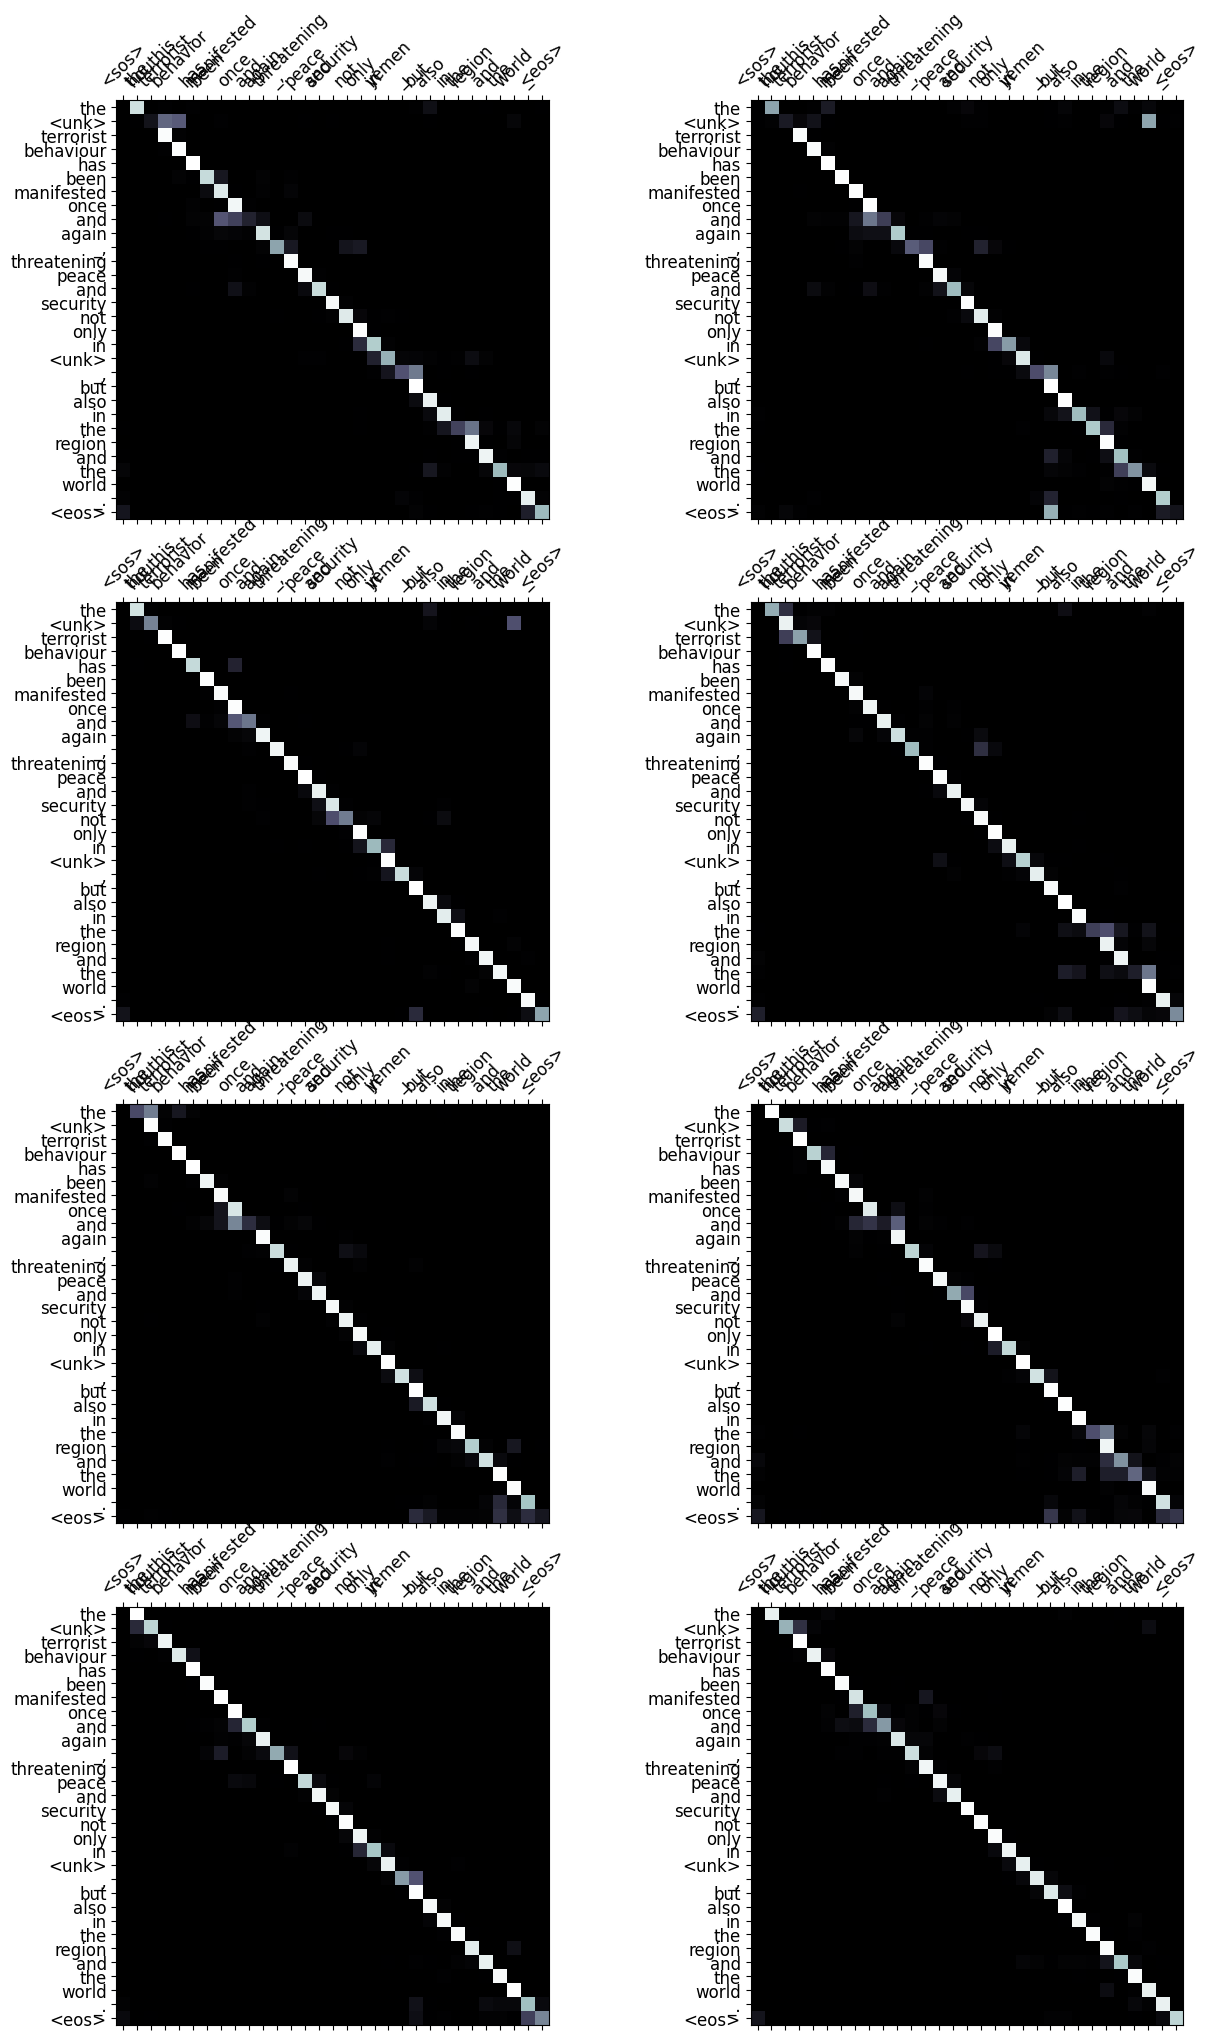

In [ ]:
display_attention(src, translation, attention)

###BLEU

In [ ]:
from torchtext.data.metrics import bleu_score

def calculate_bleu(data, src_field, trg_field, model, device, max_len = 50):

    trgs = []
    pred_trgs = []

    for datum in data:

        src = vars(datum)['src']
        trg = vars(datum)['trg']

        pred_trg, _ = translate_sentence(src, src_field, trg_field, model, device, max_len)

        #cut off <eos> token
        pred_trg = pred_trg[:-1]

        pred_trgs.append(pred_trg)
        trgs.append([trg])

    return bleu_score(pred_trgs, trgs)

In [ ]:
bleu_score = calculate_bleu(test_data, SRC, TRG, model, device)

print(f'BLEU score = {bleu_score*100:.2f}')

BLEU score = 56.27


##BLEU baseline - same src trg

In [ ]:
from torchtext.data.metrics import bleu_score

# item=test_data[0]#["src"]
# vars(item)['src']
trgs = []
pred_trgs = []
for datum in test_data[:1000]:
    src = vars(datum)['src']
    trg = vars(datum)['trg']
    #pred_trg, _ = translate_sentence(src, src_field, trg_field, model, device, max_len)
    pred_trgs.append(src)
    trgs.append([trg])
bleu_score=bleu_score(pred_trgs, trgs)
print(f'BLEU score (Same SRC/TRG) = {bleu_score*100:.2f}')


BLEU score (Same SRC/TRG) = 94.58


In [ ]:
len(train_data)

61510

###Apply model to testset
visualize output as html table

In [ ]:
from code_utils.web_lib import *
model_fname='tut2-model.pt'
#model = Seq2Seq(enc, dec, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

model.load_state_dict(torch.load(model_fname,map_location=device)) #map_location=torch.device('cpu')


example_idx = 12
pair_list_no_edits=[]
pair_list_with_edits=[]
for item0 in test_data.examples:
  src0=item0.src
  trg0=item0.trg
  if src0!=trg0: pair_list_with_edits.append((src0,trg0))
  else: pair_list_no_edits.append((src0,trg0))
  if len(pair_list_with_edits)>50: break

data_list1=[]
for src0,trg0 in pair_list_with_edits+pair_list_no_edits:
  print(src0)
  print(trg0)
  translation, attention = translate_sentence(src0, SRC, TRG, model, device)
  print(translation)
  src_html0=de_tok2str(src0)
  human_edit_html=get_edit_html(src0,trg0)
  mt_edit_html=get_edit_html(src0,translation)
  data_list1.append((src_html0,human_edit_html,mt_edit_html))
  # print(human_edit_html)
  # print(mt_edit_html)
  print("------")




# all_paras,paras_dict=docx_obj.extract_paras()

# for para_path0,para_content0 in all_paras:
#   #print(para_content0)
#   orig0,final0,edit0=get_edit_info(para_content0)
#   if orig0==final0=="": continue
#   print("para_path0",para_path0)
#   print("orig0",orig0)
#   print("final0",final0)
#   print("edit0",edit0)
#   print("-----")
#   data_list1.append((orig0,final0,edit0))



table_content0=""
for i0,tag_item0 in enumerate(data_list1):
  original0,final0,edited0=tag_item0
  table_class="table-light"
  if i0%2!=0: table_class="table-dark text-dark"
  cur_tr0='<tr class="%s"><td>%s</td><td>%s</td><td>%s</td></tr>'%(table_class,original0,final0,edited0)
  table_content0+=cur_tr0

template_fpath="templates/editing-mt-template.html"
template_fopen=open(template_fpath)
template_content=template_fopen.read()
template_fopen.close()
template_dom_obj=DOM(template_content)
repl_dict={"#data_display_table_body":table_content0}
out_html=template_dom_obj.replace(repl_dict)

out_fopen=open("output/mt_pre-edit-initial1.html","w")
out_fopen.write(out_html)
out_fopen.close()

# src = vars(test_data.examples[example_idx])['src']
# trg = vars(test_data.examples[example_idx])['trg']

# print(f'src = {src}')
# print(f'trg = {trg}')

# translation, attention = translate_sentence(src, SRC, TRG, model, device)

# print(f'predicted trg = {translation}')


['On', '5', 'October', '2022', '_,', 'the', 'terrorist', 'Houthis', 'militias', 'sent', 'a', 'letter', 'to', 'a', 'UN', 'member', 'state', 'with', 'threats', 'to', 'target', 'the', 'crew', 'and', 'the', 'tanker', 'raising', 'its', 'flag', 'if', 'it', 'approaches', 'Yemeni', 'ports', 'and', 'territorial', 'water', '_.']
['On', '5', 'October', '2022', '_,', 'the', 'terrorist', 'Houthi', 'militias', 'sent', 'a', 'letter', 'to', 'a', 'State', 'Member', 'of', 'the', 'United', 'Nations', 'with', 'threats', 'to', 'target', 'the', 'crew', 'and', 'the', 'tanker', 'flying', 'its', 'flag', 'if', 'the', 'tanker', 'approached', 'Yemeni', 'ports', 'and', 'territorial', 'waters', '_.']
['on', '5', '<unk>', '2022', '_,', 'the', 'terrorist', '<unk>', 'militias', 'sent', 'a', 'letter', 'to', 'a', 'member', 'state', 'with', 'threats', 'to', 'target', 'the', 'crew', 'and', 'the', 'tanker', 'flying', 'its', 'flag', 'if', 'the', 'tanker', 'approached', '<unk>', 'ports', 'and', 'territorial', 'waters', '_.',

In [ ]:
from difflib import SequenceMatcher
seq1=[1,2,2,4,5,5,7]
seq2=[1,2,3,4,5,6,7,8]
match_obj=SequenceMatcher(None,seq1,seq2)

In [ ]:
for a in match_obj.get_grouped_opcodes():
  print(a)

[('equal', 0, 2, 0, 2), ('replace', 2, 3, 2, 3), ('equal', 3, 5, 3, 5), ('replace', 5, 6, 5, 6), ('equal', 6, 7, 6, 7), ('insert', 7, 7, 7, 8)]


In [ ]:
for a in match_obj.matching_blocks:
  print(a)

Match(a=0, b=0, size=2)
Match(a=3, b=3, size=2)
Match(a=6, b=6, size=1)
Match(a=7, b=8, size=0)


In [ ]:
for a in match_obj.get_matching_blocks():
  print(a)

Match(a=0, b=0, size=2)
Match(a=3, b=3, size=2)
Match(a=6, b=6, size=1)
Match(a=7, b=8, size=0)


In [ ]:
seq1=[1,2,2,4,5,5,7,9,5]
seq2=[1,2,3,4,5,6,7]
match_obj=SequenceMatcher(None,seq1,seq2)
for a in match_obj.get_opcodes():
  print(a)

('equal', 0, 2, 0, 2)
('replace', 2, 3, 2, 3)
('equal', 3, 5, 3, 5)
('replace', 5, 6, 5, 6)
('equal', 6, 7, 6, 7)
('delete', 7, 9, 7, 7)


In [ ]:
from code_utils.general import *
src = ['The', 'Government', 'of', 'Yemen', 'is', 'calling', 'on', 'the', 'Security', 'Council', 'to', 'shoulder', 'its', 'responsibility', 'and', 'take', 'firm', 'actions', 'to', 'end', 'the', 'Houthis', 'terrorist', 'behavior', 'before', 'the', 'terrorist', 'Houthis', 'act', 'upon', 'their', 'threats', 'once', 'again', '_.']
trg = ['The', 'Government', 'of', 'Yemen', 'is', 'calling', 'upon', 'the', 'Security', 'Council', 'to', 'shoulder', 'its', 'responsibility', 'and', 'take', 'firm', 'actions', 'to', 'end', 'the', 'Houthis', "_'", 'terrorist', 'behaviour', 'before', 'the', 'terrorist', 'Houthis', 'act', 'upon', 'their', 'threats', 'once', 'again', '_.']
predicted_trg = ['the', 'government', 'of', '<unk>', 'is', 'calling', 'on', 'the', 'security', 'council', 'to', 'shoulder', 'its', 'responsibility', 'and', 'take', 'firm', 'actions', 'to', 'end', 'the', '<unk>', 'terrorist', 'behaviour', 'before', 'the', 'terrorist', '<unk>', 'act', 'upon', 'their', 'threats', 'once', 'again', '_.', '<eos>']
predicted_trg=[v for v in predicted_trg if v!="<eos>"]
def get_seq_edits(tokens1,tokens2):
  match_obj=SequenceMatcher(None,tokens1,tokens2)
  final_list=[]
  for a in match_obj.get_opcodes():
    match_type,x0,x1,y0,y1=a
    if match_type=="delete":
      #print("deleted",tokens1[x0:x1])
      final_list.append(("deleted",tokens1[x0:x1]))
    if match_type=="equal":
      #print("equal",tokens1[x0:x1])
      final_list.append(("equal",tokens1[x0:x1]))
    if match_type=="replace":
      final_list.append(("delete",tokens1[x0:x1]))
      final_list.append(("insert",tokens2[y0:y1]))
    if match_type=="insert":
      final_list.append(("insert",tokens2[y0:y1]))
  return final_list

def make_html_safe(text):
  text=text.replace(">","&gt;").replace("<","&lt;")
  return text

def get_edit_html(tokens1,tokens2):
  edit_list=get_seq_edits(tokens1,tokens2)
  final_str_items=[]
  for edit_type0,chunk0 in edit_list:
    cur_chunk_str=de_tok2str(chunk0)
    cur_chunk_str=make_html_safe(cur_chunk_str)
    if edit_type0=="delete": final_str_items.append('<del>%s</del>'%cur_chunk_str)
    elif edit_type0=="insert": final_str_items.append('<ins>%s</ins>'%cur_chunk_str)
    else: final_str_items.append(cur_chunk_str)
  final_str=" ".join(final_str_items)
  return final_str
    #print(edit_type0,)


    #print(a)

list1=get_seq_edits(src,predicted_trg)
# for a in list1:
#   print(a)

out=get_edit_html(src,predicted_trg)
print(out)
# for a in match_obj.get_grouped_opcodes():
#   print(a)

<del>The Government</del> <ins>the government</ins> of <del>Yemen</del> <ins>&lt;unk&gt;</ins> is calling on the <del>Security Council</del> <ins>security council</ins> to shoulder its responsibility and take firm actions to end the <del>Houthis</del> <ins>&lt;unk&gt;</ins> terrorist <del>behavior</del> <ins>behaviour</ins> before the terrorist <del>Houthis</del> <ins>&lt;unk&gt;</ins> act upon their threats once again.


In [ ]:
example_idx = 12

src = vars(test_data.examples[example_idx])['src']
trg = vars(test_data.examples[example_idx])['trg']

print(f'src = {src}')
print(f'trg = {trg}')

translation, attention = translate_sentence(src, SRC, TRG, model, device)

print(f'predicted trg = {translation}')


src = ['General', 'Assembly']
trg = ['General', 'Assembly']
predicted trg = ['general', 'assembly', '<eos>']


In [ ]:
test_data.examples[example_idx].

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-47-12d80dc069bb>", line 1, in <cell line: 1>
    test_data.examples[example_idx].edit
AttributeError: 'Example' object has no attribute 'edit'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/pyt

###Optimized BLEU

In [ ]:
def translate_sentence_vectorized(src_tensor, src_field, trg_field, model, device, max_len=50):
    assert isinstance(src_tensor, torch.Tensor)

    model.eval()
    src_mask = model.make_src_mask(src_tensor)

    with torch.no_grad():
        enc_src = model.encoder(src_tensor, src_mask)
    # enc_src = [batch_sz, src_len, hid_dim]

    trg_indexes = [[trg_field.vocab.stoi[trg_field.init_token]] for _ in range(len(src_tensor))]
    # Even though some examples might have been completed by producing a <eos> token
    # we still need to feed them through the model because other are not yet finished
    # and all examples act as a batch. Once every single sentence prediction encounters
    # <eos> token, then we can stop predicting.
    translations_done = [0] * len(src_tensor)
    for i in range(max_len):
        trg_tensor = torch.LongTensor(trg_indexes).to(device)
        trg_mask = model.make_trg_mask(trg_tensor)
        with torch.no_grad():
            output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)
        pred_tokens = output.argmax(2)[:,-1]
        for i, pred_token_i in enumerate(pred_tokens):
            trg_indexes[i].append(pred_token_i)
            if pred_token_i == trg_field.vocab.stoi[trg_field.eos_token]:
                translations_done[i] = 1
        if all(translations_done):
            break

    # Iterate through each predicted example one by one;
    # Cut-off the portion including the after the <eos> token
    pred_sentences = []
    for trg_sentence in trg_indexes:
        pred_sentence = []
        for i in range(1, len(trg_sentence)):
            if trg_sentence[i] == trg_field.vocab.stoi[trg_field.eos_token]:
                break
            pred_sentence.append(trg_field.vocab.itos[trg_sentence[i]])
        pred_sentences.append(pred_sentence)

    return pred_sentences, attention

from torchtext.data.metrics import bleu_score

def calculate_bleu_alt(iterator, src_field, trg_field, model, device, max_len = 50):
    trgs = []
    pred_trgs = []
    with torch.no_grad():
        for batch in iterator:
            src = batch.src
            trg = batch.trg
            _trgs = []
            for sentence in trg:
                tmp = []
                # Start from the first token which skips the <start> token
                for i in sentence[1:]:
                    # Targets are padded. So stop appending as soon as a padding or eos token is encountered
                    if i == trg_field.vocab.stoi[trg_field.eos_token] or i == trg_field.vocab.stoi[trg_field.pad_token]:
                        break
                    tmp.append(trg_field.vocab.itos[i])
                _trgs.append([tmp])
            trgs += _trgs
            pred_trg, _ = translate_sentence_vectorized(src, src_field, trg_field, model, device)
            pred_trgs += pred_trg
    return pred_trgs, trgs, bleu_score(pred_trgs, trgs)



In [ ]:
#calculate_bleu_alt(test_iterator)
#calculate_bleu(test_data, SRC, TRG, model, device)
pred_trgs0, trgs0,bleu_score2 = calculate_bleu_alt(test_data, SRC, TRG, model, device)
print("bleu_score2",bleu_score2)

TypeError: ignored

In [ ]:
bleu_score2

([['<unk>'],
  ['3'],
  ['<unk>'],
  ['<unk>'],
  ['<unk>'],
  ['045720000'],
  ['<unk>'],
  ['<unk>'],
  ['266954030480000'],
  ['<unk>'],
  ['<unk>'],
  ['<unk>'],
  ['E/2023/47'],
  ['S/2011/818'],
  ['266954030480000'],
  ['S/2011/818'],
  ['S/2011/818'],
  ['S/2011/818'],
  ['266954030480000'],
  ['S/2011/818'],
  ['<unk>'],
  ['<unk>'],
  ['<unk>'],
  ['<unk>'],
  ['two'],
  ['<unk>'],
  ['<unk>'],
  ['2604'],
  ['<unk>'],
  ['<unk>'],
  ['<unk>'],
  ['<unk>'],
  ['2669540304800'],
  ['2022'],
  ['CEDAW/C/CUB/9'],
  ['market'],
  ['<unk>'],
  ['<unk>'],
  ['Organization'],
  ['–'],
  ['235'],
  ['2606'],
  ['<unk>'],
  ['<unk>'],
  ['<unk>'],
  ['<unk>'],
  ['<unk>'],
  ['<unk>'],
  ['358'],
  ['791'],
  ['<unk>'],
  ['Sven'],
  ['2021'],
  ['94'],
  ['Xue'],
  ['<unk>'],
  ['137'],
  ['<unk>'],
  ['799'],
  ['итого'],
  ['<unk>'],
  ['N.Занятость'],
  ['<unk>'],
  ['IV.Exemptions'],
  ['II.Background'],
  ['E/CN.3/2023/26'],
  ['Total'],
  ['14'],
  ['14'],
  ['<unk>'],
  ['CEDA

In [ ]:
import torchtext
from code_utils.general import *

SRC = Field(tokenize = tok,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = True,
            batch_first = True)

TRG = Field(tokenize = tok,
            init_token = '<sos>',
            eos_token = '<eos>',
            lower = True,
            batch_first = True)

dataset0=torchtext.data.TabularDataset("test_bitext.tsv", "tsv", fields = (SRC, TRG), skip_header=True, csv_reader_params={})


TypeError: ignored

In [ ]:
#https://stackoverflow.com/questions/53046583/how-to-create-a-torchtext-data-tabulardataset-directly-from-a-list-or-dict
import torchtext
class TabularDataset_From_List(torchtext.data.Dataset):

    def __init__(self, input_list, format, fields, skip_header=False, **kwargs):
        make_example = {
            'json': Example.fromJSON, 'dict': Example.fromdict,
            'tsv': Example.fromTSV, 'csv': Example.fromCSV}[format.lower()]

        examples = [make_example(item, fields) for item in input_list]

        if make_example in (Example.fromdict, Example.fromJSON):
            fields, field_dict = [], fields
            for field in field_dict.values():
                if isinstance(field, list):
                    fields.extend(field)
                else:
                    fields.append(field)

        super(TabularDataset_From_List, self).__init__(examples, fields, **kwargs)

    @classmethod
    def splits(cls, path=None, root='.data', train=None, validation=None,
               test=None, **kwargs):
        if path is None:
            path = cls.download(root)
        train_data = None if train is None else cls(
            train, **kwargs)
        val_data = None if validation is None else cls(
            validation, **kwargs)
        test_data = None if test is None else cls(
            test, **kwargs)
        return tuple(d for d in (train_data, val_data, test_data)
                     if d is not None)

obj0=TabularDataset_From_List()

In [ ]:
BATCH_SIZE = 128

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data),
     batch_size = BATCH_SIZE,
     device = device)

AttributeError: ignored

In [ ]:
#https://github.com/jadore801120/attention-is-all-you-need-pytorch
!rm -rf attention_mt
#!git clone https://github.com/jadore801120/attention-is-all-you-need-pytorch attention_mt
!git clone https://github.com/hmghaly/attention-is-all-you-need-pytorch.git attention_mt


Cloning into 'attention_mt'...
remote: Enumerating objects: 753, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 753 (delta 2), reused 0 (delta 0), pack-reused 747
Receiving objects: 100% (753/753), 170.15 KiB | 1.62 MiB/s, done.
Resolving deltas: 100% (493/493), done.


In [ ]:
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm

2023-06-07 19:36:15.512036: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 19:36:16.612112: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-06-07 19:36:28.984037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the

In [ ]:
!pip install dill
!pip install torchtext==0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.4.0
    Uninstalling torchtext-0.4.0:
      Successfully uninstalled torchtext-0.4.0


###Test on custom tabular data

In [ ]:
from torchtext.data import Field, BucketIterator
import torchtext

SRC = Field()
TRG = Field()
fields = {'src': ('src', SRC), 'trg': ('trg', TRG)}
train_data, test_data = torchtext.data.TabularDataset.splits(
                            path = 'test_files',
                            train = 'src_trg_train.json',
                            test = 'src_trg_train.json',
                            format = 'json',
                            fields = fields
)



In [ ]:
from torchtext.datasets import Multi30k
from torchtext.data import Field, BucketIterator


NAME = Field()
SAYING = Field()
PLACE = Field()

In [ ]:
import torchtext
fields = {'name': ('n', NAME), 'location': ('p', PLACE), 'quote': ('s', SAYING)}
train_data, test_data = torchtext.data.TabularDataset.splits(
                            path = 'test_files',
                            train = 'train.json',
                            test = 'train.json',
                            format = 'json',
                            fields = fields
)

In [ ]:
a=train_data.examples[0]
a.n

['John']

In [ ]:
a=train_data.examples[0]
a.src

['an', 'english', 'sentence']

In [ ]:
os.chdir("attention_mt")
!python preprocess.py -lang_src de -lang_trg en -share_vocab -save_data m30k_deen_shr.pkl
os.chdir(cwd)

2023-06-07 19:36:53.277800: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 19:36:54.385958: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Namespace(lang_src='de', lang_trg='en', save_data='m30k_deen_shr.pkl', data_src=None, data_trg=None, max_len=100, min_word_count=3, keep_case=False, share_vocab=True)
Traceback (most recent call last):
  File "/content/drive/MyDrive/AI_UN/attention_mt/preprocess.py", line 336, in <module>
    main_wo_bpe()
  File "/content/drive/MyDrive/AI_UN/attention_mt/preprocess.py", line 271, in main_wo_bpe
    src_lang_model = spacy.load(spacy_src_lang_model_path)
  File "/usr/local/lib/python3.10/dist-packages/spacy/__init__.py", line 54, in load
    return util.load_

In [ ]:
import spacy
spacy.load('de_core_news_sm')

In [ ]:
spacy.load('en_core_web_sm')

In [ ]:
!!pip install torchtext==0.4

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Requirement already satisfied: torchtext==0.4 in /usr/local/lib/python3.10/dist-packages (0.4.0)',
 'Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from torchtext==0.4) (4.65.0)',
 'Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from torchtext==0.4) (2.27.1)',
 'Requirement already satisfied: torch in /usr/local/lib/python3.10/dist-packages (from torchtext==0.4) (2.0.1+cu118)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from torchtext==0.4) (1.22.4)',
 'Requirement already satisfied: six in /usr/local/lib/python3.10/dist-packages (from torchtext==0.4) (1.16.0)',
 'Requirement already satisfied: urllib3<1.27,>=1.21.1 in /usr/local/lib/python3.10/dist-packages (from requests->torchtext==0.4) (1.26.15)',
 'Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/pyth

In [ ]:
!pip install -U torchtext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchtext.data

In [ ]:
import torchtext.datasets as datasets

In [ ]:
datasets.

In [ ]:
from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator

ModuleNotFoundError: ignored

# ★ Build replacement model

In [ ]:
for set_name0 in ["train","test","validation"]:
  set_path=os.path.join("output","%s_set.json"%set_name0)
  print(set_path)


output/train_set.json
output/test_set.json
output/validation_set.json


In [ ]:
from code_utils.cat_utils import *
from itertools import groupby

def get_first_dict(list_of_tokenized): #group a list of tokenized strings by the first token, use this first token to retrieve all strings starting with it
  list_of_tokenized.sort()
  grouped=[(key,list(group)) for key,group in groupby(list_of_tokenized,lambda x:x[0])]
  return dict(iter(grouped))


fpath='output/train_set.json'
fopen=open(fpath)
repl_count_dict={}
for i0,line0 in enumerate(fopen):
  line_dict=json.loads(line0.strip())
  src_tokens=tok(line_dict["src"])
  trg_tokens=tok(line_dict["trg"])
  seq_edit_list=get_seq_replace(src_tokens,trg_tokens)
  repl_items=[]
  for a in seq_edit_list:
    if a[0]!="replace": continue
    repl_items.append(a)
  if repl_items:
    for rp in repl_items:
      repl_src,repl_trg=rp[1],rp[2]
      repl_key=(" ".join(repl_src)," ".join(repl_trg))
      repl_count_dict[repl_key]=repl_count_dict.get(repl_key,0)+1

#now creating first token dict for easy retrieval
keys_with_first=[]
for key0,val0 in repl_count_dict.items():
  src0,trg0 = key0
  src_first0=src0.split(" ")[0]
  keys_with_first.append((src_first0,key0))

keys_with_first.sort()
grouped=[(key,[v[1] for v in list(group)]) for key,group in groupby(keys_with_first,lambda x:x[0])]
first_dict=dict(iter(grouped))

# key_dict_pos={}
# key_dict_neg={}
valid_repl_dict={}
fopen.seek(0)
for i0,line0 in enumerate(fopen):
  if i0%1000==0: print("checking valid replacements:", i0)
  line_dict=json.loads(line0.strip())
  src_tokens=tok(line_dict["src"])
  trg_tokens=tok(line_dict["trg"])
  for s_tok0 in list(set(src_tokens)):
    corr_keys=first_dict.get(s_tok0,[])
    if corr_keys==[]: continue #print(s_tok0,corr_keys)
    for corr0 in corr_keys:
      corr_src0,corr_trg0=corr0
      corr_src_toks0=corr_src0.split(" ")
      if not general.is_in(corr_src_toks0,src_tokens): continue
      valid=True
      if general.is_in(corr_src_toks0,trg_tokens): valid=False #if the src part of the repl key exists in the target side, it is not valid

      corr_trg_toks0=corr_trg0.split(" ")
      if not general.is_in(corr_trg_toks0,trg_tokens): valid=False #if the trg part of the replacement does not exist in the target part, it is not valid
      temp_dict=valid_repl_dict.get(corr0,{})
      temp_dict[valid]=temp_dict.get(valid,0)+1
      valid_repl_dict[corr0]=temp_dict

      #print(s_tok0,corr0)

  #if i0>100: break

# for a,b in valid_repl_dict.items():
#   print(a,b)
#out_data=json.load(fopen)


# items=list(repl_count_dict.items())
# items.sort(key=lambda x:x[-1])

# tmp_src_list=[]
# tmp_trg_list=[]
# for key0,count0 in items:
#   repl_src0,repl_trg0=key0
#   tmp_src_list.append(repl_src0)
#   tmp_trg_list.append(repl_trg0)
#   #print(key0,count0)
# tmp_src_list=list(set(tmp_src_list))
# tmp_trg_list=list(set(tmp_trg_list))

# tmp_src_tok_list=[v.split(" ") for v in tmp_src_list]
# tmp_trg_tok_list=[v.split(" ") for v in tmp_trg_list]

# repl_first_src_dict=get_first_dict(tmp_src_tok_list)
# repl_first_trg_dict=get_first_dict(tmp_trg_tok_list)

# print("tmp_src_list",len(tmp_src_list))
# print("tmp_trg_list",len(tmp_trg_list))

# fopen.seek(0)

# phrase_src_count_dict={} #how many times did a phrase occur in src (before editing)
# phrase_trg_count_dict={} #how many times did a phrase occur in trg (after editing)

# for i0,line0 in enumerate(fopen):
#   if i0%5000==0: print(i0)
#   line_dict=json.loads(line0.strip())
#   src_tokens=tok(line_dict["src"])
#   trg_tokens=tok(line_dict["trg"])
#   for t_tok0 in list(set(trg_tokens)):
#     corr_src_phrases=repl_first_src_dict.get(t_tok0,[]) #check if the src word/phrase that is to be replaced - also exists in target (e.g. honor)
#     for src_phrase0 in corr_src_phrases:
#       cur_src_phrase_locs=general.is_in(src_phrase0,trg_tokens)
#       if len(cur_src_phrase_locs)>0:
#         phrase_str=" ".join(src_phrase0)
#         phrase_src_count_dict[phrase_str]=phrase_src_count_dict.get(phrase_str,0)+len(cur_src_phrase_locs)


fopen.close()

checking valid replacements: 0
checking valid replacements: 1000
checking valid replacements: 2000
checking valid replacements: 3000
checking valid replacements: 4000
checking valid replacements: 5000
checking valid replacements: 6000
checking valid replacements: 7000
checking valid replacements: 8000
checking valid replacements: 9000
checking valid replacements: 10000
checking valid replacements: 11000
checking valid replacements: 12000
checking valid replacements: 13000
checking valid replacements: 14000
checking valid replacements: 15000
checking valid replacements: 16000
checking valid replacements: 17000
checking valid replacements: 18000
checking valid replacements: 19000
checking valid replacements: 20000
checking valid replacements: 21000
checking valid replacements: 22000
checking valid replacements: 23000
checking valid replacements: 24000
checking valid replacements: 25000
checking valid replacements: 26000
checking valid replacements: 27000
checking valid replacements: 2800

In [ ]:
import json
items=list(repl_count_dict.items())
items.sort(key=lambda x:-x[-1])
validated_repl_list=[]
for repl_key0,repl_count0 in items:
  temp_valid_dict=valid_repl_dict.get(repl_key0,{})
  true_count=temp_valid_dict.get(True,0)
  false_count=temp_valid_dict.get(False,0)
  sum_vals=sum(temp_valid_dict.values())
  true_ratio=0
  if sum_vals!=0: true_ratio=true_count/sum_vals
  #print(repl_key0,repl_count0,temp_valid_dict, round(true_ratio,2))
  validated_repl_list.append((repl_key0,true_count,false_count,repl_count0,true_ratio))

validated_repl_list.sort(key=lambda x:(-x[-1],-x[-2]))
validated_fopen=open("repl_validated.txt","w")
validated_table_fopen=open("repl_validated_table.tsv","w")
for a in validated_repl_list:
  repl_key0,true_count,false_count,repl_count0,true_ratio=a
  repl_src0,repl_trg0=repl_key0
  temp_dict={}
  temp_dict["src"]=repl_src0
  temp_dict["trg"]=repl_trg0
  temp_dict["repl_count"]=repl_count0
  temp_dict["true_count"]=true_count
  temp_dict["false_count"]=false_count
  temp_dict["true_ratio"]=true_ratio
  row_items=[repl_src0,repl_trg0,true_count,false_count,repl_count0,true_ratio]
  row_items_str="\t".join([str(v) for v in row_items])
  validated_table_fopen.write(row_items_str+"\n")



  validated_fopen.write(json.dumps(temp_dict)+"\n")



  #print(a)
validated_fopen.close()
validated_table_fopen.close()
print(f"finished processing {len(validated_repl_list)} items")

finished processing 7008 items


##test replacement with validated replacement data

In [ ]:
import json, math
from itertools import groupby
from code_utils import general

def apply_replace(sent_tokens,first_repl_dict):
  new_sent_tokens=list(sent_tokens)
  valid_replacements=[]
  for word0 in list(set(sent_tokens)):
    all_corr=first_repl_dict.get(word0,[])
    for corr0 in all_corr:
      if not general.is_in(corr0[0],sent_tokens): continue
      valid_replacements.append(corr0)
  for repl0 in valid_replacements:
    repl_src,repl_trg,repl_wt=repl0
    new_sent_tokens=repl_phrase(new_sent_tokens,repl_src,repl_trg)
  return new_sent_tokens



def repl_phrase(sent_tokens,phrase_to_be_replaced,new_phrase): #replace a
  last_i=0
  new_tokens=[]
  found_spans=general.is_in(phrase_to_be_replaced,sent_tokens)
  for span0 in found_spans:
    span_i0,span_j0=span0
    new_tokens.extend(sent_tokens[last_i:span_i0])
    new_tokens.extend(new_phrase)
    last_i=span_j0+1
  new_tokens.extend(sent_tokens[last_i:])
  return new_tokens







validated_fopen=open("repl_validated.txt")
#repl_model_first_dict={}
first_repl_wt_list=[]
for line_i,line0 in enumerate(validated_fopen):
  line_dict=json.loads(line0)
  src0=line_dict.get("src","")
  trg0=line_dict.get("trg","")
  first=src0.split(" ")[0]
  #if first=="DCO": continue
  true_ratio=line_dict.get("true_ratio",0)
  repl_count=line_dict.get("repl_count",0)

  if repl_count<1 or true_ratio<0.7: continue

  wt0=true_ratio*math.log(repl_count)
  first_repl_wt_list.append((first,(src0.split(" "),trg0.split(" "),wt0)))

first_repl_wt_list.sort(key=lambda x:x[0])
first_repl_wt_list_grouped=[(key,[v[1] for v in list(group)]) for key,group in groupby(first_repl_wt_list,lambda x:x[0])]
repl_model_first_dict=dict(iter(first_repl_wt_list_grouped))

# items=list(repl_model_first_dict.items())
# for a,b in items[200:400]:
#   print(a,b)
validated_fopen.close()


#test_data
sent="the advisor for AP and APC issues, also RCOs with roundtables and a roadmap and have the honor to have learnt"
sent_tokens=sent.split()

out0=apply_replace(sent_tokens,repl_model_first_dict)
print(out0)

['the', 'advisor', 'for', 'armour', '_-_', 'piercing', 'and', 'armoured', 'personnel', 'carrier', 'issues,', 'also', 'RCOs', 'with', 'round', 'tables', 'and', 'a', 'roadmap', 'and', 'have', 'the', 'honour', 'to', 'have', 'learnt']


##Apply BLEU score to replacement model

In [ ]:
from code_utils.general import *
from torchtext.data.metrics import bleu_score
import time

# item=test_data[0]#["src"]
# vars(item)['src']
analysis_dir="analysis"
if not os.path.exists(analysis_dir): os.makedirs(analysis_dir)

analysis_fname="replacement_performance.tsv"
analysis_fpath=os.path.join(analysis_dir,analysis_fname)
fopen=open(analysis_fpath,"w")
t0=time.time()
trgs = []
pred_trgs = []
edit_correct_list=[]
edit_predict_list=[]
for i0,datum in enumerate(test_data):
  if i0%1000==0: print(i0, "out of", len(test_data))
  src = vars(datum)['src']
  trg = vars(datum)['trg']
  src_sent=de_tok2str(src)
  correct_trg_sent=de_tok2str(trg)
  repl_outcome_tokens=apply_replace(src,repl_model_first_dict)
  repl_outcome_str=de_tok2str(repl_outcome_tokens)
  trg_edits_html=get_edit_html(src,trg)
  repl_out_edits_html=get_edit_html(src,repl_outcome_tokens)
  if src!=trg: edit_correct_list.append((src_sent,trg_edits_html,repl_out_edits_html))
  if src!=repl_outcome_tokens: edit_predict_list.append((src_sent,trg_edits_html,repl_out_edits_html))

  pred_trg=repl_outcome_tokens

  # doc0 = nlp(src_sent)
  # doc0._.performed_spellCheck
  # spell_check_outcome=doc0._.outcome_spellCheck
  # pred_trg=tok(spell_check_outcome)
  #pred_trg=src

  line="%s\t%s\t%s"%(src_sent,correct_trg_sent,repl_outcome_str)
  line.replace("\n","<br>")
  fopen.write(line+"\n")
  pred_trgs.append(pred_trg)
  trgs.append([trg])
t1=time.time()
cur_bleu_score=bleu_score(pred_trgs, trgs)
t2=time.time()
elapsed_processing=round(t1-t0,2)
elapsed_bleu=round(t2-t1,2)

print(f'BLEU score (Replacement Model) = {cur_bleu_score*100:.2f}')
print("elapsed_processing",elapsed_processing)
print("elapsed_bleu",elapsed_bleu)

from code_utils.web_lib import *

table_content0=""
for i0,tag_item0 in enumerate(edit_predict_list):
  original0,final0,edited0=tag_item0
  table_class="table-light"
  if i0%2!=0: table_class="table-dark text-dark"
  cur_tr0='<tr class="%s"><td>%s</td><td>%s</td><td>%s</td></tr>'%(table_class,original0,final0,edited0)
  table_content0+=cur_tr0

template_fpath="templates/pre-editing_table_template.html"
template_fopen=open(template_fpath)
template_content=template_fopen.read()
template_fopen.close()
template_dom_obj=DOM(template_content)
repl_dict={"#data_display_table_body":table_content0}
out_html=template_dom_obj.replace(repl_dict)

out_fopen=open("output/replace_model_out0.html","w")
out_fopen.write(out_html)
out_fopen.close()

#BLEU score (Replacement Model) = 92.41 | if repl_count<1 or true_ratio<0.7: continue
#BLEU score (Replacement Model) = 92.40 | if repl_count<2 or true_ratio<0.7: continue
#BLEU score (Replacement Model) = 92.39 | if repl_count<2 or true_ratio<0.6: continue
#BLEU score (Replacement Model) = 92.37 | if repl_count<2 or true_ratio<0.75: continue
#BLEU score (Replacement Model) = 92.33 | if repl_count<2 or true_ratio<0.5: continue
#BLEU score (Replacement Model) = 92.33 | if repl_count<3 or true_ratio<0.6: continue
#BLEU score (Replacement Model) = 92.29 | if repl_count<3 or true_ratio<0.5: continue
#BLEU score (Replacement Model) - No filters = 21.40

0 out of 18421
1000 out of 18421
2000 out of 18421
3000 out of 18421
4000 out of 18421
5000 out of 18421
6000 out of 18421
7000 out of 18421
8000 out of 18421
9000 out of 18421
10000 out of 18421
11000 out of 18421
12000 out of 18421
13000 out of 18421
14000 out of 18421
15000 out of 18421
16000 out of 18421
17000 out of 18421
18000 out of 18421
BLEU score (Replacement Model) = 92.40
elapsed_processing 30.19
elapsed_bleu 29.06


In [ ]:
from code_utils.web_lib import *

table_content0=""
for i0,tag_item0 in enumerate(edit_predict_list):
  original0,final0,edited0=tag_item0
  table_class="table-light"
  if i0%2!=0: table_class="table-dark text-dark"
  cur_tr0='<tr class="%s"><td>%s</td><td>%s</td><td>%s</td></tr>'%(table_class,original0,final0,edited0)
  table_content0+=cur_tr0

template_fpath="templates/pre-editing_table_template.html"
template_fopen=open(template_fpath)
template_content=template_fopen.read()
template_fopen.close()
template_dom_obj=DOM(template_content)
repl_dict={"#data_display_table_body":table_content0}
out_html=template_dom_obj.replace(repl_dict)

out_fopen=open("output/replace_model_out0.html","w")
out_fopen.write(out_html)
out_fopen.close()

In [ ]:
for a in edit_predict_list[:50]:
  print(a[0])
  print(a[1])
  print(a[2])
  print("---")

On 5 October 2022, the terrorist Houthis militias sent a letter to a UN member state with threats to target the crew and the tanker raising its flag if it approaches Yemeni ports and territorial water.
On 5 October 2022, the terrorist <del>Houthis</del> <ins>Houthi</ins> militias sent a letter to a <del>UN member state</del> <ins>State Member of the United Nations</ins> with threats to target the crew and the tanker <del>raising</del> <ins>flying</ins> its flag if <del>it approaches</del> <ins>the tanker approached</ins> Yemeni ports and territorial <del>water</del> <ins>waters</ins> .
On 5 October 2022, the terrorist Houthis militias sent a letter to a <del>UN member state</del> <ins>State Member of the United Nations</ins> with threats to target the crew and the tanker raising its flag if <del>it approaches</del> <ins>the tanker approached</ins> Yemeni ports and territorial water.
---
Recognizing also that mountain ecosystems are highly vulnerable to the increasing adverse impacts of

In [ ]:
sent1="We didn't go"
sent2="We did not go there"
get_edit_html(tok(sent1),tok(sent2))

"We <del>didn't</del> <ins>did not</ins> go <ins>there</ins>"

In [ ]:
keys_with_first=[]
for key0,val0 in repl_count_dict.items():
  src0,trg0 = key0
  src_first0=src0.split(" ")[0]
  keys_with_first.append((src_first0,key0))

keys_with_first.sort()
grouped=[(key,[v[1] for v in list(group)]) for key,group in groupby(keys_with_first,lambda x:x[0])]
first_dict=dict(iter(grouped))
grouped_dict_items=list(first_dict.items())

for a in grouped_dict_items[:500]:
  print(a)

('"', [('" Factsheet', '“_ Indigenous women with disabilities _” (_ 2020 _)_ _, fact sheet')])
('"_', [('"_', '“_')])
('#', [('#', 'number')])
('$', [('$ 1,158,506,500', '$1,158,506,500')])
('$14,600', [('$14,600', '$28,400')])
('$3389', [('$3389', '$3,389')])
('%', [('%', 'Percentage'), ('%', 'per cent'), ('% in 2020 _-_ 2021', 'per cent during the period 2020–2021')])
('&', [('&', 'and'), ('&', 'and Kenneth'), ('&', 'and Ram'), ('& Development', 'and development'), ('& Fort _, T _.', 'and Teresa')])
("'_", [("'_", '“_')])
('(', [('( HYPERLINK "_ https://daccess-ods.un.org/tmp/1377058.17818642.html', '(_'), ('( HYPERLINK "_ https://undocs.org/en/S/2021/807', '(_')])
('(_', [('(_', '_,'), ('(_', '_, including the'), ('(_', '_, namely _,'), ('(_', '_”_ _,'), ('(_', 'coalition _, which'), ('(_', 'from'), ('(_', 'the global South'), ('(_ 1991 _)_ _, General', 'general'), ('(_ 2009 _)_', 'Journal of International Business Studies _, vol'), ('(_ 2019 _-_ 2025 _)_', '2019–2025'), ('(_ 2023 _

In [ ]:
items=list(repl_count_dict.items())
items.sort(key=lambda x:-x[-1])
for a in items[:100]:
  print(a)

(('UN', 'United Nations'), 142)
(('_,', 'and'), 93)
(('-', '–'), 88)
(('Annex', 'annex'), 82)
(('_.', '_;'), 63)
(('—', '–'), 62)
(('this', 'that'), 55)
(('this', 'the present'), 53)
(('Chapter', 'chapter'), 47)
(('_,', '_;'), 45)
(('_%', 'per cent'), 44)
(('is', 'was'), 40)
(('RCs', 'resident coordinators'), 39)
(('‘_', '“_'), 37)
(('_)', '_)_ _.'), 36)
(('2022[KEEP', '2022 [_ _[_ KEEP'), 34)
(('to', 'with'), 33)
(('_)', '_)_ _,'), 30)
(('are', 'were'), 28)
(('Appendix', 'appendix'), 28)
(('P4', 'P _-_ 4'), 28)
(('Article', 'article'), 27)
(('Members', 'members'), 26)
(('the', 'a'), 26)
(('_;', '_,'), 24)
(('_’', '_”'), 24)
(('para', 'paragraph'), 24)
(('&', 'and'), 24)
(('P3', 'P _-_ 3'), 24)
(('_)_ _.', '_)'), 23)
(('Resolution', 'resolution'), 22)
(('SIDS', 'small island developing States'), 22)
(('EDD', 'Division'), 22)
(('has', 'had'), 21)
(('due', 'owing'), 21)
(('percent', 'per cent'), 21)
(('to', 'for'), 21)
(('of', 'for'), 20)
(('as well as', 'and'), 20)
(('Case', 'case'), 20

In [ ]:
output_fpath="edit_training_data_analysis.tsv"
output_fopen=open(output_fpath,"w")
items=list(repl_count_dict.items())
items.sort(key=lambda x:-x[-1])
#items.sort(key=lambda x:x[-1])
header_line="Replace\tReplace With\tReplace Count\tCounter Examples\n"
output_fopen.write(header_line)
for key0,count0 in items:
  r_src0,r_trg0=key0
  #src_phrase0=" ".join(r_src0)
  #trg_phrase0=" ".join(r_trg0)
  #print(r_src0)
  #print(r_trg0)
  found_in_trg=phrase_src_count_dict.get(r_trg0,0)
  #print()
  print(key0,count0,found_in_trg)
  line="%s\t%s\t%s\t%s\n"%(r_src0,r_trg0,count0,found_in_trg)
  output_fopen.write(line)
  #print("-----")
output_fopen.close()

Streaming output truncated to the last 5000 lines.
('Calls', 'calls') 1 48
('Rules', 'rules') 1 107
('2022 _-_ 2026 by the Meetings of High Contracting Parties', '2022–2026') 1 0
('CCW _, in accordance with', 'the Convention and') 1 0
('of the High Contracting Parties related to emerging technologies', 'on Emerging Technologies') 1 0
('lethal autonomous weapons systems (_ LAWS _) on', 'Lethal Autonomous Weapons Systems from') 1 0
('25 _-_ 29 July and adopted', 'to adopt') 1 0
('adopted', 'to adopt') 1 0
('(_ CCW/CONF.VI/8 _)_ _.', '_;') 1 0
('Nuclear', 'nuclear') 1 0
('Tenth', 'tenth') 1 0
('Ninth', 'ninth') 1 0
('its First', 'the first') 1 0
('State', 'the States') 1 0
('_) ,NPT/CONF.2010/50', '_)_ _, NPT/CONF.2010/50') 1 0
('to prevent and combat the illicit proliferation of firearms and ammunition across the Caribbean', '_)_') 1 0
('in developing', 'to develop') 1 79
('Seventh Extraordinary Meeting', 'seventh extraordinary meeting') 1 0
('TAC Inaugural Meeting _; (_ Based on SG Repo

In [ ]:
phrase_src_count_dict["the"]

47854

In [ ]:
line_dict

{'src': 'Distr.: General', 'trg': 'Distr.: General', 'edit': 'Distr.: General'}

#Apply pretrained transformers and libararies

##Happy Transformer

In [ ]:
#Happy transformer: https://huggingface.co/vennify/t5-base-grammar-correction
!pip install happytransformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.1 MB/s eta 0:00:00


In [ ]:
from happytransformer import HappyTextToText, TTSettings

happy_tt = HappyTextToText("T5", "vennify/t5-base-grammar-correction")

args = TTSettings(num_beams=5, min_length=1)

# Add the prefix "grammar: " before each input
result = happy_tt.generate_text("grammar: This sentences has has bads grammar.", args=args)

print(result.text) # This sentence has bad grammar.


This sentence has bad grammar.


In [ ]:
#sent0="grammar: This sentences has has bads grammar."
sent0="What would your do"
#sent0="This Program show many colors"
sent0="grammar: the walking group had some reservations"
sent0="grammar: the workings group had somes reservations"
result = happy_tt.generate_text(sent0, args=args)
print(result.text) # This sentence has bad grammar.


The working group had some reservations.


###BLEU - T5 happy transformer
No training

In [ ]:
from code_utils.general import *
from torchtext.data.metrics import bleu_score
import time

# item=test_data[0]#["src"]
# vars(item)['src']
analysis_dir="analysis"
if not os.path.exists(analysis_dir): os.makedirs(analysis_dir)

analysis_fname="t5_no_training_performance.tsv"
analysis_fpath=os.path.join(analysis_dir,analysis_fname)
fopen=open(analysis_fpath,"w")
t0=time.time()
trgs = []
pred_trgs = []
edit_correct_list=[]
edit_predict_list=[]
for i0,datum in enumerate(test_data[:1000]):
  if i0%50==0: print(i0, "out of", len(test_data))
  src = vars(datum)['src']
  trg = vars(datum)['trg']
  src_sent=de_tok2str(src)
  correct_trg_sent=de_tok2str(trg)

  t5_sent="grammar: "+src_sent
  t5_result = happy_tt.generate_text(t5_sent, args=args)
  repl_outcome_str=t5_result.text
  repl_outcome_tokens=tok(repl_outcome_str)


  # repl_outcome_tokens=apply_replace(src,repl_model_first_dict)
  # repl_outcome_str=de_tok2str(repl_outcome_tokens)
  trg_edits_html=get_edit_html(src,trg)
  repl_out_edits_html=get_edit_html(src,repl_outcome_tokens)
  if src!=trg: edit_correct_list.append((src_sent,trg_edits_html,repl_out_edits_html))
  if src!=repl_outcome_tokens: edit_predict_list.append((src_sent,trg_edits_html,repl_out_edits_html))

  pred_trg=repl_outcome_tokens

  line="%s\t%s\t%s"%(src_sent,correct_trg_sent,repl_outcome_str)
  line.replace("\n","<br>")
  fopen.write(line+"\n")
  pred_trgs.append(pred_trg)
  trgs.append([trg])
t1=time.time()
cur_bleu_score=bleu_score(pred_trgs, trgs)
t2=time.time()
elapsed_processing=round(t1-t0,2)
elapsed_bleu=round(t2-t1,2)

print(f'BLEU score (T5 Model - no training) = {cur_bleu_score*100:.2f}')
print("elapsed_processing",elapsed_processing)
print("elapsed_bleu",elapsed_bleu)


from code_utils.web_lib import *

table_content0=""
for i0,tag_item0 in enumerate(edit_predict_list):
  original0,final0,edited0=tag_item0
  table_class="table-light"
  if i0%2!=0: table_class="table-dark text-dark"
  cur_tr0='<tr class="%s"><td>%s</td><td>%s</td><td>%s</td></tr>'%(table_class,original0,final0,edited0)
  table_content0+=cur_tr0

template_fpath="templates/pre-editing_table_template.html"
template_fopen=open(template_fpath)
template_content=template_fopen.read()
template_fopen.close()
template_dom_obj=DOM(template_content)
repl_dict={"#data_display_table_body":table_content0}
out_html=template_dom_obj.replace(repl_dict)

out_fopen=open("output/t5_no_training_model_out0.html","w")
out_fopen.write(out_html)
out_fopen.close()


0 out of 18421
50 out of 18421
100 out of 18421
150 out of 18421
200 out of 18421
250 out of 18421
300 out of 18421
350 out of 18421
400 out of 18421
450 out of 18421
500 out of 18421
550 out of 18421
600 out of 18421
650 out of 18421
700 out of 18421
750 out of 18421
800 out of 18421
850 out of 18421
900 out of 18421
950 out of 18421
BLEU score (T5 Model - no training) = 71.21
elapsed_processing 561.22
elapsed_bleu 1.51


###Train T5 on our data

In [ ]:
from happytransformer import HappyTextToText

happy_tt = HappyTextToText("T5", "t5-base")

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
!pip install accelerate -U
#!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 9.4 MB/s eta 0:00:00


###prepare csv files

In [ ]:
import json
import csv

def generate_csv(dataset_fpath,csv_path):
  dataset_fopen=open(dataset_fpath)
  with open(csv_path, 'w', newline='') as csvfile:
      writter = csv.writer(csvfile)
      writter.writerow(["input", "target"])
      for line_i,line0 in enumerate(dataset_fopen):
        #if line_i>11403: break
        if line_i>20000: break
        line_dict=json.loads(line0)
        # if line_i>11400 and line_i<11450:
        #   print(line_i,line_dict)
        if line_dict["src"]=="N/A": continue
        input_text = "grammar: " + line_dict["src"]
        correction = line_dict["trg"]
        if line_dict["src"]=="" or line_dict["trg"]=="": continue #print(line_dict)
        #if line_dict["trg"]=="": print(line_dict)

        if input_text and correction:
          writter.writerow([input_text, correction])
  dataset_fopen.close()


train_json_fpath='output/train_set.json'
valid_json_fpath='output/validation_set.json'

train_csv_fpath='output/t5_train_set.csv'
valid_csv_fpath='output/t5_validation_set.csv'

generate_csv(train_json_fpath, train_csv_fpath)
#generate_csv(valid_json_fpath, valid_csv_fpath)

#Before loss: 0.2900571823120117

In [ ]:
!tail output/t5_train_set.csv

grammar: 580.2,580.2
grammar: Travel of staff,Travel of staff
grammar: 139.7,139.7
grammar: 83.7,83.7
grammar: 153.2,153.2
grammar: 151.4,151.4
grammar: (1.8),(1.8)
grammar: 324.4,324.4
grammar: 345.2,345.2
grammar: 408.1,408.1


In [ ]:
 before_result = happy_tt.eval(valid_csv_fpath)
 print("Before loss:", before_result.loss)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-c7d510ff9a1dc441/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/11937 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Before loss: 0.2900571823120117


In [ ]:
happy_tt.save("output/happy_t5_TEST.model")
happy_tt1 = HappyTextToText("T5", "output/happy_t5_TEST.model")
#happy_gen = HappyGeneration(model_type="GPT-NEO", model_name="EleutherAI/gpt-neo-125M", load_path="model/")
#cur_model=happy_tt.load("output/happy_t5_TEST.model")

###Start training T5

In [ ]:
from happytransformer import TTTrainArgs

args = TTTrainArgs(batch_size=4)
happy_tt.train(train_csv_fpath, args=args)

happy_tt.save("output/happy_t5.model")

before_loss = happy_tt.eval(valid_csv_fpath)

print("After loss: ", before_loss.loss)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-984c10ed8159531c/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/19619 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-55f20365ec3cd14f/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/11074 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3619: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


After loss:  0.14409805834293365


### BLEU for trained T5

In [ ]:
from code_utils.general import *
from torchtext.data.metrics import bleu_score
import time

from happytransformer import HappyTextToText, TTSettings

#happy_tt = HappyTextToText("T5", "vennify/t5-base-grammar-correction") #"output/happy_t5.model"
happy_tt = HappyTextToText("T5", "output/happy_t5.model") #"output/happy_t5.model"

args = TTSettings(num_beams=5, min_length=1)


#beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=20)



#args = TTSettings(num_beams=5, min_length=1)

# item=test_data[0]#["src"]
# vars(item)['src']
analysis_dir="analysis"
if not os.path.exists(analysis_dir): os.makedirs(analysis_dir)

analysis_fname="t5_20000_training_performance.tsv"
analysis_fpath=os.path.join(analysis_dir,analysis_fname)
fopen=open(analysis_fpath,"w")
t0=time.time()
trgs = []
pred_trgs = []
edit_correct_list=[]
edit_predict_list=[]
for i0,datum in enumerate(test_data[:1000]):
  if i0%50==0: print(i0, "out of", len(test_data))
  src = vars(datum)['src']
  trg = vars(datum)['trg']
  src_sent=de_tok2str(src)
  correct_trg_sent=de_tok2str(trg)

  t5_sent="grammar: "+src_sent
  t5_result = happy_tt.generate_text(t5_sent, args=args)
  repl_outcome_str=t5_result.text
  repl_outcome_tokens=tok(repl_outcome_str)


  # repl_outcome_tokens=apply_replace(src,repl_model_first_dict)
  # repl_outcome_str=de_tok2str(repl_outcome_tokens)
  trg_edits_html=get_edit_html(src,trg)
  repl_out_edits_html=get_edit_html(src,repl_outcome_tokens)
  if src!=trg: edit_correct_list.append((src_sent,trg_edits_html,repl_out_edits_html))
  if src!=repl_outcome_tokens: edit_predict_list.append((src_sent,trg_edits_html,repl_out_edits_html))

  pred_trg=repl_outcome_tokens

  line="%s\t%s\t%s"%(src_sent,correct_trg_sent,repl_outcome_str)
  line.replace("\n","<br>")
  fopen.write(line+"\n")
  pred_trgs.append(pred_trg)
  trgs.append([trg])
t1=time.time()
cur_bleu_score=bleu_score(pred_trgs, trgs)
t2=time.time()
elapsed_processing=round(t1-t0,2)
elapsed_bleu=round(t2-t1,2)

print(f'BLEU score (T5 Model - no training) = {cur_bleu_score*100:.2f}')
print("elapsed_processing",elapsed_processing)
print("elapsed_bleu",elapsed_bleu)


from code_utils.web_lib import *

table_content0=""
for i0,tag_item0 in enumerate(edit_predict_list):
  original0,final0,edited0=tag_item0
  table_class="table-light"
  if i0%2!=0: table_class="table-dark text-dark"
  cur_tr0='<tr class="%s"><td>%s</td><td>%s</td><td>%s</td></tr>'%(table_class,original0,final0,edited0)
  table_content0+=cur_tr0

template_fpath="templates/pre-editing_table_template.html"
template_fopen=open(template_fpath)
template_content=template_fopen.read()
template_fopen.close()
template_dom_obj=DOM(template_content)
repl_dict={"#data_display_table_body":table_content0}
out_html=template_dom_obj.replace(repl_dict)

out_fopen=open("output/t5_20000_training_model_out1.html","w")
out_fopen.write(out_html)
out_fopen.close()
#BLEU score (T5 Model - 5000 training) = 72.77
#BLEU score (T5 Model - 20000 training) = 72.96

0 out of 18421


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


50 out of 18421
100 out of 18421
150 out of 18421
200 out of 18421
250 out of 18421
300 out of 18421
350 out of 18421
400 out of 18421
450 out of 18421
500 out of 18421
550 out of 18421
600 out of 18421
650 out of 18421
700 out of 18421
750 out of 18421
800 out of 18421
850 out of 18421
900 out of 18421
950 out of 18421
BLEU score (T5 Model - no training) = 72.96
elapsed_processing 548.7
elapsed_bleu 1.2


In [ ]:
from happytransformer import TTSettings

beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=20)

example_1 = "grammar: This sentences, has bads grammar and spelling!"
example_1 = "grammar: United Nation"
result_1 = happy_tt.generate_text(example_1, args=beam_settings)
print(result_1.text)

United Nations


In [ ]:
sent0="grammar: This sentences has has bads grammar."
result = happy_tt.generate_text(sent0, args=args)
print(result.text)


This sentence has bad grammar.


In [ ]:
sent0="the walking group had some reservations"
result = happy_tt.generate_text(sent0, args=args)
print(result.text)

The walking group had some reservations, and the walking group had some reservations.


In [ ]:
#sent0="the walking group had some reservations"
#The walking group had some reservations, and the walking group had some reservations.


##GingerIt

In [ ]:
!pip install gingerit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
from gingerit.gingerit import GingerIt
sent0="grammar: This sentences has has bads grammar."
parser = GingerIt()
parse_out=parser.parse(sent0)
result0=parse_out["result"]
print("Original:",sent0)
print("Result:",result0)

Original: grammar: This sentences has has bads grammar.
Result: Grammar: This sentence has bad grammar.


###Apply BLEU to gingerit

In [ ]:
from code_utils.general import *
from torchtext.data.metrics import bleu_score
import time

analysis_dir="analysis"
if not os.path.exists(analysis_dir): os.makedirs(analysis_dir)

analysis_fname="ginger_it_performance.tsv"
analysis_fpath=os.path.join(analysis_dir,analysis_fname)
fopen=open(analysis_fpath,"w")
t0=time.time()
trgs = []
pred_trgs = []
for i0,datum in enumerate(test_data[:1000]):
  if i0%100==0: print(i0, "out of", len(test_data))
  src = vars(datum)['src']
  trg = vars(datum)['trg']
  src_sent=de_tok2str(src)
  correct_trg_sent=de_tok2str(trg)
  if src_sent=="": continue

  try:
    parse_out=parser.parse(src_sent)
  except:
    continue
  repl_outcome_str=parse_out["result"]
  repl_outcome_tokens=tok(repl_outcome_str)




  #repl_outcome_str=checker.correct(src_sent)
  #repl_outcome_tokens=tok(repl_outcome_str)

  src1=[v.strip("_") for v in src]
  repl_outcome_tokens1=[v.strip("_") for v in repl_outcome_tokens]

  # print("src_sent",src_sent)
  # print("repl_outcome_str",repl_outcome_str)
  # print("-------")
  # if repl_outcome_tokens1!=src1:
  #   print(src_sent)
  #   print(repl_outcome_str)
  #   print("----------")

  # repl_outcome_tokens=apply_replace(src,repl_model_first_dict)
  # repl_outcome_str=de_tok2str(repl_outcome_tokens)

  pred_trg=repl_outcome_tokens

  # doc0 = nlp(src_sent)
  # doc0._.performed_spellCheck
  # spell_check_outcome=doc0._.outcome_spellCheck
  # pred_trg=tok(spell_check_outcome)
  #pred_trg=src

  line="%s\t%s\t%s"%(src_sent,correct_trg_sent,repl_outcome_str)
  line.replace("\n","<br>")
  fopen.write(line+"\n")
  pred_trgs.append(pred_trg)
  trgs.append([trg])
t1=time.time()
cur_bleu_score=bleu_score(pred_trgs, trgs)
t2=time.time()
elapsed_processing=round(t1-t0,2)
elapsed_bleu=round(t2-t1,2)

print("final items:",len(trgs))
print(f'BLEU score (GingerIt Model) = {cur_bleu_score*100:.2f}')
print("elapsed_processing",elapsed_processing)
print("elapsed_bleu",elapsed_bleu)
#BLEU score (Neuspell Model) = 65.66 | checker = BertChecker()


0 out of 18421
100 out of 18421
200 out of 18421
300 out of 18421
400 out of 18421
500 out of 18421
600 out of 18421
700 out of 18421
800 out of 18421
900 out of 18421
final items: 990
BLEU score (GingerIt Model) = 92.55
elapsed_processing 634.07
elapsed_bleu 1.75


In [ ]:
from torchtext.data.metrics import bleu_score

t1=time.time()
cur_bleu_score=bleu_score(pred_trgs, trgs)
t2=time.time()
elapsed_processing=round(t1-t0,2)
elapsed_bleu=round(t2-t1,2)
print("pred_trgs",len(pred_trgs))

print(f'BLEU score (GingerIt Model) = {cur_bleu_score*100:.2f}')
print("elapsed_processing",elapsed_processing)
print("elapsed_bleu",elapsed_bleu)


pred_trgs 491
BLEU score (GingerIt Model) = 90.49
elapsed_processing 557.76
elapsed_bleu 1.3


In [ ]:
sent0 = 'The smelt of fliwers bring back memories.'

In [ ]:
!pip install grammar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.0/842.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 50.7 MB/s eta 0:00:00


In [ ]:
!pip install vineyard

##Contextual Spellcheck

In [ ]:
!pip install contextualSpellCheck

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.8 MB/s eta 0:00:00
  Created wheel for editdistance: filename=editdistance-0.6.0-cp310-cp310-linux_x86_64.whl size=235614 sha256=62d2e3c1baf73523644db286e3cee5030c96b6cda0ba7efcfa2a01c28d7ce6df
  Stored in directory: /root/.cache/pip/wheels/d2/c2/60/295c59f8772b195d952c943f53ac4936e4ac59fc47a0030a1a
Successfully built editdistance
  Attempting uninstall: editdistance
    Found existing installation: editdistance 0.6.2
    Uninstalling editdistance-0.6.2:
      Successfully uninstalled editdistance-0.6.2


In [ ]:
import spacy
from spacy.tokenizer import Tokenizer
import contextualSpellCheck

nlp = spacy.load('en_core_web_sm')
#nlp.tokenizer = Tokenizer(nlp.vocab, token_match=re.compile(r'\S+').match)
contextualSpellCheck.add_to_pipe(nlp)
# doc = nlp('Income was $9.4 milion compard to the prior year of $2.7 milion.')

# print(doc._.performed_spellCheck) #Should be True
# print(doc._.outcome_spellCheck) #Income was $9.4 million compared to the prior year of $2.7 million.

In [ ]:
sent='Income were $9.4 milion compard to the priors year bye $2.7 milion which is an big problem.'
doc = nlp(sent)

print(doc._.performed_spellCheck) #Should be True
print(doc._.outcome_spellCheck) #Income was $9.4 million compared to the prior year of $2.7 million.

True
Income were $9.4 million compared to the previous year bye $2.7 million which is an big problem.


In [ ]:
from code_utils.general import *
from torchtext.data.metrics import bleu_score
import time

# item=test_data[0]#["src"]
# vars(item)['src']
analysis_dir="analysis"
if not os.path.exists(analysis_dir): os.makedirs(analysis_dir)
analysis_fname="contextual_performance.tsv"
analysis_fpath=os.path.join(analysis_dir,analysis_fname)
fopen=open(analysis_fpath,"w")
t0=time.time()
trgs = []
pred_trgs = []
for i0,datum in enumerate(test_data):
  if i0%100==0: print(i0, "out of", len(test_data))
  src = vars(datum)['src']
  trg = vars(datum)['trg']
  src_sent=de_tok2str(src)
  correct_trg_sent=de_tok2str(src)

  doc0 = nlp(src_sent)
  doc0._.performed_spellCheck
  spell_check_outcome=doc0._.outcome_spellCheck
  pred_trg=tok(spell_check_outcome)
  #pred_trg=src

  line="%s\t%s\t%s"%(src_sent,correct_trg_sent,spell_check_outcome)
  line.replace("\n","<br>")
  fopen.write(line+"\n")
  # print(src_sent)
  # print(spell_check_outcome)
  # print("--------")
  #print(trg)
  #pred_trg, _ = translate_sentence(src, src_field, trg_field, model, device, max_len)
  pred_trgs.append(pred_trg)
  trgs.append([trg])
t1=time.time()
bleu_score=bleu_score(pred_trgs, trgs)
t2=time.time()
elapsed_processing=round(t1-t0,2)
elapsed_bleu=round(t2-t1,2)

print(f'BLEU score (Contextual spellchecker) = {bleu_score*100:.2f}')
print("elapsed_processing",elapsed_processing)
print("elapsed_bleu",elapsed_bleu)

0 out of 18421
100 out of 18421
200 out of 18421
300 out of 18421
400 out of 18421
500 out of 18421
600 out of 18421
700 out of 18421
800 out of 18421
900 out of 18421
1000 out of 18421


KeyboardInterrupt: ignored

In [ ]:
from torchtext.data.metrics import bleu_score
t1=time.time()

cur_bleu_score=bleu_score(pred_trgs[:1000], trgs[:1000])
#bleu_score=bleu_score(pred_trgs, trgs)
t2=time.time()
elapsed_processing=round(t1-t0,2)
elapsed_bleu=round(t2-t1,2)


print("pred_trgs",len(pred_trgs))
print(f'BLEU score (Contextual spellchecker) = {cur_bleu_score*100:.2f}')
print("elapsed_processing",elapsed_processing)
print("elapsed_bleu",elapsed_bleu)

pred_trgs 1000
BLEU score (Contextual spellchecker) = 55.12
elapsed_processing 2088.96
elapsed_bleu 1.36


In [ ]:
len(pred_trgs)

1000

##Neuspell

In [ ]:
!pip install neuspell

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.1 MB/s eta 0:00:00


get the data from the s3

In [ ]:
!wget https://s3.amazonaws.com/mitros.org/p/ets/subwordbert.tar.gz #s3 link is shared by @PDDeane (github id) which contains the checkpoint for bert model

In [ ]:
!tar -xvf subwordbert.tar.gz

subwordbert-probwordnoise/
subwordbert-probwordnoise/vocab.pkl
subwordbert-probwordnoise/model.pth.tar


In [ ]:
#!mkdir /usr/local/lib/python3.10/dist-packages/data/checkpoints #create a directory if not already existing, because this is the place from which the model's checkpoint will be loaded

###Copy data to packages
we will need to do this every time

In [ ]:
path0='/usr/local/lib/python3.10/dist-packages/data/checkpoints'
os.makedirs(path0)

!cp -r subwordbert-probwordnoise /usr/local/lib/python3.10/dist-packages/data/checkpoints #copying the checkpoint to required folder

In [ ]:
import neuspell
from neuspell import BertChecker, CnnlstmChecker
checker = BertChecker()
#checker = CnnlstmChecker()
#checker= neuspell.SclstmbertChecker()
#checker=neuspell.NestedlstmChecker()
checker.from_pretrained()

loading vocab from path:/usr/local/lib/python3.10/dist-packages/neuspell/../data/checkpoints/subwordbert-probwordnoise/vocab.pkl
initializing model


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


SubwordBert(
  (bert_dropout): Dropout(p=0.2, inplace=False)
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (Laye

In [ ]:
sent="we have a biggst problem"
checker.correct(sent)

'we have a biggest problem'

###Apply BLEU score to neuspell output

In [ ]:
from code_utils.general import *
from torchtext.data.metrics import bleu_score
import time

analysis_dir="analysis"
if not os.path.exists(analysis_dir): os.makedirs(analysis_dir)

analysis_fname="neu_spell_performance2.tsv"
analysis_fpath=os.path.join(analysis_dir,analysis_fname)
fopen=open(analysis_fpath,"w")
t0=time.time()
trgs = []
pred_trgs = []
for i0,datum in enumerate(test_data[:1000]):
  if i0%100==0: print(i0, "out of", len(test_data))
  src = vars(datum)['src']
  trg = vars(datum)['trg']
  src_sent=de_tok2str(src)
  correct_trg_sent=de_tok2str(trg)
  if src_sent=="": continue



  repl_outcome_str=checker.correct(src_sent)
  repl_outcome_tokens=tok(repl_outcome_str)

  src1=[v.strip("_") for v in src]
  repl_outcome_tokens1=[v.strip("_") for v in repl_outcome_tokens]

  # print("src_sent",src_sent)
  # print("repl_outcome_str",repl_outcome_str)
  # print("-------")
  if repl_outcome_tokens1!=src1:
    print(src_sent)
    print(repl_outcome_str)
    print("----------")

  # repl_outcome_tokens=apply_replace(src,repl_model_first_dict)
  # repl_outcome_str=de_tok2str(repl_outcome_tokens)

  pred_trg=repl_outcome_tokens

  # doc0 = nlp(src_sent)
  # doc0._.performed_spellCheck
  # spell_check_outcome=doc0._.outcome_spellCheck
  # pred_trg=tok(spell_check_outcome)
  #pred_trg=src

  line="%s\t%s\t%s"%(src_sent,correct_trg_sent,repl_outcome_str)
  line.replace("\n","<br>")
  fopen.write(line+"\n")
  pred_trgs.append(pred_trg)
  trgs.append([trg])
t1=time.time()
bleu_score=bleu_score(pred_trgs, trgs)
t2=time.time()
elapsed_processing=round(t1-t0,2)
elapsed_bleu=round(t2-t1,2)

print(f'BLEU score (Neuspell Model) = {bleu_score*100:.2f}')
print("elapsed_processing",elapsed_processing)
print("elapsed_bleu",elapsed_bleu)
#BLEU score (Neuspell Model) = 65.66 | checker = BertChecker()


0 out of 18421
On 5 October 2022, the terrorist Houthis militias sent a letter to a UN member state with threats to target the crew and the tanker raising its flag if it approaches Yemeni ports and territorial water.
On 5 October 2022 , the terrorist Houthis militias sent a letter to a UN member state with threats to target the crew and the tanker raising its flag if it approaches Yemeni ports and territorial waters .
----------
These Houthi terrorist threats and actions are escalating in a blatant and clear manner, exacerbating the already dire economic and humanitarian situations in Yemen, derailing the UN-led peace process, while also threatening the international and regional energy supply.
These Houthi terrorist threats and actions are escalating in a blatant and clear manner , exacerbating the already dire economic and humanitarian situations in Yemen , derailing the UN - led peace process , while also threatening the international and regional energy supplies .
----------
Page P

In [ ]:
src_sent

''

In [ ]:
#!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install torch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html



Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2)
ERROR: No matching distribution found for torch==1.7.1+cpu


In [ ]:
#!pip install torchtext==0.6.0
!pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html --user

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.6.0+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2)
ERROR: No matching distribution found for torch==1.6.0+cpu


In [ ]:
!git clone https://github.com/neuspell/neuspell; cd neuspell;pip install -e . ;pip install -r extras-requirements.txt
!python -m spacy download en_core_web_sm

fatal: destination path 'neuspell' already exists and is not an empty directory.
Obtaining file:///content/drive/MyDrive/AI_UN/neuspell
  Preparing metadata (setup.py) ... done
  Attempting uninstall: neuspell
    Found existing installation: neuspell 1.0.0
    Uninstalling neuspell-1.0.0:
      Successfully uninstalled neuspell-1.0.0
  Running setup.py develop for neuspell
Obtaining file:///content/drive/MyDrive/AI_UN/neuspell (from -r extras-requirements.txt (line 1))
  Preparing metadata (setup.py) ... done
  Using cached allennlp-1.5.0-py3-none-any.whl (517 kB)
INFO: pip is looking at multiple versions of allennlp to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install neuspell, neuspell[elmo]==1.0.0 and neuspell[spacy]==1.0.0 because these package versions have conflicting dependencies.

The conflict is caused by:
    neuspell[spacy] 1.0.0 depends on torch>=1.6.0
    neuspell[elmo] 1.0.0 depends on torch>=1.6.0
    allennlp 

In [ ]:
import neuspell

neuspell.seq_modeling.downloads.download_pretrained_model("_all_")

ImportError: ignored

In [ ]:
from neuspell import SclstmChecker

checker = SclstmChecker()
checker = checker.add_("elmo", at="input")  # "elmo" or "bert", "input" or "output"
checker.from_pretrained()

data folder is set to `/content/drive/MyDrive/AI_UN/neuspell/neuspell/../data` script


ImportError: ignored

In [ ]:
!python -m spacy download en_core_web_sm

2023-07-11 18:45:22.632500: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-11 18:45:24.463036: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
os.chdir("neuspell")
!pip install -e .[elmo]
os.chdir(cwd)

Obtaining file:///content/drive/MyDrive/AI_UN/neuspell
  Preparing metadata (setup.py) ... done
  Using cached allennlp-1.5.0-py3-none-any.whl (517 kB)
INFO: pip is looking at multiple versions of allennlp to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install neuspell and neuspell[elmo]==1.0.0 because these package versions have conflicting dependencies.

The conflict is caused by:
    neuspell[elmo] 1.0.0 depends on torch>=1.6.0
    allennlp 1.5.0 depends on torch<1.8.0 and >=1.6.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
import neuspell

neuspell.seq_modeling.downloads.download_pretrained_model("subwordbert-probwordnoise")

subwordbert-probwordnoise already exists
`vocab.pkl` already exists in subwordbert-probwordnoise. Continuing with other downloads ...
`pytorch_model.bin` already exists in subwordbert-probwordnoise. Continuing with other downloads ...


In [ ]:

checker= neuspell.SclstmbertChecker()
checker.from_pretrained()


loading vocab from path:/content/drive/MyDrive/AI_UN/neuspell/neuspell/../data/checkpoints/scrnnbert-probwordnoise/vocab.pkl
initializing model


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Number of parameters in the model: 297224867
Loading model params from checkpoint dir: /content/drive/MyDrive/AI_UN/neuspell/neuspell/../data/checkpoints/scrnnbert-probwordnoise


UnpicklingError: ignored

In [ ]:
import neuspell
from neuspell import available_checkers, BertChecker

neuspell.BertsclstmChecker()

""" see available checkers """
print(f"available checkers: {neuspell.available_checkers()}")
# → available checkers: ['BertsclstmChecker', 'CnnlstmChecker', 'NestedlstmChecker', 'SclstmChecker', 'SclstmbertChecker', 'BertChecker', 'SclstmelmoChecker', 'ElmosclstmChecker']

""" select spell checkers & load """
#checker = BertChecker()
checker= neuspell.BertsclstmChecker()
checker.from_pretrained()

""" spell correction """
checker.correct("I luk foward to receving your reply")
# → "I look forward to receiving your reply"
checker.correct_strings(["I luk foward to receving your reply", ])
# → ["I look forward to receiving your reply"]
checker.correct_from_file(src="noisy_texts.txt")
# → "Found 450 mistakes in 322 lines, total_lines=350"

""" evaluation of models """
checker.evaluate(clean_file="bea60k.txt", corrupt_file="bea60k.noise.txt")
# → data size: 63044
# → total inference time for this data is: 998.13 secs
# → total token count: 1032061
# → confusion table: corr2corr:940937, corr2incorr:21060,
#                    incorr2corr:55889, incorr2incorr:14175
# → accuracy is 96.58%
# → word correction rate is 79.76%

available checkers: ['BertsclstmChecker', 'CnnlstmChecker', 'NestedlstmChecker', 'SclstmChecker', 'SclstmbertChecker', 'BertChecker']
loading vocab from path:/content/drive/MyDrive/AI_UN/neuspell/neuspell/../data/checkpoints/bertscrnn-probwordnoise/vocab.pkl
initializing model


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Number of parameters in the model: 223567266
Loading model params from checkpoint dir: /content/drive/MyDrive/AI_UN/neuspell/neuspell/../data/checkpoints/bertscrnn-probwordnoise


UnpicklingError: ignored

#test subword tokenizers

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.2 MB/s eta 0:00:00


In [ ]:
!pip3 install bpe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.8/414.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 71.2 MB/s eta 0:00:00


In [ ]:
from bpe import Encoder

# Generated with http://pythonpsum.com
test_corpus = '''
I. Introduction
1. In paragraph 11 of its resolution 75/138, the General Assembly requested the
Secretary-General to submit to it, at its seventy-seventh session, a comprehensive
report on the status of the Additional Protocols relating to the protection of victims
of armed conflicts and on measures taken to strengthen the existing body of
international humanitarian law, inter alia, with respect to its dissemination and full
implementation at the national level, based on information received from Member
States and the International Committee of the Red Cross (ICRC).
2. Pursuant to that request, the Secretary-General, by notes verbales dated
19 January 2021 and 17 January 2022 and letters dated 19 January 2021 and
17 January 2022, invited Member States and ICRC to transmit to him, by 1 June 2022,
the information requested for inclusion in the present report.
3. Information has been received from the following Member States: Argentina,
Armenia, Austria, Belgium, Brazil, Burkina Faso, Canada, Colombia, Costa Rica,
Côte d’Ivoire, Cuba, Czechia, El Salvador, Georgia, Iran (Islamic Republic of),
Ireland, Italy, Philippines, Portugal, Saudi Arabia, Senegal, Slovenia, Sweden,
Switzerland, Türkiye and United Kingdom of Great Britain and Northern Ireland.
4. The report was prepared on the basis of information submitted by Member
States and ICRC and should be read together with previous reports of the Secretary -
General under this item.1
5. Summaries of the information submitted by Member States are contained in
section II of the present report and a summary of the information submitted by ICRC
is presented in section III. The full texts of information received for the purposes of
the present report and for previous reports under this item since the fifty-fifth session
of the General Assembly are available on the website of the Sixth Committee of the
General Assembly (www.un.org/en/ga/sixth/).
6. The list of all States that are parties to the Additional Protocols of 1977 and of
20052
to the Geneva Conventions of 19493
as at 26 July 2022 is contained in the annex
to the report.
II. Information received from Member States
Argentina
7. Argentina noted its commitment with regard to the activities of the International
Humanitarian Fact-Finding Commission. Argentinian nationals have been part of the
Commission, events have been held in Argentina in 2014 and 2015, and pledges have
been submitted during the two most recent International Conferences of the Red Cross
and Red Crescent to express Argentina’s support to the Commission’s mandate and
its commitment to continue to raise awareness of the existence of the Commission.
8. Argentina reported that it had been actively involved in the consultations of
States that concluded with the adoption of the Safe Schools Declaration in 2015. In internalizing and containing helping preparing reporting receiving requesting requesting requesting requesting requesting requesting requesting requesting
__________________
1 See, for instance, A/75/263 and A/75/263/Add.1; A/73/277; A/71/183 and A/71/183/Add.1;
A/69/184 and A/69/184/Add.1; A/67/182 and A/67/182/Add.1; A/65/138 and A/65/138/Add.1;
A/63/118 and A/63/118/Add.1; A/61/222 and A/61/222/Add.1; A/59/321; A/57/164 and A/57/164/
Add.1; A/55/173, A/55/173/Corr.1, A/55/173/Corr.2 and A/55/173/Add.1; A/53/287; A/51/215,
A/51/215/Corr.1 and A/51/215/Add.1; and A/49/255, A/49/255/Corr.1 and A/49/255/Add.1.
2 United Nations, Treaty Series, vol. 1125, Nos. 17512 and 17513; vol. 2404, No. 43425.
3
Ibid., vol. 75, Nos. 970–973.
'''

encoder = Encoder(200, pct_bpe=0.88)  # params chosen for demonstration purposes
encoder.fit(test_corpus.split('\n'))

#example = "Vizzini: He didn't fall? INCONCEIVABLE!"
example = "The generalizing assembly requesting from members states"
print(encoder.tokenize(example))
# ['__sow', 'vi', 'z', 'zi', 'ni', '__eow', '__sow', ':', '__eow', 'he', 'didn', "'", 't', 'fall', '__sow', '?', '__eow', '__sow', 'in', 'co', 'n', 'ce', 'iv', 'ab', 'le', '__eow', '__sow', '!', '__eow']
print(next(encoder.transform([example])))
# [26, 108, 79, 104, 72, 24, 26, 117, 24, 9, 11, 8, 12, 10, 26, 90, 24, 26, 154, 56, 37, 149, 80, 169, 84, 24, 26, 156, 24]
print(next(encoder.inverse_transform(encoder.transform([example]))))
# vizzini : he didn ' t fall ? inconceivable !

['the', '__sow', 'ge', 'ne', 'ra', 'li', 'z', 'in', 'g', '__eow', '__sow', 'as', 'se', 'mb', 'ly', '__eow', 'requesting', '__sow', 'f', 'ro', 'm', '__eow', '__sow', 'me', 'mb', 'er', 's', '__eow', 'states']
[5, 25, 167, 114, 107, 134, 185, 13, 55, 24, 25, 96, 63, 174, 130, 24, 16, 25, 65, 100, 37, 24, 25, 133, 174, 79, 32, 24, 15]
the generalizing assembly requesting from members states


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
tokenizer.tokenize("I have a news developing GPU!")

['I', 'have', 'a', 'news', 'developing', 'GP', '##U', '!']

In [ ]:
sent='Status of the Protocols Additional to the Geneva Conventions of 1949 and relating to the protection of victims of armed conflicts '
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer.tokenize("I have a new GPU!")

['status',
 'of',
 'the',
 'protocols',
 'additional',
 'to',
 'the',
 'geneva',
 'conventions',
 'of',
 '1949',
 'and',
 'relating',
 'to',
 'the',
 'protection',
 'of',
 'victims',
 'of',
 'armed',
 'conflicts']

#Pre-trained - experiments with libraries


In [ ]:
from grammar import Document

# create document
document = Document("He also begat and brought up five pairs of male children.")

ImportError: ignored

#OLD

In [ ]:
!pwd
!ls

/content/drive/MyDrive/AI_UN
 2015				    GAresolutions
 2021				    machine_readable_table_template.html
 2022				    mrdoc-initial.html
 2023				    ods-subject-list.xlsx
 2308011E_Editing.docx2		    OLD
 2308011E_Editing.zip		    Planning.gsheet
'AI Contact List - emails.gsheet'   pre-editing_table_template.html
'AI Strategy.gdoc'		    pre-edit-initial.html
 cat-mt.ipynb			   'Tentative Use Case Descriptions.gdoc'
 code_utils			    test_files
 data				   'Use Case Description - Full.gdoc'


In [ ]:
!cp 2023/Files/2308011E/2308011E_Editing.docx 2308011E_Editing.docx

In [ ]:
!ls /content/drive/MyDrive/AI_UN

 2015				    GAresolutions
 2021				    machine_readable_table_template.html
 2022				    mrdoc-initial.html
 2023				    ods-subject-list.xlsx
 2308011E_Editing.docx2		    OLD
 2308011E_Editing.zip		    Planning.gsheet
'AI Contact List - emails.gsheet'   pre-editing_table_template.html
'AI Strategy.gdoc'		    pre-edit-initial.html
 cat-mt.ipynb			   'Tentative Use Case Descriptions.gdoc'
 code_utils			    test_files
 data				   'Use Case Description - Full.gdoc'


In [ ]:
import shutil
root_dir=os.path.join(cwd,"Work-NLP")

fname="charts.pptx"
fname_copy="copy_"+fname
zip_fname=fname_copy.replace(".pptx",".zip")
unzip_dir=os.path.join(root_dir,fname.split(".")[0])
fpath=os.path.join(root_dir,fname)
fpath_copy=os.path.join(root_dir,fname_copy)
fpath_zip=os.path.join(root_dir,zip_fname)
shutil.copy(fpath,fpath_copy)
os.rename(fpath_copy,fpath_zip)

import zipfile
with zipfile.ZipFile(fpath_zip, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)


In [ ]:
import re
terms_fpath=os.path.join(root_dir,"org-charts-terms.tsv")
terms_fopen=open(terms_fpath)
repl_dict={}
for i,f in enumerate(terms_fopen):
  if i==0: continue
  f_split=f.strip("\n\r\t").split("\t")
  if len(f_split)!=2: continue
  en,ar=f_split
  if en==ar: continue
  repl_dict[en]=ar
  #print(f_split)
terms_fopen.close()


slides_dir=os.path.join(unzip_dir,"ppt","slides")
for slide_fname in os.listdir(slides_dir):
  if not slide_fname.endswith(".xml"): continue
  slide_fpath=os.path.join(slides_dir,slide_fname)
  print(slide_fpath)
  slide_fopen=open(slide_fpath)
  slide_content=slide_fopen.read()
  slide_fopen.close()
  segs=re.findall(r"<a:t\b.*?>.*?</a:t>",slide_content)
  for original_seg in segs:

    cur_seg=str(original_seg)
    print(original_seg)
    if re.findall(">\(\d+ posts?\)",cur_seg):
      num=re.findall("\d+",cur_seg)[0]
      if int(num)==1:
        cur_seg="<a:t>"+num+ " وظيفة "+"</a:t>"
      elif int(num)>10:
        cur_seg="<a:t>"+num+ " وظيفة "+"</a:t>"
      else:
        cur_seg="<a:t>"+num+ " وظائف "+"</a:t>"

    else:
      cur_seg=cur_seg.replace(",","،")
      for r_en,r_ar in repl_dict.items():
        cur_seg=cur_seg.replace(r_en," "+ r_ar+" ")
      cur_seg=re.sub("\s+"," ",cur_seg)
    print(cur_seg)
    print("------")
    slide_content=slide_content.replace(original_seg,cur_seg)

  slide_fopen=open(slide_fpath,"w")
  slide_fopen.write(slide_content)
  #slide_content=slide_fopen.read()
  slide_fopen.close()

  #w_p_exp=r"<w:p\b.*?>.*?</w:p>"
  #<a:t>
import shutil
output_fname0="translated_charts"
output_fpath0=os.path.join(root_dir,output_fname0)
output_fpath_zip=os.path.join(output_fpath0+".zip")
output_fpath_pptx=os.path.join(output_fpath0+".pptx")
shutil.make_archive(output_fpath0, 'zip', unzip_dir)
os.rename(output_fpath_zip,output_fpath_pptx)

/content/drive/MyDrive/Work-NLP/charts/ppt/slides/slide1.xml
<a:t>Office of the Chief of Staff</a:t>
<a:t> مكتب رئيس الأركان </a:t>
------
<a:t>(13 posts)</a:t>
<a:t>13 وظيفة </a:t>
------
<a:t>1 D-2, 1 P-5, 1 P-4, 3 P-3, 2 P-2,</a:t>
<a:t>1 مد-2 ، 1 ف-5 ، 1 ف-4 ، 3 ف-3 ، 2 ف-2 ،</a:t>
------
<a:t>1 FS, 1 NPO, 3 NGS</a:t>
<a:t>1 خ م ، 1 م ف و ، 3 خ ع و </a:t>
------
<a:t>Joint Mission Analysis Centre</a:t>
<a:t> خلية التحليل المشتركة للبعثة </a:t>
------
<a:t>(7 posts)</a:t>
<a:t>7 وظائف </a:t>
------
<a:t>1 P-5, 2 P-4, 2 P-3, 2 NPO</a:t>
<a:t>1 ف-5 ، 2 ف-4 ، 2 ف-3 ، 2 م ف و </a:t>
------
<a:t>Conduct and Discipline Team</a:t>
<a:t> فريق السلوك والانضباط </a:t>
------
<a:t>(11 posts)</a:t>
<a:t>11 وظيفة </a:t>
------
<a:t>1 P-5, 1 P-4, 4 P-3, 1 FS, </a:t>
<a:t>1 ف-5 ، 1 ف-4 ، 4 ف-3 ، 1 خ م ، </a:t>
------
<a:t>3 NPO, 1 NGS</a:t>
<a:t>3 م ف و ، 1 خ ع و </a:t>
------
<a:t>Communications and Public</a:t>
<a:t>Communications and Public</a:t>
------
<a:t>Information Section </a:t>
<a:t>Info

In [ ]:
import hashlib
sha = hashlib.sha256()
sha.update('somestring'.encode())
sha.hexdigest()

def simple_hash(input_str,size=6):
  input_str=input_str.encode('utf-8')
  return hashlib.md5(input_str).hexdigest()[:size]

simple_hash("/content/drive/MyDrive/Work-NLP/charts/ppt/slides/slide1.xml",10)

'2c847cf6d9'

#pytorch nn experiments

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class one_layer_net(torch.nn.Module):
    # Constructor
    def __init__(self, input_size, hidden_neurons, output_size,num_layers=1):
        super(one_layer_net, self).__init__()
        # hidden layer
        self.linear_one = torch.nn.Linear(input_size, hidden_neurons)
        self.linear_two = torch.nn.Linear(hidden_neurons, output_size)
        # defining layers as attributes
        self.layer_in = None
        self.act = None
        self.layer_out = None
    # prediction function
    def forward(self, x):
        self.layer_in = self.linear_one(x)
        self.act = torch.sigmoid(self.layer_in)
        self.layer_out = self.linear_two(self.act)
        y_pred = torch.sigmoid(self.linear_two(self.act))
        return y_pred

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3,4)
        self.fc2 = nn.Linear(4,4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        #x=x.unsqueeze(0)
        print(x)
        print(self.fc2(x))
        x = F.softmax(self.fc2(x),dim=0)
        return x
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

input_tensor=torch.rand(3)
#input_tensor=torch.rand(3,2)
print(input_tensor)
output=net(input_tensor)
print(output)

tensor([0.8403, 0.3824, 0.5294])
tensor([0.4913, 0.0000, 0.0000, 0.0000], grad_fn=<ReluBackward0>)
tensor([-0.1177,  0.3294,  0.0216, -0.2336], grad_fn=<AddBackward0>)
tensor([0.2172, 0.3397, 0.2497, 0.1934], grad_fn=<SoftmaxBackward0>)


In [ ]:
F.softmax([0.0000, 1.0205, 0.2933, 0.1656],dim=0)

AttributeError: ignored

In [ ]:
input_tensor=torch.rand(1,2)
sm=F.softmax(input_tensor,dim=1)
print(input_tensor)
print(sm)


tensor([[0.7993, 0.8592]])
tensor([[0.4850, 0.5150]])


In [ ]:
#m = nn.LogSoftmax(dim=1)
#m = F.softmax(dim=1)
input_tensor = torch.randn(2, 3)
output = F.softmax(input_tensor,dim=1)  #m(input)
print("input_tensor",input_tensor)
print("output",output)
print(output.shape)

input_tensor tensor([[ 0.8002, -0.1818, -0.4301],
        [-0.5142, -0.2634,  1.1298]])
output tensor([[0.6000, 0.2247, 0.1753],
        [0.1340, 0.1722, 0.6937]])
torch.Size([2, 3])


In [ ]:
input_tensor=torch.rand(3)
#input_tensor=torch.rand(3,2)
print(input_tensor)
net(input_tensor)

tensor([0.0283, 0.4691, 0.4961])


<ipython-input-10-c264449e99a8>:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


tensor([0.4861, 0.5139], grad_fn=<SoftmaxBackward0>)

In [ ]:
torch.rand(1)

tensor([0.6835])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import random
import numpy as np

random.seed(0)
torch.seed()

model = nn.Sequential(
    nn.Linear(3, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1),
    nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


for epoch in range(40):
  total_loss=0
  for _ in range(100):
    cur_input=torch.rand(3)
    out=0.
    if sum(cur_input)>1.2: out=1.
    target=torch.tensor([out])
    optimizer.zero_grad()
    pred=model(cur_input)
    loss = loss_fn(pred, target)
    total_loss+=loss.item()
    loss.backward()
    optimizer.step()
  print(epoch, total_loss)

print("Testing")
for _ in range(100):
  cur_input=torch.rand(3)
  out=0.
  if sum(cur_input)>1.2: out=1.
  target=torch.tensor([out])
  optimizer.zero_grad()
  pred=model(cur_input)
  loss = loss_fn(pred, target)
  print(cur_input, sum(cur_input),target,"pred:",round(pred.item(),6),"loss",round(loss.item(),6))


0 55.37745916843414
1 49.31930963695049
2 36.58908872306347
3 30.031506716273725
4 21.52508452744223
5 16.26672644604696
6 16.716714835813036
7 17.560357566959283
8 10.379016823382699
9 13.095869236432918
10 10.909107912783838
11 6.967978593016824
12 5.585591253279404
13 9.550711122264374
14 8.459537344949695
15 9.96974330374502
16 5.949494711820307
17 6.439375428890742
18 9.950044666848896
19 9.478930642734184
20 7.869604798547073
21 6.542233136908749
22 8.153926121073766
23 7.364814434849535
24 6.682500846466439
25 7.392230791754002
26 6.2691047581208466
27 3.809665500042769
28 11.096971061080694
29 3.970069878904212
30 4.409723863015245
31 4.936411804353156
32 4.994457490857002
33 5.174708877721116
34 9.701940900437421
35 5.342047993298479
36 3.5281014769360866
37 4.893814609461771
38 5.627141456616698
39 4.49816408499629
Testing
tensor([0.6990, 0.3232, 0.7281]) tensor(1.7503) tensor([1.]) pred: 0.999986 loss 1.4e-05
tensor([0.6624, 0.8712, 0.5526]) tensor(2.0863) tensor([1.]) pred:

In [ ]:
def seq_nn(n_input,n_hidden,n_out):
  model0 = nn.Sequential(
      nn.Linear(n_input, n_hidden),
      nn.ReLU(),
      nn.Linear(n_hidden, int(n_hidden/2)),
      nn.ReLU(),
      nn.Linear(int(n_hidden/4), n_out),
      nn.Sigmoid()
  )
  return model0

model1=seq_nn(25,32,1)
print(model1)

Sequential(
  (0): Linear(in_features=25, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
model = nn.Sequential(
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1),
    nn.Sigmoid()
)

input_tensor=torch.rand(20)
nn_out=model(input_tensor)
print(input_tensor)
print(nn_out)

tensor([7.8280e-01, 2.8252e-01, 7.1916e-01, 9.5440e-03, 2.5519e-01, 1.8183e-01,
        3.5586e-01, 3.6040e-01, 1.3884e-01, 1.5144e-02, 4.0277e-01, 5.2204e-01,
        6.4002e-02, 2.8584e-02, 6.6316e-04, 8.0785e-01, 8.5807e-01, 3.9053e-02,
        7.7285e-01, 1.0958e-01])
tensor([0.4941], grad_fn=<SigmoidBackward0>)


In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=764, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
  (5): Sigmoid()
)


In [ ]:
input_tensor=torch.rand(20)
nn_out=model(input_tensor)
print(input_tensor)
print(nn_out)

tensor([0.9687, 0.7396, 0.6303, 0.4137, 0.0450, 0.3102, 0.2704, 0.1416, 0.5721,
        0.7390, 0.9238, 0.1627, 0.5279, 0.4428, 0.2523, 0.6501, 0.3908, 0.0401,
        0.0667, 0.0267])
tensor([0.5329, 0.4743, 0.4765, 0.4749, 0.5628, 0.4716, 0.5124, 0.5609, 0.5094,
        0.4769], grad_fn=<SigmoidBackward0>)
